# Group 12 Project


In [1]:
# importing modules for graphing and other things
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from datetime import datetime as dt                            ## will use to conver week to date
from datetime import time
from datetime import date
import calendar

In [ ]:
# now the entire dataframe will be displayed
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
# preparing github urls where the csv files are stored
urls = ['https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/conposcovidloc%20(1).csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/schoolpartnersactivecovid.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/covid19-download.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/14100289.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/36100124.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/COVID19.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/3310027001_databaseLoadingData.csv'
        ]

In [64]:
# reading all csv files and storing in variables
covidOntarioCases = pd.read_csv(urls[0], index_col='Row_ID', error_bad_lines=False)
schoolCases = pd.read_csv(urls[1], error_bad_lines=False)
covidInfobase = pd.read_csv(urls[2], error_bad_lines=False)
hoursWorked = pd.read_csv(urls[3],  error_bad_lines=False)
expenditure = pd.read_csv(urls[4], error_bad_lines=False)
businesses = pd.read_csv(urls[6], error_bad_lines=False)
covid2020canada = pd.read_csv(urls[5], error_bad_lines=False)

## Covid Ontario Cases

In [ ]:
# creating a copy of the Ontario cases data set to avoid modifying the original 
covidCopy = covidOntarioCases.copy()

In [ ]:
covidOntarioCases.head(5)

Accurate_Episode_Date Case_Reported_Date Test_Reported_Date  \
Row_ID                                                               
1                 2020-11-03         2020-11-07         2020-11-07   
2                 2020-10-16         2020-10-17         2020-10-17   
3                 2020-11-07         2020-11-10         2020-11-10   
4                 2020-11-17         2020-11-18         2020-11-18   
5                 2020-09-24         2020-11-01         2020-11-01   

       Specimen_Date Age_Group Client_Gender Case_AcquisitionInfo  \
Row_ID                                                              
1         2020-11-06       50s          MALE                   OB   
2         2020-10-17       30s        FEMALE                   OB   
3         2020-11-10       40s          MALE                   CC   
4         2020-11-18       <20          MALE                   OB   
5         2020-10-31       20s          MALE                   OB   

            Outcome1 Outbreak_Related                    Reporting_PHU  \
Row_ID                                                                   
1           Resolved              Yes  Hamilton Public Health Services   
2           Resolved              Yes       Southwestern Public Health   
3           Resolved              Yes       Southwestern Public Health   
4       Not Resolved              Yes       Southwestern Public Health   
5           Resolved              Yes       Southwestern Public Health   

               Reporting_PHU_Address Reporting_PHU_City  \
Row_ID                                                    
1       110 King St. West, 2nd Floor           Hamilton   
2                 1230 Talbot Street         St. Thomas   
3                 1230 Talbot Street         St. Thomas   
4                 1230 Talbot Street         St. Thomas   
5                 1230 Talbot Street         St. Thomas   

       Reporting_PHU_Postal_Code         Reporting_PHU_Website  \
Row_ID                                                           
1                        L8P 4S6  www.hamilton.ca/publichealth   
2                        N5P 1G9         www.swpublichealth.ca   
3                        N5P 1G9         www.swpublichealth.ca   
4                        N5P 1G9         www.swpublichealth.ca   
5                        N5P 1G9         www.swpublichealth.ca   

        Reporting_PHU_Latitude  Reporting_PHU_Longitude  
Row_ID                                                   
1                    43.257631               -79.871341  
2                    42.777804               -81.151156  
3                    42.777804               -81.151156  
4                    42.777804               -81.151156  
5                    42.777804               -81.151156

In [ ]:
# checking data types and any empty values
covidOntarioCases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102378 entries, 1 to 102378
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Accurate_Episode_Date      102378 non-null  object 
 1   Case_Reported_Date         102377 non-null  object 
 2   Test_Reported_Date         101078 non-null  object 
 3   Specimen_Date              78335 non-null   object 
 4   Age_Group                  102371 non-null  object 
 5   Client_Gender              102378 non-null  object 
 6   Case_AcquisitionInfo       102378 non-null  object 
 7   Outcome1                   102378 non-null  object 
 8   Outbreak_Related           26645 non-null   object 
 9   Reporting_PHU              102378 non-null  object 
 10  Reporting_PHU_Address      102378 non-null  object 
 11  Reporting_PHU_City         102378 non-null  object 
 12  Reporting_PHU_Postal_Code  102378 non-null  object 
 13  Reporting_PHU_Website      10

In [ ]:
# displaying all unique values
covidOntarioCases['Outcome1'].unique()

array(['Resolved', 'Not Resolved', 'Fatal'], dtype=object)

In [ ]:
# displaying the number of occurences of each values
covidOntarioCases['Outcome1'].value_counts()

Resolved        86079
Not Resolved    12827
Fatal            3472
Name: Outcome1, dtype: int64

In [ ]:
# calculating and printing the percentage of each outcome 
print("Percentage of Resolved Outcomes: " + str(round(len(covidOntarioCases[covidOntarioCases['Outcome1'] == 'Resolved']) / len(covidOntarioCases) * 100, 3)) + "%")
print("Percentage of Not Resolved Outcomes: " + str(round(len(covidOntarioCases[covidOntarioCases['Outcome1'] == 'Not Resolved']) / len(covidOntarioCases) * 100, 3)) + "%")
print("Percentage of Fatal Outcomes: " + str(round(len(covidOntarioCases[covidOntarioCases['Outcome1'] == 'Fatal']) / len(covidOntarioCases) * 100, 3)) + "%")

Percentage of Resolved Outcomes: 84.08%
Percentage of Not Resolved Outcomes: 12.529%
Percentage of Fatal Outcomes: 3.391%


In [ ]:
# displaying the number of empty values in the age column
len(covidOntarioCases[covidOntarioCases["Age_Group"].isnull()])

7

In [ ]:
# displaying the rows which contain an empty age value
covidOntarioCases[covidOntarioCases["Age_Group"].isnull()]

Accurate_Episode_Date Case_Reported_Date Test_Reported_Date  \
Row_ID                                                               
1134              2020-11-15         2020-11-19         2020-11-19   
15569             2020-10-18         2020-10-23         2020-10-23   
15919             2020-11-07         2020-11-17         2020-11-11   
16364             2020-11-13         2020-11-16                NaN   
22156             2020-11-13         2020-11-14         2020-11-14   
22987             2020-10-21         2020-10-26         2020-10-26   
23036             2020-11-18         2020-11-20         2020-11-20   

       Specimen_Date Age_Group Client_Gender Case_AcquisitionInfo  \
Row_ID                                                              
1134      2020-11-17       NaN   UNSPECIFIED                   CC   
15569     2020-10-21       NaN          MALE                   CC   
15919     2020-11-10       NaN        FEMALE               Travel   
16364            NaN       NaN   UNSPECIFIED                   CC   
22156     2020-11-13       NaN   UNSPECIFIED                   CC   
22987     2020-10-25       NaN        FEMALE                   CC   
23036     2020-11-18       NaN          MALE  Missing Information   

            Outcome1 Outbreak_Related  \
Row_ID                                  
1134    Not Resolved              NaN   
15569       Resolved              NaN   
15919          Fatal              NaN   
16364   Not Resolved              NaN   
22156   Not Resolved              NaN   
22987       Resolved              NaN   
23036   Not Resolved              NaN   

                                   Reporting_PHU   Reporting_PHU_Address  \
Row_ID                                                                     
1134    Wellington-Dufferin-Guelph Public Health     160 Chancellors Way   
15569    Renfrew County and District Health Unit   7 International Drive   
15919                         Peel Public Health  7120 Hurontario Street   
16364         York Region Public Health Services      17250 Yonge Street   
22156                         Peel Public Health  7120 Hurontario Street   
22987              Haldimand-Norfolk Health Unit     12 Gilbertson Drive   
23036         York Region Public Health Services      17250 Yonge Street   

       Reporting_PHU_City Reporting_PHU_Postal_Code  \
Row_ID                                                
1134               Guelph                   N1G 0E1   
15569            Pembroke                   K8A 6W5   
15919         Mississauga                   L5W 1N4   
16364           Newmarket                   L3Y 6Z1   
22156         Mississauga                   L5W 1N4   
22987              Simcoe                   N3Y 4N5   
23036           Newmarket                   L3Y 6Z1   

                           Reporting_PHU_Website  Reporting_PHU_Latitude  \
Row_ID                                                                     
1134                      www.wdgpublichealth.ca               43.524881   
15569                              www.rcdhu.com               45.799406   
15919                  www.peelregion.ca/health/               43.647471   
16364   www.york.ca/wps/portal/yorkhome/health/                44.048023   
22156                  www.peelregion.ca/health/               43.647471   
22987                               www.hnhu.org               42.847825   
23036   www.york.ca/wps/portal/yorkhome/health/                44.048023   

        Reporting_PHU_Longitude  
Row_ID                           
1134                 -80.233743  
15569                -77.118727  
15919                -79.708893  
16364                -79.480239  
22156                -79.708893  
22987                -80.303815  
23036                -79.480239

In [ ]:
filter = covidOntarioCases[(covidOntarioCases["Reporting_PHU_Address"] == '17250 Yonge Street') & (covidOntarioCases["Client_Gender"] == 'MALE') & (covidOntarioCases["Case_Reported_Date"] == '2020-11-20')]
filter['Age_Group'].value_counts()

50s    9
30s    7
40s    5
<20    5
60s    4
20s    3
70s    2
80s    1
Name: Age_Group, dtype: int64

In [ ]:
# dropping the rows containing an emtpy value for age
covidCopy.dropna(subset=['Age_Group'], inplace=True)

In [ ]:
# displaying the unique age values
covidCopy["Age_Group"].unique()

array(['50s', '30s', '40s', '<20', '20s', '60s', '90s', '70s', '80s',
       'UNKNOWN'], dtype=object)

In [ ]:
# confirming that I now have removed all empty values for the age column
len(covidCopy[covidCopy["Age_Group"].isnull()])

0

In [ ]:
# grouping the data by age to see the how the data is distributed
covid_age_group = covidCopy.groupby(['Age_Group'])[['Outcome1']].aggregate('count')

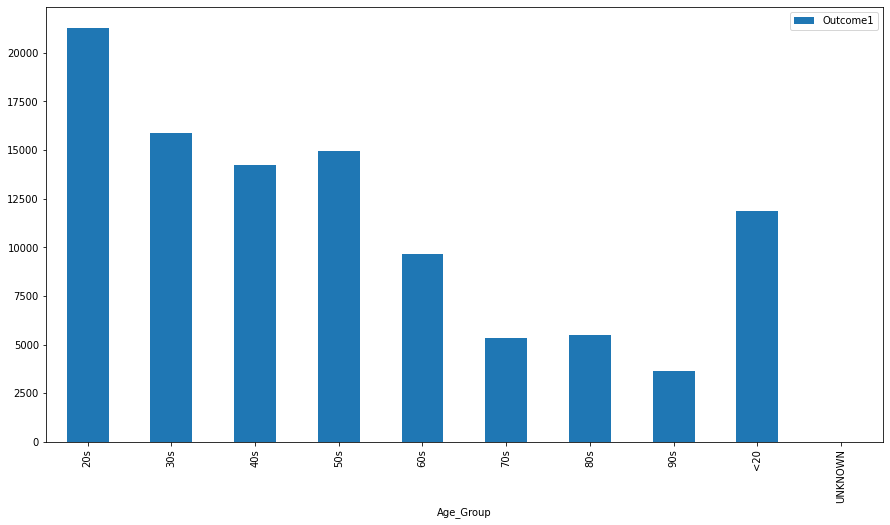

In [ ]:
# plotting a bar graph using the age grouping 
covid_age_group.plot(kind='bar', figsize=(15,8));

In [ ]:
# filtering the dataset by Fatal outcome and grouping fatal outcomes by age
df_fatal = covidCopy[covidCopy['Outcome1'] == "Fatal"]
df_fatal.groupby('Age_Group')[['Outcome1']].count()

Outcome1
Age_Group          
20s               4
30s               7
40s              29
50s             111
60s             303
70s             607
80s            1265
90s            1144
<20               1

In [ ]:
# grouping the fatal outcome data by gender
df_fatal.groupby('Client_Gender')[['Outcome1']].count()

Outcome1
Client_Gender          
FEMALE             1849
MALE               1593
UNSPECIFIED          29

In [ ]:
# grouping the fatal outcome by gender and age
df_fatal.groupby(['Client_Gender','Age_Group'])[['Outcome1']].count()

Outcome1
Client_Gender Age_Group          
FEMALE        20s               1
              40s               9
              50s              42
              60s             112
              70s             239
              80s             678
              90s             767
              <20               1
MALE          20s               3
              30s               7
              40s              20
              50s              68
              60s             191
              70s             365
              80s             574
              90s             365
UNSPECIFIED   50s               1
              70s               3
              80s              13
              90s              12

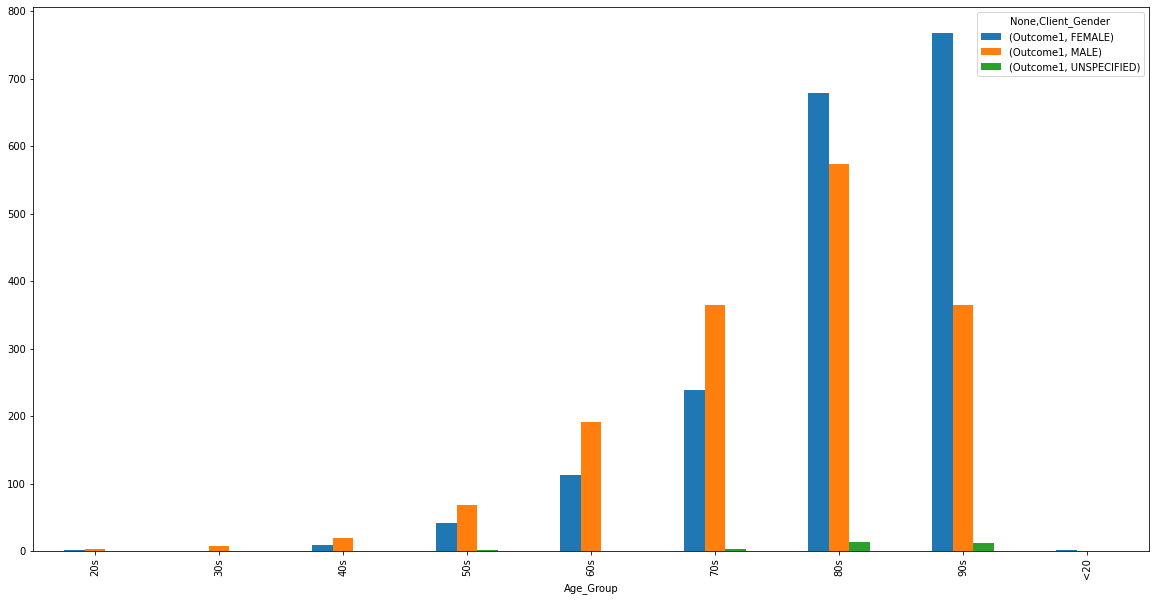

In [ ]:
# plotting numer of fatal outcomes grouped by age and gender
fatal_grouping = df_fatal.groupby(['Age_Group','Client_Gender'])[['Outcome1']].count().unstack()
fatal_grouping.plot(kind='bar', figsize=(20,10));

In [ ]:
# displaying number of occurrences of case acquisition unique values
df_fatal['Case_AcquisitionInfo'].value_counts()

OB                     2694
No known epi link       449
CC                      249
Travel                   67
Missing Information      12
Name: Case_AcquisitionInfo, dtype: int64

In [ ]:
df_unresolved = covidCopy[covidCopy['Outcome1'] == "Not Resolved"]
df_unresolved.groupby('Age_Group')[['Outcome1']].count()

Outcome1
Age_Group          
20s            2702
30s            1978
40s            1878
50s            1807
60s            1205
70s             605
80s             465
90s             292
<20            1890
UNKNOWN           1

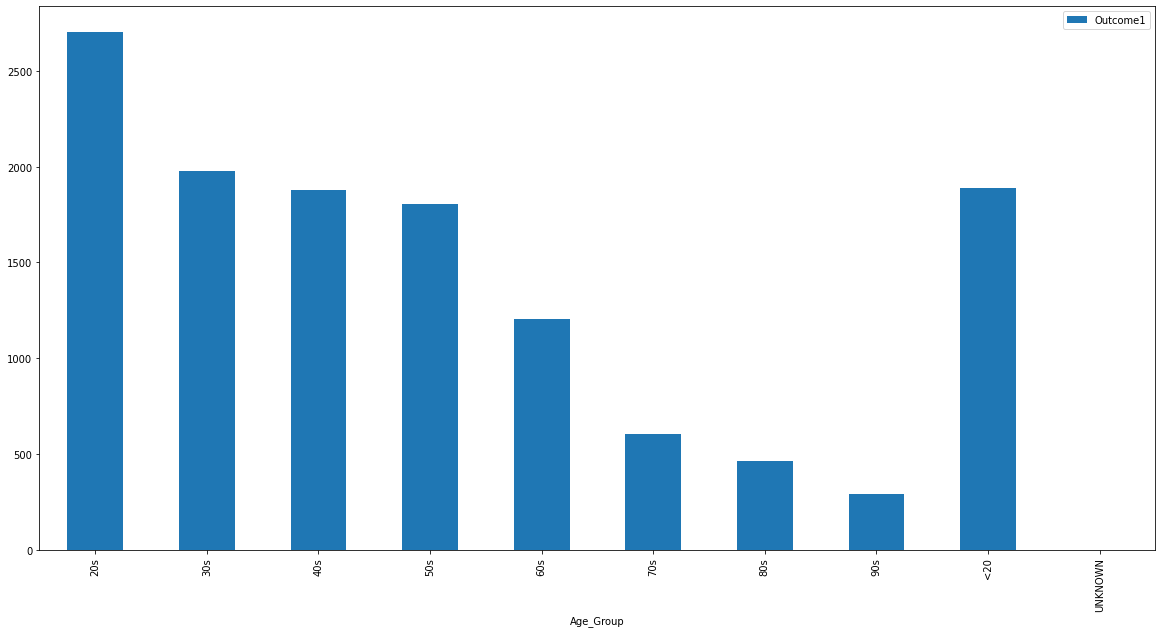

In [ ]:
# plotting the unresolved cases by group age
df_unresolved.groupby('Age_Group')[['Outcome1']].count().plot(kind='bar', figsize=(20,10));

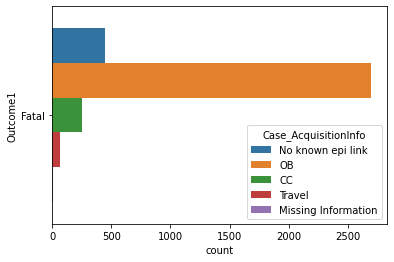

In [ ]:
sns.countplot(y="Outcome1", hue="Case_AcquisitionInfo", data=df_fatal);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


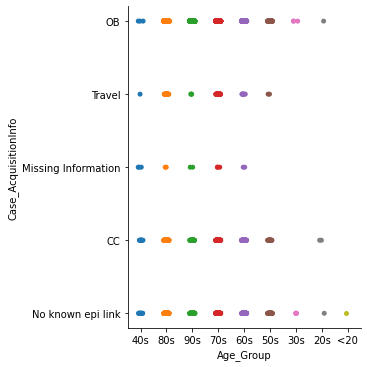

In [ ]:
sns.catplot("Age_Group", "Case_AcquisitionInfo", data=df_fatal);

## Covid Cases - Canada

### Clean up & prepare data

In [205]:
covid2020canada.head(1)

Case identifier number  Region  ...  Death  Transmission
0                       1       3  ...      9             1

[1 rows x 30 columns]

In [206]:
df0=covid2020canada.copy()
df1=df0.rename(columns={'Episode year': 'year','Episode week':'weekofyear', 'Age group':'Age_group','Case identifier number':'id'})

df1=df1.drop(df1.index[df1.weekofyear == 99])     # Remove rows which have no info for "weekofyear"
df1=df1.drop(df1.index[df1.Gender == 9])          # Remove rows which have no info for "Gender"
df1=df1.drop(df1.index[df1.Age_group == 99])      # Remove rows which have no info for "Age_group"


df1=df1.replace({'year':{20:2020}})

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345301 entries, 0 to 360235
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   id                            345301 non-null  int64
 1   Region                        345301 non-null  int64
 2   weekofyear                    345301 non-null  int64
 3   Episode week group            345301 non-null  int64
 4   year                          345301 non-null  int64
 5   Gender                        345301 non-null  int64
 6   Age_group                     345301 non-null  int64
 7   Occupation                    345301 non-null  int64
 8   Asymptomatic                  345301 non-null  int64
 9   Onset week of symptoms        345301 non-null  int64
 10  Onset year of symptoms        345301 non-null  int64
 11  Symptom, cough                345301 non-null  int64
 12  Symptom, fever                345301 non-null  int64
 13  Symptom, chill

In [208]:
## Drop columns which I am not interested in:
df2 = df1.drop(['Episode week group','Onset week of symptoms','Onset year of symptoms','Recovery week','Recovery year','Symptom, chills', 'Symptom, cough', 'Symptom, diarrhea', 'Symptom, fever', 'Symptom, headache', 'Symptom, irritability', 'Symptom, nausea', 'Symptom, other', 'Symptom, pain', 'Symptom, runny nose', 'Symptom, shortness of breath', 'Symptom, sore throat', 'Symptom, weakness'],axis=1)

## Re-order columns: 
## will focus on doing analysis about the effect of variables ('Age group' and 'Gender') 
##        on outcomes ('Death', 'Occupation','Asymptomatic', etc)

df = df2.reindex(sorted(df2.columns), axis=1)

df.head(1)

Age_group  Asymptomatic  Death  Gender  ...  Transmission  id  weekofyear  year
0          3             9      9       2  ...             1   1          41  2020

[1 rows x 12 columns]

In [209]:
## Check dataframe structure

print(df.shape)
print(df.columns[:].tolist())

(345301, 12)
['Age_group', 'Asymptomatic', 'Death', 'Gender', 'Hospital status', 'Occupation', 'Recovered', 'Region', 'Transmission', 'id', 'weekofyear', 'year']


In [210]:
## Convert 'year' & 'weekofyear' to 'date':

formatted_date = df.year * 100 + df.weekofyear
df['date'] = pd.to_datetime(formatted_date.astype(str) +'0', format ='%Y%W%w')

In [211]:
## Set column 'date' as dataframe's index

df = df.set_index(['date'])
df.head()

Age_group  Asymptomatic  Death  ...  id  weekofyear  year
date                                        ...                      
2020-10-18          3             9      9  ...   1          41  2020
2020-08-09          2             2      2  ...   2          31  2020
2020-10-04          8             1      2  ...   3          39  2020
2020-10-11          2             9      2  ...   4          40  2020
2020-10-25          1             9      2  ...   5          42  2020

[5 rows x 12 columns]

### Cases trends in Canada & by Regions

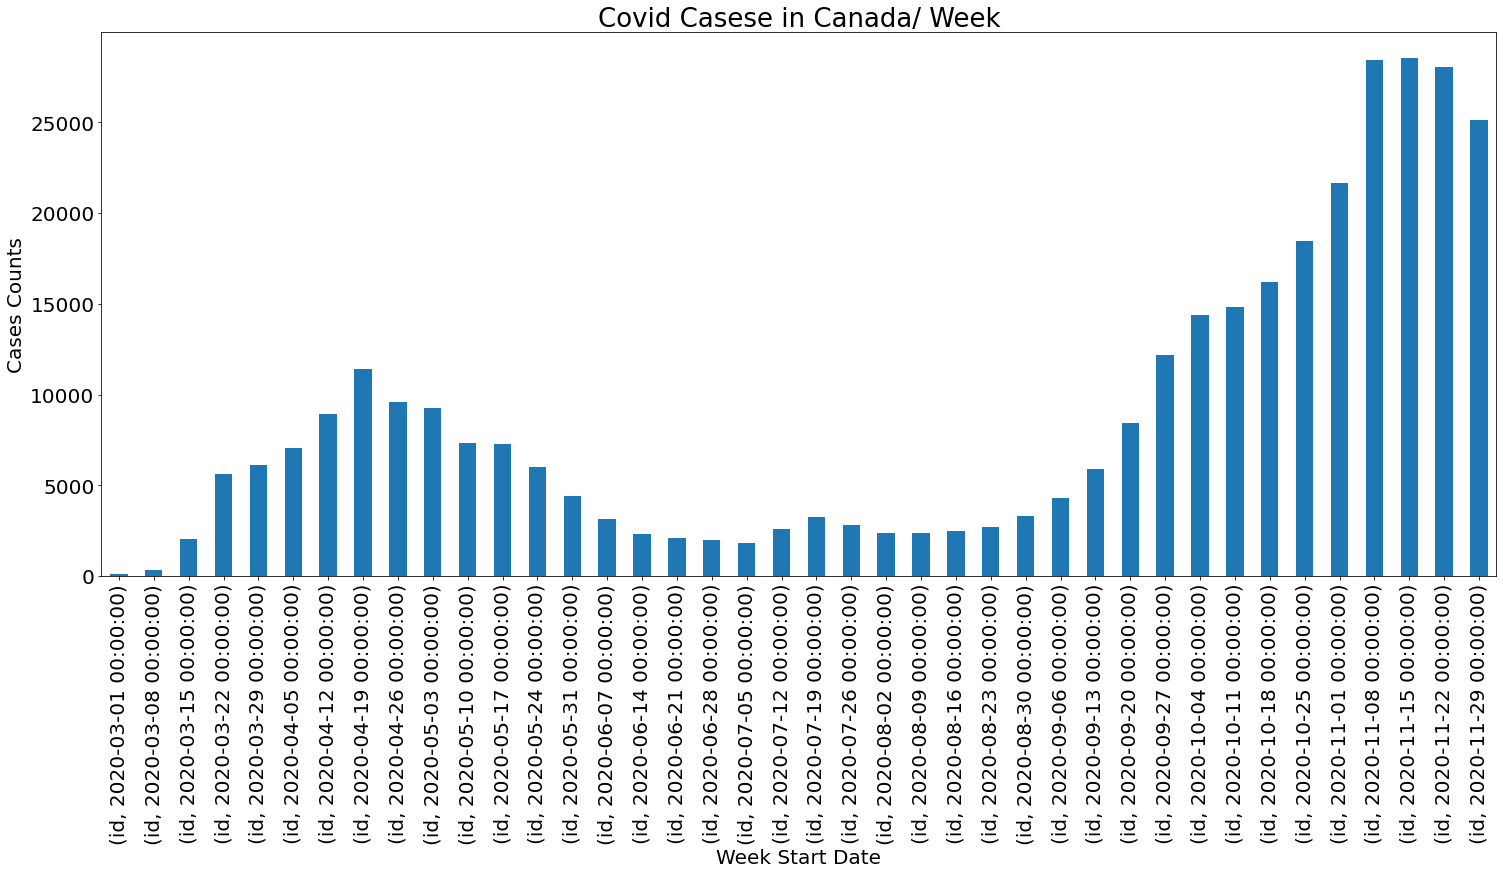

In [215]:

df_ALL = df.groupby(['date'])[['id']].count().unstack()
df_ALL.plot(kind='bar', figsize=(25,10),fontsize = 20)
plt.title('Covid Casese in Canada/ Week',fontsize = 26, multialignment = 'center')
plt.ylabel('Cases Counts', fontsize = 20)
plt.xlabel('Week Start Date', fontsize = 20);


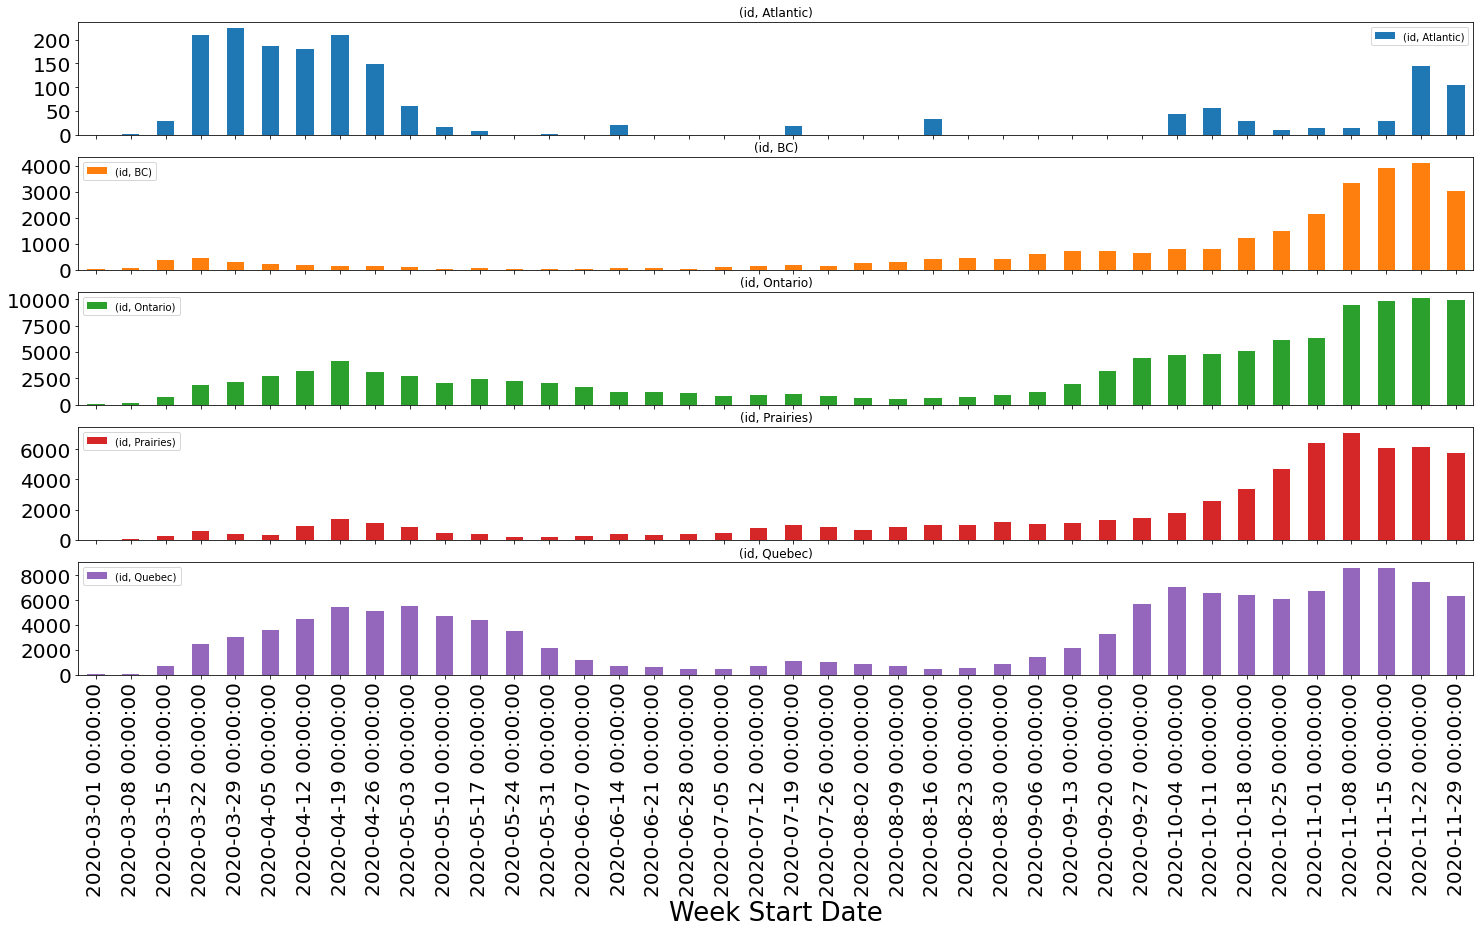

In [ ]:
df['Region']=df['Region'].replace({1:'Atlantic',2:'Quebec',3:'Ontario',4:'Prairies',5:'BC'})

df_ALL = df.groupby(['date','Region'])[['id']].count().unstack()
df_ALL.plot(subplots=True, kind='bar', figsize=(25,12),sharex = True,fontsize = 20)


#plt.title('Covid Casese by Region/ Week',fontsize = 30,loc='center')

plt.xlabel('Week Start Date', fontsize = 26);

### Outcome: Recovered by Gender

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


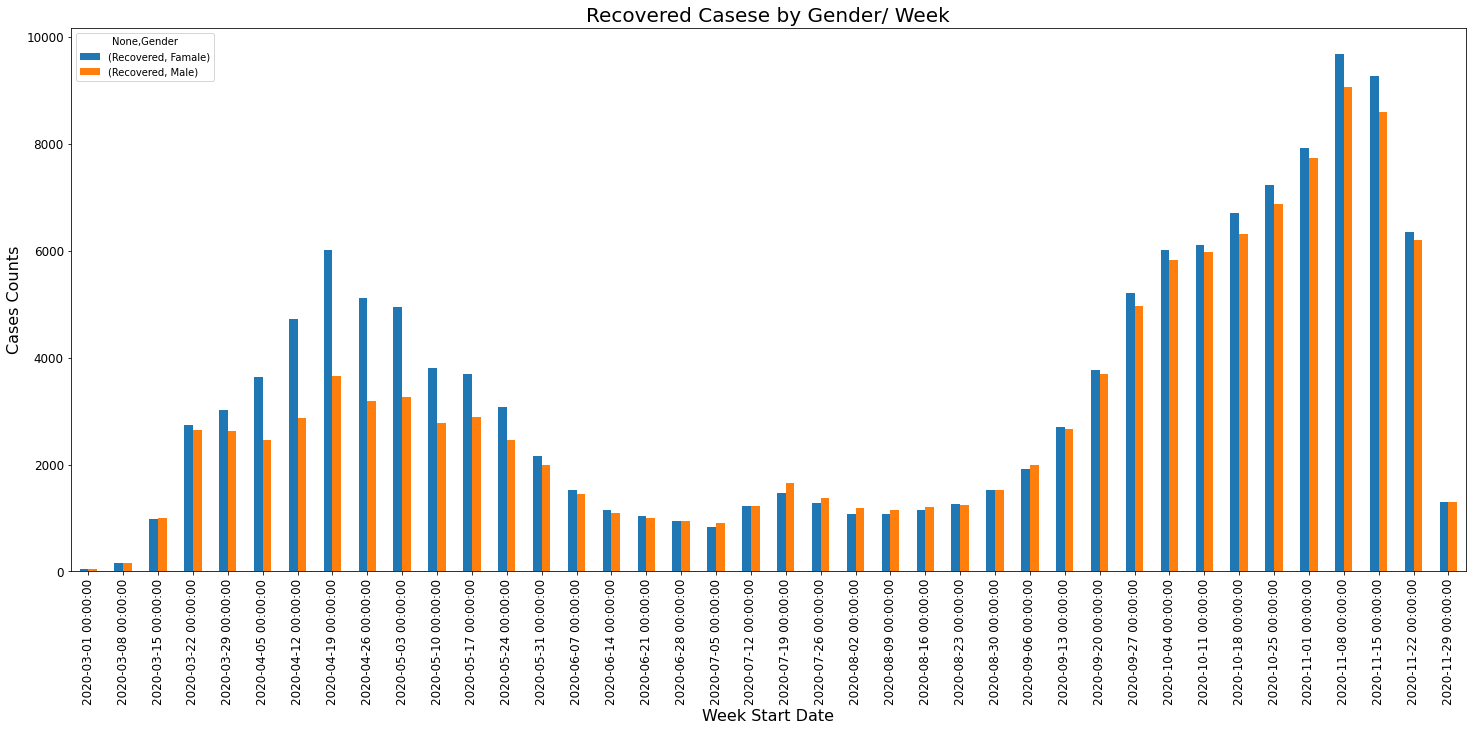

In [ ]:
df_R = df[df['Recovered'] == 1]          ## Recover 1 == Yes

df_R['Gender']=df_R['Gender'].replace({1:'Male',2:'Famale'})

df_R = df_R.groupby(['date','Gender'])[['Recovered']].count().unstack()
df_R.plot(kind='bar', figsize=(25,10), fontsize = 12)

plt.title('Recovered Casese by Gender/ Week',fontsize = 20, multialignment = 'center')
plt.ylabel('Cases Counts', fontsize = 16)
plt.xlabel('Week Start Date', fontsize = 16);

### Outcome: Death by Gender

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


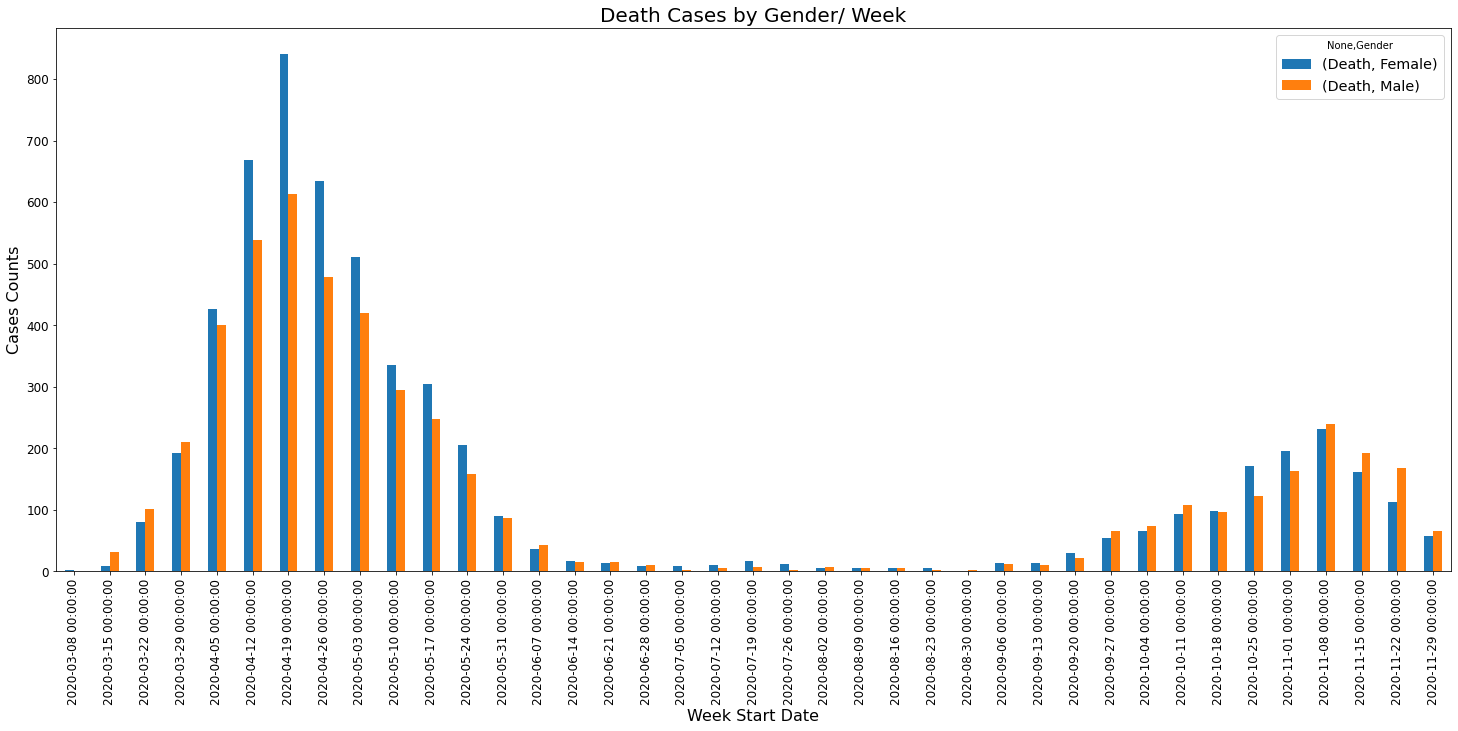

In [219]:
df_D = df[df['Death'] == 1]    # Death: 1 =="Yes"

df_D['Gender']=df_D['Gender'].replace({1:'Male',2:'Female'})

df_D = df_D.groupby(['date','Gender'])[['Death']].count().unstack() 
df_D.plot(kind='bar', figsize=(25,10),fontsize =12)

plt.title('Death Cases by Gender/ Week',fontsize = 20, multialignment = 'center')
plt.ylabel('Cases Counts', fontsize = 16)
plt.xlabel('Week Start Date', fontsize = 16);



### Outcome: Asymptomatic by Gender

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


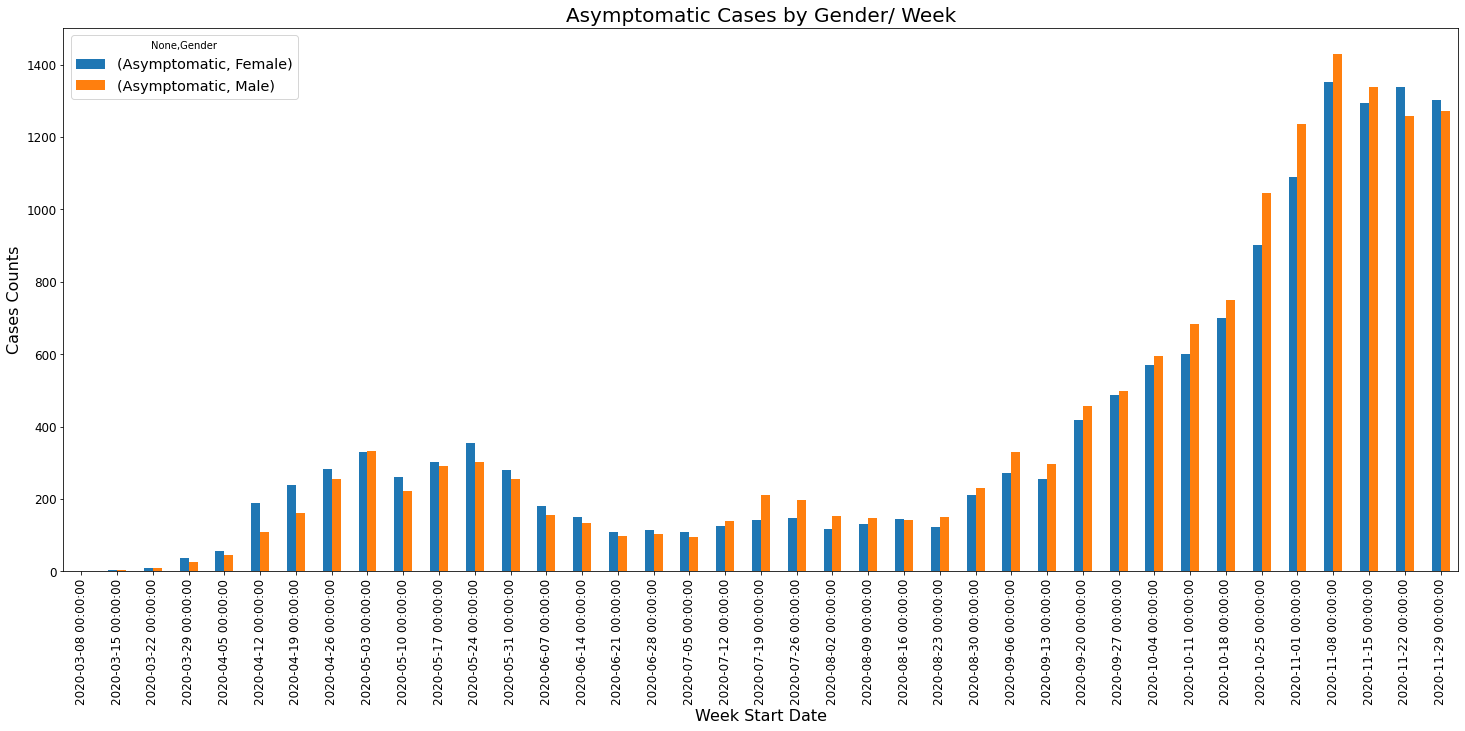

In [225]:
df_A = df[df['Asymptomatic'] == 1]    # Asymptomatic: 1 =="Yes"

df_A['Gender']=df_A['Gender'].replace({1:'Male',2:'Female'})

df_A = df_A.groupby(['date','Gender'])[['Asymptomatic']].count().unstack()
df_A.plot(kind='bar', figsize=(25,10),fontsize = 12)

plt.title('Asymptomatic Cases by Gender/ Week',fontsize = 20, multialignment = 'center')
plt.ylabel('Cases Counts', fontsize = 16)
plt.xlabel('Week Start Date', fontsize = 16)

plt.show();



### Outcome: Recovered by Age_group

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


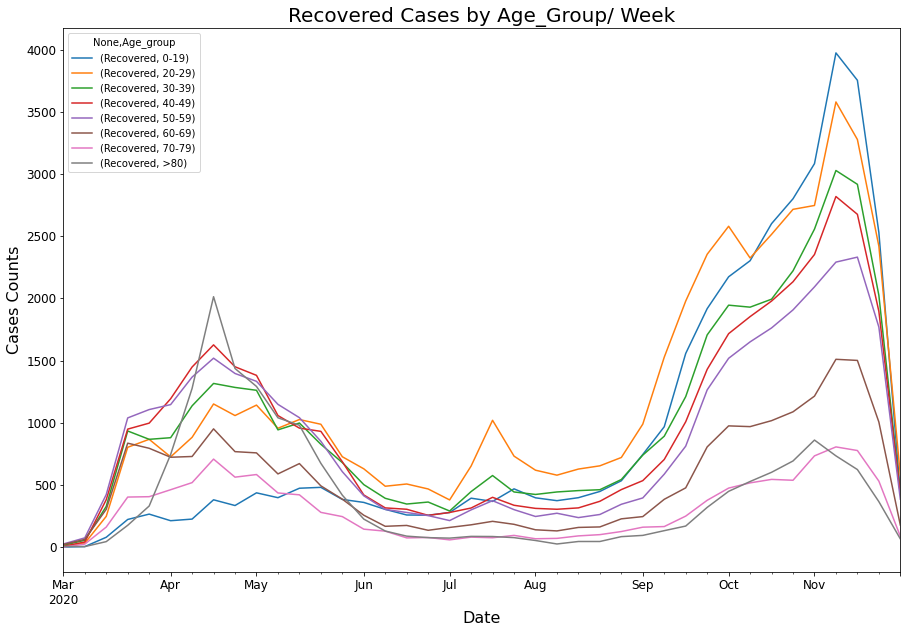

In [ ]:
df_R = df[df['Recovered'] == 1]          ## Recover 1 == Yes

df_R['Age_group']=df_R['Age_group'].replace({1:'0-19',2:'20-29',3:'30-39',4:'40-49',5:'50-59',6:'60-69',7:'70-79',8:'>80'})

df_R = df_R.groupby(['date','Age_group'])[['Recovered']].count().unstack()
df_R.plot(kind='line', figsize=(15,10),fontsize = 12)

plt.title('Recovered Cases by Age_Group/ Week',fontsize = 20, multialignment = 'center')
plt.ylabel('Cases Counts', fontsize = 16)
plt.xlabel('Date', fontsize = 16);

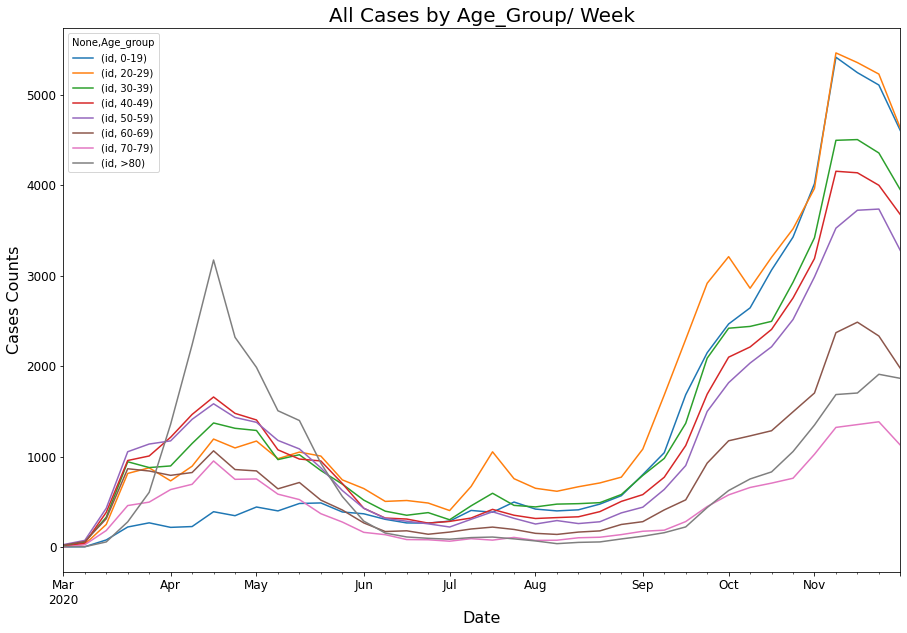

In [ ]:
df['Age_group']=df['Age_group'].replace({1:'0-19',2:'20-29',3:'30-39',4:'40-49',5:'50-59',6:'60-69',7:'70-79',8:'>80'})

df = df.groupby(['date','Age_group'])[['id']].count().unstack()
df.plot(kind='line', figsize=(15,10),fontsize = 12)

plt.title('All Cases by Age_Group/ Week',fontsize = 20, multialignment = 'center')
plt.ylabel('Cases Counts', fontsize = 16)
plt.xlabel('Date', fontsize = 16);

## Ontario Business Statuses

In [7]:
businesses.head()

REF_DATE       GEO        DGUID                           Industry  \
0  2019-01  Ontario   2016A000235  Business sector industries [T004]   
1  2019-02  Ontario   2016A000235  Business sector industries [T004]   
2  2019-03  Ontario   2016A000235  Business sector industries [T004]   
3  2019-04  Ontario   2016A000235  Business sector industries [T004]   
4  2019-05  Ontario   2016A000235  Business sector industries [T004]   

  Business dynamics measure     UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID  \
0         Active businesses  Number     223         units          0   
1         Active businesses  Number     223         units          0   
2         Active businesses  Number     223         units          0   
3         Active businesses  Number     223         units          0   
4         Active businesses  Number     223         units          0   

        VECTOR COORDINATE     VALUE STATUS  SYMBOL  TERMINATED  DECIMALS  
0  v1203705296     16.1.1  306288.0    NaN     NaN         NaN         0  
1  v1203705296     16.1.1  306803.0    NaN     NaN         NaN         0  
2  v1203705296     16.1.1  307360.0    NaN     NaN         NaN         0  
3  v1203705296     16.1.1  307241.0    NaN     NaN         NaN         0  
4  v1203705296     16.1.1  307427.0    NaN     NaN         NaN         0

In [9]:
businesses['Industry'].unique()

array(['Business sector industries [T004]',
       'Forestry, fishing and hunting [11]',
       'Mining, quarrying, and oil and gas extraction [21]',
       'Utilities [22]', 'Construction [23]', 'Manufacturing [31-33]',
       'Wholesale trade [41]', 'Retail trade [44-45]',
       'Transportation and warehousing [48-49]',
       'Information and cultural industries [51]',
       'Finance and insurance and Management of companies and enterprises [52, 55]',
       'Real estate and rental and leasing [53]',
       'Professional, scientific and technical services [54]',
       'Administrative and support, waste management and remediation services [56]',
       'Arts, entertainment and recreation [71]',
       'Accommodation and food services [72]',
       'Other services (except public administration) [81]'], dtype=object)

In [14]:
businesses['Business dynamics measure'].unique()

array(['Active businesses', 'Opening businesses', 'Continuing businesses',
       'Closing businesses'], dtype=object)

In [65]:
businesses = businesses[(businesses['Business dynamics measure'] == 'Opening businesses')]

In [66]:
businesses = businesses[~(businesses['Industry'] == 'Business sector industries [T004]')]

In [67]:
businesses = businesses[~(businesses['REF_DATE'].str.contains('2019'))]

In [68]:
b = businesses

In [22]:
businesses.head()

REF_DATE       GEO        DGUID                           Industry  \
20  2019-01  Ontario   2016A000235  Business sector industries [T004]   
21  2019-02  Ontario   2016A000235  Business sector industries [T004]   
22  2019-03  Ontario   2016A000235  Business sector industries [T004]   
23  2019-04  Ontario   2016A000235  Business sector industries [T004]   
24  2019-05  Ontario   2016A000235  Business sector industries [T004]   

   Business dynamics measure     UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID  \
20        Opening businesses  Number     223         units          0   
21        Opening businesses  Number     223         units          0   
22        Opening businesses  Number     223         units          0   
23        Opening businesses  Number     223         units          0   
24        Opening businesses  Number     223         units          0   

         VECTOR COORDINATE    VALUE STATUS  SYMBOL  TERMINATED  DECIMALS  
20  v1203705297     16.1.2  15461.0    NaN     NaN         NaN         0  
21  v1203705297     16.1.2  16298.0    NaN     NaN         NaN         0  
22  v1203705297     16.1.2  16924.0    NaN     NaN         NaN         0  
23  v1203705297     16.1.2  16121.0    NaN     NaN         NaN         0  
24  v1203705297     16.1.2  15420.0    NaN     NaN         NaN         0

In [19]:
businesses['GEO'].unique()

array(['Ontario\xa0'], dtype=object)

In [70]:
b = b[~(b['Industry'] == 'Forestry, fishing and hunting [11]') 
      & ~(b['Industry'] == 'Wholesale trade [41]')
      & ~(b['Industry'] == 'Administrative and support, waste management and remediation services [56]')]

In [72]:
b = b.groupby(['REF_DATE','Industry'])[['VALUE']].sum()

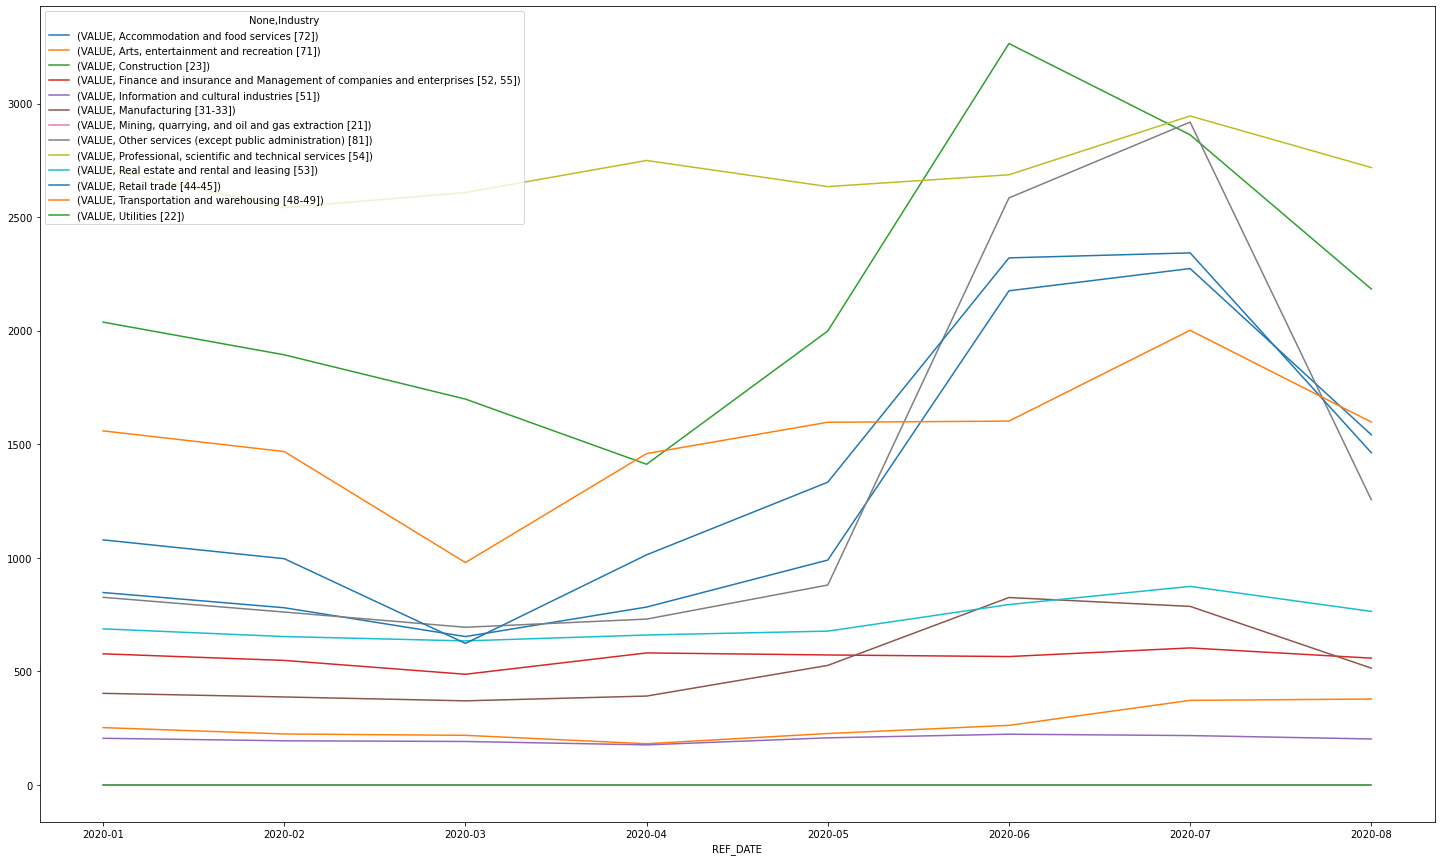

In [74]:
b.unstack().plot(figsize=(25,15));

In [44]:
businesses = businesses.groupby(['REF_DATE','Industr'])[['VALUE']].sum()

In [49]:
b = businesses

In [58]:
    businesses.unstack()

VALUE  \
Industry Accommodation and food services [72]   
REF_DATE                                        
2020-01                                 847.0   
2020-02                                 780.0   
2020-03                                 653.0   
2020-04                                 783.0   
2020-05                                 990.0   
2020-06                                2176.0   
2020-07                                2274.0   
2020-08                                1542.0   

                                                                                     \
Industry Administrative and support, waste management and remediation services [56]   
REF_DATE                                                                              
2020-01                                               761.0                           
2020-02                                               784.0                           
2020-03                                               639.0                           
2020-04                                               447.0                           
2020-05                                               857.0                           
2020-06                                               886.0                           
2020-07                                               892.0                           
2020-08                                               821.0                           

                                                                    \
Industry Arts, entertainment and recreation [71] Construction [23]   
REF_DATE                                                             
2020-01                                    252.0            2038.0   
2020-02                                    224.0            1894.0   
2020-03                                    218.0            1699.0   
2020-04                                    181.0            1412.0   
2020-05                                    226.0            1999.0   
2020-06                                    262.0            3265.0   
2020-07                                    372.0            2863.0   
2020-08                                    378.0            2184.0   

                                                                                     \
Industry Finance and insurance and Management of companies and enterprises [52, 55]   
REF_DATE                                                                              
2020-01                                               577.0                           
2020-02                                               548.0                           
2020-03                                               487.0                           
2020-04                                               581.0                           
2020-05                                               572.0                           
2020-06                                               565.0                           
2020-07                                               603.0                           
2020-08                                               558.0                           

                                             \
Industry Forestry, fishing and hunting [11]   
REF_DATE                                      
2020-01                                33.0   
2020-02                                38.0   
2020-03                                32.0   
2020-04                                28.0   
2020-05                                48.0   
2020-06                                39.0   
2020-07                                26.0   
2020-08                                38.0   

                                                                         \
Industry Information and cultural industries [51] Manufacturing [31-33]   
REF_DATE                                                                  
2020-01                                     205.0                 403.

In [63]:
b.unstack(inplace=True).drop(['Forestry, fishing and hunting [11]','Wholesale trade [41] ', 'Administrative and support, waste management and remediation services [56] '], 1)

TypeError: unstack() got an unexpected keyword argument 'inplace'

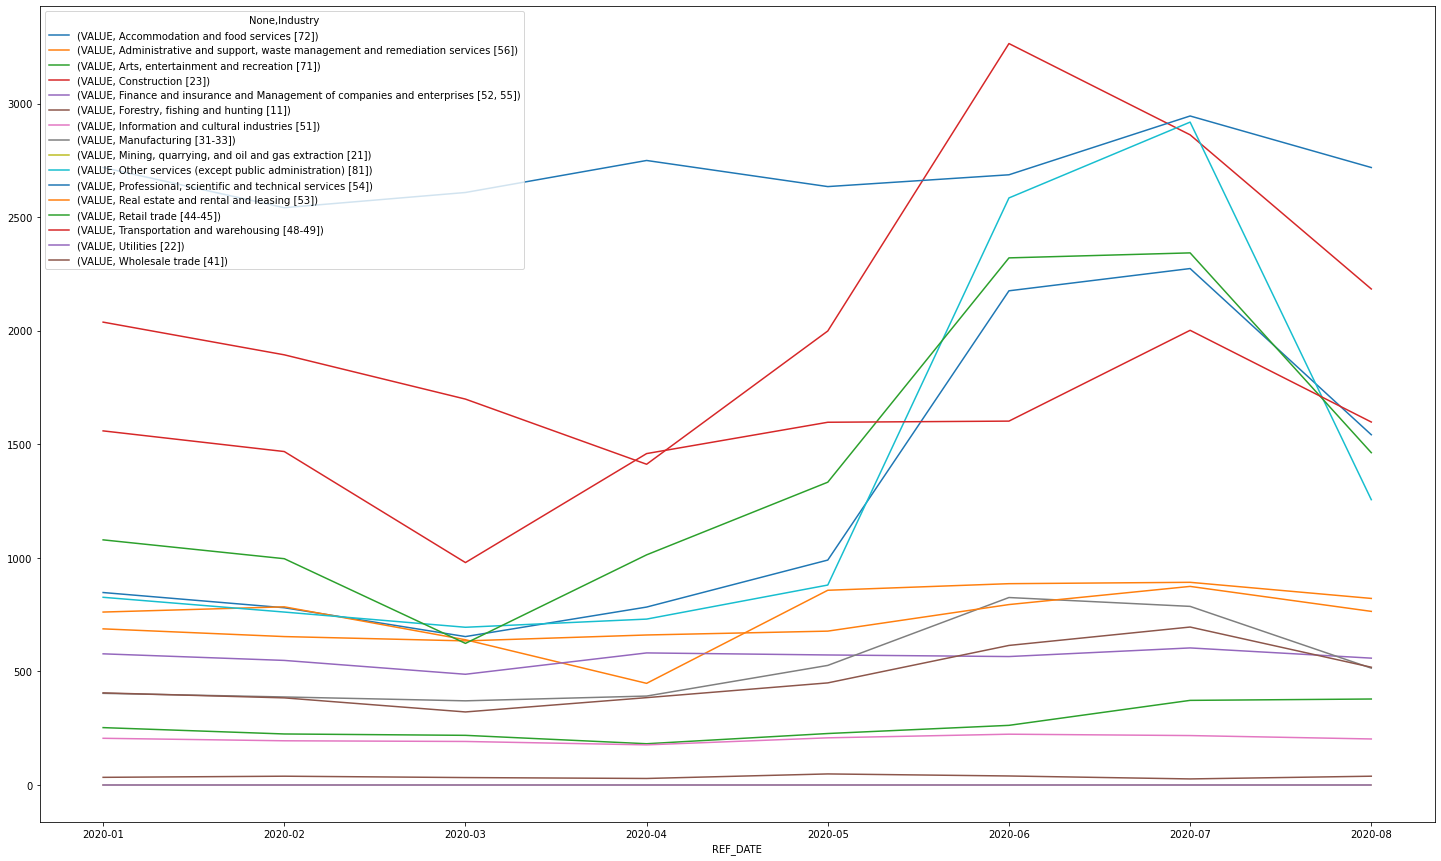

In [45]:
businesses.unstack().plot(figsize=(25,15));

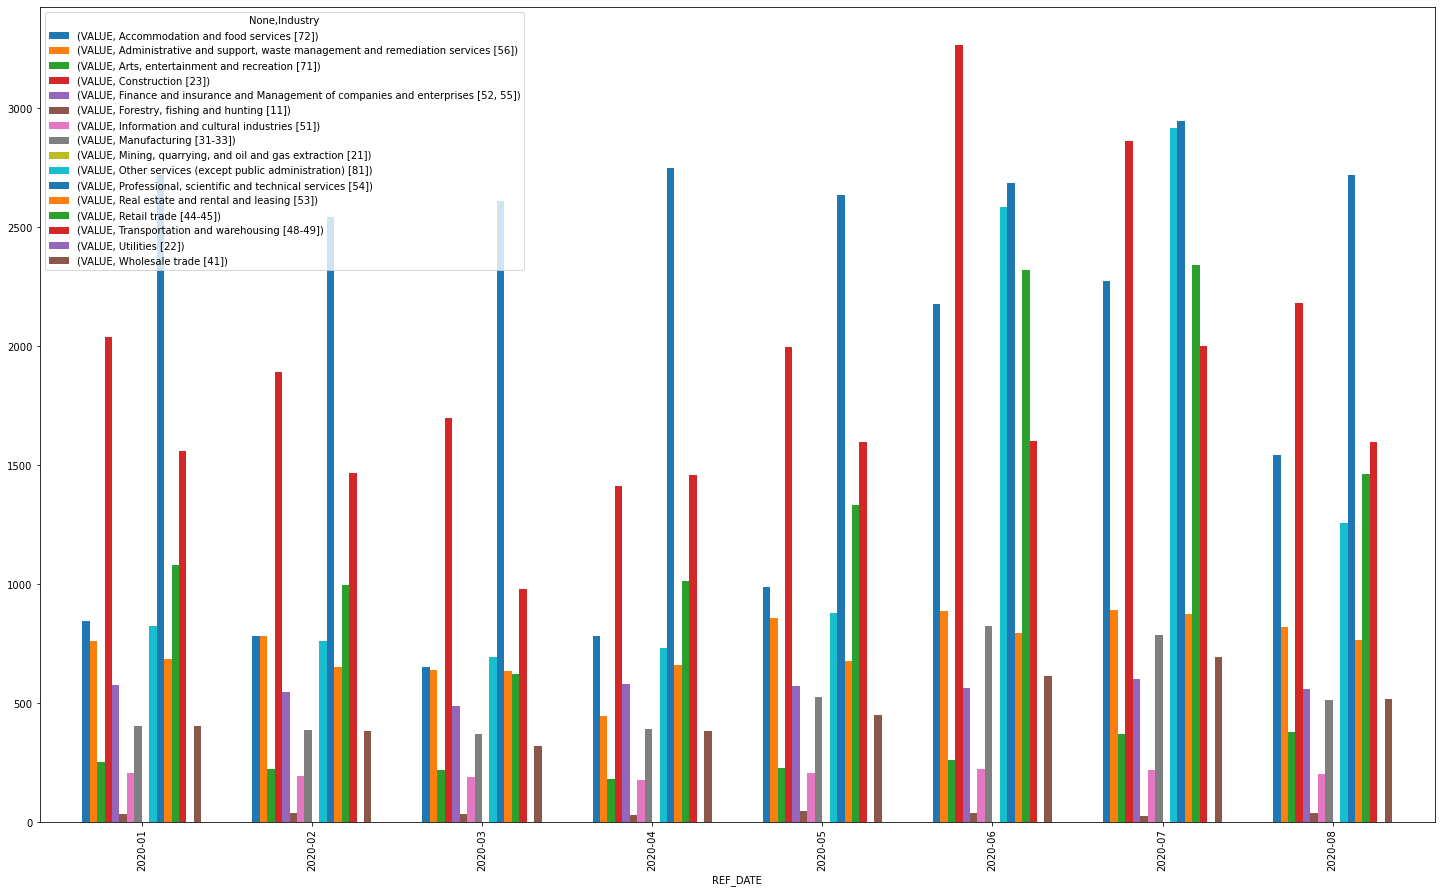

In [48]:
businesses.unstack().plot(kind='bar', figsize=(25,15), width=0.7);

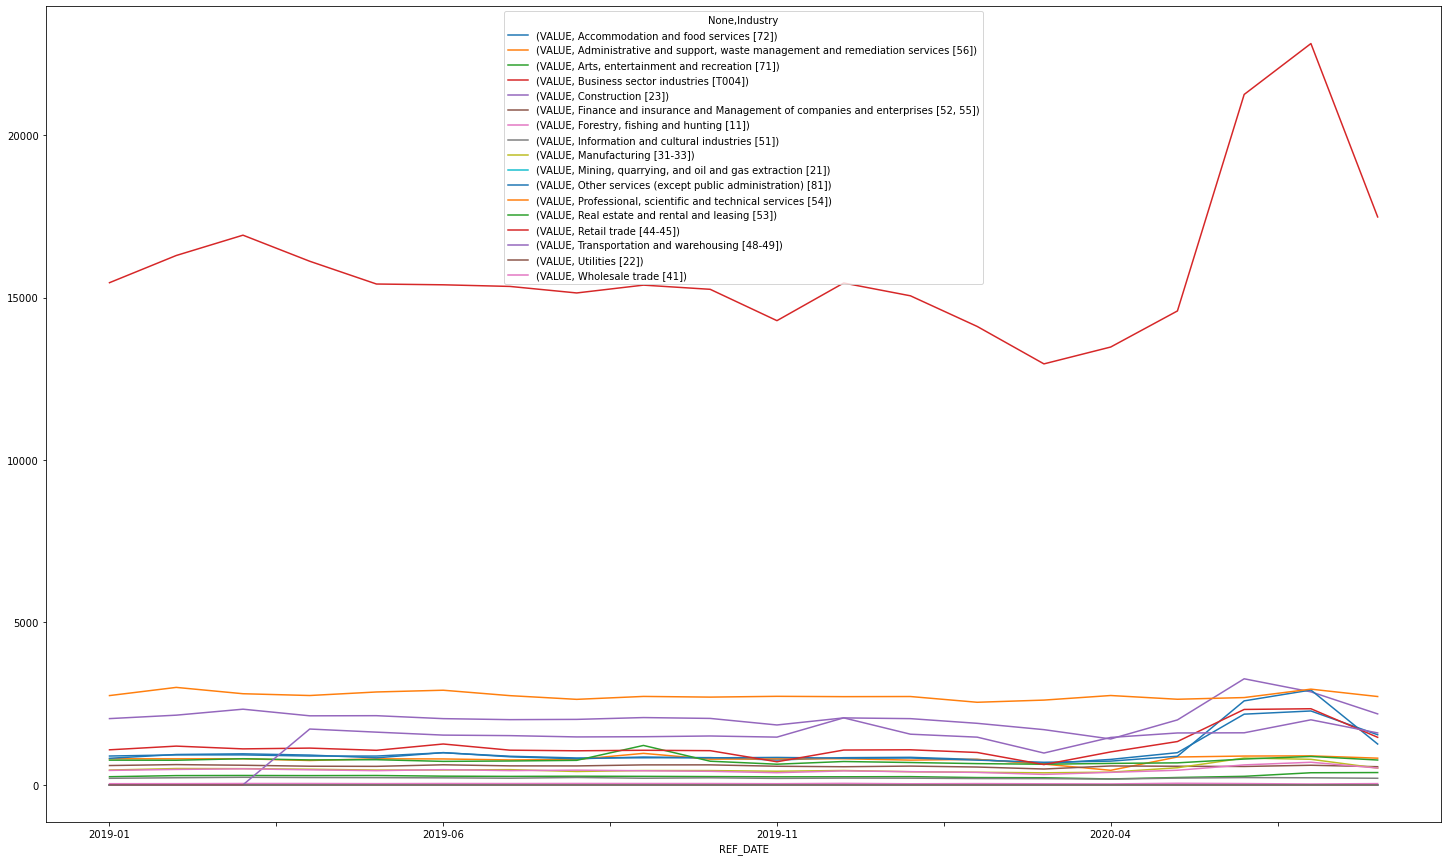

In [32]:
businesses.unstack().plot(figsize=(25,15));

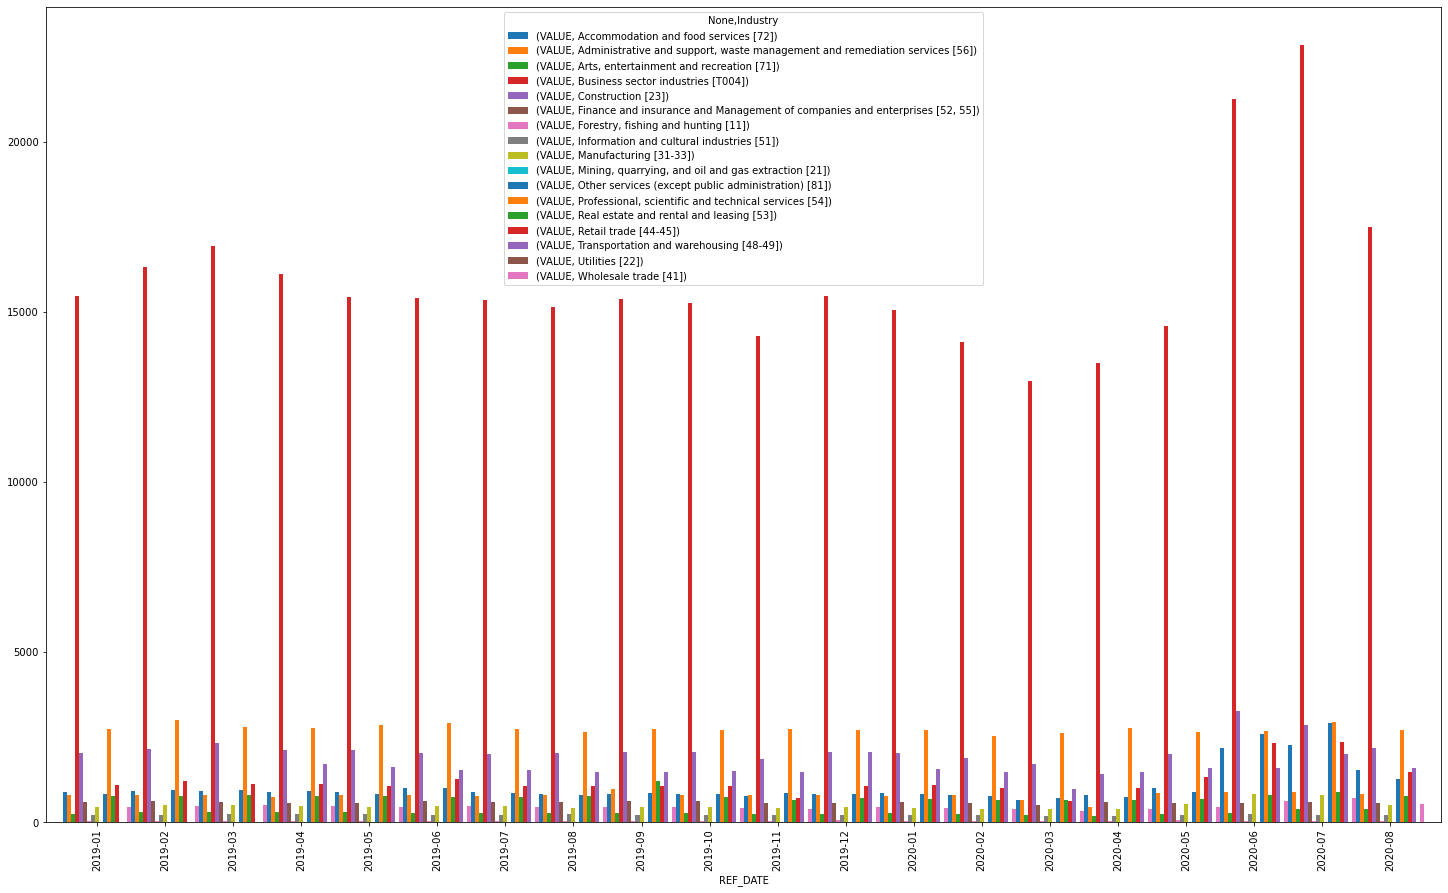

In [30]:
businesses.unstack().plot(kind='bar', figsize=(25,15), width=1);

In [12]:
businesses.groupby(['Industry', 'REF_DATE'])([['VALUE']]).sum().plot()

TypeError: 'DataFrameGroupBy' object is not callable

In [ ]:
businessesCopy = businesses.copy()

In [ ]:
businessesCopy['REF_DATE'] = pd.to_datetime(businessesCopy['REF_DATE'])

In [ ]:
businessesCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   REF_DATE                   1360 non-null   datetime64[ns]
 1   GEO                        1360 non-null   object        
 2   DGUID                      1360 non-null   object        
 3   Industry                   1360 non-null   object        
 4   Business dynamics measure  1360 non-null   object        
 5   UOM                        1360 non-null   object        
 6   UOM_ID                     1360 non-null   int64         
 7   SCALAR_FACTOR              1360 non-null   object        
 8   SCALAR_ID                  1360 non-null   int64         
 9   VECTOR                     1360 non-null   object        
 10  COORDINATE                 1360 non-null   object        
 11  VALUE                      1231 non-null   float64       
 12  STATUS

In [ ]:
businessesCopy.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Industry', 'Business dynamics measure',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [ ]:
# Dataframe for date, status and values for businesses in all recorded industries
b_all = businessesCopy.drop(['GEO', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 
                                  'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis = 1)\
                            .drop(businessesCopy[businessesCopy.Industry != 'Business sector industries [T004]'].index)                         

# remaming columns and certain values
b_all = b_all.rename(columns = {'Business dynamics measure' : 'Status', 'VALUE':'Value'})\
                .replace({'Business sector industries [T004]': 'All', 'Active businesses' : 'Active', 
                          'Opening businesses' : 'Opening', 'Continuing businesses' : 'Continuing',
                          'Closing businesses':'Closing'})
b_all.head()

REF_DATE Industry  Status     Value
0 2019-01-01      All  Active  306288.0
1 2019-02-01      All  Active  306803.0
2 2019-03-01      All  Active  307360.0
3 2019-04-01      All  Active  307241.0
4 2019-05-01      All  Active  307427.0

In [ ]:
# Separating data into: Active, Opening, Continuing, and Closing

b_active = b_all[b_all['Status'] == 'Active']
b_opening = b_all[b_all['Status'] == 'Opening']
b_continuing = b_all[b_all['Status'] == 'Continuing']
b_closing = b_all[b_all['Status'] == 'Closing']

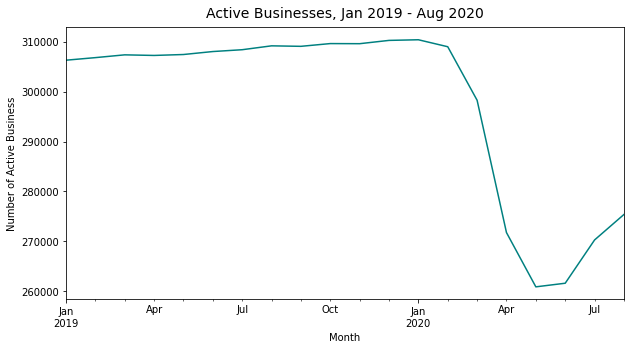

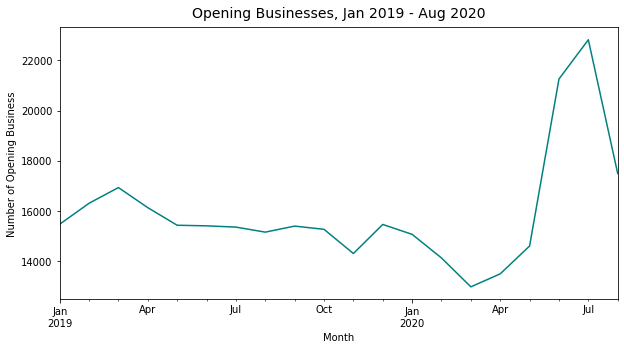

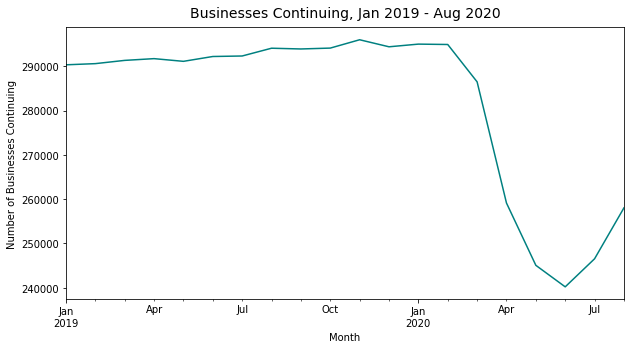

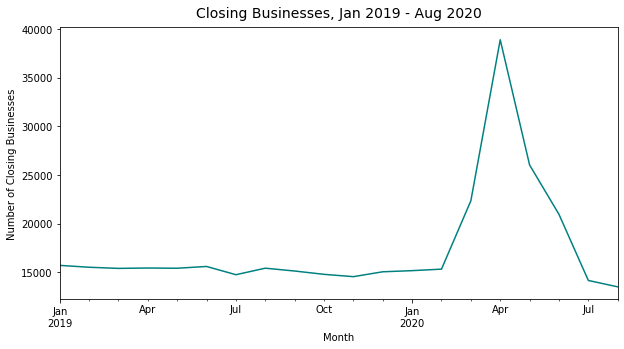

In [ ]:
# Plotting the business information

b_active.plot(x = 'REF_DATE', y = 'Value', figsize = (10,5), color = 'teal', legend = None)
plt.title('Active Businesses, Jan 2019 - Aug 2020', fontdict = {'size': 14,}, pad = 10);
plt.ylabel('Number of Active Business')
plt.xlabel('Month')

b_opening.plot(x = 'REF_DATE', y = 'Value', figsize = (10,5), color = 'teal', legend = None)
plt.title('Opening Businesses, Jan 2019 - Aug 2020', fontdict = {'size': 14,}, pad = 10);
plt.ylabel('Number of Opening Business')
plt.xlabel('Month')

b_continuing.plot(x = 'REF_DATE', y = 'Value', figsize = (10,5), color = 'teal', legend = None)
plt.title('Businesses Continuing, Jan 2019 - Aug 2020', fontdict = {'size': 14,}, pad = 10);
plt.ylabel('Number of Businesses Continuing')
plt.xlabel('Month')

b_closing.plot(x = 'REF_DATE', y = 'Value', figsize = (10,5), color = 'teal', legend = None)
plt.title('Closing Businesses, Jan 2019 - Aug 2020', fontdict = {'size': 14,}, pad = 10);
plt.ylabel('Number of Closing Businesses')
plt.xlabel('Month');

### Business Statuses: 2019 vs. 2020

#### Active Businesses

In [ ]:
b_active_months = b_all[(b_all['Status'] == 'Active') & (b_all['REF_DATE'] < '2019-09-01')]\
                    .rename(columns = {'REF_DATE':'Month','Value':'2019'})
b_active_months

Month Industry  Status      2019
0 2019-01-01      All  Active  306288.0
1 2019-02-01      All  Active  306803.0
2 2019-03-01      All  Active  307360.0
3 2019-04-01      All  Active  307241.0
4 2019-05-01      All  Active  307427.0
5 2019-06-01      All  Active  308021.0
6 2019-07-01      All  Active  308387.0
7 2019-08-01      All  Active  309164.0

In [ ]:
# Converting the month from a time object to an integer
b_active_months['Month'] = b_all['REF_DATE'].dt.month[:8]

# adding the values for active businesses from Jan 2020 to Aug 2020
b_active_months['2020'] = b_all[['Value']][(b_all['Status'] == 'Active') & (b_all['REF_DATE'] >= '2020-01-01')]['Value']\
                            .reset_index(drop=True)

# adding the name of the months for clarity
b_active_months['Month_Name'] =  b_active_months['Month'].map(lambda x : calendar.month_abbr[x])

# setting the integer month as the index
b_active_months = b_active_months.set_index('Month')
b_active_months

Industry  Status      2019      2020 Month_Name
Month                                                
1          All  Active  306288.0  310382.0        Jan
2          All  Active  306803.0  308985.0        Feb
3          All  Active  307360.0  298268.0        Mar
4          All  Active  307241.0  271776.0        Apr
5          All  Active  307427.0  260910.0        May
6          All  Active  308021.0  261634.0        Jun
7          All  Active  308387.0  270300.0        Jul
8          All  Active  309164.0  275402.0        Aug

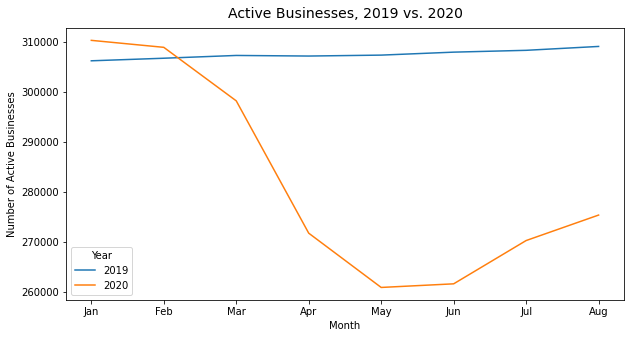

In [ ]:
f, ax = plt.subplots(figsize = (10, 5))
ax.plot(b_active_months.index, b_active_months['2019'], label = '2019')
ax.plot(b_active_months.index, b_active_months['2020'], label = '2020')
ax.legend(frameon = True, loc = 'best', title = 'Year')

plt.title('Active Businesses, 2019 vs. 2020', fontdict = {'size': 14,}, pad = 10);
ax.set(xlabel = 'Month', ylabel = 'Number of Active Businesses')
plt.xticks(b_active_months.index, b_active_months['Month_Name']);

In [ ]:
b_active_change = b_active_months.set_index('Month_Name')
b_active_change['Per_Change'] = (((b_active_change['2020'] / b_active_change['2019'])-1)*100).apply(lambda x : '%.1f' % x)
b_active_change

Industry  Status      2019      2020 Per_Change
Month_Name                                                
Jan             All  Active  306288.0  310382.0        1.3
Feb             All  Active  306803.0  308985.0        0.7
Mar             All  Active  307360.0  298268.0       -3.0
Apr             All  Active  307241.0  271776.0      -11.5
May             All  Active  307427.0  260910.0      -15.1
Jun             All  Active  308021.0  261634.0      -15.1
Jul             All  Active  308387.0  270300.0      -12.4
Aug             All  Active  309164.0  275402.0      -10.9

#### Closing Businesses

In [ ]:
b_closing_months = b_all[(b_all['Status'] == 'Closing') & (b_all['REF_DATE'] < '2019-09-01')]\
                    .rename(columns = {'REF_DATE':'Month','Value':'2019'}).reset_index(drop=True)
b_closing_months

Month Industry   Status     2019
0 2019-01-01      All  Closing  15707.0
1 2019-02-01      All  Closing  15514.0
2 2019-03-01      All  Closing  15397.0
3 2019-04-01      All  Closing  15435.0
4 2019-05-01      All  Closing  15412.0
5 2019-06-01      All  Closing  15595.0
6 2019-07-01      All  Closing  14748.0
7 2019-08-01      All  Closing  15417.0

In [ ]:
b_closing_months['Month'] = b_all['REF_DATE'].dt.month[:8]

b_closing_months['2020'] = b_all[['Value']][(b_all['Status'] == 'Closing') & (b_all['REF_DATE'] >= '2020-01-01')]['Value']\
                            .reset_index(drop=True)

b_closing_months['Month_Name'] =  b_closing_months['Month'].map(lambda x : calendar.month_abbr[x])

b_closing_months = b_closing_months.set_index('Month')

b_closing_months

Industry   Status     2019     2020 Month_Name
Month                                               
1          All  Closing  15707.0  15165.0        Jan
2          All  Closing  15514.0  15319.0        Feb
3          All  Closing  15397.0  22342.0        Mar
4          All  Closing  15435.0  38880.0        Apr
5          All  Closing  15412.0  26019.0        May
6          All  Closing  15595.0  20952.0        Jun
7          All  Closing  14748.0  14157.0        Jul
8          All  Closing  15417.0  13501.0        Aug

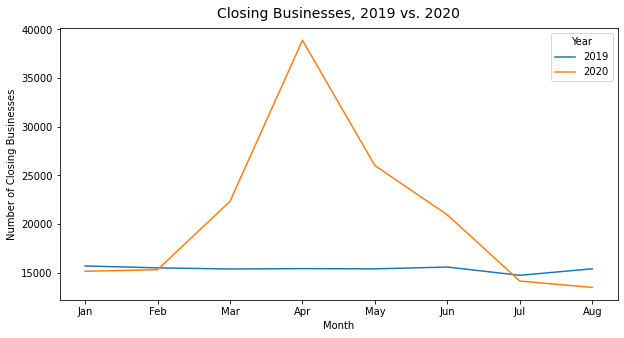

In [ ]:
f, ax = plt.subplots(figsize = (10, 5))
ax.plot(b_closing_months.index, b_closing_months['2019'], label = '2019')
ax.plot(b_closing_months.index, b_closing_months['2020'], label = '2020')
ax.legend(loc = 'best', title = 'Year')

plt.title('Closing Businesses, 2019 vs. 2020', fontdict = {'size': 14,}, pad = 10);
ax.set(xlabel = 'Month', ylabel = 'Number of Closing Businesses')
plt.xticks(b_closing_months.index, b_closing_months['Month_Name']);

In [ ]:
b_closing_change = b_closing_months.set_index('Month_Name')
b_closing_change['Per_Change'] = (((b_closing_change['2020'] / b_closing_change['2019'])-1)*100).apply(lambda x : '%.1f' % x)
b_closing_change

Industry   Status     2019     2020 Per_Change
Month_Name                                               
Jan             All  Closing  15707.0  15165.0       -3.5
Feb             All  Closing  15514.0  15319.0       -1.3
Mar             All  Closing  15397.0  22342.0       45.1
Apr             All  Closing  15435.0  38880.0      151.9
May             All  Closing  15412.0  26019.0       68.8
Jun             All  Closing  15595.0  20952.0       34.4
Jul             All  Closing  14748.0  14157.0       -4.0
Aug             All  Closing  15417.0  13501.0      -12.4

#### Opening Businesses

In [ ]:
b_opening_months = b_all[(b_all['Status'] == 'Opening') & (b_all['REF_DATE'] < '2019-09-01')]\
                    .rename(columns = {'REF_DATE':'Month','Value':'2019'}).reset_index(drop=True)
b_opening_months

Month Industry   Status     2019
0 2019-01-01      All  Opening  15461.0
1 2019-02-01      All  Opening  16298.0
2 2019-03-01      All  Opening  16924.0
3 2019-04-01      All  Opening  16121.0
4 2019-05-01      All  Opening  15420.0
5 2019-06-01      All  Opening  15396.0
6 2019-07-01      All  Opening  15346.0
7 2019-08-01      All  Opening  15145.0

In [ ]:
b_opening_months['Month'] = b_all['REF_DATE'].dt.month[:8]

b_opening_months['2020'] = b_all[['Value']][(b_all['Status'] == 'Opening') & (b_all['REF_DATE'] >= '2020-01-01')]['Value']\
                            .reset_index(drop=True)

b_opening_months['Month_Name'] =  b_opening_months['Month'].map(lambda x : calendar.month_abbr[x])

b_opening_months = b_opening_months.set_index('Month')

b_opening_months

Industry   Status     2019     2020 Month_Name
Month                                               
1          All  Opening  15461.0  15057.0        Jan
2          All  Opening  16298.0  14114.0        Feb
3          All  Opening  16924.0  12961.0        Mar
4          All  Opening  16121.0  13480.0        Apr
5          All  Opening  15420.0  14591.0        May
6          All  Opening  15396.0  21257.0        Jun
7          All  Opening  15346.0  22824.0        Jul
8          All  Opening  15145.0  17485.0        Aug

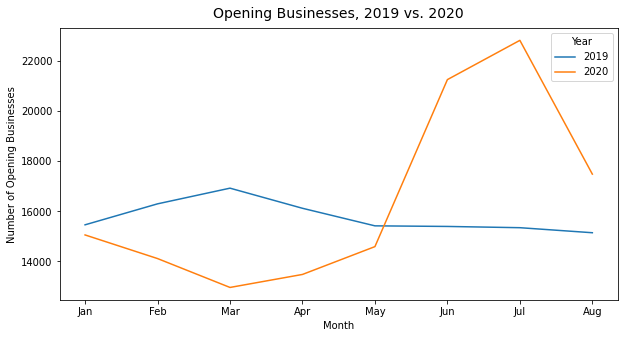

In [ ]:
f, ax = plt.subplots(figsize = (10, 5))
ax.plot(b_opening_months.index, b_opening_months['2019'], label = '2019')
ax.plot(b_opening_months.index, b_opening_months['2020'], label = '2020')
ax.legend(loc = 'best', title = 'Year')

plt.title('Opening Businesses, 2019 vs. 2020', fontdict = {'size': 14,}, pad = 10);
ax.set(xlabel = 'Month', ylabel = 'Number of Opening Businesses')
plt.xticks(b_opening_months.index, b_opening_months['Month_Name']);

In [ ]:
b_opening_change = b_opening_months.set_index('Month_Name')
b_opening_change['Per_Change'] = (((b_opening_change['2020'] / b_opening_change['2019'])-1)*100).apply(lambda x : '%.1f' % x)
b_opening_change

Industry   Status     2019     2020 Per_Change
Month_Name                                               
Jan             All  Opening  15461.0  15057.0       -2.6
Feb             All  Opening  16298.0  14114.0      -13.4
Mar             All  Opening  16924.0  12961.0      -23.4
Apr             All  Opening  16121.0  13480.0      -16.4
May             All  Opening  15420.0  14591.0       -5.4
Jun             All  Opening  15396.0  21257.0       38.1
Jul             All  Opening  15346.0  22824.0       48.7
Aug             All  Opening  15145.0  17485.0       15.5

#### Continuing Businesses

In [ ]:
b_continuing_months = b_all[(b_all['Status'] == 'Continuing') & (b_all['REF_DATE'] < '2019-09-01')]\
                    .rename(columns = {'REF_DATE':'Month','Value':'2019'}).reset_index(drop=True)
b_continuing_months

Month Industry      Status      2019
0 2019-01-01      All  Continuing  290361.0
1 2019-02-01      All  Continuing  290626.0
2 2019-03-01      All  Continuing  291360.0
3 2019-04-01      All  Continuing  291755.0
4 2019-05-01      All  Continuing  291146.0
5 2019-06-01      All  Continuing  292238.0
6 2019-07-01      All  Continuing  292353.0
7 2019-08-01      All  Continuing  294109.0

In [ ]:
b_continuing_months['Month'] = b_all['REF_DATE'].dt.month[:8]

b_continuing_months['2020'] = b_all[['Value']][(b_all['Status'] == 'Continuing') & (b_all['REF_DATE'] >= '2020-01-01')]['Value']\
                            .reset_index(drop=True)

b_continuing_months['Month_Name'] =  b_continuing_months['Month'].map(lambda x : calendar.month_abbr[x])

b_continuing_months = b_continuing_months.set_index('Month')

b_continuing_months

Industry      Status      2019      2020 Month_Name
Month                                                    
1          All  Continuing  290361.0  295035.0        Jan
2          All  Continuing  290626.0  294951.0        Feb
3          All  Continuing  291360.0  286512.0        Mar
4          All  Continuing  291755.0  259142.0        Apr
5          All  Continuing  291146.0  245067.0        May
6          All  Continuing  292238.0  240206.0        Jun
7          All  Continuing  292353.0  246547.0        Jul
8          All  Continuing  294109.0  258048.0        Aug

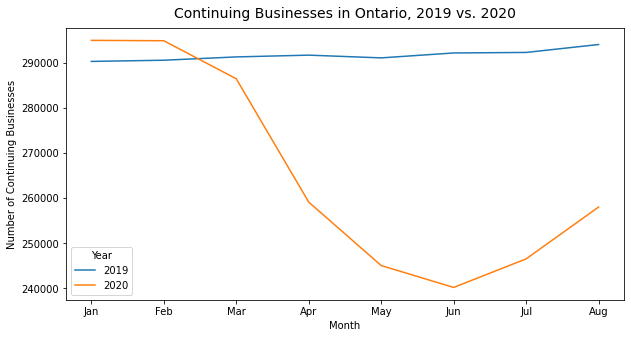

In [ ]:
f, ax = plt.subplots(figsize = (10, 5))
ax.plot(b_continuing_months.index, b_continuing_months['2019'], label = '2019')
ax.plot(b_continuing_months.index, b_continuing_months['2020'], label = '2020')
ax.legend(loc = 'best', title = 'Year')

plt.title('Continuing Businesses in Ontario, 2019 vs. 2020', fontdict = {'size': 14,}, pad = 10);
ax.set(xlabel = 'Month', ylabel = 'Number of Continuing Businesses')
plt.xticks(b_continuing_months.index, b_continuing_months['Month_Name']);

In [ ]:
b_continuing_change = b_continuing_months.set_index('Month_Name')
b_continuing_change['Per_Change'] = (((b_continuing_change['2020'] / b_continuing_change['2019'])-1)*100).apply(lambda x : '%.1f' % x)
b_continuing_change

Industry      Status      2019      2020 Per_Change
Month_Name                                                    
Jan             All  Continuing  290361.0  295035.0        1.6
Feb             All  Continuing  290626.0  294951.0        1.5
Mar             All  Continuing  291360.0  286512.0       -1.7
Apr             All  Continuing  291755.0  259142.0      -11.2
May             All  Continuing  291146.0  245067.0      -15.8
Jun             All  Continuing  292238.0  240206.0      -17.8
Jul             All  Continuing  292353.0  246547.0      -15.7
Aug             All  Continuing  294109.0  258048.0      -12.3

### Closing vs. Opening Businesses: 2019 and 2020

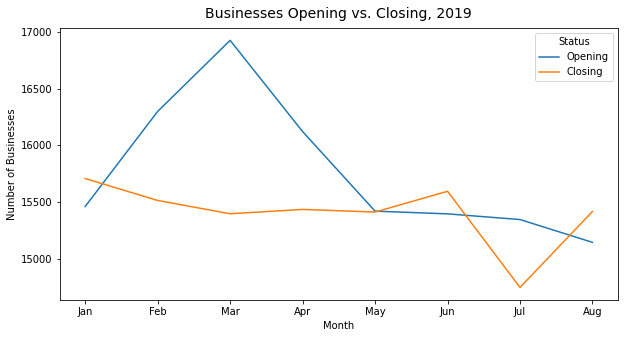

In [ ]:
f, ax = plt.subplots(figsize = (10, 5))
ax.plot(b_opening_months.index, b_opening_months['2019'], label = 'Opening')
ax.plot(b_closing_months.index, b_closing_months['2019'], label = 'Closing')
ax.legend(loc = 'best', title = 'Status')

plt.title('Businesses Opening vs. Closing, 2019', fontdict = {'size': 14,}, pad = 10);
ax.set(xlabel = 'Month', ylabel = 'Number of Businesses')
plt.xticks(b_opening_months.index, b_opening_months['Month_Name']);

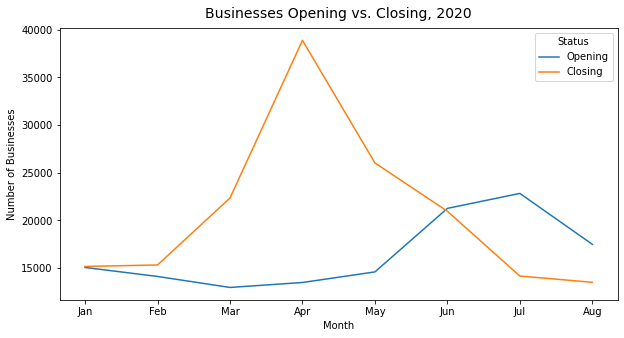

In [ ]:
f, ax = plt.subplots(figsize = (10, 5))
ax.plot(b_opening_months.index, b_opening_months['2020'], label = 'Opening')
ax.plot(b_closing_months.index, b_closing_months['2020'], label = 'Closing')
ax.legend(loc = 'best', title = 'Status')

plt.title('Businesses Opening vs. Closing, 2020', fontdict = {'size': 14,}, pad = 10);
ax.set(xlabel = 'Month', ylabel = 'Number of Businesses')
plt.xticks(b_opening_months.index, b_opening_months['Month_Name']);

## Ontario Covid School Cases

In [ ]:
schoolCases.head(5)

collected_date reported_date  \
0     2020-09-16    2020-09-17   
1     2020-09-16    2020-09-17   
2     2020-09-17    2020-09-18   
3     2020-09-18    2020-09-21   
4     2020-09-21    2020-09-22   

                                        school_board           municipality  \
0  Dufferin Peel Catholic District School Board; ...  Brampton; Mississauga   
1  Peel District School Board; Dufferin-Peel Dist...               Brampton   
2  Dufferin Peel Catholic District School Board; ...            Peel Region   
3  Dufferin Peel Catholic District School Board; ...            Peel Region   
4  Dufferin Peel Catholic District School Board; ...            Peel Region   

   confirmed_school_partner_cases  
0                               1  
1                               1  
2                               2  
3                               2  
4                               2

## Covid Infobase (Canada)

In [ ]:
covidInfobase.head(5)

pruid            prname              prnameFR        date  numconf  \
0     35           Ontario               Ontario  2020-01-31        3   
1     59  British Columbia  Colombie-Britannique  2020-01-31        1   
2      1            Canada                Canada  2020-01-31        4   
3     35           Ontario               Ontario  2020-02-08        3   
4     59  British Columbia  Colombie-Britannique  2020-02-08        4   

   numprob  numdeaths  numtotal  numtested  numrecover  percentrecover  \
0        0        0.0         3        NaN         NaN             NaN   
1        0        0.0         1        NaN         NaN             NaN   
2        0        0.0         4        NaN         NaN             NaN   
3        0        0.0         3        NaN         NaN             NaN   
4        0        0.0         4        NaN         NaN             NaN   

   ratetested  numtoday  percentoday  ratetotal  ratedeaths  numdeathstoday  \
0         NaN         3        300.0       0.02         0.0             0.0   
1         NaN         1        100.0       0.02         0.0             0.0   
2         NaN         4        400.0       0.01         0.0             0.0   
3         NaN         0          0.0       0.02         0.0             0.0   
4         NaN         3        300.0       0.08         0.0             0.0   

   percentdeath  numtestedtoday  numrecoveredtoday  percentactive  numactive  \
0           0.0             NaN                NaN          100.0        3.0   
1           0.0             NaN                NaN          100.0        1.0   
2           0.0             NaN                NaN          100.0        4.0   
3           0.0             NaN                NaN          100.0        3.0   
4           0.0             NaN                NaN          100.0        4.0   

   rateactive  numtotal_last14  ratetotal_last14  numdeaths_last14  \
0        0.02              NaN               NaN               NaN   
1        0.02              NaN               NaN               NaN   
2        0.01              NaN               NaN               NaN   
3        0.02              NaN               NaN               NaN   
4        0.08              NaN               NaN               NaN   

   ratedeaths_last14  numtotal_last7  ratetotal_last7  numdeaths_last7  \
0                NaN             NaN              NaN              NaN   
1                NaN             NaN              NaN              NaN   
2                NaN             NaN              NaN              NaN   
3                NaN             NaN              NaN              NaN   
4                NaN             NaN              NaN              NaN   

   ratedeaths_last7  avgtotal_last7  avgincidence_last7  avgdeaths_last7  \
0               NaN             NaN                 NaN              NaN   
1               NaN             NaN                 NaN              NaN   
2               NaN             NaN                 NaN              NaN   
3               NaN             NaN                 NaN              NaN   
4               NaN             NaN                 NaN              NaN   

   avgratedeaths_last7  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

## Hours Worked

In [ ]:
hoursWorked.head(5)

REF_DATE     GEO           DGUID  \
0  1976-01  Canada  2016A000011124   
1  1976-02  Canada  2016A000011124   
2  1976-03  Canada  2016A000011124   
3  1976-04  Canada  2016A000011124   
4  1976-05  Canada  2016A000011124   

  North American Industry Classification System (NAICS) Statistics    UOM  \
0          Total actual hours worked, all industries      Estimate  Hours   
1          Total actual hours worked, all industries      Estimate  Hours   
2          Total actual hours worked, all industries      Estimate  Hours   
3          Total actual hours worked, all industries      Estimate  Hours   
4          Total actual hours worked, all industries      Estimate  Hours   

   UOM_ID SCALAR_FACTOR  SCALAR_ID    VECTOR COORDINATE     VALUE STATUS  \
0     152     thousands          3  v4391505      1.1.1  349438.4    NaN   
1     152     thousands          3  v4391505      1.1.1  347387.9    NaN   
2     152     thousands          3  v4391505      1.1.1  348572.0    NaN   
3     152     thousands          3  v4391505      1.1.1  350861.8    NaN   
4     152     thousands          3  v4391505      1.1.1  351030.8    NaN   

   SYMBOL  TERMINATED  DECIMALS  
0     NaN         NaN         1  
1     NaN         NaN         1  
2     NaN         NaN         1  
3     NaN         NaN         1  
4     NaN         NaN         1

## Household Expenditure

In [ ]:
expenditure.tail(5)

REF_DATE     GEO           DGUID                Prices  \
116231  2020-04  Canada  2016A000011124  2012 constant prices   
116232  2020-04  Canada  2016A000011124  2012 constant prices   
116233  2020-04  Canada  2016A000011124  2012 constant prices   
116234  2020-04  Canada  2016A000011124  2012 constant prices   
116235  2020-04  Canada  2016A000011124  2012 constant prices   

       Seasonal adjustment                                          Estimates  \
116231          Unadjusted                    Expenditure by Canadians abroad   
116232          Unadjusted             Expenditure by non-residents in Canada   
116233          Unadjusted            Net expenditure abroad, adjusting entry   
116234          Unadjusted  Household final consumption expenditure, adjus...   
116235          Unadjusted  Household final consumption expenditure, adjus...   

            UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID     VECTOR COORDINATE  \
116231  Dollars      81      millions          6  v62700935  1.2.2.125   
116232  Dollars      81      millions          6  v62700936  1.2.2.126   
116233  Dollars      81      millions          6  v62700937  1.2.2.127   
116234  Dollars      81      millions          6  v62700938  1.2.2.128   
116235  Dollars      81      millions          6  v62700939  1.2.2.129   

         VALUE STATUS  SYMBOL TERMINATED  DECIMALS  
116231   647.0    NaN     NaN        NaN         0  
116232 -2323.0    NaN     NaN        NaN         0  
116233     0.0    NaN     NaN        NaN         0  
116234     0.0    NaN     NaN        NaN         0  
116235     0.0    NaN     NaN        NaN         0

# Daily and Weekly Covid Case Count

In [76]:
#Convert Date to Date-Time to allow resampling
covidOntarioCases['Case_Reported_Date']=pd.to_datetime(covidOntarioCases['Case_Reported_Date'])

In [77]:
#Group by date, count total cases per day, and relabel to 'Case Count'
dailyCaseCount = covidOntarioCases.groupby(['Case_Reported_Date'])[['Accurate_Episode_Date']].aggregate('count')
dailyCaseCount = dailyCaseCount.rename(columns={'Accurate_Episode_Date':'Case Count'})
dailyCaseCount.tail()

Case Count
Case_Reported_Date            
2020-11-16                1284
2020-11-17                1163
2020-11-18                1396
2020-11-19                1288
2020-11-20                 712

In [78]:
#Resample to weekly total case counts
weeklyCaseCount = dailyCaseCount.resample('W').sum()
weeklyCaseCount.tail()

Case Count
Case_Reported_Date            
2020-10-25                6138
2020-11-01                6581
2020-11-08                7812
2020-11-15               10309
2020-11-22                5843

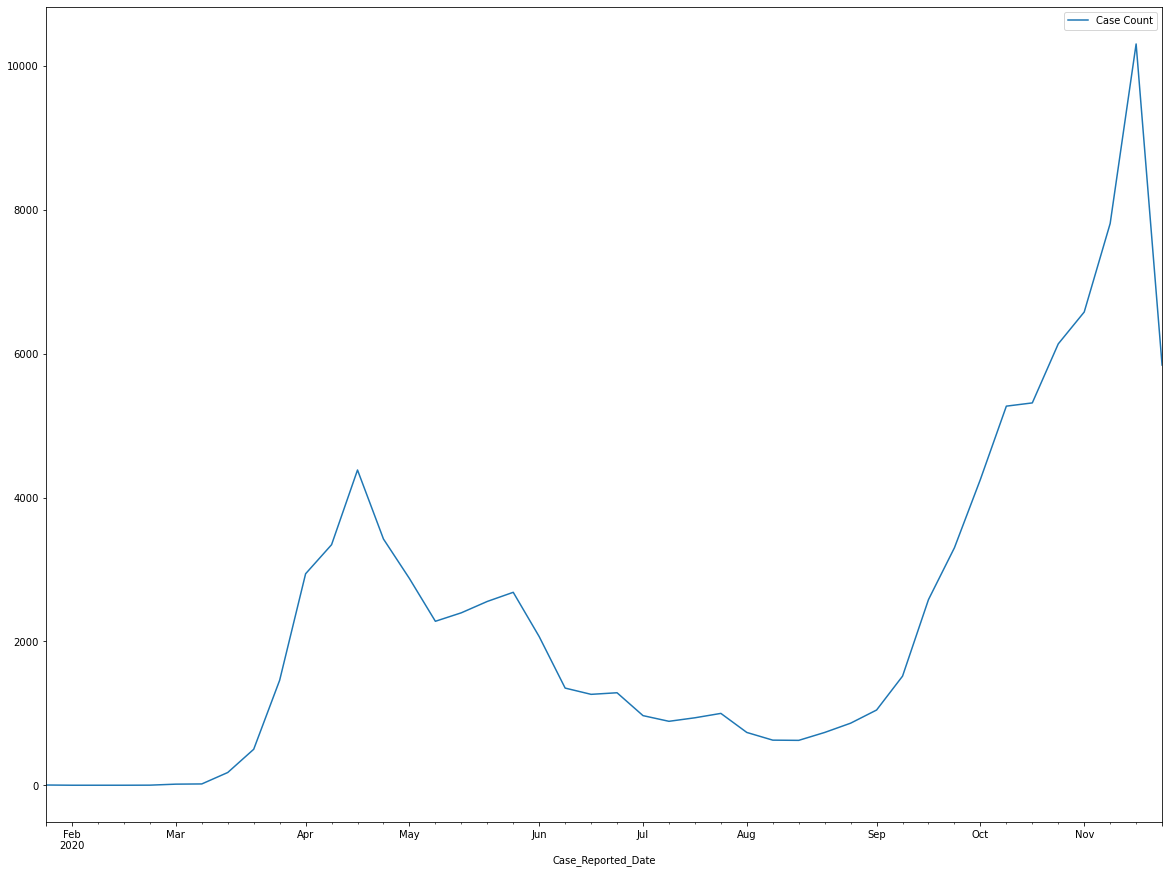

In [81]:
weeklyCaseCount.plot(figsize=(20,15));

# CERB

In [ ]:
CERBgenderURL = 'https://raw.githubusercontent.com/smauti/CERB/main/CERB_Total_Unique_Applicants_PT_Gender.csv'
CERBageURL = 'https://raw.githubusercontent.com/smauti/CERB/main/CERB_total_unique_applicants_PT_Age_group.csv'
CERB_URL = 'https://raw.githubusercontent.com/smauti/CERB/main/CERB_Weekly_Statistics.csv'

In [ ]:
CERBgender = pd.read_csv(CERBgenderURL)
CERBage=pd.read_csv(CERBageURL)
CERB = pd.read_csv(CERB_URL)

In [ ]:
CERB.head()

cerb_week_ending_date  week_to_date_application_count  \
0             4/19/2020                         2890000   
1             4/26/2020                         1341000   
2              5/5/2020                          820000   
3             5/10/2020                          608000   
4             5/19/2020                         2827000   

   total_unique_applicant_count  total_application_received_count  \
0                       6279000                           8675000   
1                       6682000                           9990000   
2                       7199000                          11020000   
3                       7332000                          11375000   
4                       7592000                          14350000   

   total_application_processed_count  total_paid_dollar_value  
0                            8382000              19804000000  
1                            9840000              24250000000  
2                           10840000              28570000000  
3                           11290000              30482000000  
4                           14310000              38410000000

In [ ]:
CERB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   cerb_week_ending_date              25 non-null     object
 1   week_to_date_application_count     25 non-null     int64 
 2   total_unique_applicant_count       25 non-null     int64 
 3   total_application_received_count   25 non-null     int64 
 4   total_application_processed_count  25 non-null     int64 
 5   total_paid_dollar_value            25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [ ]:
# Set date to date-time 
CERB['cerb_week_ending_date'] = pd.to_datetime(CERB['cerb_week_ending_date'])

# Set date as index
CERB.set_index(CERB['cerb_week_ending_date'],inplace=True)

In [ ]:
#Calculate weekly net applicants
CERB['net_applicant_count'] = CERB['total_unique_applicant_count'].diff()

Text(0.5, 0, 'Week End Date')

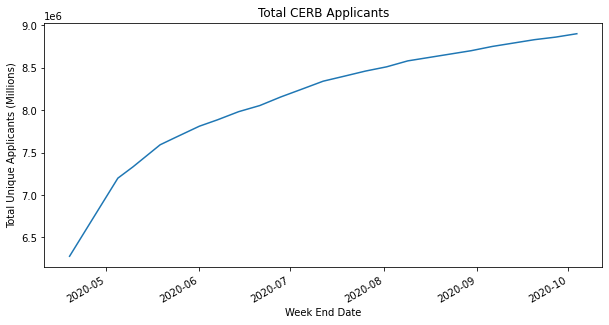

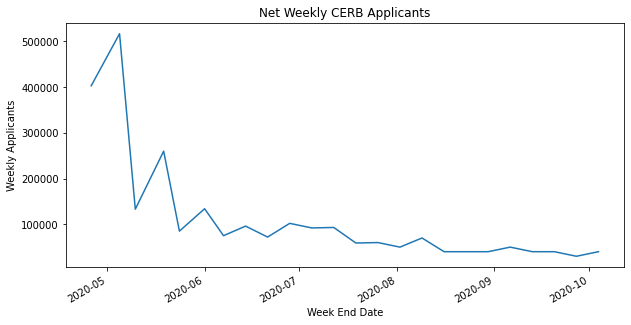

In [ ]:
CERB.plot(x= 'cerb_week_ending_date', y= 'total_unique_applicant_count', figsize=(10,5),legend=None)
plt.title('Total CERB Applicants')
plt.ylabel('Total Unique Applicants (Millions)')
plt.xlabel('Week End Date')

CERB.plot(x= 'cerb_week_ending_date', y= 'net_applicant_count', figsize=(10,5),legend=None)
plt.title('Net Weekly CERB Applicants')
plt.ylabel('Weekly Applicants')
plt.xlabel('Week End Date')

## CERB in ON vs. Covid Case Counts

In [ ]:
CERBgender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cerb_week_ending_date      675 non-null    object
 1   canadian_subdivision_code  675 non-null    object
 2   gender_group_code          675 non-null    int64 
 3   unique_applicant_count     675 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 21.2+ KB


In [ ]:
CERBgender.head()

cerb_week_ending_date canadian_subdivision_code  gender_group_code  \
0             6/28/2020                        NL                101   
1             6/28/2020                        NL                102   
2             6/28/2020                        NL                103   
3             6/28/2020                        PE                101   
4             6/28/2020                        PE                102   

   unique_applicant_count   
0                    47820  
1                    52620  
2                       30  
3                    14590  
4                    14610

In [ ]:
#Change gender code to genders
CERBgender = CERBgender.replace({101:'Female',102:'Male',103:'Non-Binary/Undisclosed'})

In [ ]:
# Just take ON
CERBgenderON = CERBgender[CERBgender['canadian_subdivision_code']=='ON']

In [ ]:
# Convert to date-time so can be compared to covid cases on same scale
CERBgenderON['cerb_week_ending_date'] = pd.to_datetime(CERBgenderON['cerb_week_ending_date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
weeklyCERB = CERBgenderON.groupby(['cerb_week_ending_date'])[['unique_applicant_count ']].sum()


In [ ]:
#Calculate net weekly applicant

weeklyCERB['net_applicant_count'] = weeklyCERB['unique_applicant_count '].diff()

In [ ]:
#Combine DataFrames to plot
df = pd.concat([weeklyCaseCount,weeklyCERB],axis=1)
df.head()

Case Count  unique_applicant_count   net_applicant_count
2020-01-26           3                      NaN                  NaN
2020-02-02           0                      NaN                  NaN
2020-02-09           0                      NaN                  NaN
2020-02-16           0                      NaN                  NaN
2020-02-23           1                      NaN                  NaN

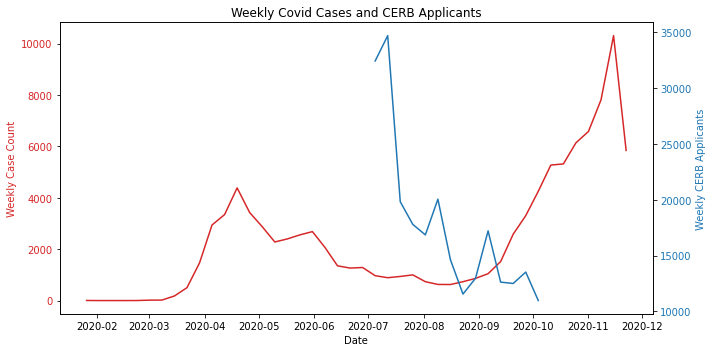

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('Date')
ax1.set_title('Weekly Covid Cases and CERB Applicants')
ax1.set_ylabel('Weekly Case Count', color='tab:red')
ax1.plot(df.index, df['Case Count'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx() 

ax2.set_ylabel('Weekly CERB Applicants', color='tab:blue')  
ax2.plot(df.index, df['net_applicant_count'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  
plt.show()

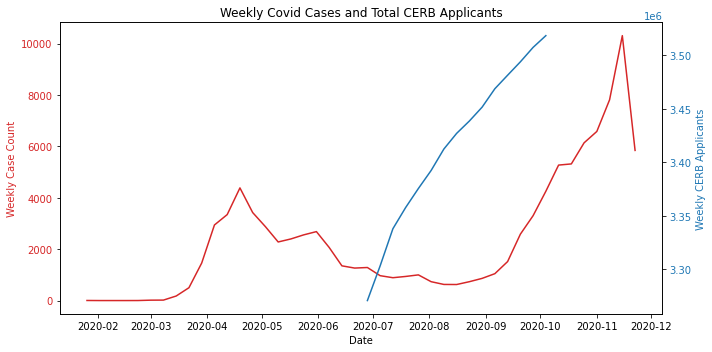

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('Date')
ax1.set_title('Weekly Covid Cases and Total CERB Applicants')
ax1.set_ylabel('Weekly Case Count', color='tab:red')
ax1.plot(df.index, df['Case Count'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx() 

ax2.set_ylabel('Weekly CERB Applicants', color='tab:blue')  
ax2.plot(df.index, df['unique_applicant_count '], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  
plt.show()

## CERB applicants by Gender

In [ ]:
# Group by week ending date and gender to get unique applicant count for each gender code
CERBgender=CERBgenderON.groupby(['cerb_week_ending_date','gender_group_code'])[['unique_applicant_count ']].sum().unstack()

In [ ]:
# Calculate net weekly applicants for all gender codes
CERBgender['Female'] = CERBgender['unique_applicant_count ']['Female'].diff()
CERBgender['Male'] = CERBgender['unique_applicant_count ']['Female'].diff()
CERBgender['Non-Binary/Undisclosed'] = CERBgender['unique_applicant_count ']['Female'].diff()

Text(0.5, 0, 'Week End Date')

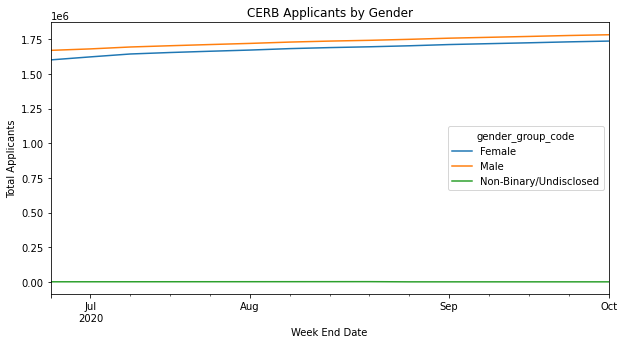

In [ ]:
#CERBgender['unique_applicant_count '].plot(kind='bar',figsize=(10,5))
CERBgender['unique_applicant_count '].plot(figsize=(10,5))
plt.title('CERB Applicants by Gender')
plt.ylabel('Total Applicants')
plt.xlabel('Week End Date')

Text(0.5, 0, 'Week End Date')

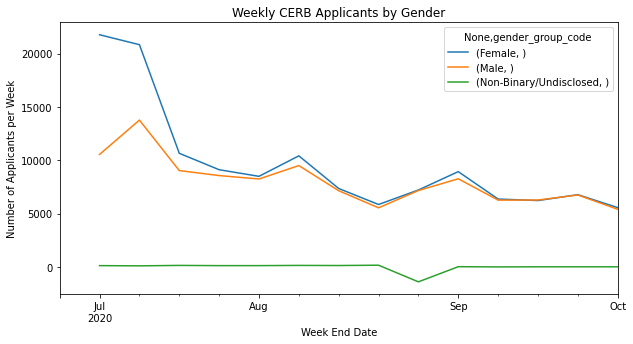

In [ ]:
#CERBgender[['Female','Male','Non-Binary/Undisclosed']].plot(kind='bar',figsize=(10,5)
CERBgender[['Female','Male','Non-Binary/Undisclosed']].plot(figsize=(10,5))
plt.title('Weekly CERB Applicants by Gender')
plt.ylabel('Number of Applicants per Week')
plt.xlabel('Week End Date')
##format?? Add title, and axis labels, format date on x-axis

## CERB applicants by Age

In [ ]:
CERBage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   cerb_week_ending_date       1485 non-null   object
 1   canadian_subdivision_code   1485 non-null   object
 2   age_group_code              1485 non-null   int64 
 3   unique_applicant_count      1485 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.5+ KB


In [ ]:
CERBage.head()

cerb_week_ending_date  canadian_subdivision_code   age_group_code   \
0              6/28/2020                         NL               24   
1              6/28/2020                         NL               25   
2              6/28/2020                         NL               35   
3              6/28/2020                         NL               45   
4              6/28/2020                         NL               55   

   unique_applicant_count   
0                    17270  
1                    20890  
2                    18820  
3                    19070  
4                    18330

In [ ]:
age_group = ['Unknown','25 & Under','25 - 34','35 - 44','45 - 54','55 - 64','65 & Older']
CERBageON = CERBage[CERBage['canadian_subdivision_code ']=='ON']
CERBageON = CERBageON.replace({-1:age_group[0],24:age_group[1],25:age_group[2],35:age_group[3],45:age_group[4],55:age_group[5],65:age_group[6]})
CERBageON.tail()


cerb_week_ending_date  canadian_subdivision_code  age_group_code   \
1426              10/4/2020                         ON         25 - 34   
1427              10/4/2020                         ON         35 - 44   
1428              10/4/2020                         ON         45 - 54   
1429              10/4/2020                         ON         55 - 64   
1430              10/4/2020                         ON      65 & Older   

      unique_applicant_count   
1426                   845030  
1427                   671050  
1428                   613290  
1429                   556030  
1430                   189440

In [ ]:
CERBageON['cerb_week_ending_date '] = pd.to_datetime(CERBageON['cerb_week_ending_date '])

In [ ]:
CERBage=CERBageON.groupby(['cerb_week_ending_date ','age_group_code '])[['unique_applicant_count ']].sum().unstack()

In [ ]:
# Calculate net weekly applicants for all age group codes
CERBage['Unknown'] = CERBage['unique_applicant_count ']['Unknown'].diff()
CERBage['25 & Under'] = CERBage['unique_applicant_count ']['25 & Under'].diff()
CERBage['25 - 34'] = CERBage['unique_applicant_count ']['25 - 34'].diff()
CERBage['35 - 44'] = CERBage['unique_applicant_count ']['35 - 44'].diff()
CERBage['45 - 54'] = CERBage['unique_applicant_count ']['45 - 54'].diff()
CERBage['55 - 64'] = CERBage['unique_applicant_count ']['55 - 64'].diff()
CERBage['65 & Older'] = CERBage['unique_applicant_count ']['65 & Older'].diff()

Text(0.5, 0, 'Week End Date')

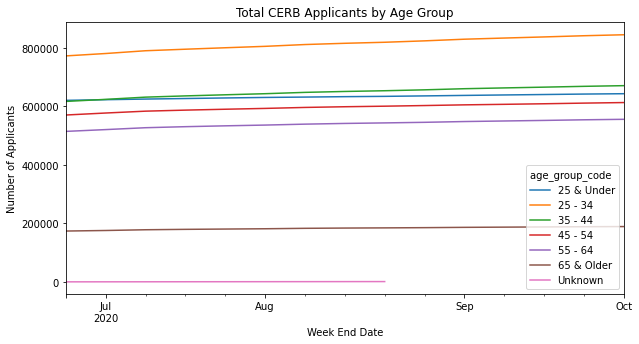

In [ ]:
CERBage['unique_applicant_count '].plot(figsize=(10,5))
plt.title('Total CERB Applicants by Age Group')
plt.ylabel('Number of Applicants')
plt.xlabel('Week End Date')

Text(0.5, 0, 'Week End Date')

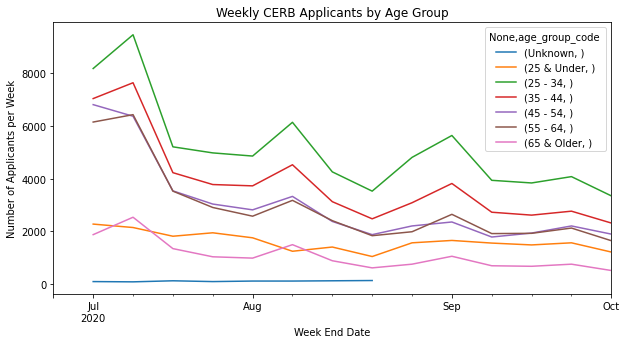

In [ ]:
#CERBage[age_group].plot(kind='bar', figsize=(10,5))
CERBage[age_group].plot(figsize=(10,5))
plt.title('Weekly CERB Applicants by Age Group')
plt.ylabel('Number of Applicants per Week')
plt.xlabel('Week End Date')

# Canada Labour Force Impact

In [87]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'xx-large',
         'figure.figsize': (25, 15),
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
pd.options.display.float_format = '{:.5f}'.format
## ------------- Display all commands in cell -------------##
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
## -------------------------------------------------------##

In [4]:
## Import of Data Set "Labour force characteristics by province, monthly, seasonally adjusted in Canada"
## Citing: Statistics Canada. Table 14-10-0287-03 Labour force characteristics by province, monthly, seasonally adjusted
## DOI: https://doi.org/10.25318/1410028701-eng

In [5]:
# Importing the data from GitHub repository
# Since the csv file was too big to upload I had to split it into several files
# preparing github urls where the labour split csv files are stored
urls = ['https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part1.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part2.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part3_1.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part3_2.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part4.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part5_1.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part5_2.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part6_1.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part6_2.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part7_1.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part7_2.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part8.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part9.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part10.csv',
        'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/part11.csv'
        ]

In [6]:
# reading all csv files and storing in array
# IMPORTANT, if you run this line it will take ~1 minute to load all the files
temp = []
for url in urls:
    temp.append(pd.read_csv(url, error_bad_lines=False))

In [7]:
data = []
for i in range (0,15):
    if((i == 2) | (i == 5) | (i == 7) | (i == 9)):
        data.append(temp[i].append(temp[i+1]))
    elif((i == 3) | (i == 6) | (i == 8) | (i == 10)):
        continue
    else:
        data.append(temp[i])

In [8]:
# just checking to see that I loaded everything properly
for i in data:
    i.head()

Unnamed: 0 REF_DATE
0     3344652  2007-01
1     3344654  2007-01
2     3344656  2007-01
3     3344658  2007-01
4     3344660  2007-01

Unnamed: 0     GEO
0     3344652  Canada
1     3344654  Canada
2     3344656  Canada
3     3344658  Canada
4     3344660  Canada

Unnamed: 0 Labour force characteristics
0     3344652                   Population
1     3344654                   Population
2     3344656                   Population
3     3344658                   Population
4     3344660                   Population

Unnamed: 0         Sex
0     3344652  Both sexes
1     3344654  Both sexes
2     3344656  Both sexes
3     3344658  Both sexes
4     3344660  Both sexes

Unnamed: 0          Age group
0     3344652  15 years and over
1     3344654     15 to 64 years
2     3344656     15 to 24 years
3     3344658     15 to 19 years
4     3344660     20 to 24 years

Unnamed: 0 Statistics
0     3344652   Estimate
1     3344654   Estimate
2     3344656   Estimate
3     3344658   Estimate
4     3344660   Estimate

Unnamed: 0            Data type
0     3344652  Seasonally adjusted
1     3344654  Seasonally adjusted
2     3344656  Seasonally adjusted
3     3344658  Seasonally adjusted
4     3344660  Seasonally adjusted

Unnamed: 0      UOM
0     3344652  Persons
1     3344654  Persons
2     3344656  Persons
3     3344658  Persons
4     3344660  Persons

Unnamed: 0 SCALAR_FACTOR
0     3344652     thousands
1     3344654     thousands
2     3344656     thousands
3     3344658     thousands
4     3344660     thousands

Unnamed: 0  SCALAR_ID
0     3344652          3
1     3344654          3
2     3344656          3
3     3344658          3
4     3344660          3

Unnamed: 0       VALUE
0     3344652 26306.90000
1     3344654 22227.30000
2     3344656  4365.50000
3     3344658  2164.40000
4     3344660  2201.10000

In [9]:
# dropping the unnamed column
for i in data:
    i.drop('Unnamed: 0', 1, inplace=True)

In [12]:
data.head

AttributeError: 'list' object has no attribute 'head'

In [13]:
# reset of the index, needed to be able to concatenate everything together
for i in data:
    i.reset_index(inplace=True)

In [14]:
# drop the old index column that was reset
for i in data:
    i.drop(['index'], 1, inplace=True)

In [15]:
len(data)

11

In [16]:
# merging everything together into 1 daataframe
merge = pd.concat([data[0], data[1], data[2] ,data[3], data[4], data[5], data[6], data[7], data[8], data[9], data[10]], 1)

In [17]:
### Checks to make sure the constructed data set is exactly as the local one that had already been used
merge.shape

(1101198, 11)

In [18]:
merge.head()

REF_DATE     GEO Labour force characteristics         Sex  \
0  2007-01  Canada                   Population  Both sexes   
1  2007-01  Canada                   Population  Both sexes   
2  2007-01  Canada                   Population  Both sexes   
3  2007-01  Canada                   Population  Both sexes   
4  2007-01  Canada                   Population  Both sexes   

           Age group Statistics            Data type      UOM SCALAR_FACTOR  \
0  15 years and over   Estimate  Seasonally adjusted  Persons     thousands   
1     15 to 64 years   Estimate  Seasonally adjusted  Persons     thousands   
2     15 to 24 years   Estimate  Seasonally adjusted  Persons     thousands   
3     15 to 19 years   Estimate  Seasonally adjusted  Persons     thousands   
4     20 to 24 years   Estimate  Seasonally adjusted  Persons     thousands   

   SCALAR_ID       VALUE  
0          3 26306.90000  
1          3 22227.30000  
2          3  4365.50000  
3          3  2164.40000  
4          3  2201.10000

In [19]:
p = merge

In [20]:
u = merge

In [21]:
p = merge[(merge['Statistics'] == 'Estimate') 
               & (~(merge['GEO'] == 'Canada')) 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 years and over'))
                & (merge['Labour force characteristics'] == 'Population')]

u = merge[(merge['Statistics'] == 'Estimate') 
               & (~(merge['GEO'] == 'Canada')) 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 years and over'))
                & (merge['Labour force characteristics'] == 'Unemployment')]

In [53]:
p.head()

REF_DATE                        GEO Labour force characteristics  \
804   2007-01  Newfoundland and Labrador                   Population   
1383  2007-01       Prince Edward Island                   Population   
1962  2007-01                Nova Scotia                   Population   
2541  2007-01              New Brunswick                   Population   
3120  2007-01                     Quebec                   Population   

             Sex          Age group Statistics            Data type      UOM  \
804   Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
1383  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
1962  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
2541  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
3120  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   

     SCALAR_FACTOR  SCALAR_ID      VALUE  
804      thousands          3  425.70000  
1383     thousands          3  112.20000  
1962     thousands          3  764.50000  
2541     thousands          3  607.00000  
3120     thousands          3 6269.40000

In [47]:
u.head()

REF_DATE                        GEO Labour force characteristics  \
1095  2007-01  Newfoundland and Labrador                 Unemployment   
1674  2007-01       Prince Edward Island                 Unemployment   
2253  2007-01                Nova Scotia                 Unemployment   
2832  2007-01              New Brunswick                 Unemployment   
3411  2007-01                     Quebec                 Unemployment   

             Sex          Age group Statistics            Data type      UOM  \
1095  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
1674  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
2253  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
2832  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
3411  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   

     SCALAR_FACTOR  SCALAR_ID     VALUE  
1095     thousands          3  38.20000  
1674     thousands          3   8.20000  
2253     thousands          3  37.80000  
2832     thousands          3  29.90000  
3411     thousands          3 314.60000

In [48]:
p.shape

(1670, 11)

In [49]:
u.shape

(1670, 11)

In [42]:
c = p.copy()

In [54]:
p.reset_index(inplace=True)
u.reset_index(inplace=True)

In [59]:
c.reset_index(inplace=True)

In [60]:
c['percentage'] = u['VALUE'] / p['VALUE']

In [62]:
c['percentage'] = c['percentage'] * 100

In [73]:
c.head()

index REF_DATE                        GEO Labour force characteristics  \
0    804  2007-01  Newfoundland and Labrador                   Population   
1   1383  2007-01       Prince Edward Island                   Population   
2   1962  2007-01                Nova Scotia                   Population   
3   2541  2007-01              New Brunswick                   Population   
4   3120  2007-01                     Quebec                   Population   

          Sex          Age group Statistics            Data type      UOM  \
0  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
1  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
2  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
3  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   
4  Both sexes  15 years and over   Estimate  Seasonally adjusted  Persons   

  SCALAR_FACTOR  SCALAR_ID      VALUE  percentage  
0     thousands          3  425.70000     8.97346  
1     thousands          3  112.20000     7.30838  
2     thousands          3  764.50000     4.94441  
3     thousands          3  607.00000     4.92586  
4     thousands          3 6269.40000     5.01802

In [57]:
c.drop('percentage', axis=1, inplace=True)

In [70]:
c1 = c[c['REF_DATE'].str.contains('2020')].copy()

In [71]:
c1

index REF_DATE                        GEO  \
1560  1029468  2020-01  Newfoundland and Labrador   
1561  1030047  2020-01       Prince Edward Island   
1562  1030626  2020-01                Nova Scotia   
1563  1031205  2020-01              New Brunswick   
1564  1031784  2020-01                     Quebec   
...       ...      ...                        ...   
1665  1098303  2020-11                    Ontario   
1666  1098882  2020-11                   Manitoba   
1667  1099461  2020-11               Saskatchewan   
1668  1100040  2020-11                    Alberta   
1669  1100619  2020-11           British Columbia   

     Labour force characteristics         Sex          Age group Statistics  \
1560                   Population  Both sexes  15 years and over   Estimate   
1561                   Population  Both sexes  15 years and over   Estimate   
1562                   Population  Both sexes  15 years and over   Estimate   
1563                   Population  Both sexes  15 years and over   Estimate   
1564                   Population  Both sexes  15 years and over   Estimate   
...                           ...         ...                ...        ...   
1665                   Population  Both sexes  15 years and over   Estimate   
1666                   Population  Both sexes  15 years and over   Estimate   
1667                   Population  Both sexes  15 years and over   Estimate   
1668                   Population  Both sexes  15 years and over   Estimate   
1669                   Population  Both sexes  15 years and over   Estimate   

                Data type      UOM SCALAR_FACTOR  SCALAR_ID       VALUE  \
1560  Seasonally adjusted  Persons     thousands          3   439.80000   
1561  Seasonally adjusted  Persons     thousands          3   130.20000   
1562  Seasonally adjusted  Persons     thousands          3   813.00000   
1563  Seasonally adjusted  Persons     thousands          3   634.60000   
1564  Seasonally adjusted  Persons     thousands          3  7089.10000   
...                   ...      ...           ...        ...         ...   
1665  Seasonally adjusted  Persons     thousands          3 12378.90000   
1666  Seasonally adjusted  Persons     thousands          3  1048.20000   
1667  Seasonally adjusted  Persons     thousands          3   894.00000   
1668  Seasonally adjusted  Persons     thousands          3  3588.70000   
1669  Seasonally adjusted  Persons     thousands          3  4193.40000   

      percentage  
1560     6.82128  
1561     4.99232  
1562     4.57565  
1563     4.60132  
1564     3.28250  
...          ...  
1665     5.92702  
1666     4.85594  
1667     4.66443  
1668     7.71031  
1669     4.58816  

[110 rows x 13 columns]

In [72]:
c1.drop('index', axis=1, inplace=True)

In [76]:
c1.reset_index(inplace=True)
c1.drop('index', axis=1, inplace=True)

In [80]:
c1.set_index('REF_DATE', inplace=True)

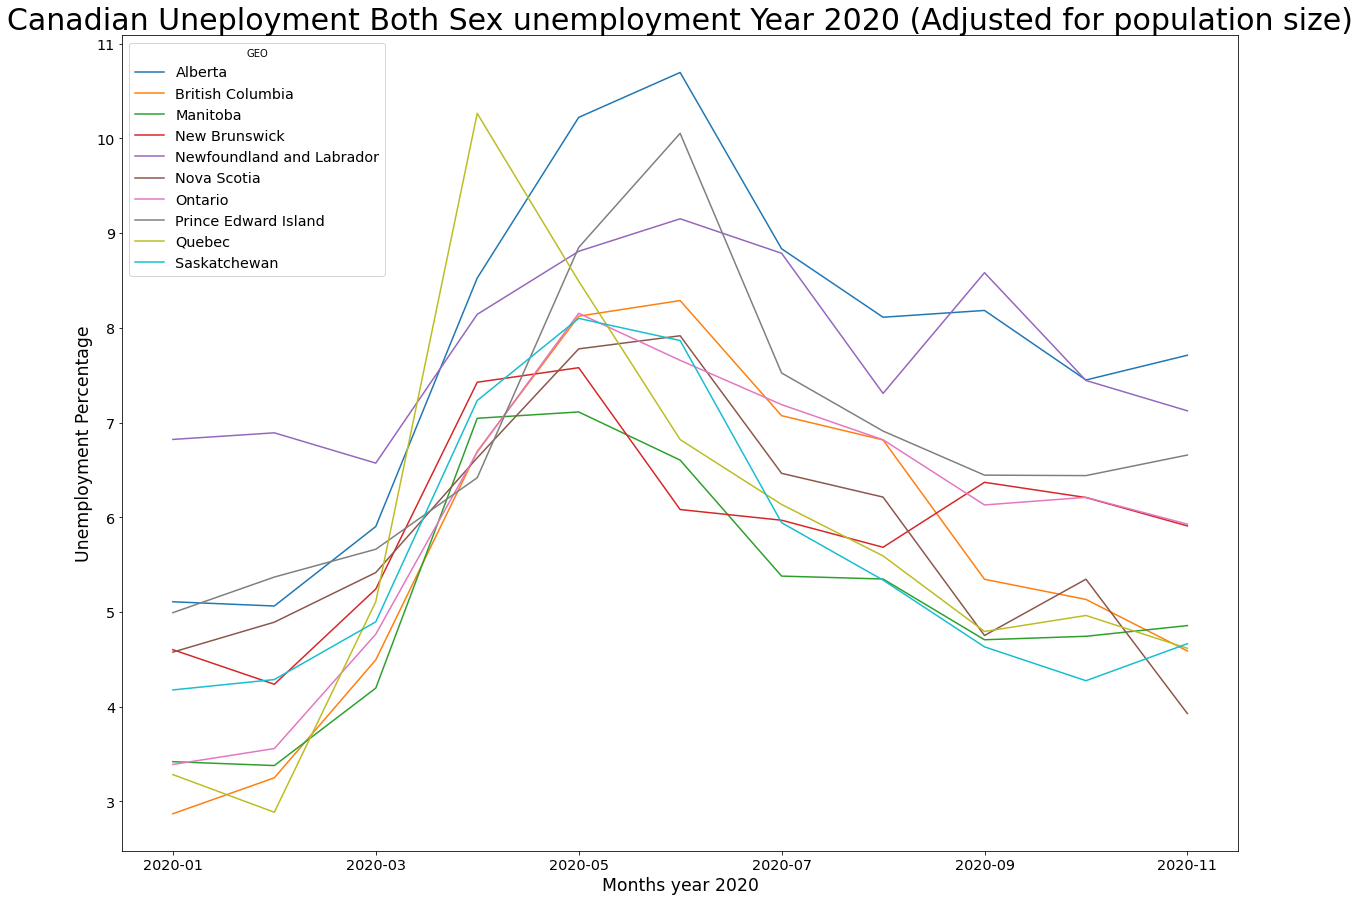

In [89]:
pd.crosstab(index= c1.index,
            columns= c1['GEO'],
            values= c1['percentage'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Uneployment Both Sex unemployment Year 2020 (Adjusted for population size)', fontsize=30);
plt.xlabel('Months year 2020');
plt.ylabel('Unemployment Percentage');

In [15]:
merge.tail()

REF_DATE               GEO  ... SCALAR_ID    VALUE
1101193  2020-11  British Columbia  ...         0  1.20000
1101194  2020-11  British Columbia  ...         0 29.40000
1101195  2020-11  British Columbia  ...         0  0.90000
1101196  2020-11  British Columbia  ...         0  0.60000
1101197  2020-11  British Columbia  ...         0  1.30000

[5 rows x 11 columns]

In [16]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101198 entries, 0 to 1101197
Data columns (total 11 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   REF_DATE                      1101198 non-null  object 
 1   GEO                           1101198 non-null  object 
 2   Labour force characteristics  1101198 non-null  object 
 3   Sex                           1101198 non-null  object 
 4   Age group                     1101198 non-null  object 
 5   Statistics                    1101198 non-null  object 
 6   Data type                     1101198 non-null  object 
 7   UOM                           1101198 non-null  object 
 8   SCALAR_FACTOR                 1101198 non-null  object 
 9   SCALAR_ID                     1101198 non-null  int64  
 10  VALUE                         1101194 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 92.4+ MB


In [18]:
merge.describe()

SCALAR_ID         VALUE
count 1101198.00000 1101194.00000
mean        1.86988     211.65676
std         1.45368    1219.24384
min         0.00000       0.10000
25%         0.00000       1.00000
50%         3.00000       3.40000
75%         3.00000      22.30000
max         3.00000   31275.60000

In [19]:
Labour_Data = merge

### Filtering the Dataset

In [20]:
Labour_Data.columns

Index(['REF_DATE', 'GEO', 'Labour force characteristics', 'Sex', 'Age group',
       'Statistics', 'Data type', 'UOM', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VALUE'],
      dtype='object')

In [21]:
Labour_Data.shape

(1101198, 11)

In [22]:
Labour_Data_est = Labour_Data[Labour_Data['Statistics']=='Estimate']
Labour_Data_est.shape

(302604, 11)

In [23]:
Labour_Data_est_Canada = Labour_Data_est[Labour_Data_est['GEO']=='Canada']
Labour_Data_est_Canada.shape

(37074, 11)

In [24]:
Labour_Data_est_Canada_unempl = Labour_Data_est_Canada[Labour_Data_est_Canada['Labour force characteristics']=='Unemployment']
Labour_Data_est_Canada_unempl.shape

(4509, 11)

In [25]:
Labour_Data_est_Canada_unempl_bothsex = Labour_Data_est_Canada_unempl[Labour_Data_est_Canada_unempl['Sex']=='Both sexes']
Labour_Data_est_Canada_unempl_bothsex.shape 

(1503, 11)

In [26]:
Labour_Data_est_Canada_unempl_bothsex_age = Labour_Data_est_Canada_unempl_bothsex[Labour_Data_est_Canada_unempl_bothsex['Age group']=='15 to 64 years']
Labour_Data_est_Canada_unempl_bothsex_age.shape

(167, 11)

In [27]:
print(Labour_Data_est_Canada_unempl_bothsex_age)

        REF_DATE     GEO  ... SCALAR_ID      VALUE
376      2007-01  Canada  ...         3 1092.70000
6970     2007-02  Canada  ...         3 1079.00000
13564    2007-03  Canada  ...         3 1068.80000
20158    2007-04  Canada  ...         3 1082.00000
26752    2007-05  Canada  ...         3 1053.70000
...          ...     ...  ...       ...        ...
1068604  2020-07  Canada  ...         3 2139.70000
1075198  2020-08  Canada  ...         3 2040.30000
1081792  2020-09  Canada  ...         3 1731.20000
1088386  2020-10  Canada  ...         3 1701.10000
1094980  2020-11  Canada  ...         3 1630.00000

[167 rows x 11 columns]


In [28]:
Labour_Data_est_Canada_unempl_bothsex_age.columns

Index(['REF_DATE', 'GEO', 'Labour force characteristics', 'Sex', 'Age group',
       'Statistics', 'Data type', 'UOM', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VALUE'],
      dtype='object')

### Aggregate unemployment time series Canada

In [ ]:
# Question 1: Impact of financial crisis and CVD19 pandemic on unemployment rates
# Prepare a time-series of unemployment rates from Jan 2007 - Dec 2020
## Plot aggregate unemployment time series

In [31]:
Unemploy_Canada_plot = Labour_Data_est_Canada_unempl_bothsex_age[['REF_DATE', 'VALUE']]
Unemploy_Canada_plot.head(100)

REF_DATE      VALUE
376     2007-01 1092.70000
6970    2007-02 1079.00000
13564   2007-03 1068.80000
20158   2007-04 1082.00000
26752   2007-05 1053.70000
...         ...        ...
626806  2014-12 1234.20000
633400  2015-01 1235.40000
639994  2015-02 1274.60000
646588  2015-03 1276.30000
653182  2015-04 1282.80000

[100 rows x 2 columns]

In [32]:
Unemploy_Canada_plot.reset_index(inplace=True,drop=True)
Unemploy_Canada_plot.head()

REF_DATE      VALUE
0  2007-01 1092.70000
1  2007-02 1079.00000
2  2007-03 1068.80000
3  2007-04 1082.00000
4  2007-05 1053.70000

In [33]:
df_plot = Unemploy_Canada_plot.set_index('REF_DATE')
df_plot

VALUE
REF_DATE           
2007-01  1092.70000
2007-02  1079.00000
2007-03  1068.80000
2007-04  1082.00000
2007-05  1053.70000
...             ...
2020-07  2139.70000
2020-08  2040.30000
2020-09  1731.20000
2020-10  1701.10000
2020-11  1630.00000

[167 rows x 1 columns]

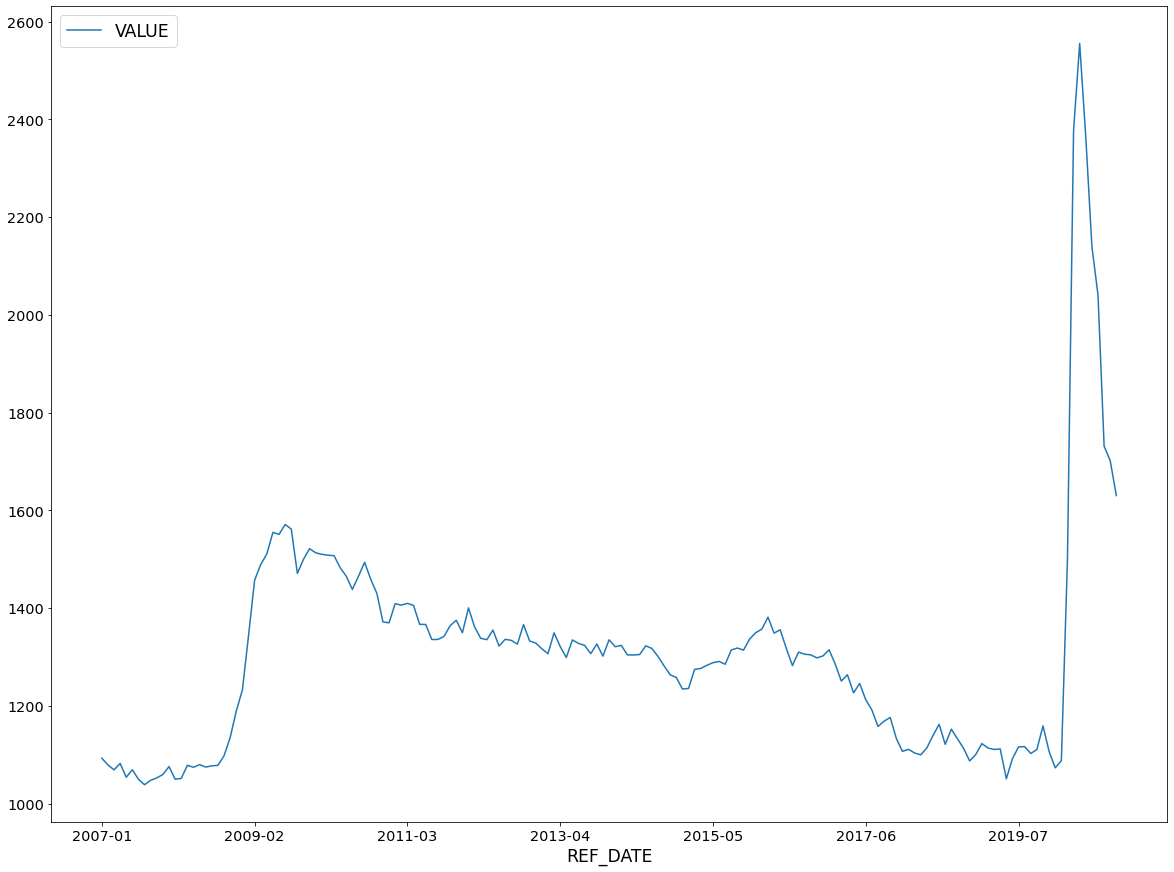

In [34]:
df_plot.plot()
plt.show();

In [ ]:
# Question 2: Unemployment impact distributed across gender and age groups
# Prepare a time-series of unemployment rates from (Jan 2007 - Dec 2009) & (Jan 2020-Dec 2020)
## Aggregate unemployment 
## Gender segregated unemployment
## Age Group segregated unemployment

In [ ]:
Labour_Data_est_Canada_unempl

### Female Unemployment Canada


In [35]:
Labour_Data_est_Canada_unempl_Females = Labour_Data_est_Canada_unempl[Labour_Data_est_Canada_unempl['Sex']=='Females']
Labour_Data_est_Canada_unempl_Females.shape

(1503, 11)

In [36]:
Labour_Data_est_Canada_unempl_Labour_Data_est_Canada_unempl_Females_allages = Labour_Data_est_Canada_unempl_Females[Labour_Data_est_Canada_unempl_Females['Age group']=='15 to 64 years']
Labour_Data_est_Canada_unempl_Labour_Data_est_Canada_unempl_Females_allages.shape

(167, 11)

In [37]:
Unemploy_Canada_plot_Females = Labour_Data_est_Canada_unempl_Labour_Data_est_Canada_unempl_Females_allages[['REF_DATE', 'VALUE']]
Unemploy_Canada_plot_Females = Unemploy_Canada_plot_Females.set_index('REF_DATE')
Unemploy_Canada_plot_Females.head(100)
Unemploy_Canada_plot_Females.shape

VALUE
REF_DATE          
2007-01  486.80000
2007-02  475.90000
2007-03  479.80000
2007-04  474.80000
2007-05  471.30000
...            ...
2014-12  555.90000
2015-01  545.10000
2015-02  547.60000
2015-03  560.00000
2015-04  555.50000

[100 rows x 1 columns]

(167, 1)

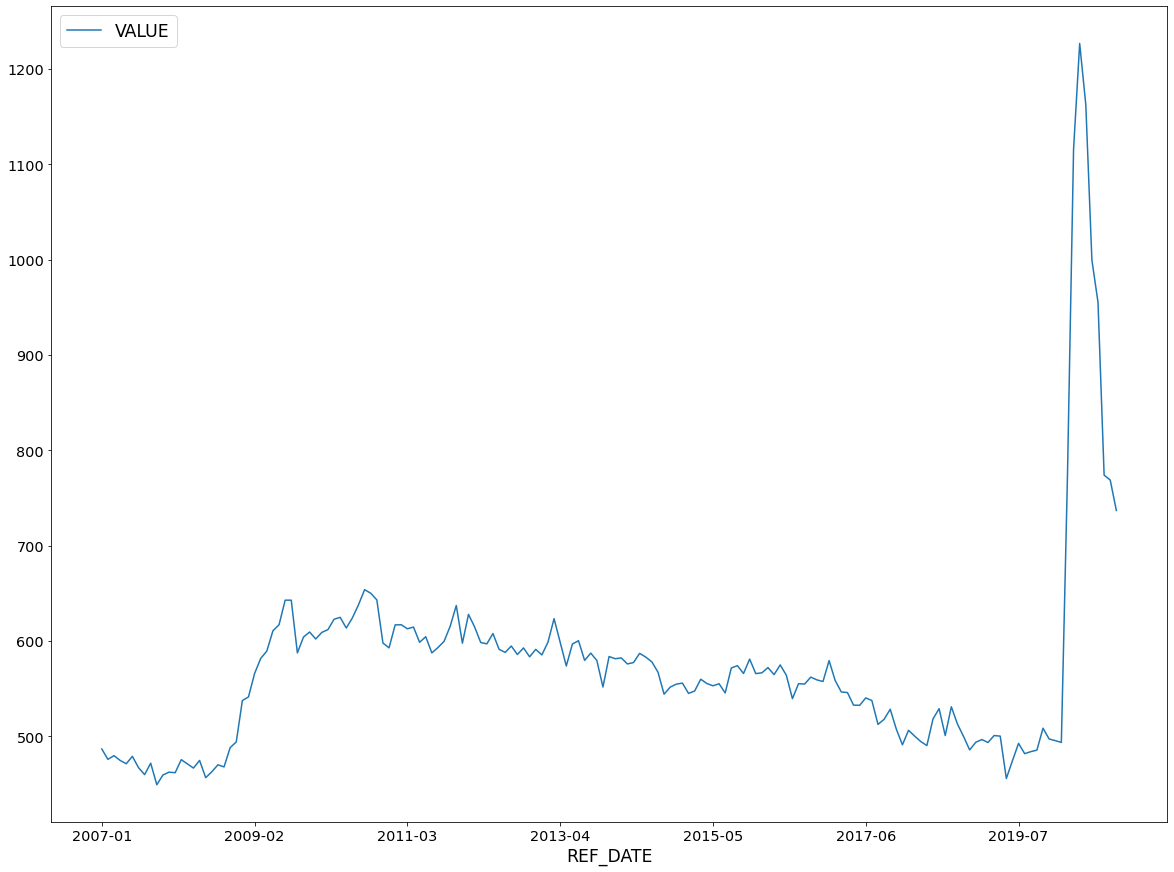

In [38]:
# Plotting the Time Series
Unemploy_Canada_plot_Females.plot()
plt.show();

# Male Unemployment Canada

In [39]:
Labour_Data_est_Canada_unempl_Males = Labour_Data_est_Canada_unempl[Labour_Data_est_Canada_unempl['Sex']=='Males']

In [40]:
Labour_Data_est_Canada_unempl_Labour_Data_est_Canada_unempl_Males_allages = Labour_Data_est_Canada_unempl_Males[Labour_Data_est_Canada_unempl_Males['Age group']=='15 to 64 years']

In [41]:
Labour_Data_est_Canada_unempl_Labour_Data_est_Canada_unempl_Males_allages.shape

(167, 11)

In [42]:
Unemploy_Canada_plot_Males = Labour_Data_est_Canada_unempl_Labour_Data_est_Canada_unempl_Males_allages[['REF_DATE', 'VALUE']]
Unemploy_Canada_plot_Males = Unemploy_Canada_plot_Males.set_index('REF_DATE')
Unemploy_Canada_plot_Males.head(100)

VALUE
REF_DATE          
2007-01  605.90000
2007-02  603.10000
2007-03  589.00000
2007-04  607.20000
2007-05  582.40000
...            ...
2014-12  678.30000
2015-01  690.30000
2015-02  726.90000
2015-03  716.40000
2015-04  727.30000

[100 rows x 1 columns]

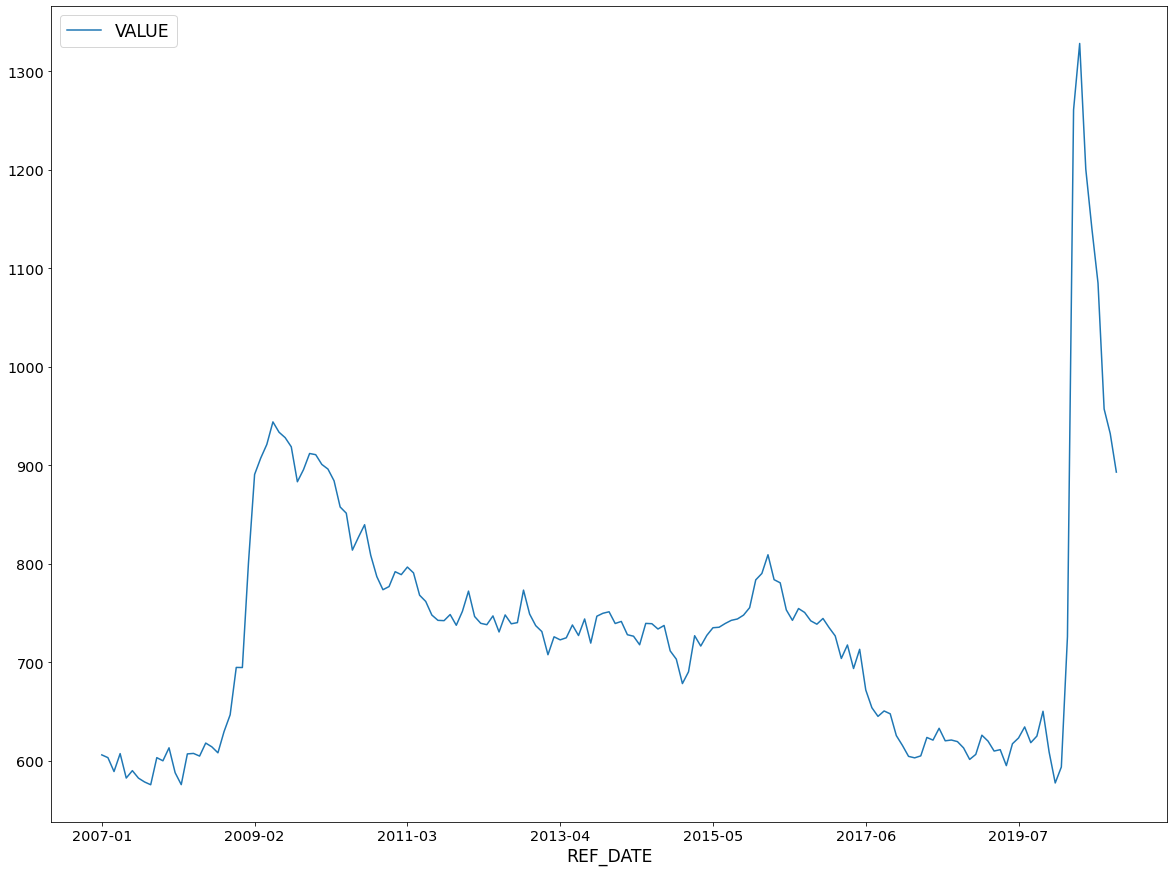

In [43]:
# Plotting the Time Series
Unemploy_Canada_plot_Males.plot()
plt.show();

### Unemployment per Age Group Canada

#### 15 - 24

In [44]:
Labour_Data_est_Canada_unempl_bothsex_age1524 = Labour_Data_est_Canada_unempl_bothsex[Labour_Data_est_Canada_unempl_bothsex['Age group']=='15 to 24 years']

In [ ]:
Labour_Data_est_Canada_unempl_bothsex_age1524.shape

In [46]:
df_age1524 = Labour_Data_est_Canada_unempl_bothsex_age1524[['REF_DATE', 'VALUE']]
df_age1524 = df_age1524.set_index('REF_DATE')
df_age1524.head(100)

VALUE
REF_DATE          
2007-01  339.20000
2007-02  322.40000
2007-03  326.50000
2007-04  331.20000
2007-05  329.50000
...            ...
2014-12  388.00000
2015-01  366.00000
2015-02  381.50000
2015-03  368.80000
2015-04  393.10000

[100 rows x 1 columns]

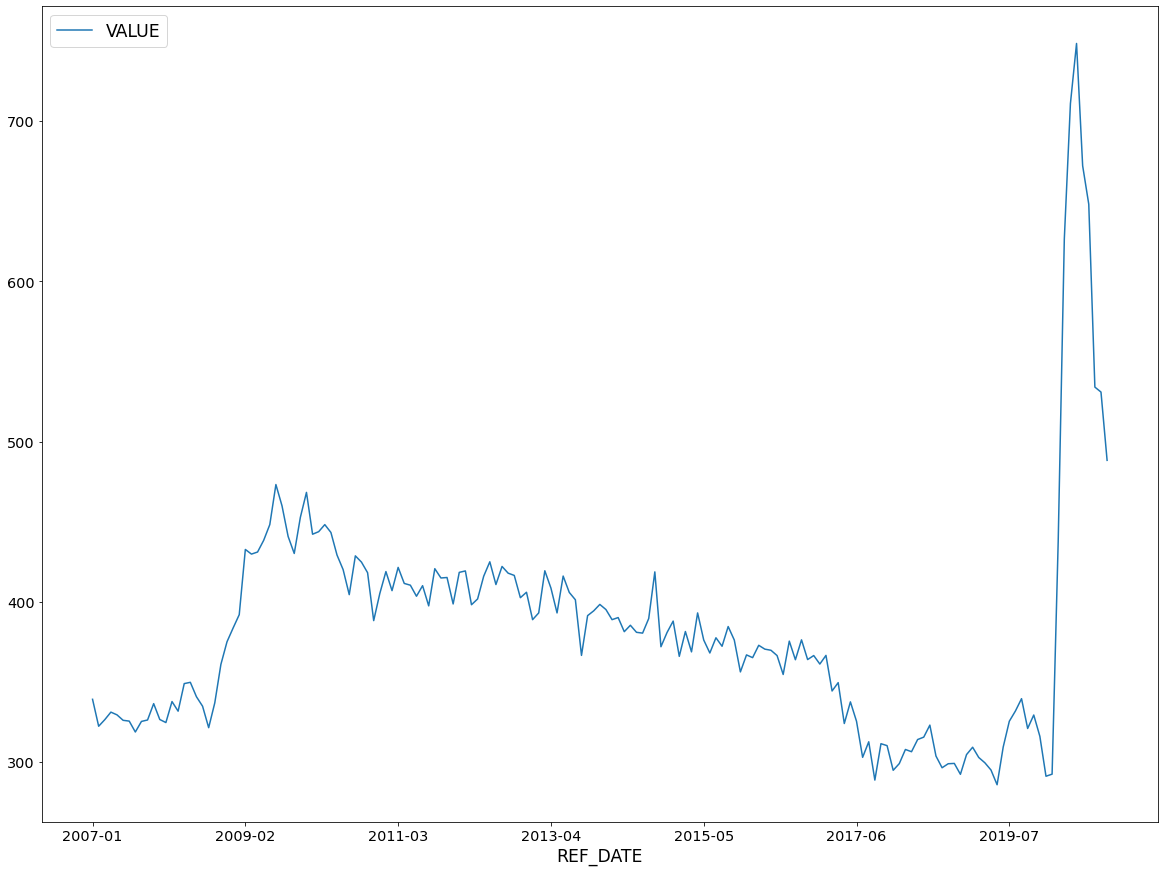

In [47]:
df_age1524.plot()
plt.show();

#### 25 - 54

In [48]:
Labour_Data_est_Canada_unempl_bothsex_age2554 = Labour_Data_est_Canada_unempl_bothsex[Labour_Data_est_Canada_unempl_bothsex['Age group']=='25 to 54 years']

In [49]:
Labour_Data_est_Canada_unempl_bothsex_age2554.shape

(167, 11)

In [50]:
df_age2554 = Labour_Data_est_Canada_unempl_bothsex_age2554[['REF_DATE', 'VALUE']]
df_age2554 = df_age2554.set_index('REF_DATE')
df_age2554.head(100)

VALUE
REF_DATE          
2007-01  636.60000
2007-02  645.80000
2007-03  635.40000
2007-04  637.00000
2007-05  619.90000
...            ...
2014-12  679.90000
2015-01  694.40000
2015-02  705.30000
2015-03  729.60000
2015-04  707.50000

[100 rows x 1 columns]

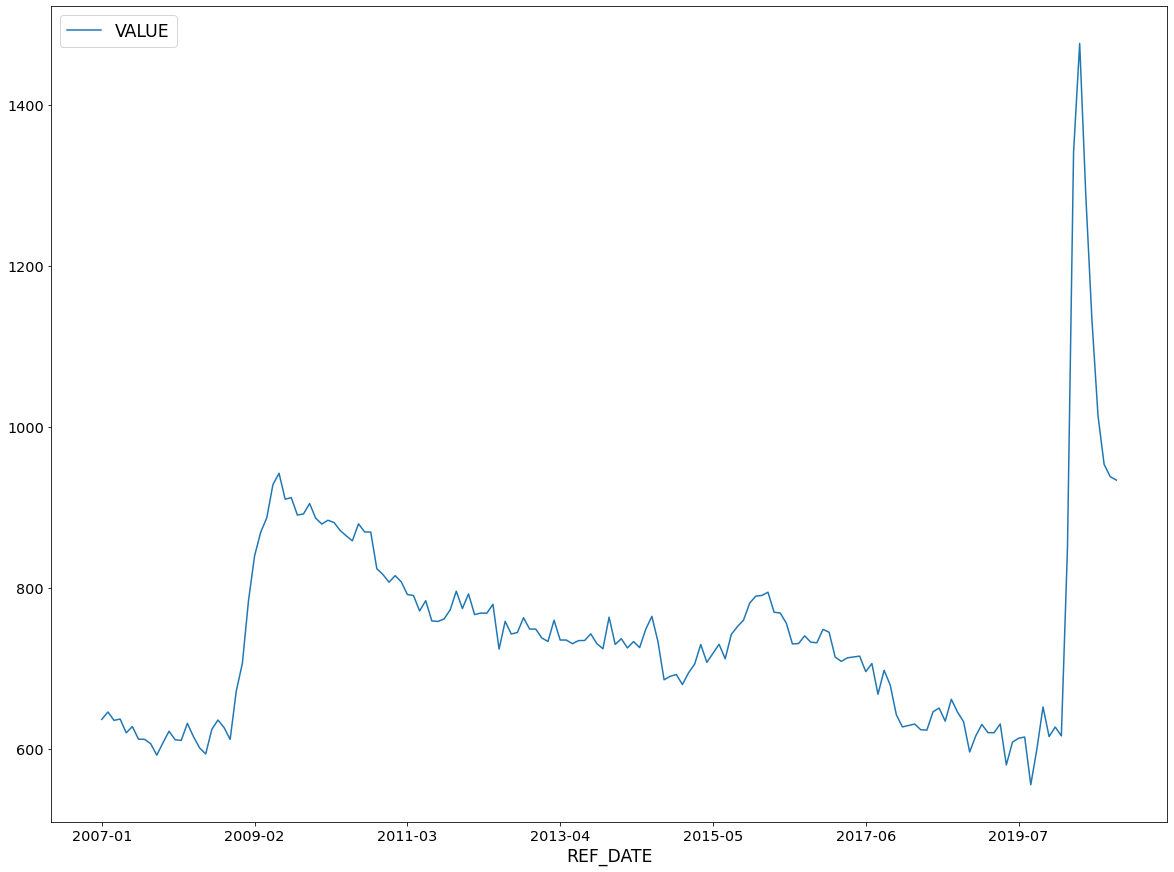

In [51]:
df_age2554.plot()
plt.show();

#### 55 and over

In [52]:
Labour_Data_est_Canada_unempl_bothsex_age55over = Labour_Data_est_Canada_unempl_bothsex[Labour_Data_est_Canada_unempl_bothsex['Age group']=='55 years and over']

In [53]:
Labour_Data_est_Canada_unempl_bothsex_age55over.shape

(167, 11)

In [54]:
df_age55over = Labour_Data_est_Canada_unempl_bothsex_age55over[['REF_DATE', 'VALUE']]
df_age55over = df_age55over.set_index('REF_DATE')
df_age55over.head(100)

VALUE
REF_DATE          
2007-01  128.30000
2007-02  129.00000
2007-03  129.30000
2007-04  129.10000
2007-05  114.70000
...            ...
2014-12  205.80000
2015-01  207.80000
2015-02  215.40000
2015-03  208.00000
2015-04  214.10000

[100 rows x 1 columns]

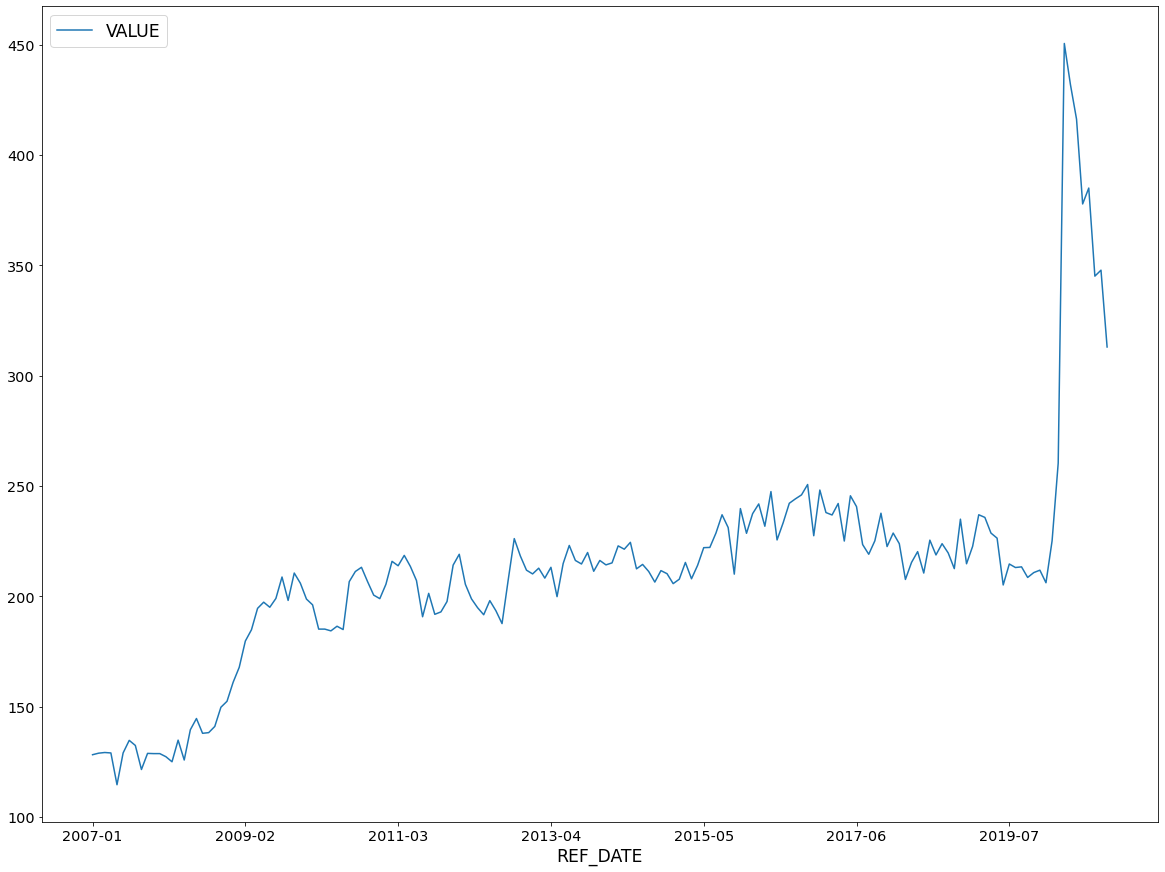

In [55]:
df_age55over.plot()
plt.show();

### Combine age group

In [56]:
Labour_Data_est_Canada_unempl_bothsex_age1524.columns

Index(['REF_DATE', 'GEO', 'Labour force characteristics', 'Sex', 'Age group',
       'Statistics', 'Data type', 'UOM', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VALUE'],
      dtype='object')

In [57]:
Labour_Data_est_Canada_unempl_bothsex_age1524.shape
Labour_Data_est_Canada_unempl_bothsex_age2554.shape
Labour_Data_est_Canada_unempl_bothsex_age55over.shape

(167, 11)

(167, 11)

(167, 11)

In [58]:
cols = Labour_Data_est_Canada_unempl_bothsex_age1524.columns.tolist()
cols

['REF_DATE',
 'GEO',
 'Labour force characteristics',
 'Sex',
 'Age group',
 'Statistics',
 'Data type',
 'UOM',
 'SCALAR_FACTOR',
 'SCALAR_ID',
 'VALUE']

In [59]:
Labour_Data_est_Canada_unempl_bothsex_age2554 = Labour_Data_est_Canada_unempl_bothsex_age2554[cols]
Labour_Data_est_Canada_unempl_bothsex_age2554.head(1)
Labour_Data_est_Canada_unempl_bothsex_age55over = Labour_Data_est_Canada_unempl_bothsex_age55over[cols]
Labour_Data_est_Canada_unempl_bothsex_age55over.head(1)

REF_DATE     GEO  ... SCALAR_ID     VALUE
396  2007-01  Canada  ...         3 636.60000

[1 rows x 11 columns]

REF_DATE     GEO  ... SCALAR_ID     VALUE
400  2007-01  Canada  ...         3 128.30000

[1 rows x 11 columns]

In [60]:
age_append  = Labour_Data_est_Canada_unempl_bothsex_age1524.append([Labour_Data_est_Canada_unempl_bothsex_age2554,
                                                                   Labour_Data_est_Canada_unempl_bothsex_age55over])
age_append.shape

(501, 11)

In [61]:
age_append['Age group'].value_counts()

25 to 54 years       167
15 to 24 years       167
55 years and over    167
Name: Age group, dtype: int64

In [62]:
age_plot = age_append[['REF_DATE','Age group','VALUE']]
age_plot.head()

REF_DATE       Age group     VALUE
380    2007-01  15 to 24 years 339.20000
6974   2007-02  15 to 24 years 322.40000
13568  2007-03  15 to 24 years 326.50000
20162  2007-04  15 to 24 years 331.20000
26756  2007-05  15 to 24 years 329.50000

In [63]:
age_plot2 = age_plot.pivot(index='REF_DATE', columns='Age group', values='VALUE')


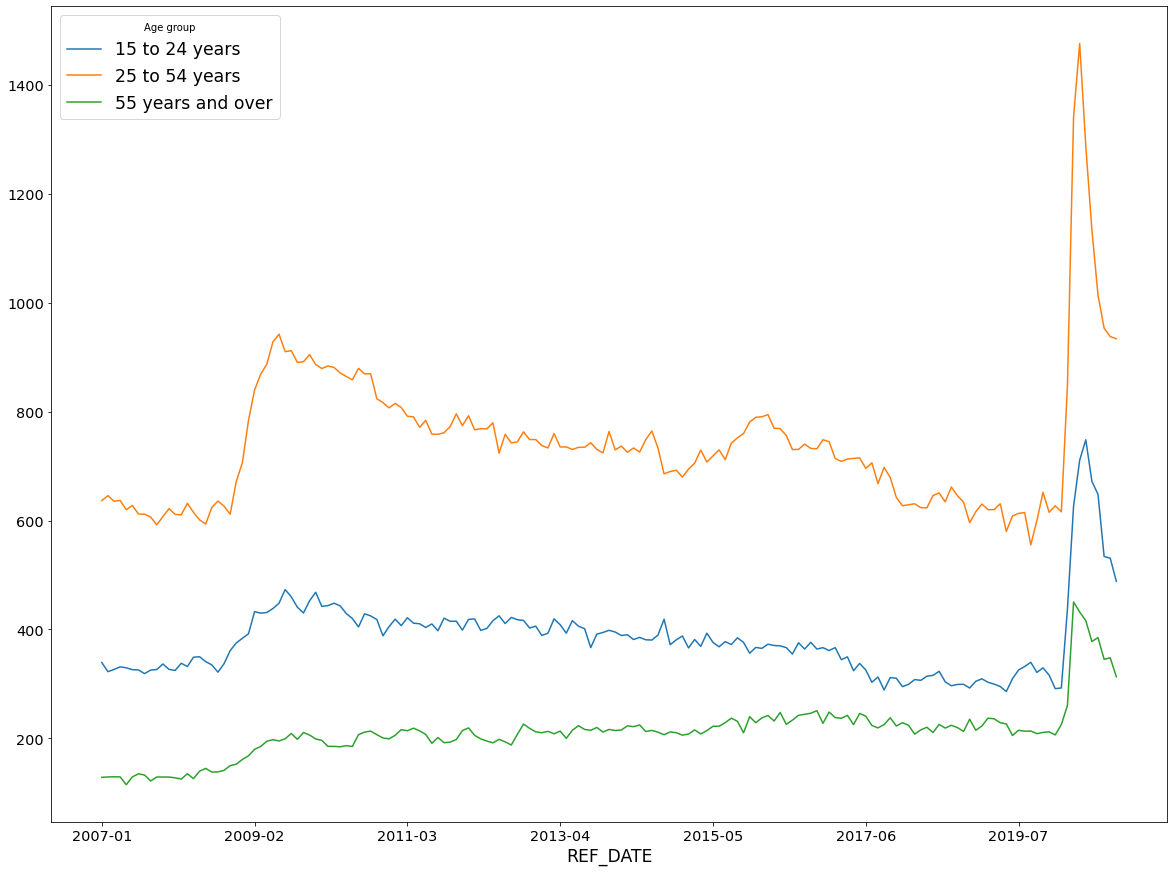

In [64]:
age_plot2.plot()
plt.show();

### Filter Date only year of 2020

In [65]:
age_plot.REF_DATE.dtypes

dtype('O')

In [66]:
age_plot_date_filter = age_plot[age_plot['REF_DATE'].str.contains('2020')]
age_plot_date_filter.shape

(33, 3)

In [67]:
age_plot_date_filter.REF_DATE.value_counts()

2020-11    3
2020-04    3
2020-02    3
2020-10    3
2020-01    3
2020-06    3
2020-08    3
2020-03    3
2020-05    3
2020-09    3
2020-07    3
Name: REF_DATE, dtype: int64

In [68]:
age_plot_date_filter.head(1)

REF_DATE       Age group     VALUE
1029044  2020-01  15 to 24 years 291.20000

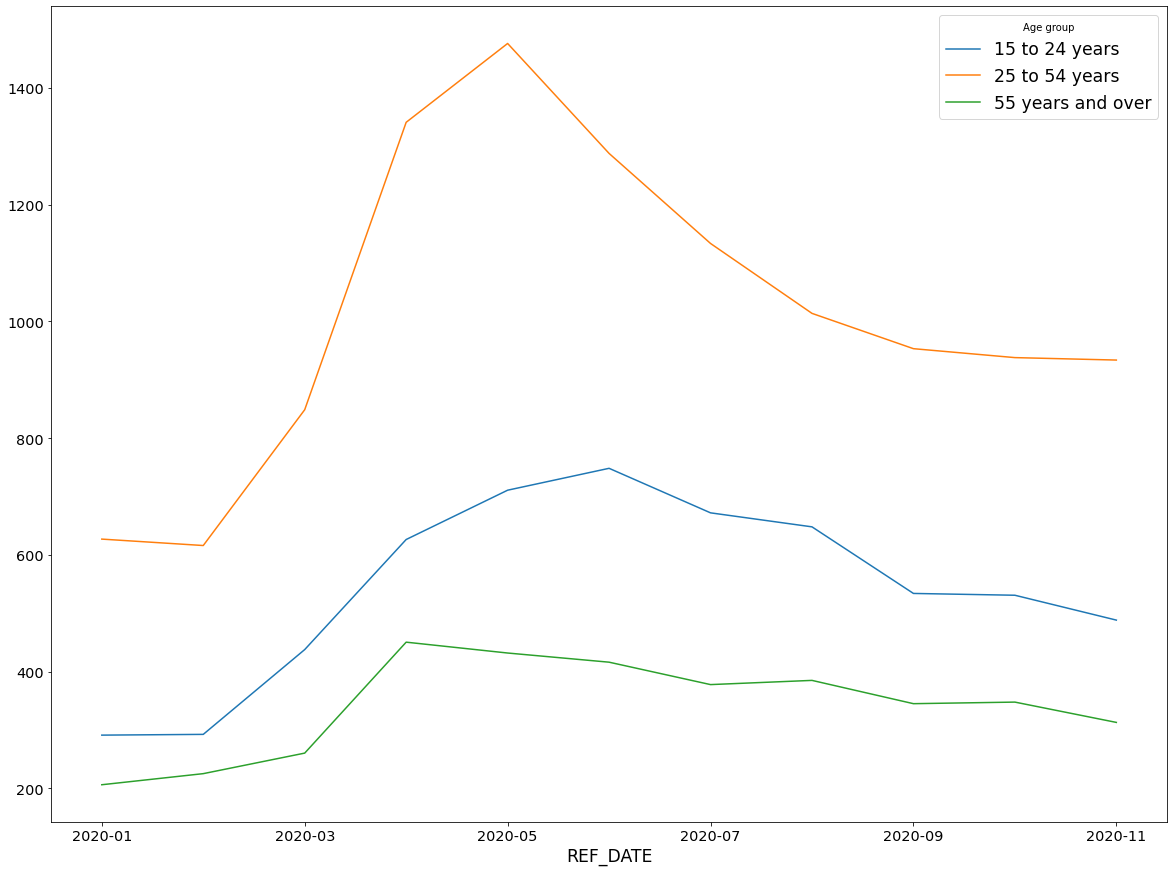

In [69]:
age_plot_date_filter_plot = age_plot_date_filter.pivot(index='REF_DATE', columns='Age group', values='VALUE')
age_plot_date_filter_plot.plot()
plt.show();

In [92]:
merge.head()

REF_DATE     GEO Labour force characteristics         Sex  \
0  2007-01  Canada                   Population  Both sexes   
1  2007-01  Canada                   Population  Both sexes   
2  2007-01  Canada                   Population  Both sexes   
3  2007-01  Canada                   Population  Both sexes   
4  2007-01  Canada                   Population  Both sexes   

           Age group Statistics            Data type      UOM SCALAR_FACTOR  \
0  15 years and over   Estimate  Seasonally adjusted  Persons     thousands   
1     15 to 64 years   Estimate  Seasonally adjusted  Persons     thousands   
2     15 to 24 years   Estimate  Seasonally adjusted  Persons     thousands   
3     15 to 19 years   Estimate  Seasonally adjusted  Persons     thousands   
4     20 to 24 years   Estimate  Seasonally adjusted  Persons     thousands   

   SCALAR_ID       VALUE  
0          3 26306.90000  
1          3 22227.30000  
2          3  4365.50000  
3          3  2164.40000  
4          3  2201.10000

In [161]:
Only2020 = merge[(merge['Statistics'] == 'Estimate')
            & merge['REF_DATE'].str.contains('2020')
                & (merge['GEO'] == 'Ontario') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & (merge['Age group'] == '15 years and over')]
Only2020 = Only2020[Only2020['Labour force characteristics'] == 'Unemployment']

In [162]:
Only2008 = merge[(merge['Statistics'] == 'Estimate')
            & merge['REF_DATE'].str.contains('2008')
                & (merge['GEO'] == 'Ontario') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & (merge['Age group'] == '15 years and over')]
Only2008 = Only2008[Only2008['Labour force characteristics'] == 'Unemployment']

In [163]:
Only2009 = merge[(merge['Statistics'] == 'Estimate')
            & merge['REF_DATE'].str.contains('2009')
                & (merge['GEO'] == 'Ontario') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & (merge['Age group'] == '15 years and over')]
Only2009 = Only2009[Only2009['Labour force characteristics'] == 'Unemployment']

In [164]:
Only2019 = merge[(merge['Statistics'] == 'Estimate')
            & merge['REF_DATE'].str.contains('2019')
                & (merge['GEO'] == 'Ontario') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & (merge['Age group'] == '15 years and over')]
Only2019 = Only2019[Only2019['Labour force characteristics'] == 'Unemployment']

In [96]:
Only2020.head()

REF_DATE      GEO Labour force characteristics         Sex  \
1032654  2020-01  Ontario                 Unemployment  Both sexes   
1039248  2020-02  Ontario                 Unemployment  Both sexes   
1045842  2020-03  Ontario                 Unemployment  Both sexes   
1052436  2020-04  Ontario                 Unemployment  Both sexes   
1059030  2020-05  Ontario                 Unemployment  Both sexes   

                 Age group Statistics            Data type      UOM  \
1032654  15 years and over   Estimate  Seasonally adjusted  Persons   
1039248  15 years and over   Estimate  Seasonally adjusted  Persons   
1045842  15 years and over   Estimate  Seasonally adjusted  Persons   
1052436  15 years and over   Estimate  Seasonally adjusted  Persons   
1059030  15 years and over   Estimate  Seasonally adjusted  Persons   

        SCALAR_FACTOR  SCALAR_ID      VALUE  
1032654     thousands          3  415.30000  
1039248     thousands          3  436.40000  
1045842     thousands          3  585.60000  
1052436     thousands          3  822.40000  
1059030     thousands          3 1003.40000

In [165]:
Only2020['REF_DATE']=pd.to_datetime(Only2020['REF_DATE'])
Only2020.set_index('REF_DATE', inplace=True)


In [166]:
Only2008['REF_DATE']=pd.to_datetime(Only2008['REF_DATE'])
Only2008.set_index('REF_DATE', inplace=True)


In [167]:
Only2019['REF_DATE']=pd.to_datetime(Only2019['REF_DATE'])
Only2019.set_index('REF_DATE', inplace=True)


In [168]:
Only2009['REF_DATE']=pd.to_datetime(Only2009['REF_DATE'])
Only2009.set_index('REF_DATE', inplace=True)


In [ ]:
Only2020 = ProvinceBothUnemployment.groupby('GEO')[['VALUE']].resample('Y').mean()

In [130]:
new = Only2007

In [135]:
new.

VALUE
REF_DATE            
2008-01-01 448.90000
2008-02-01 435.60000
2008-03-01 456.80000
2008-04-01 439.20000
2008-05-01 445.80000
2008-06-01 451.40000
2008-07-01 457.70000
2008-08-01 450.80000
2008-09-01 457.10000
2008-10-01 471.60000
2008-11-01 518.10000
2008-12-01 525.30000
2009-01-01 573.10000
2009-02-01 623.10000
2009-03-01 625.00000
2009-04-01 632.70000
2009-05-01 671.60000
2009-06-01 677.80000
2009-07-01 672.50000
2009-08-01 666.00000
2009-09-01 643.30000
2009-10-01 641.20000
2009-11-01 664.90000
2009-12-01 655.60000

In [169]:
Only2008.index = Only2008.index.strftime('%b')
Only2009.index = Only2009.index.strftime('%b')
Only2019.index = Only2019.index.strftime('%b')
Only2020.index = Only2020.index.strftime('%b')

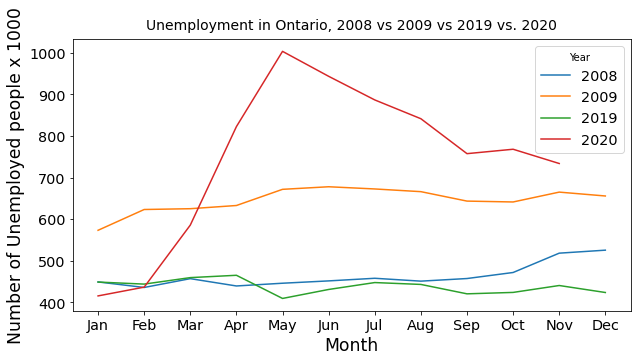

In [175]:
f, ax = plt.subplots(figsize = (10, 5));
ax.plot(Only2008.index, Only2008['VALUE'], label = '2008');
ax.plot(Only2009.index, Only2009['VALUE'], label = '2009');
ax.plot(Only2019.index, Only2019['VALUE'], label = '2019');
ax.plot(Only2020.index, Only2020['VALUE'], label = '2020');
ax.legend(frameon = True, loc = 'best', title = 'Year');

plt.title('Unemployment in Ontario, 2008 vs 2009 vs 2019 vs. 2020', fontdict = {'size': 14,}, pad = 10);
ax.set(xlabel = 'Month', ylabel = 'Number of Unemployed people x 1000');

In [141]:
new.index = new.index.strftime('%B')

In [146]:
new1.index = new1.index.strftime('%B')

In [142]:
new

VALUE
REF_DATE           
January   448.90000
February  435.60000
March     456.80000
April     439.20000
May       445.80000
June      451.40000
July      457.70000
August    450.80000
September 457.10000
October   471.60000
November  518.10000
December  525.30000
January   573.10000
February  623.10000
March     625.00000
April     632.70000
May       671.60000
June      677.80000
July      672.50000
August    666.00000
September 643.30000
October   641.20000
November  664.90000
December  655.60000

In [145]:
new1

VALUE
REF_DATE             
2019-01-01  448.60000
2019-02-01  443.70000
2019-03-01  459.30000
2019-04-01  464.90000
2019-05-01  409.20000
2019-06-01  430.80000
2019-07-01  447.40000
2019-08-01  442.90000
2019-09-01  420.30000
2019-10-01  423.70000
2019-11-01  440.30000
2019-12-01  423.50000
2020-01-01  415.30000
2020-02-01  436.40000
2020-03-01  585.60000
2020-04-01  822.40000
2020-05-01 1003.40000
2020-06-01  943.40000
2020-07-01  886.60000
2020-08-01  841.40000
2020-09-01  757.40000
2020-10-01  768.00000
2020-11-01  733.70000

In [143]:
new1 = Only2020

In [140]:
# Converting the month from a time object to an integer
new['Month'] = new.index.dt.month



# adding the name of the months for clarity
new['Month_Name'] =  new['Month'].map(lambda x : calendar.month_abbr[x])



AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [117]:
Only2007

GEO Labour force characteristics         Sex  \
REF_DATE                                                       
2007-01-01  Ontario                 Unemployment  Both sexes   
2007-02-01  Ontario                 Unemployment  Both sexes   
2007-03-01  Ontario                 Unemployment  Both sexes   
2007-04-01  Ontario                 Unemployment  Both sexes   
2007-05-01  Ontario                 Unemployment  Both sexes   
2007-06-01  Ontario                 Unemployment  Both sexes   
2007-07-01  Ontario                 Unemployment  Both sexes   
2007-08-01  Ontario                 Unemployment  Both sexes   
2007-09-01  Ontario                 Unemployment  Both sexes   
2007-10-01  Ontario                 Unemployment  Both sexes   
2007-11-01  Ontario                 Unemployment  Both sexes   
2007-12-01  Ontario                 Unemployment  Both sexes   
2008-01-01  Ontario                 Unemployment  Both sexes   
2008-02-01  Ontario                 Unemployment  Both sexes   
2008-03-01  Ontario                 Unemployment  Both sexes   
2008-04-01  Ontario                 Unemployment  Both sexes   
2008-05-01  Ontario                 Unemployment  Both sexes   
2008-06-01  Ontario                 Unemployment  Both sexes   
2008-07-01  Ontario                 Unemployment  Both sexes   
2008-08-01  Ontario                 Unemployment  Both sexes   
2008-09-01  Ontario                 Unemployment  Both sexes   
2008-10-01  Ontario                 Unemployment  Both sexes   
2008-11-01  Ontario                 Unemployment  Both sexes   
2008-12-01  Ontario                 Unemployment  Both sexes   

                    Age group Statistics            Data type      UOM  \
REF_DATE                                                                 
2007-01-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-02-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-03-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-04-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-05-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-06-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-07-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-08-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-09-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-10-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-11-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2007-12-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-01-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-02-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-03-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-04-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-05-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-06-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-07-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-08-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-09-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-10-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-11-01  15 years and over   Estimate  Seasonally adjusted  Persons   
2008-12-01  15 years and over   Estimate  Seasonally adjusted  Persons   

           SCALAR_FACTOR  SCALAR_ID     VALUE  
REF_DATE                                       
2007-01-01     thousands          3 450.90000  
2007-02-01     thousands          3 446.00000  
2007-03-01     thousands          3 455.10000  
2007-04-01     thousands          3 461.40000  
2007-05-01     thousands          3 433.00000  
2007-06-01     thousands          3 459.30000  
2007-07-01     thousands          3 454.20

In [125]:
Only2007.drop(Only2007.columns.difference(['VALUE']), 1, inplace=True)

In [126]:
Only2020.drop(Only2020.columns.difference(['VALUE']), 1, inplace=True)

Text(0.5, 1.0, 'Active Businesses, 2019 vs. 2020')

[Text(0, 0.5, 'Number of Active Businesses'), Text(0.5, 0, 'Month')]

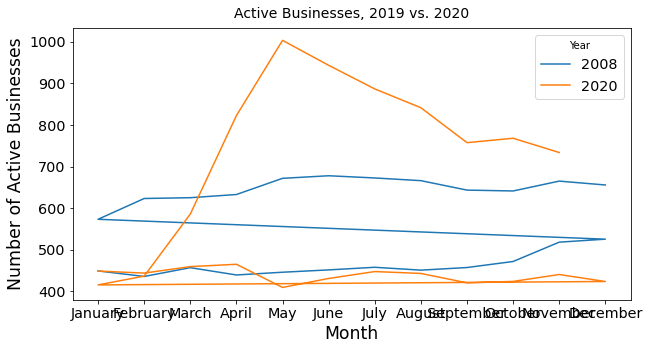

In [147]:
f, ax = plt.subplots(figsize = (10, 5))
ax.plot(new.index, new['VALUE'], label = '2008')
ax.plot(new1.index, new1['VALUE'], label = '2020')
ax.legend(frameon = True, loc = 'best', title = 'Year')

plt.title('Active Businesses, 2019 vs. 2020', fontdict = {'size': 14,}, pad = 10);
ax.set(xlabel = 'Month', ylabel = 'Number of Active Businesses')

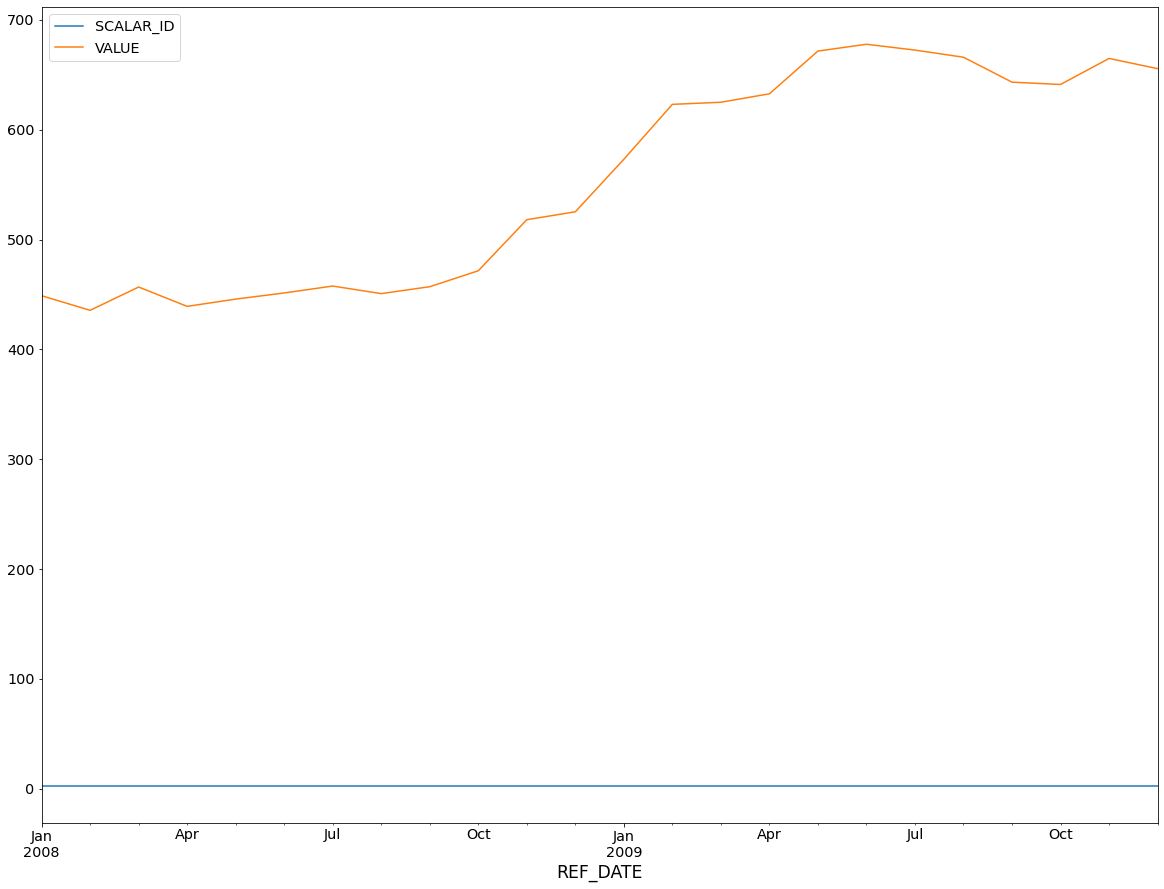

In [122]:
Only2007.plot();

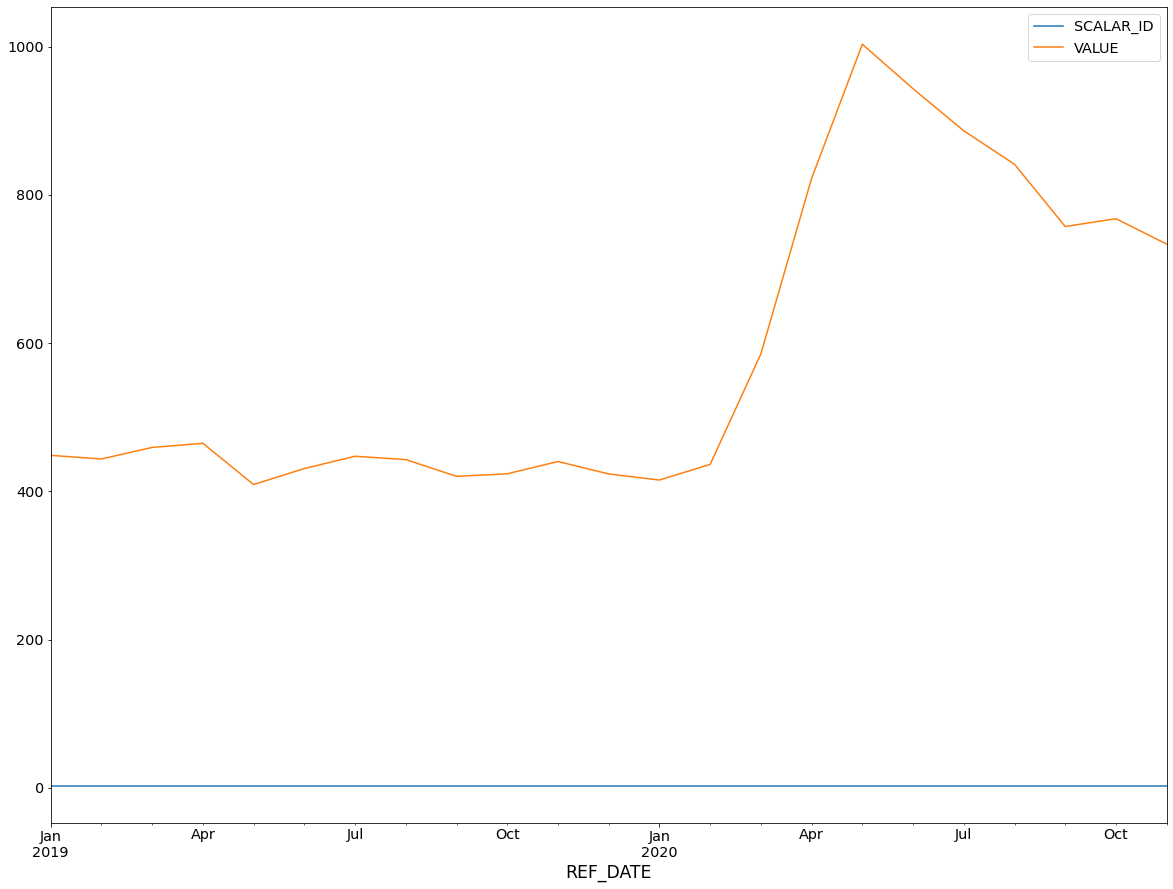

In [119]:
Only2020.plot();

In [70]:
print(merge['Statistics'].value_counts())
print()
print(merge['Labour force characteristics'].value_counts())
print()
print(merge['GEO'].value_counts())
print()
print(merge['Age group'].value_counts())
print()
print(merge['Sex'].value_counts())
print()
print(merge['UOM'].value_counts())
print()
print(merge['Data type'].value_counts())

Estimate                                   302604
Standard error of year-over-year change    266198
Standard error of estimate                 266198
Standard error of month-to-month change    266198
Name: Statistics, dtype: int64

Employment               140113
Labour force             138276
Participation rate       138276
Employment rate          138276
Unemployment             138276
Unemployment rate        138276
Part-time employment     117568
Full-time employment     117568
Population                34569
Name: Labour force characteristics, dtype: int64

Canada                       134268
British Columbia              96693
Alberta                       96693
Ontario                       96693
Saskatchewan                  96693
Manitoba                      96693
Prince Edward Island          96693
Newfoundland and Labrador     96693
New Brunswick                 96693
Quebec                        96693
Nova Scotia                   96693
Name: GEO, dtype: int64

15 years 

In [71]:
CanadaBothsex = merge[(merge['Statistics'] == 'Estimate') 
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]

CanadaMale = merge[(merge['Statistics'] == 'Estimate') 
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
                  & (merge['Sex'] == 'Males')
                   & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]

CanadaFemale = merge[(merge['Statistics'] == 'Estimate') 
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
                  & (merge['Sex'] == 'Females')
                     & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]

In [72]:
CanadaBothsexUnemployment = CanadaBothsex[CanadaBothsex['Labour force characteristics'] == 'Unemployment'] 
CanadaMaleUnemployment = CanadaMale[CanadaMale['Labour force characteristics'] == 'Unemployment'] 
CanadaFemaleUnemployment = CanadaFemale[CanadaFemale['Labour force characteristics'] == 'Unemployment'] 

In [73]:
CanadaBothsexUnemployment15 = CanadaBothsexUnemployment[CanadaBothsexUnemployment["Age group"] == '15 to 19 years']
CanadaBothsexUnemployment20 = CanadaBothsexUnemployment[CanadaBothsexUnemployment["Age group"] == '20 to 24 years']
CanadaBothsexUnemployment25 = CanadaBothsexUnemployment[CanadaBothsexUnemployment["Age group"] == '25 to 54 years']
CanadaBothsexUnemployment55 = CanadaBothsexUnemployment[CanadaBothsexUnemployment["Age group"] == '55 years and over']

In [74]:
CanadaBothsexUnemployment20 = CanadaBothsexUnemployment20[['REF_DATE', 'VALUE']]
CanadaBothsexUnemployment25 = CanadaBothsexUnemployment25[['REF_DATE', 'VALUE']]
CanadaBothsexUnemployment55 = CanadaBothsexUnemployment55[['REF_DATE', 'VALUE']]

In [75]:
CanadaBothsexUnemployment20.set_index('REF_DATE', inplace=True)
CanadaBothsexUnemployment25.set_index('REF_DATE', inplace=True)
CanadaBothsexUnemployment55.set_index('REF_DATE', inplace=True)

## Canadian Unemployment Both Sex by Age Groups

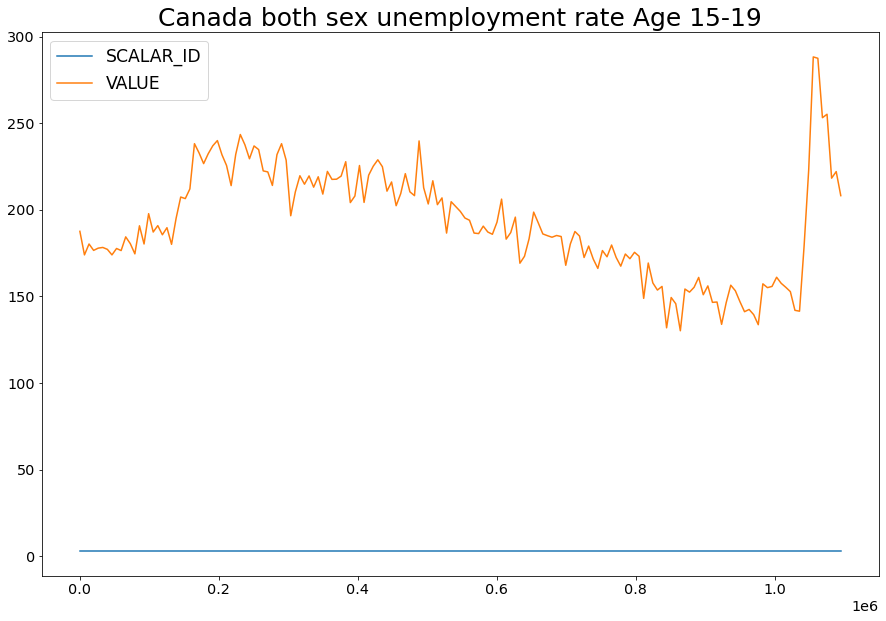

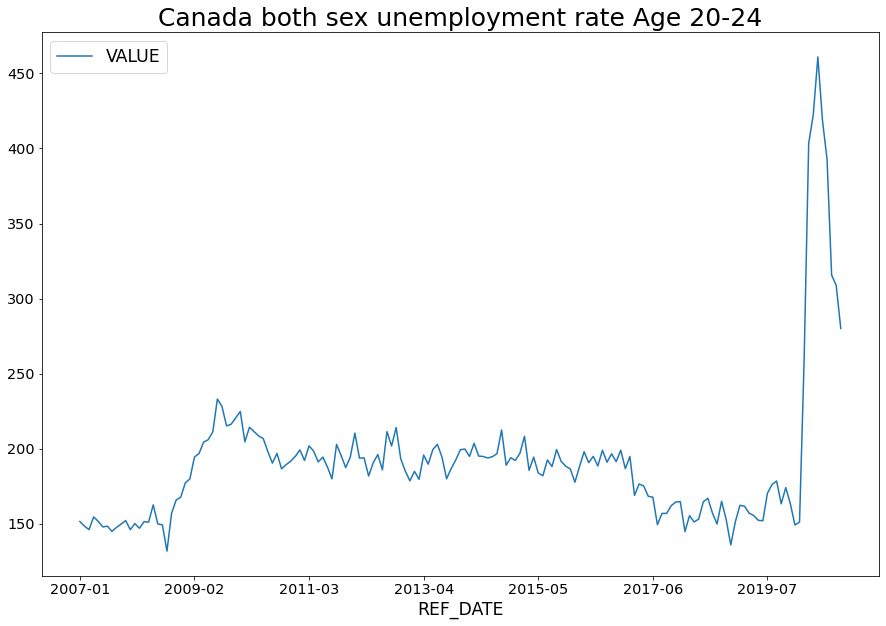

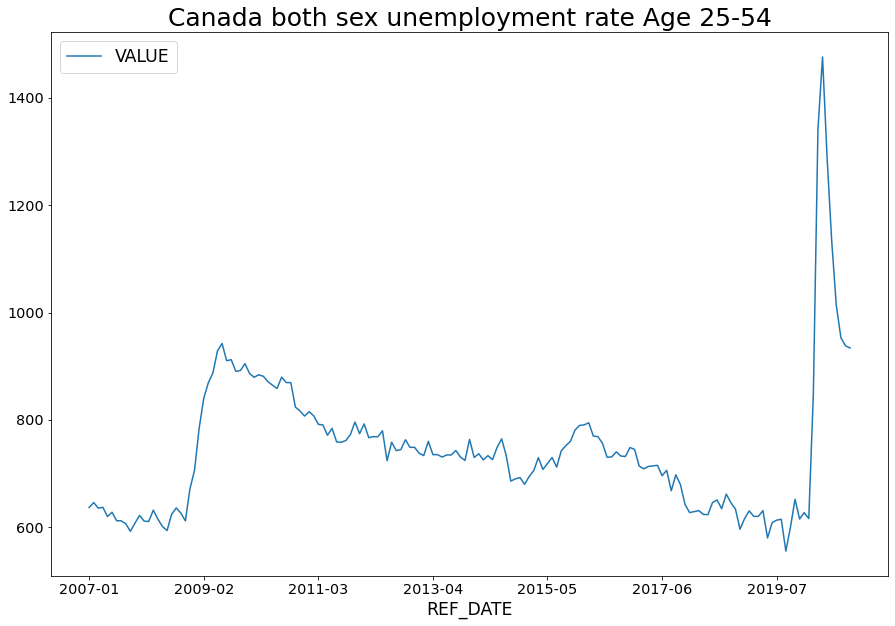

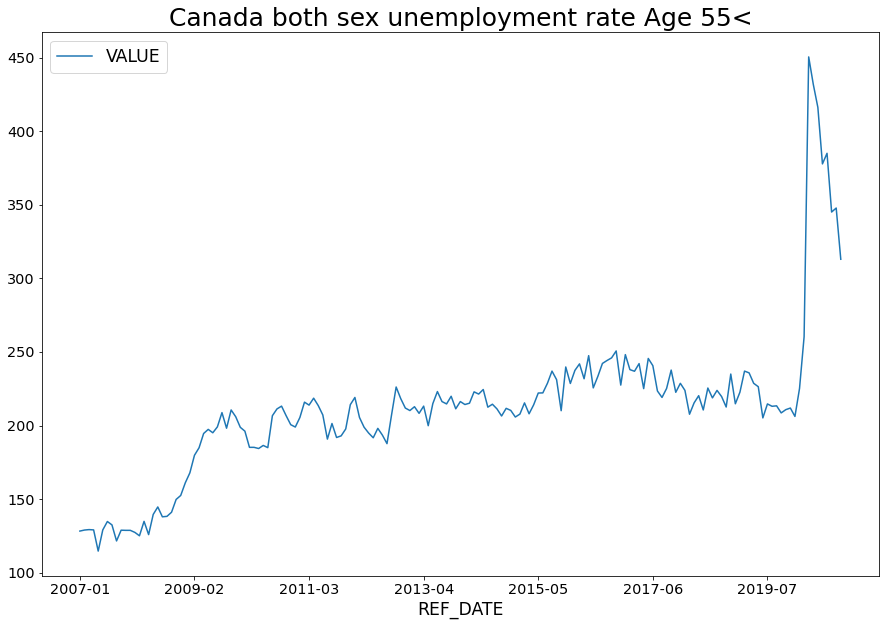

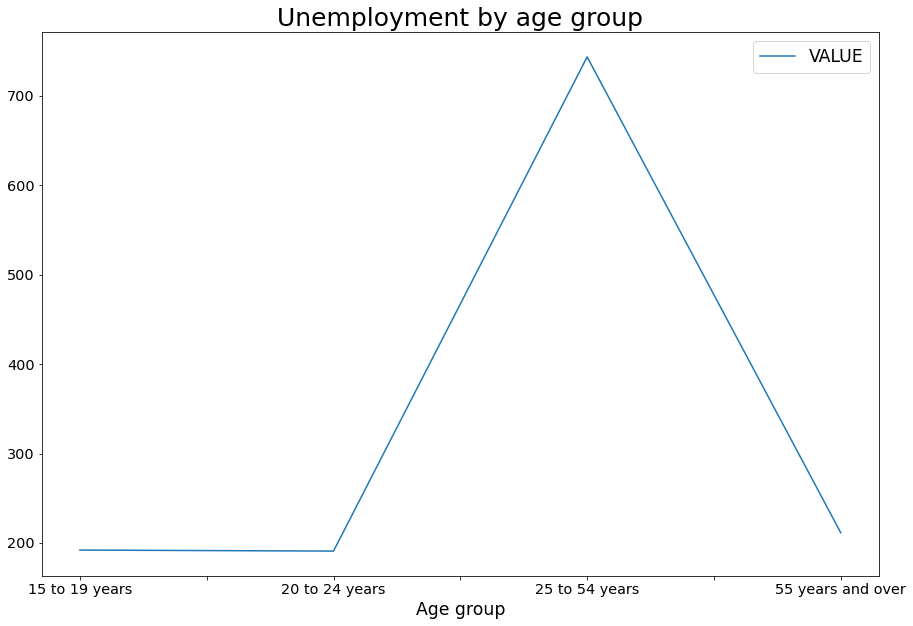

In [77]:
CanadaBothsexUnemployment15.plot(figsize=(15,10));
plt.title('Canada both sex unemployment rate Age 15-19', fontsize=25);

CanadaBothsexUnemployment20.plot(figsize=(15,10));
plt.title('Canada both sex unemployment rate Age 20-24', fontsize=25);

CanadaBothsexUnemployment25.plot(figsize=(15,10));
plt.title('Canada both sex unemployment rate Age 25-54', fontsize=25);

CanadaBothsexUnemployment55.plot(figsize=(15,10));
plt.title('Canada both sex unemployment rate Age 55<', fontsize=25);

CanadaBothsexUnemployment.groupby(['Age group'])[['VALUE']].aggregate('mean').plot(figsize=(15,10));
plt.title("Unemployment by age group", fontsize=25);

In [78]:
CanadaBothsex = merge[(merge['Statistics'] == 'Estimate') 
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]

CanadaMale = merge[(merge['Statistics'] == 'Estimate') 
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
                  & (merge['Sex'] == 'Males')
                   & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]

CanadaFemale = merge[(merge['Statistics'] == 'Estimate') 
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
                  & (merge['Sex'] == 'Females')
                     & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]

CanadaMaleVSFemale = merge[(merge['Statistics'] == 'Estimate') 
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
                  & ((merge['Sex'] == 'Females') | (merge['Sex'] == 'Males'))
                     & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]

In [79]:
CanadaBothsexPart = CanadaBothsex[CanadaBothsex['Labour force characteristics'] == 'Part-time employment '] 
CanadaMalePart = CanadaMale[CanadaMale['Labour force characteristics'] == 'Part-time employment '] 
CanadaFemalePart = CanadaFemale[CanadaFemale['Labour force characteristics'] == 'Part-time employment '] 
CanadaBothsexFull = CanadaBothsex[CanadaBothsex['Labour force characteristics'] == 'Full-time employment'] 
CanadaMaleFull = CanadaMale[CanadaMale['Labour force characteristics'] == 'Full-time employment'] 
CanadaFemaleFull = CanadaFemale[CanadaFemale['Labour force characteristics'] == 'Full-time employment']
CanadaMaleVSFemaleFull = CanadaMaleVSFemale[CanadaMaleVSFemale['Labour force characteristics'] == 'Full-time employment']
CanadaMaleVSFemalePart = CanadaMaleVSFemale[CanadaMaleVSFemale['Labour force characteristics'] == 'Part-time employment '] 

## Canadian Full-time and part-time unemployment both sex

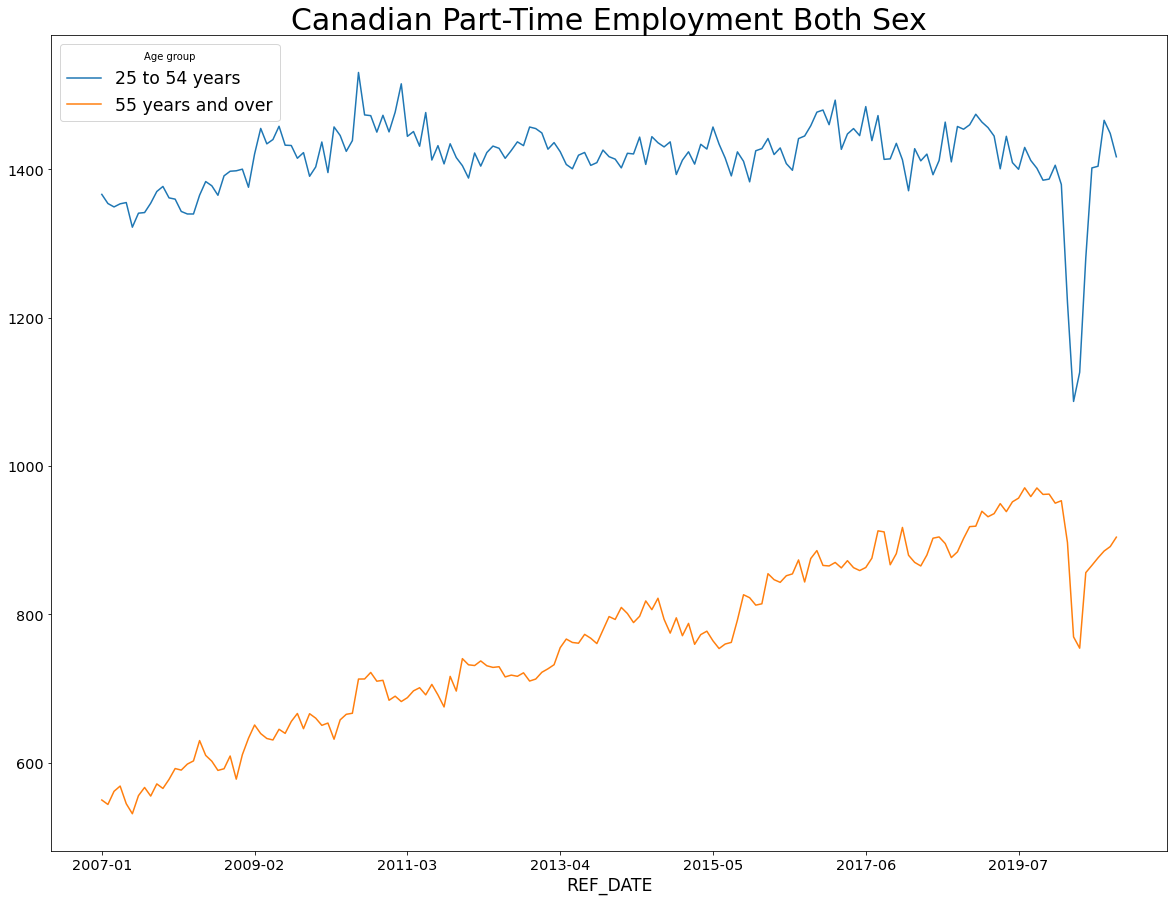

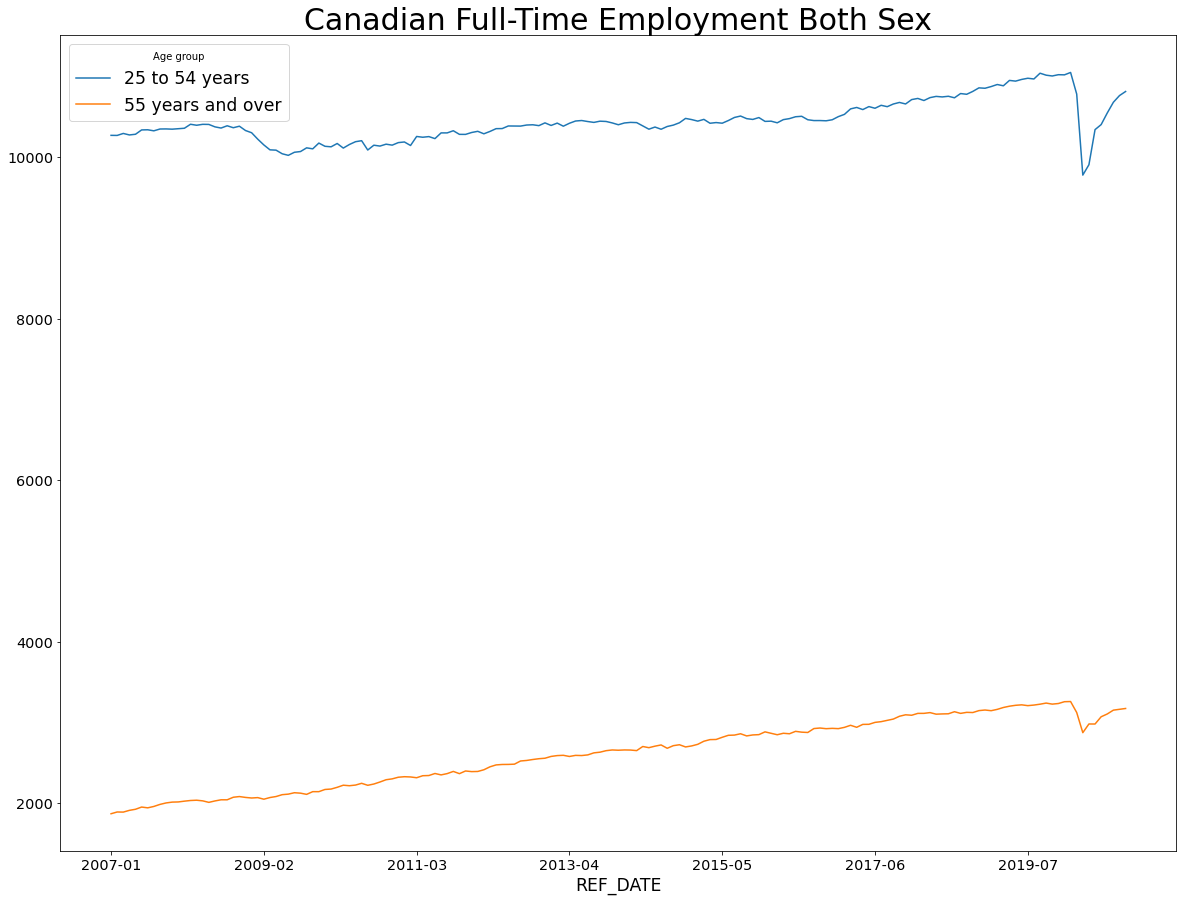

In [80]:
pd.crosstab(index= CanadaBothsexPart['REF_DATE'],
            columns= CanadaBothsexPart['Age group'],
            values= CanadaBothsexPart['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Part-Time Employment Both Sex', fontsize=30);

pd.crosstab(index= CanadaBothsexFull['REF_DATE'],
            columns= CanadaBothsexFull['Age group'],
            values= CanadaBothsexFull['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Full-Time Employment Both Sex', fontsize=30);

## Canadian female full-time and part-time employment

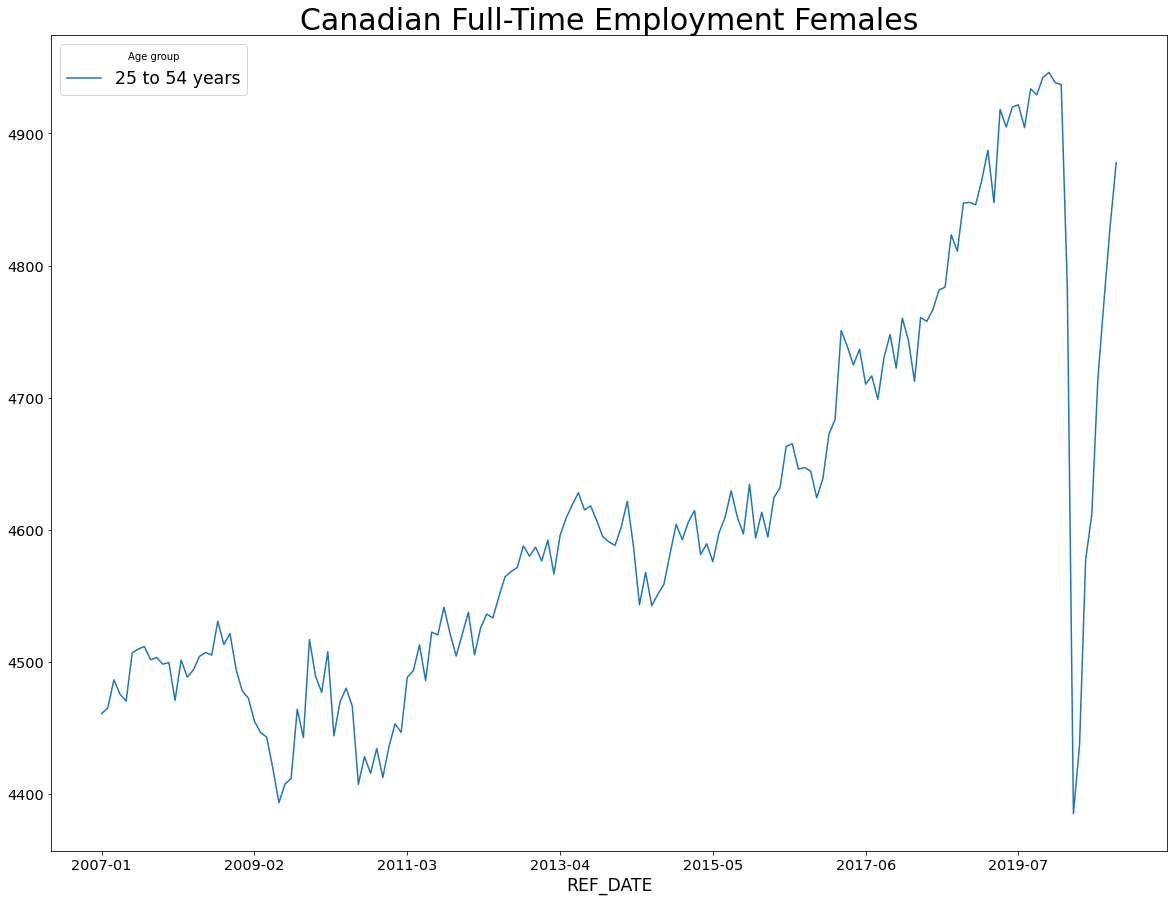

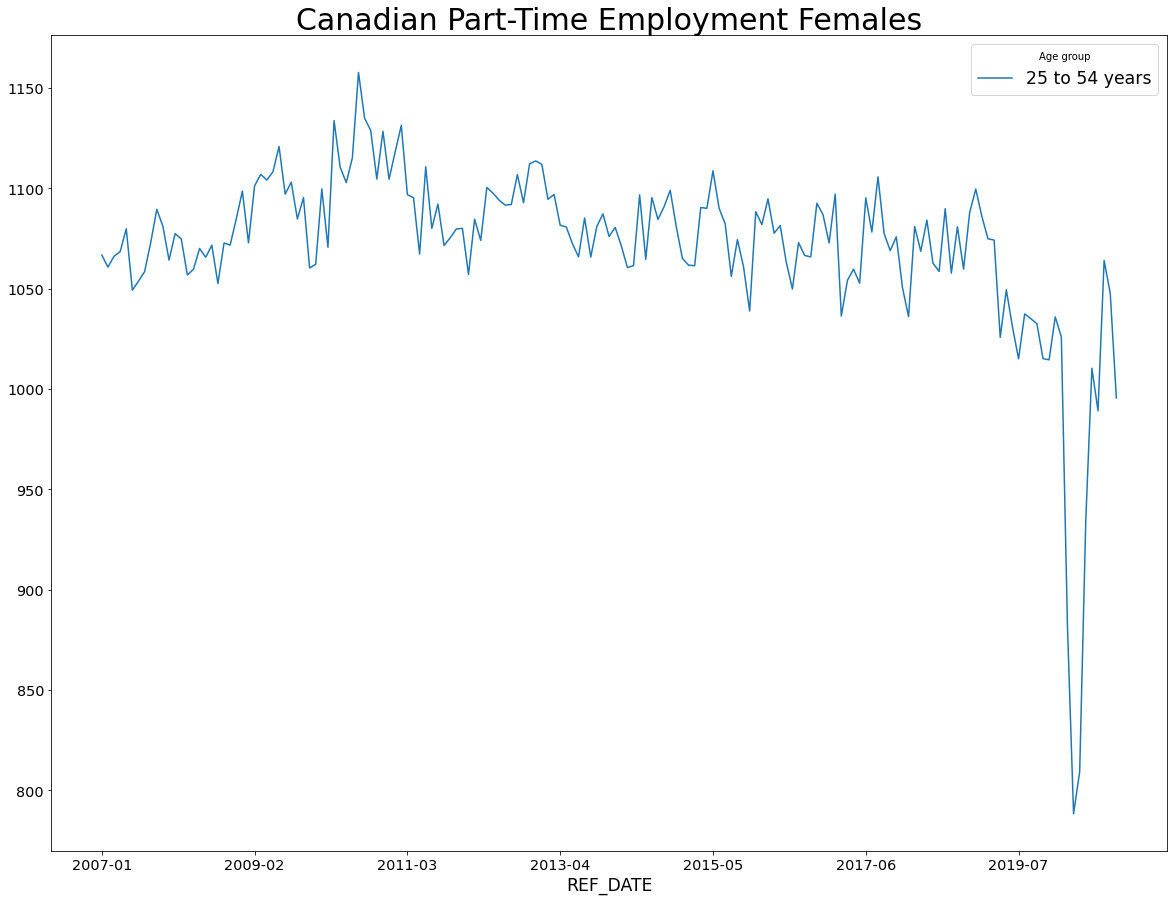

In [81]:
pd.crosstab(index= CanadaFemaleFull['REF_DATE'],
            columns= CanadaFemaleFull['Age group'],
            values= CanadaFemaleFull['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Full-Time Employment Females', fontsize=30);

pd.crosstab(index= CanadaFemalePart['REF_DATE'],
            columns= CanadaFemalePart['Age group'],
            values= CanadaFemalePart['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Part-Time Employment Females', fontsize=30);

## Canadian male full-time and part-time **employment**

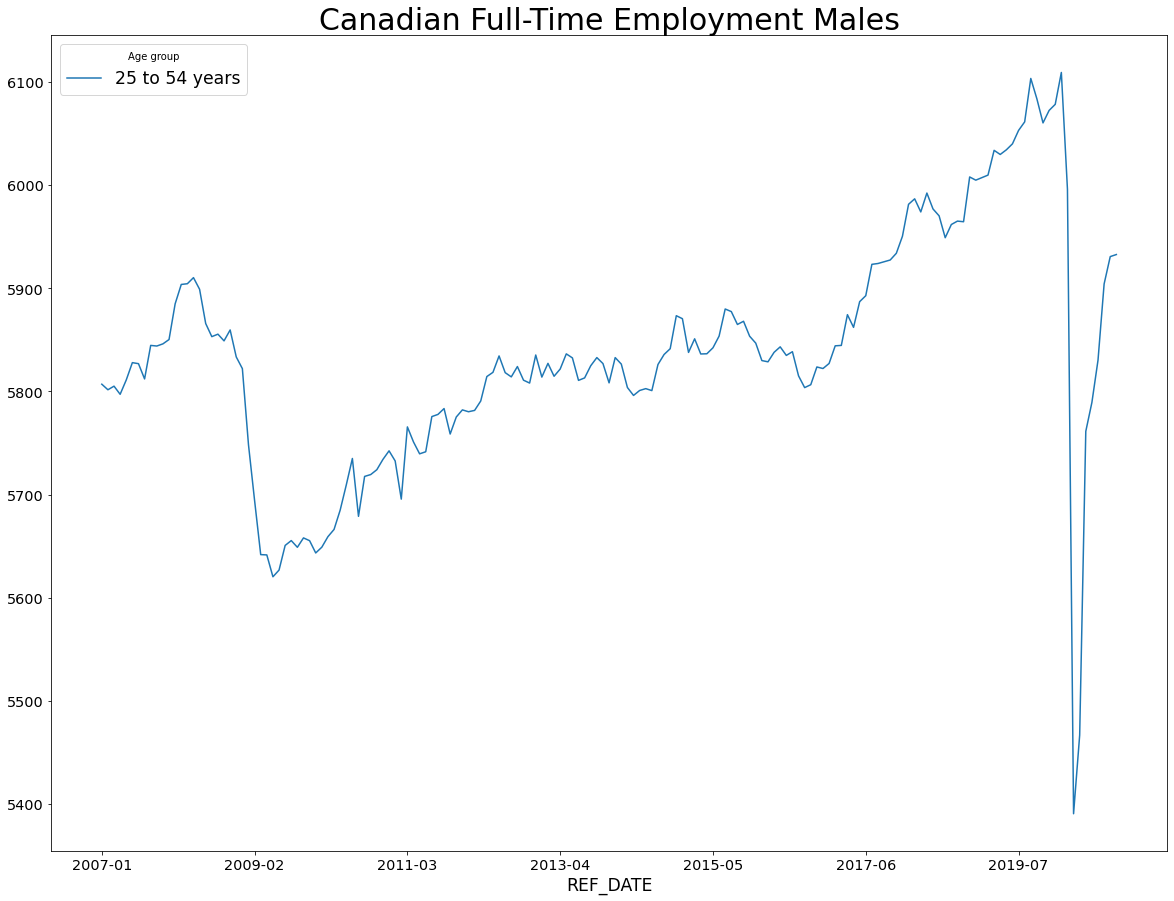

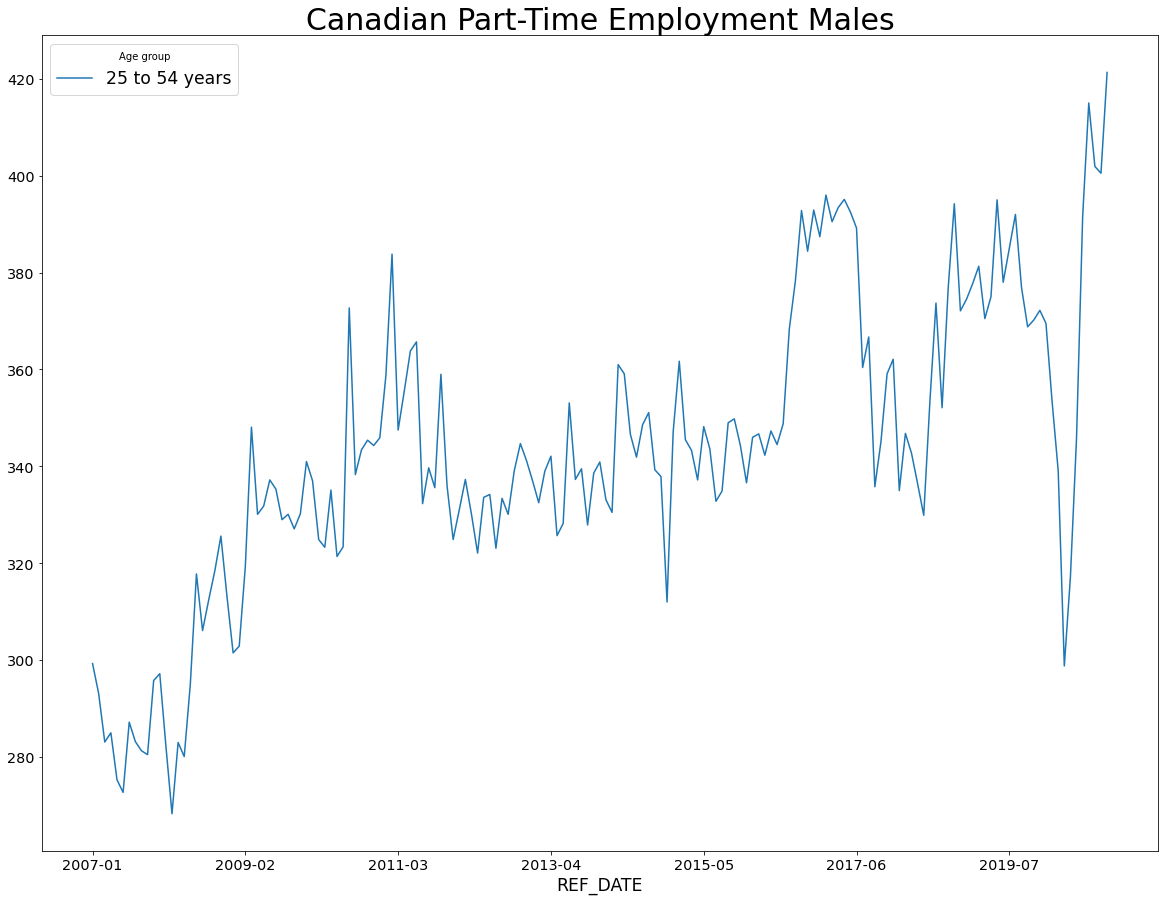

In [82]:
pd.crosstab(index= CanadaMaleFull['REF_DATE'],
            columns= CanadaMaleFull['Age group'],
            values= CanadaMaleFull['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Full-Time Employment Males', fontsize=30);

pd.crosstab(index= CanadaMalePart['REF_DATE'],
            columns= CanadaMalePart['Age group'],
            values= CanadaMalePart['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Part-Time Employment Males', fontsize=30);

## Canadian males vs females part-time and full-time employment

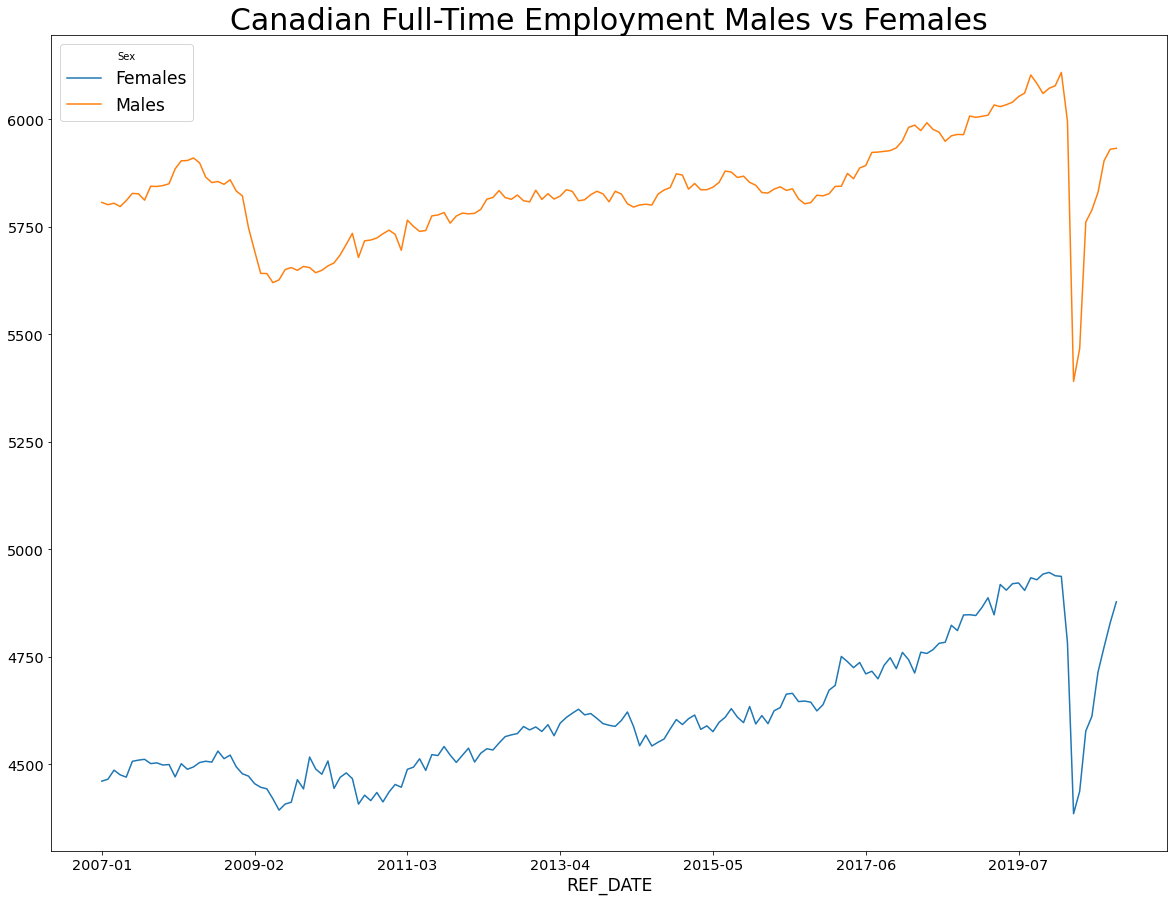

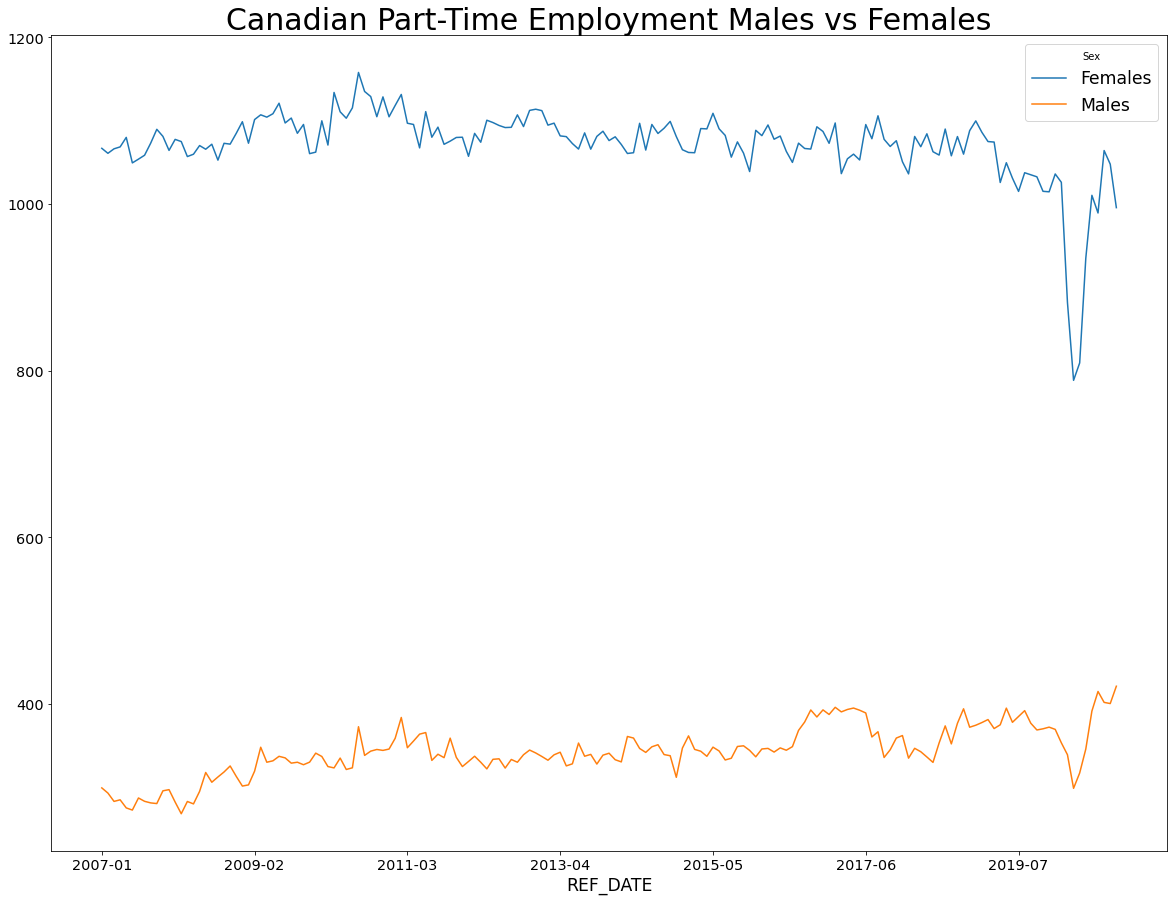

In [83]:
pd.crosstab(index= CanadaMaleVSFemaleFull['REF_DATE'],
            columns= CanadaMaleVSFemaleFull['Sex'],
            values= CanadaMaleVSFemaleFull['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Full-Time Employment Males vs Females', fontsize=30);

pd.crosstab(index= CanadaMaleVSFemalePart['REF_DATE'],
            columns= CanadaMaleVSFemalePart['Sex'],
            values= CanadaMaleVSFemalePart['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Part-Time Employment Males vs Females', fontsize=30);

In [84]:
only2020 = merge[(merge['Statistics'] == 'Estimate')
               & (merge['REF_DATE'].str.contains('2020') | merge['REF_DATE'].str.contains('2019') | merge['REF_DATE'].str.contains('2018') )
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]

In [85]:
CanadaBothsex2019_2020 = CanadaBothsex2019_2020[CanadaBothsex2019_2020['Labour force characteristics'] == 'Unemployment']

## Canadian unemployment 2018-2020

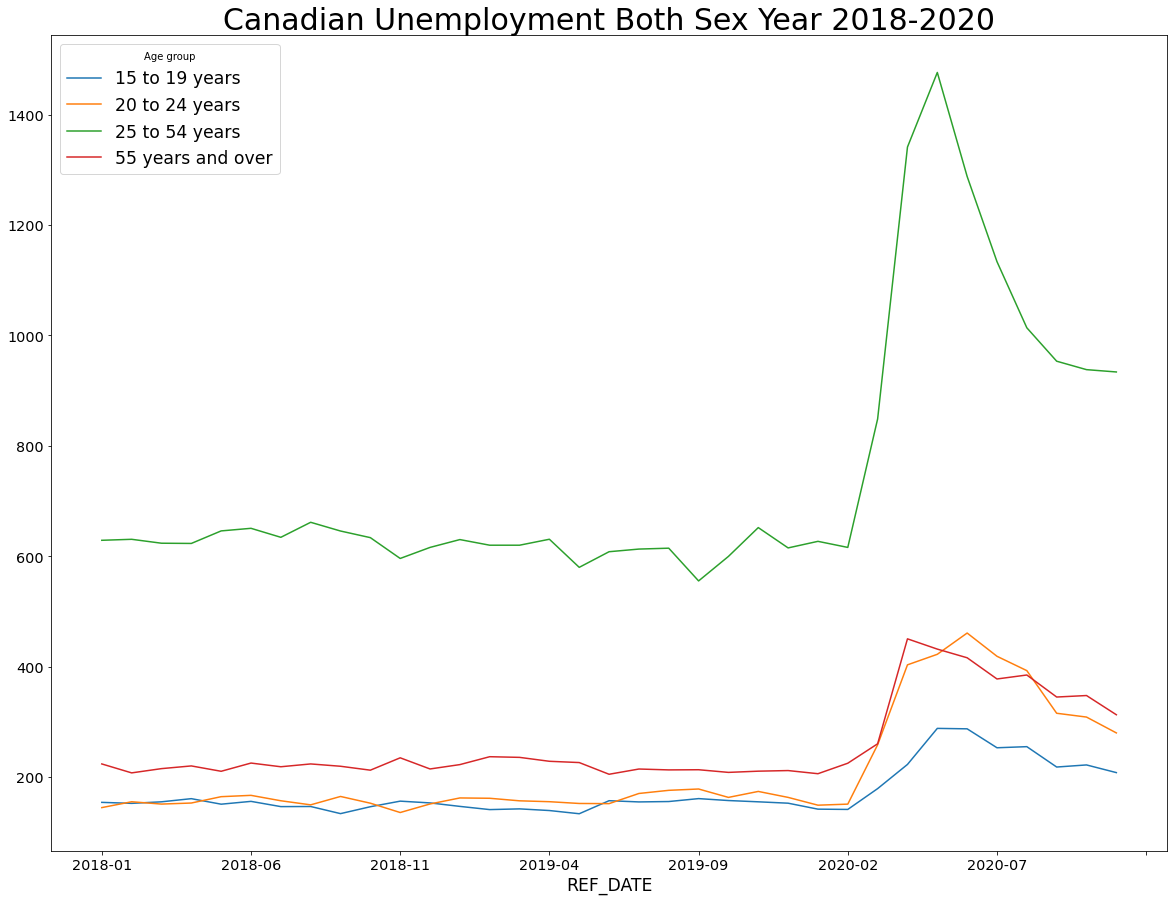

In [86]:
pd.crosstab(index= CanadaBothsex2019_2020['REF_DATE'],
            columns= CanadaBothsex2019_2020['Age group'],
            values= CanadaBothsex2019_2020['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Unemployment Both Sex Year 2018-2020', fontsize=30);

In [87]:
CanadaBothsex2007_2008 = merge[(merge['Statistics'] == 'Estimate')
               & (merge['REF_DATE'].str.contains('2007') | merge['REF_DATE'].str.contains('2008') | merge['REF_DATE'].str.contains('2009') )
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]

In [88]:
 CanadaBothsex2007_2008 = CanadaBothsex2007_2008[CanadaBothsex2007_2008['Labour force characteristics'] == 'Unemployment']

## Canadian unemployment 2007-2009

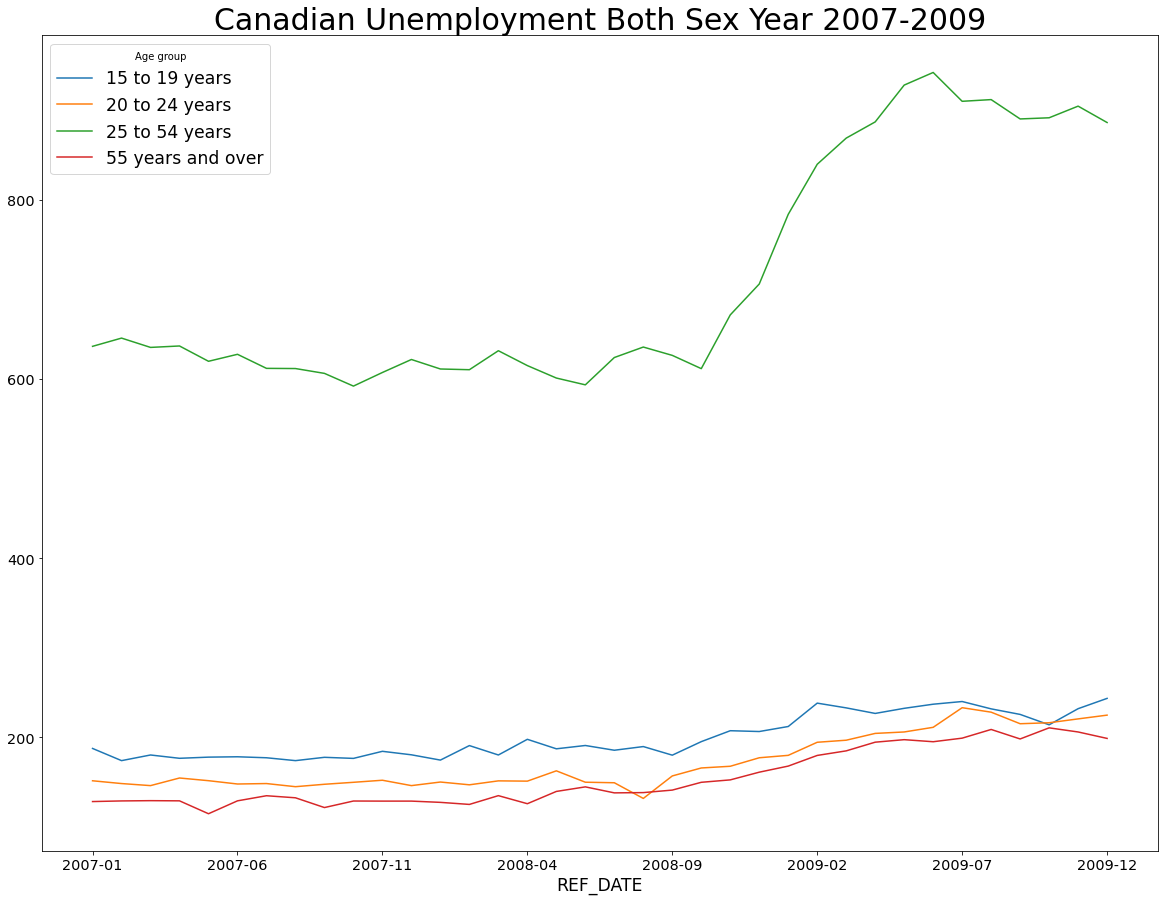

In [89]:
pd.crosstab(index= CanadaBothsex2007_2008['REF_DATE'],
            columns= CanadaBothsex2007_2008['Age group'],
            values= CanadaBothsex2007_2008['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Unemployment Both Sex Year 2007-2009', fontsize=30);

In [90]:
CanadaMaleVSFemale2018_2020 = merge[(merge['Statistics'] == 'Estimate') 
               & (merge['REF_DATE'].str.contains('2020') | merge['REF_DATE'].str.contains('2019') | merge['REF_DATE'].str.contains('2018') )
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
                  & ((merge['Sex'] == 'Females') | (merge['Sex'] == 'Males'))
                     & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaMaleVSFemale2018_2020 = CanadaMaleVSFemale2018_2020[CanadaMaleVSFemale2018_2020['Labour force characteristics'] == 'Unemployment']

## Canadian male vs female unemployment 2018-2020

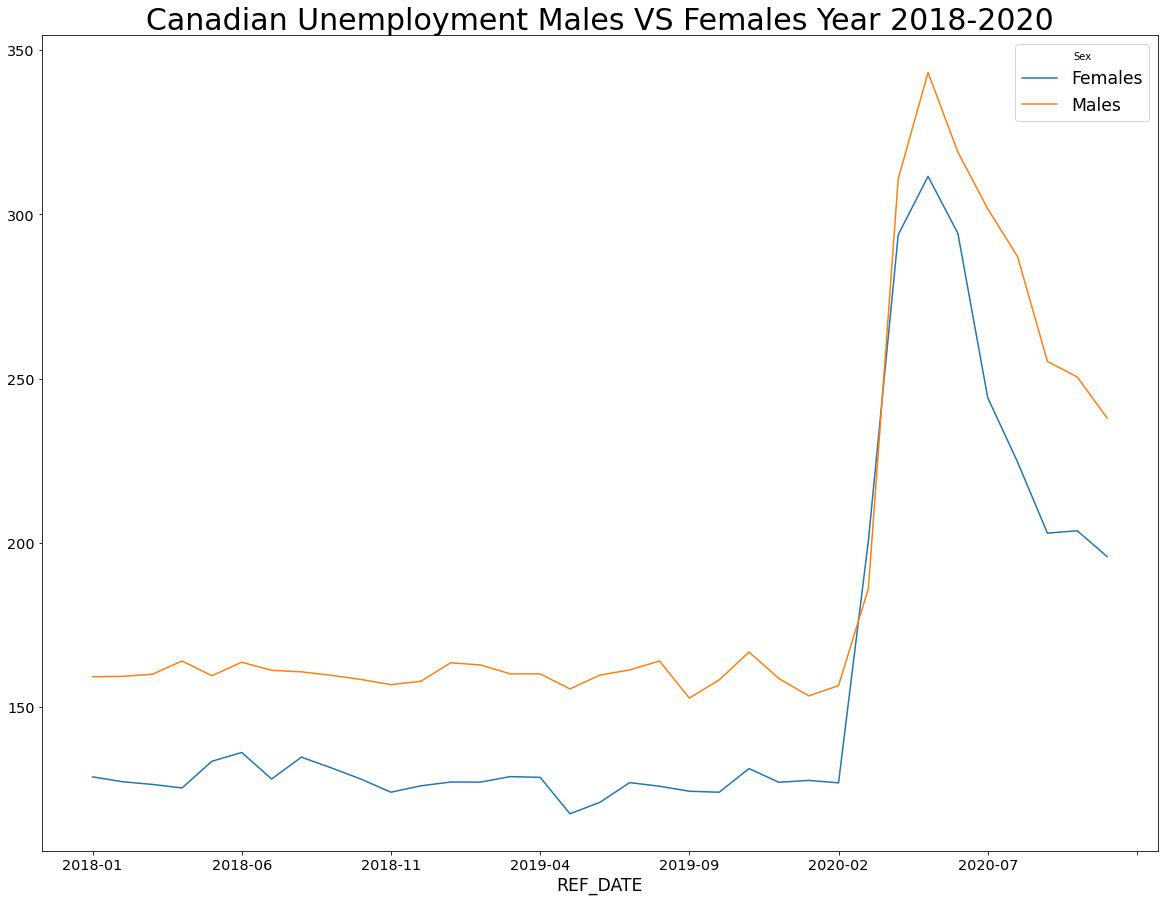

In [91]:
pd.crosstab(index= CanadaMaleVSFemale2018_2020['REF_DATE'],
            columns= CanadaMaleVSFemale2018_2020['Sex'],
            values= CanadaMaleVSFemale2018_2020['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Unemployment Males VS Females Year 2018-2020', fontsize=30);

In [92]:
CanadaMaleVSFemale2007_2009 = merge[(merge['Statistics'] == 'Estimate') 
               & (merge['REF_DATE'].str.contains('2007') | merge['REF_DATE'].str.contains('2008') | merge['REF_DATE'].str.contains('2009') )
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
                  & ((merge['Sex'] == 'Females') | (merge['Sex'] == 'Males'))
                     & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaMaleVSFemale2007_2009 = CanadaMaleVSFemale2007_2009[CanadaMaleVSFemale2007_2009['Labour force characteristics'] == 'Unemployment']

## Canadian males vs female unemployment 2007-2009

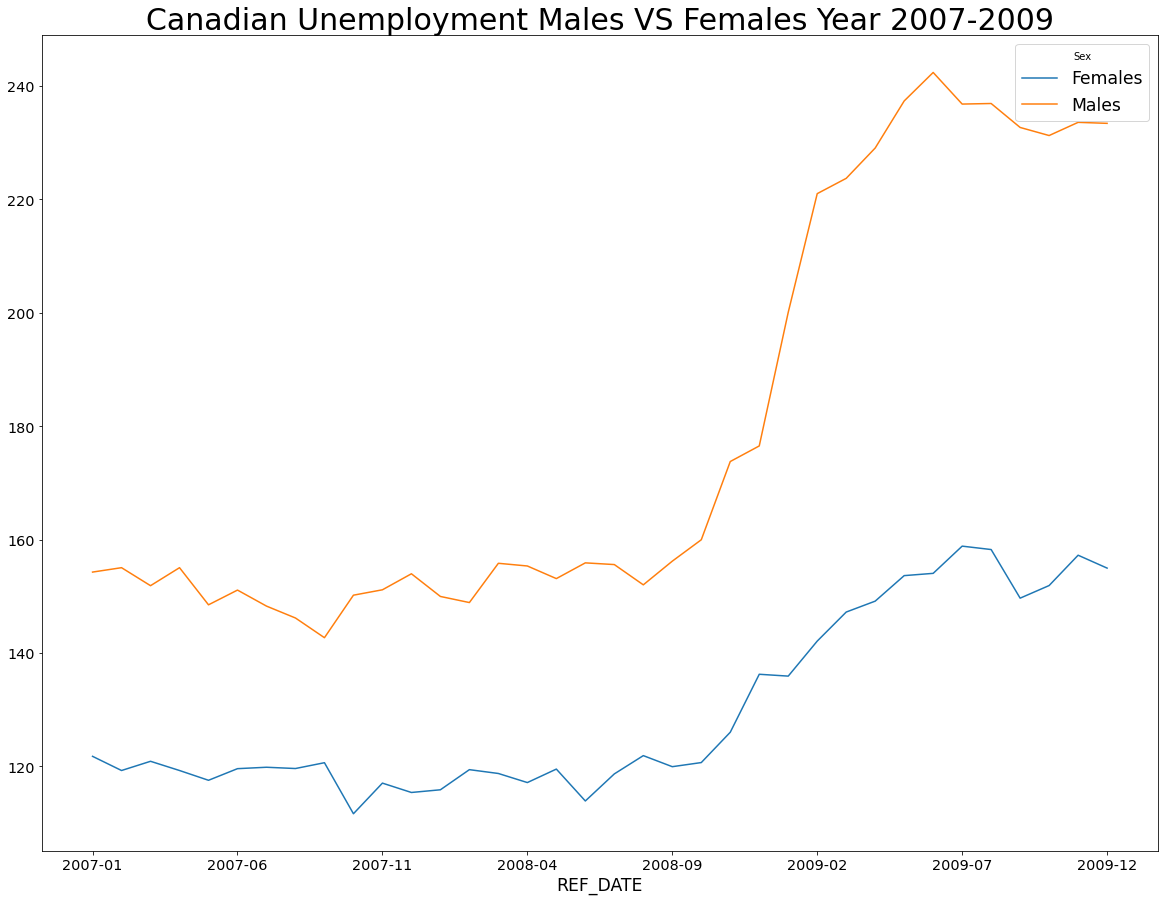

In [93]:
pd.crosstab(index= CanadaMaleVSFemale2007_2009['REF_DATE'],
            columns= CanadaMaleVSFemale2007_2009['Sex'],
            values= CanadaMaleVSFemale2007_2009['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Unemployment Males VS Females Year 2007-2009', fontsize=30);

In [94]:
CanadaBothEmployment = merge[(merge['Statistics'] == 'Estimate')
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaBothEmployment = CanadaBothEmployment[CanadaBothEmployment['Labour force characteristics'] == 'Employment']

## Canadian employment 2007-2020

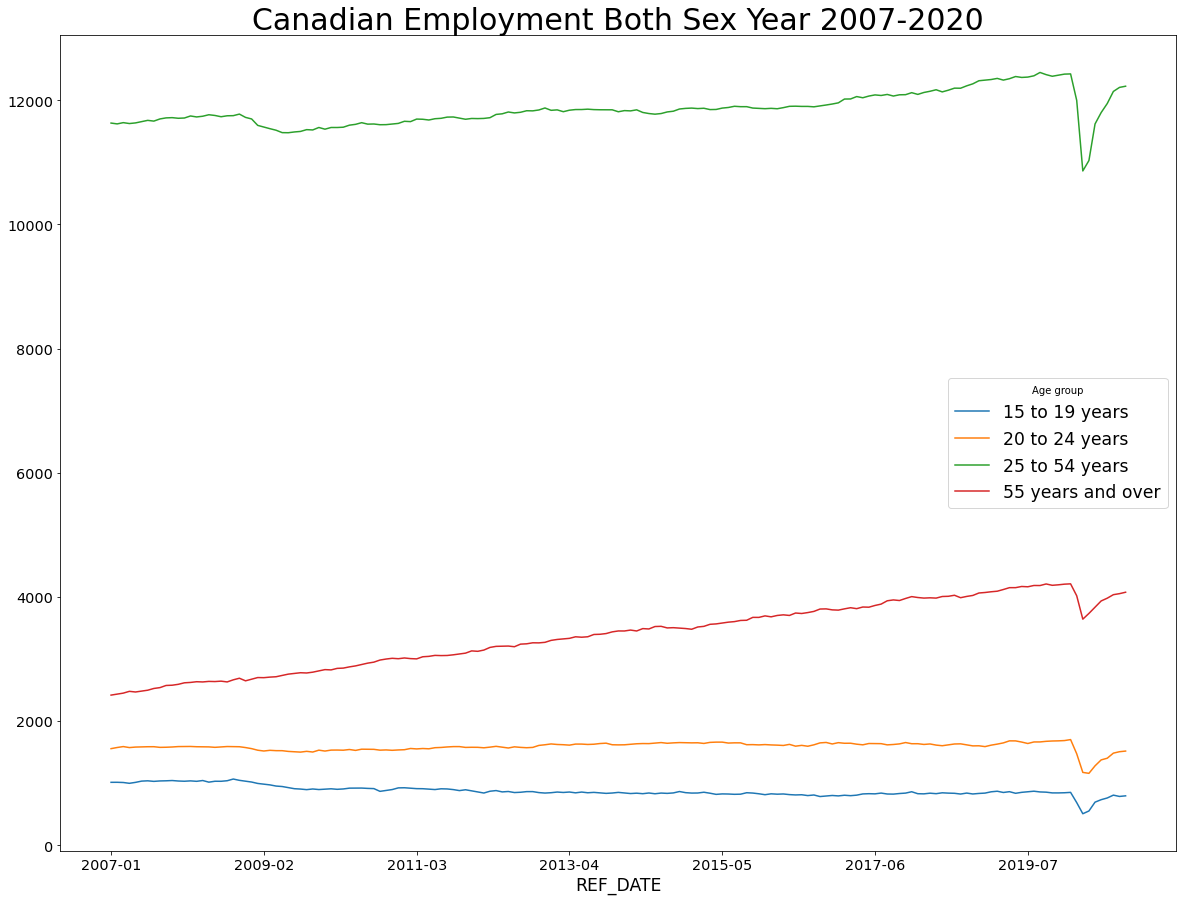

In [95]:
pd.crosstab(index= CanadaBothEmployment['REF_DATE'],
            columns= CanadaBothEmployment['Age group'],
            values= CanadaBothEmployment['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Employment Both Sex Year 2007-2020', fontsize=30);

In [96]:
CanadaMaleVSFemaleEmployment = merge[(merge['Statistics'] == 'Estimate')
               & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Males') | (merge['Sex'] == 'Females'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaMaleVSFemaleEmployment = CanadaMaleVSFemaleEmployment[CanadaMaleVSFemaleEmployment['Labour force characteristics'] == 'Employment']

## Canadian mle vs female employment 2007-2020

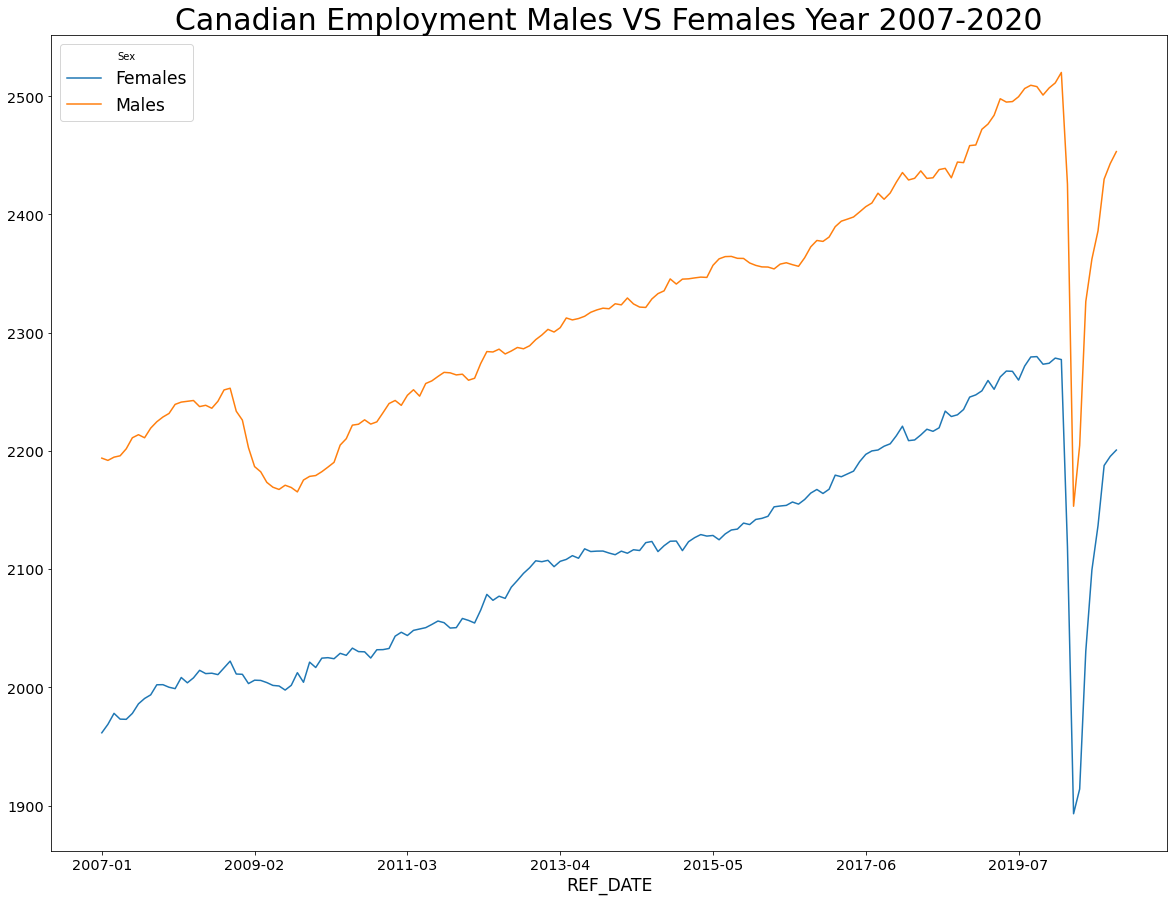

In [97]:
pd.crosstab(index= CanadaMaleVSFemaleEmployment['REF_DATE'],
            columns= CanadaMaleVSFemaleEmployment['Sex'],
            values= CanadaMaleVSFemaleEmployment['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Canadian Employment Males VS Females Year 2007-2020', fontsize=30);

In [98]:
OntarioMaleVSFemaleEmployment2018_2020 = merge[(merge['Statistics'] == 'Estimate')
               & (merge['REF_DATE'].str.contains('2018') | merge['REF_DATE'].str.contains('2019') | merge['REF_DATE'].str.contains('2020') )
               & (merge['GEO'] == 'Ontario') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Males') | (merge['Sex'] == 'Females'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
OntarioMaleVSFemaleEmployment2018_2020 = OntarioMaleVSFemaleEmployment2018_2020[OntarioMaleVSFemaleEmployment2018_2020['Labour force characteristics'] == 'Employment']

## Ontario males vs female employment 2018-2020

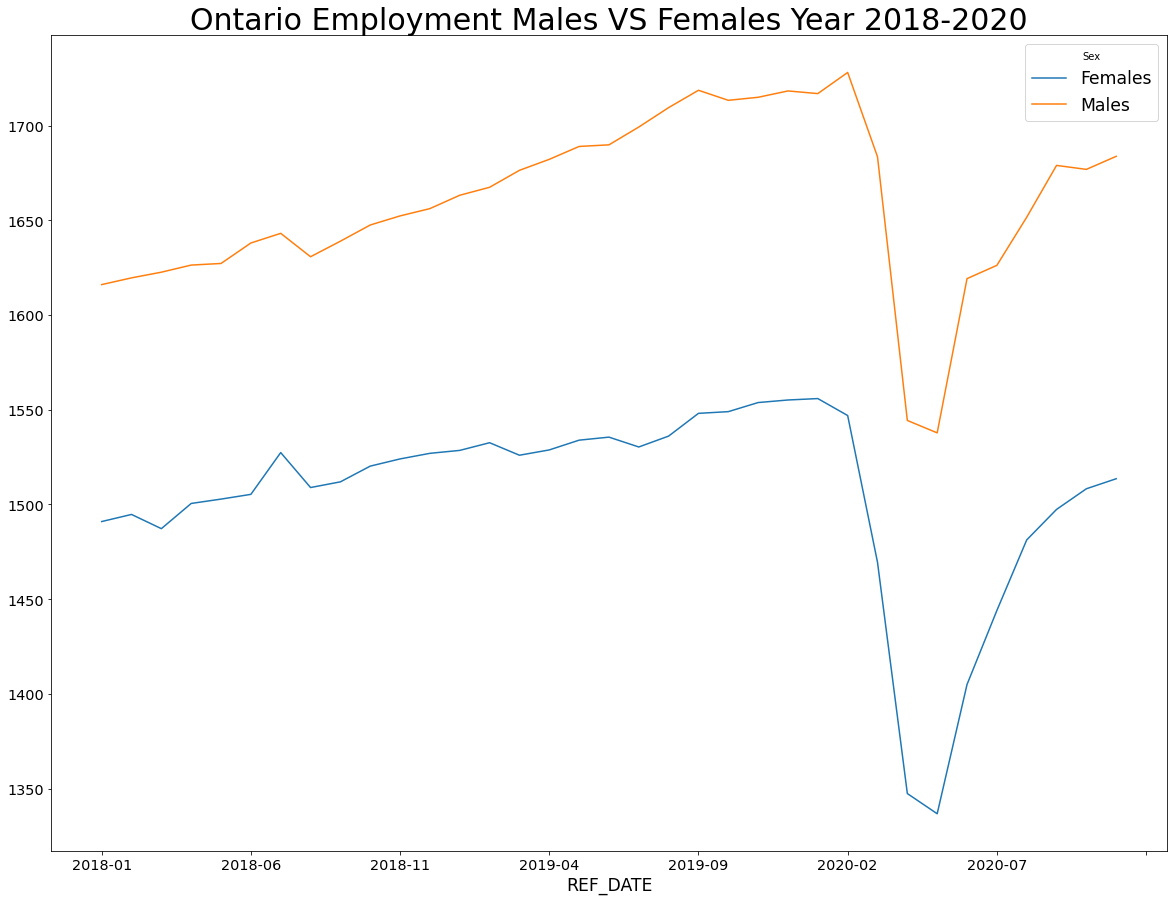

In [99]:
pd.crosstab(index= OntarioMaleVSFemaleEmployment2018_2020['REF_DATE'],
            columns= OntarioMaleVSFemaleEmployment2018_2020['Sex'],
            values= OntarioMaleVSFemaleEmployment2018_2020['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Ontario Employment Males VS Females Year 2018-2020', fontsize=30);

In [100]:
OntarioMaleVSFemaleUnemployment2018_2020 = merge[(merge['Statistics'] == 'Estimate')
               & (merge['REF_DATE'].str.contains('2018') | merge['REF_DATE'].str.contains('2019') | merge['REF_DATE'].str.contains('2020') )
               & (merge['GEO'] == 'Ontario') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Males') | (merge['Sex'] == 'Females'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
OntarioMaleVSFemaleUnemployment2018_2020 = OntarioMaleVSFemaleUnemployment2018_2020[OntarioMaleVSFemaleUnemployment2018_2020['Labour force characteristics'] == 'Unemployment']

## Ontario males vs female unemployment 2018-2020

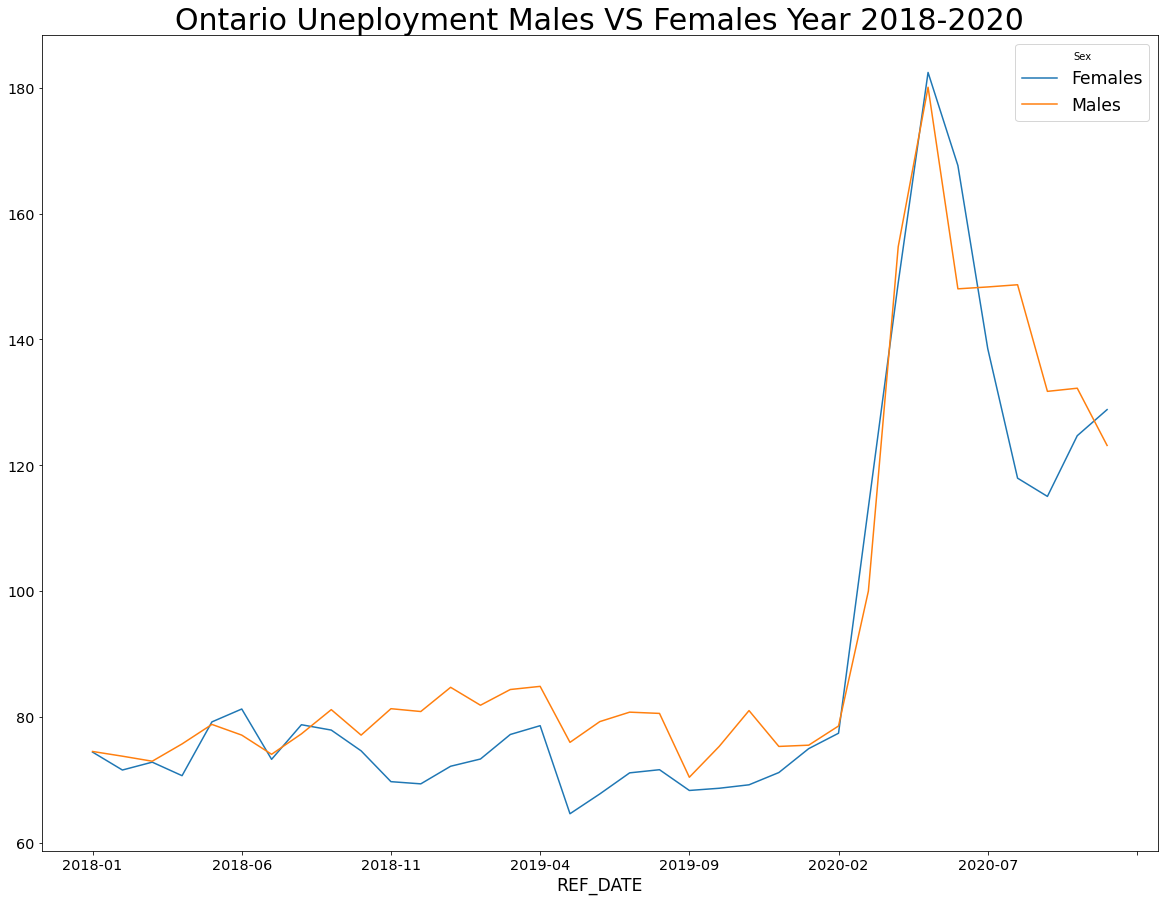

In [101]:
pd.crosstab(index= OntarioMaleVSFemaleUnemployment2018_2020['REF_DATE'],
            columns= OntarioMaleVSFemaleUnemployment2018_2020['Sex'],
            values= OntarioMaleVSFemaleUnemployment2018_2020['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Ontario Uneployment Males VS Females Year 2018-2020', fontsize=30);

In [103]:
ProvinceBothUnemployment = merge[(merge['Statistics'] == 'Estimate')
                & ~(merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothUnemployment = ProvinceBothUnemployment[ProvinceBothUnemployment['Labour force characteristics'] == 'Unemployment']

## Unemployment by canadian province 2007-2020

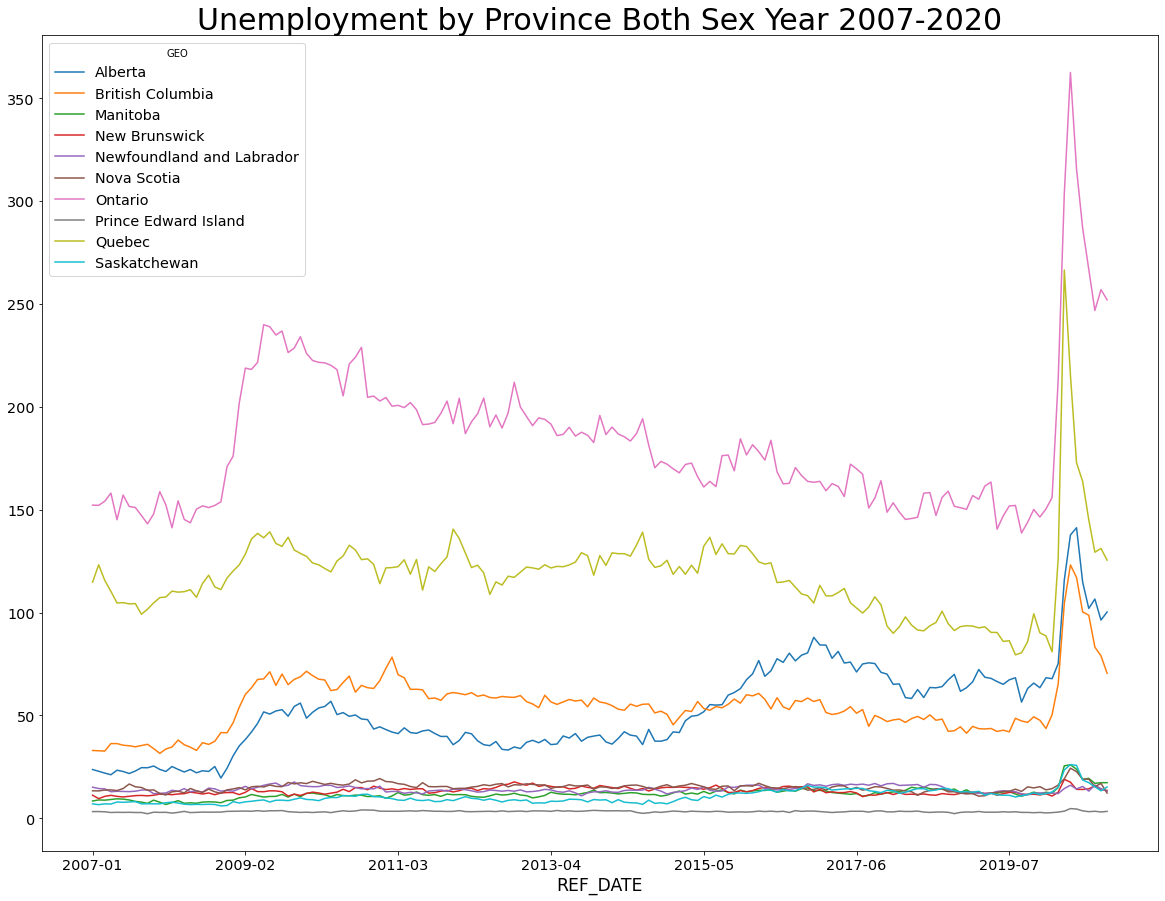

In [104]:
pd.crosstab(index= ProvinceBothUnemployment['REF_DATE'],
            columns= ProvinceBothUnemployment['GEO'],
            values= ProvinceBothUnemployment['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Unemployment by Province Both Sex Year 2007-2020', fontsize=30);

In [105]:
ProvinceBothEmployment = merge[(merge['Statistics'] == 'Estimate')
                & ~(merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothEmployment = ProvinceBothEmployment[ProvinceBothEmployment['Labour force characteristics'] == 'Employment']

## employment by province 2007-2020

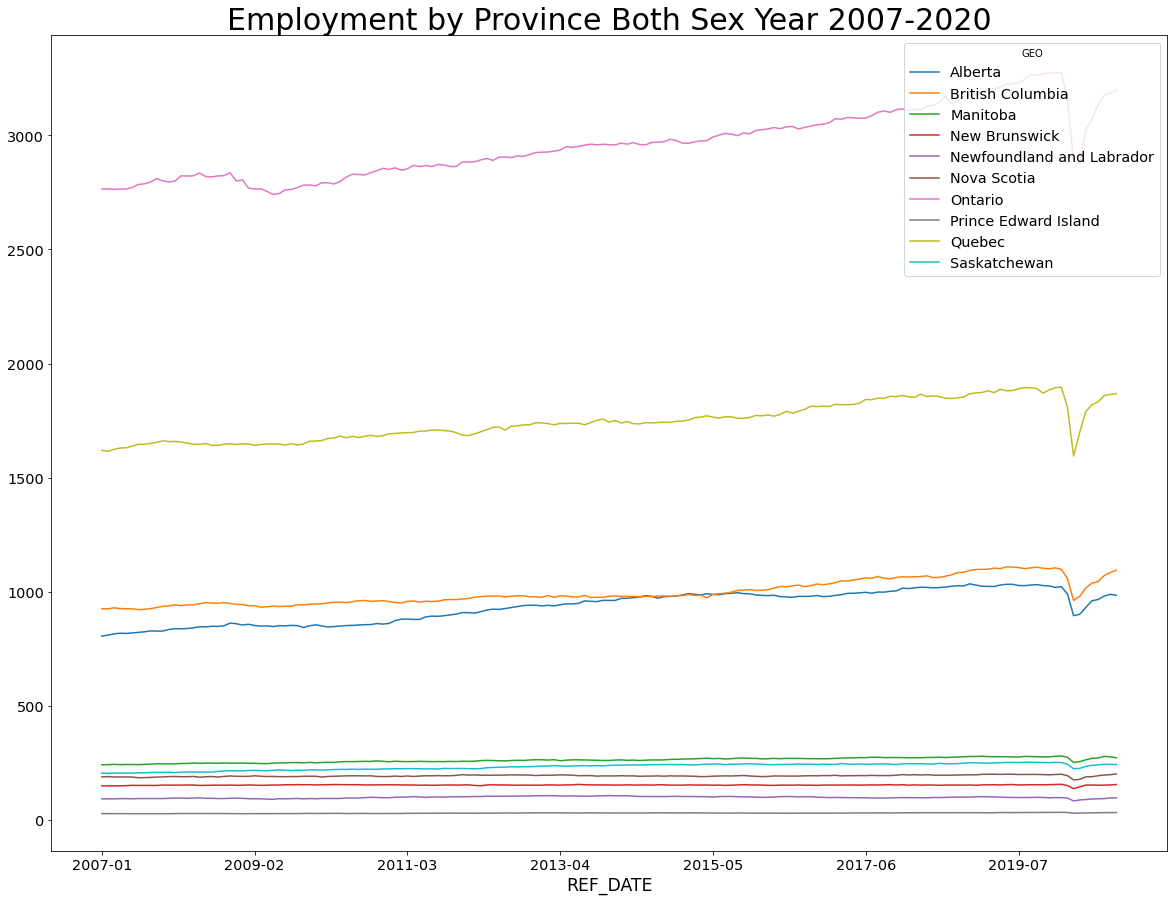

In [106]:
pd.crosstab(index= ProvinceBothEmployment['REF_DATE'],
            columns= ProvinceBothEmployment['GEO'],
            values= ProvinceBothEmployment['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Employment by Province Both Sex Year 2007-2020', fontsize=30);

In [107]:
ProvinceBothEmployment2018_2020 = merge[(merge['Statistics'] == 'Estimate')
            & (merge['REF_DATE'].str.contains('2018') | merge['REF_DATE'].str.contains('2019') | merge['REF_DATE'].str.contains('2020') )
                & ~(merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothEmployment2018_2020 = ProvinceBothEmployment2018_2020[ProvinceBothEmployment2018_2020['Labour force characteristics'] == 'Employment']

## employment by province 2018-2020

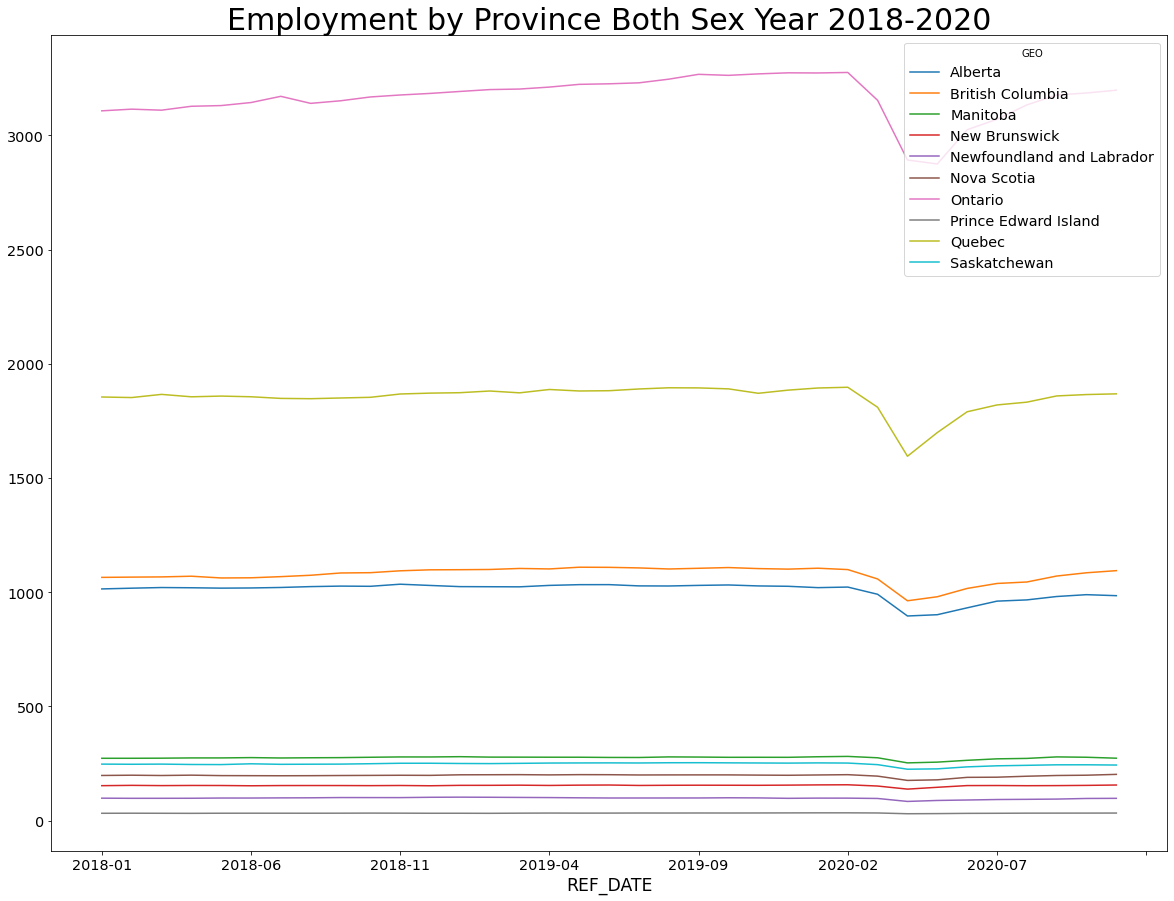

In [108]:
pd.crosstab(index= ProvinceBothEmployment2018_2020['REF_DATE'],
            columns= ProvinceBothEmployment2018_2020['GEO'],
            values= ProvinceBothEmployment2018_2020['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Employment by Province Both Sex Year 2018-2020', fontsize=30);

In [109]:
ProvinceBothUnemployment2018_2020 = merge[(merge['Statistics'] == 'Estimate')
            & (merge['REF_DATE'].str.contains('2018') | merge['REF_DATE'].str.contains('2019') | merge['REF_DATE'].str.contains('2020') )
                & ~(merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothUnemployment2018_2020 = ProvinceBothUnemployment2018_2020[ProvinceBothUnemployment2018_2020['Labour force characteristics'] == 'Unemployment']

In [ ]:
ProvinceBothUnemployment2018_2020 = merge[(merge['Statistics'] == 'Estimate')
            & merge['REF_DATE'].str.contains('2020')
                & ~(merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothUnemployment2018_2020 = ProvinceBothUnemployment2018_2020[ProvinceBothUnemployment2018_2020['Labour force characteristics'] == 'Unemployment']

## unemployment by province 2018-2020

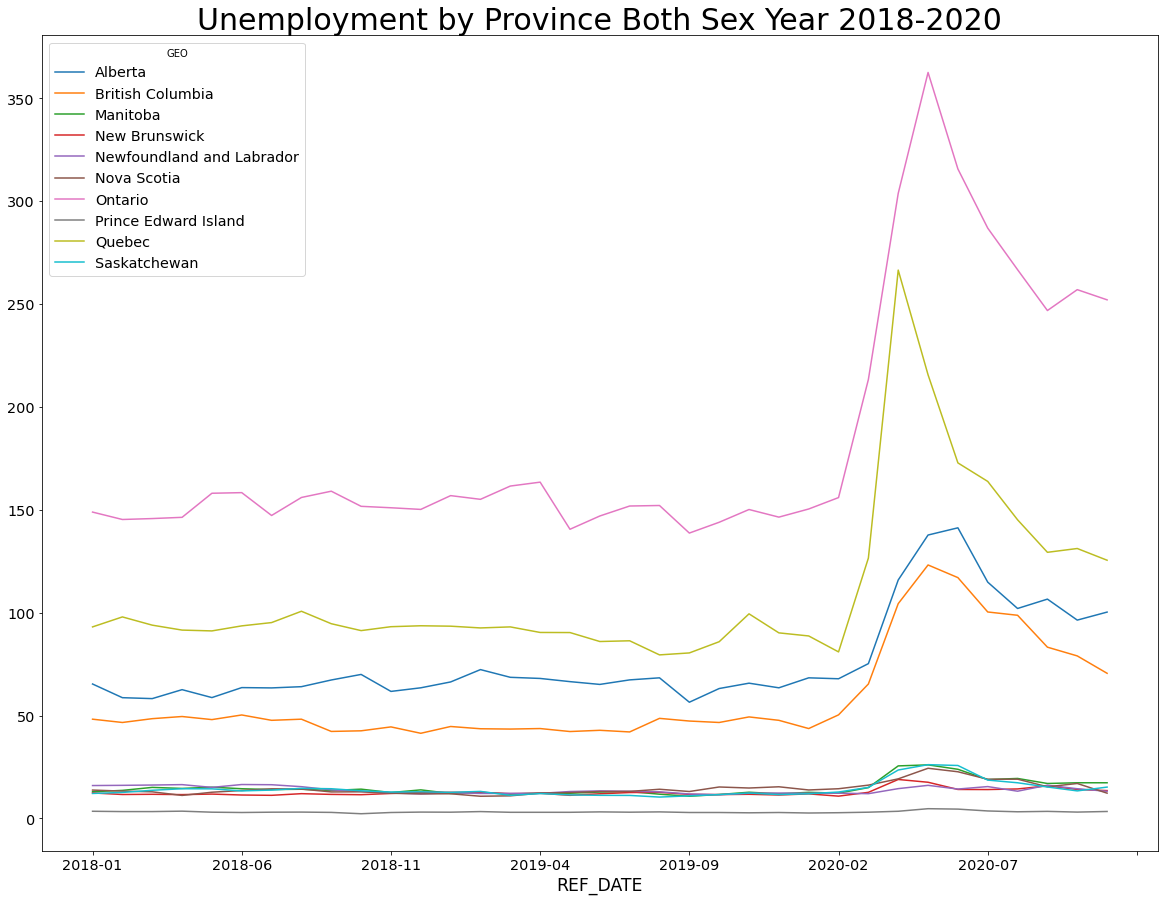

In [110]:
pd.crosstab(index= ProvinceBothUnemployment2018_2020['REF_DATE'],
            columns= ProvinceBothUnemployment2018_2020['GEO'],
            values= ProvinceBothUnemployment2018_2020['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Unemployment by Province Both Sex Year 2018-2020', fontsize=30);

In [111]:
ProvinceBothPart = merge[(merge['Statistics'] == 'Estimate')
                & ~(merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothPart = ProvinceBothPart[ProvinceBothPart['Labour force characteristics'] == 'Part-time employment ']

## part-time eployment by province

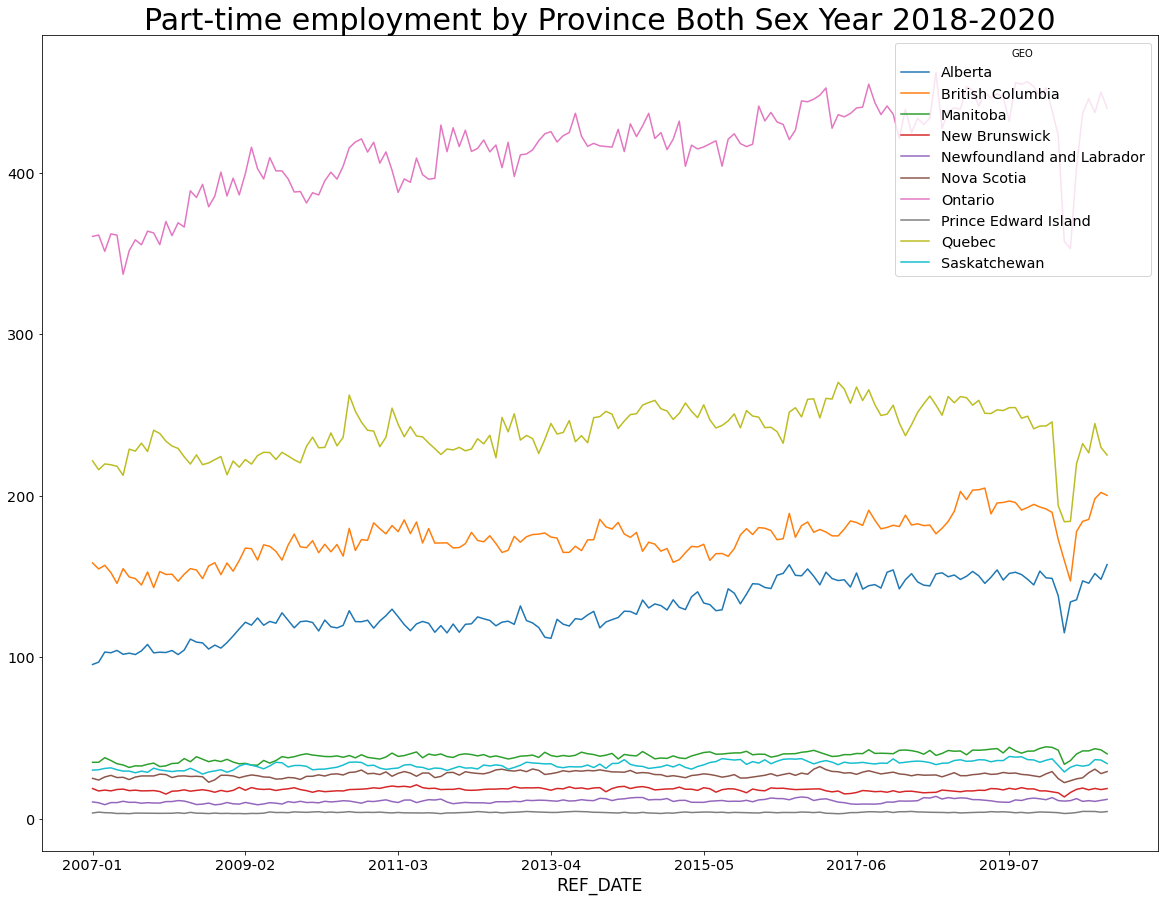

In [112]:
pd.crosstab(index= ProvinceBothPart['REF_DATE'],
            columns= ProvinceBothPart['GEO'],
            values= ProvinceBothPart['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Part-time employment by Province Both Sex Year 2018-2020', fontsize=30);

In [113]:
ProvinceBothFull = merge[(merge['Statistics'] == 'Estimate')
                & ~(merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothFull = ProvinceBothFull[ProvinceBothFull['Labour force characteristics'] == 'Full-time employment']

## full-time employment by province

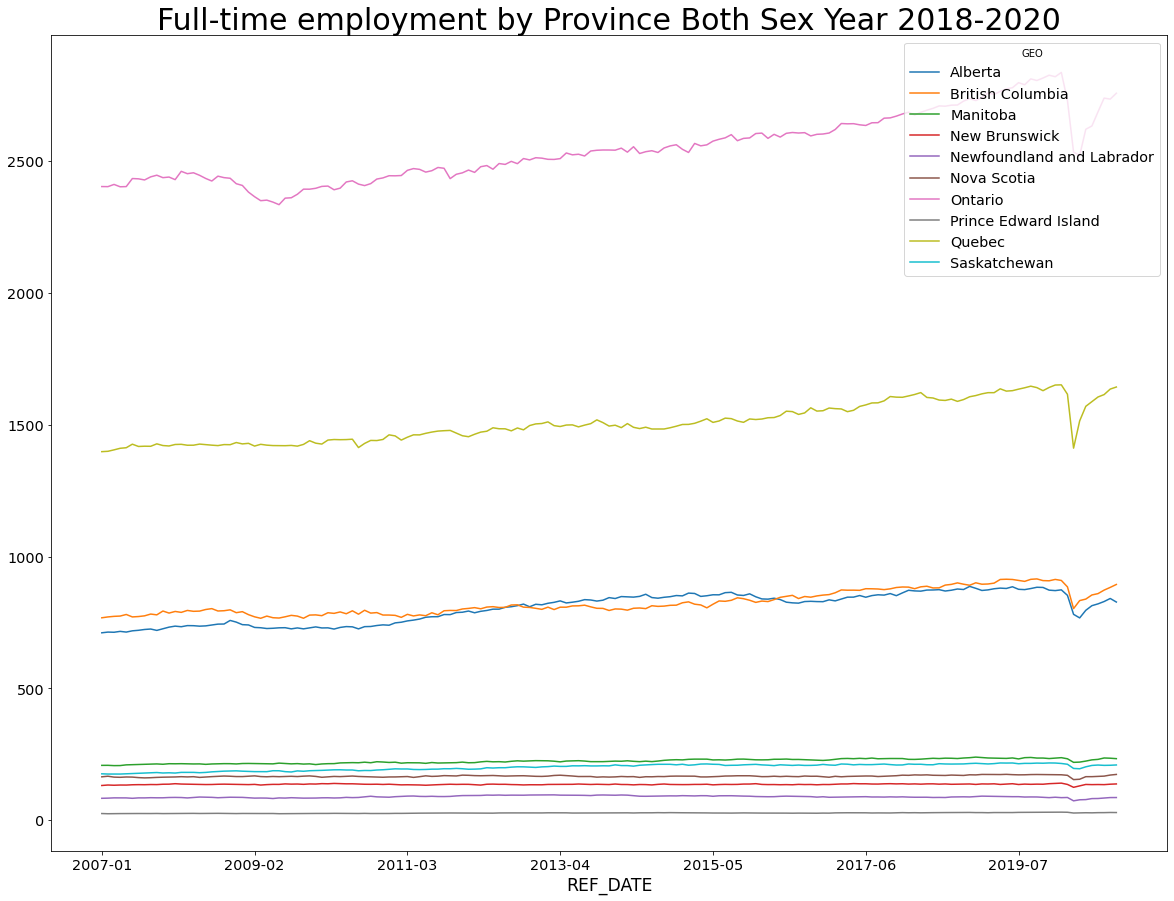

In [114]:
pd.crosstab(index= ProvinceBothFull['REF_DATE'],
            columns= ProvinceBothFull['GEO'],
            values= ProvinceBothFull['VALUE'], 
            aggfunc = 'mean').plot(figsize=(20,15))
plt.title('Full-time employment by Province Both Sex Year 2018-2020', fontsize=30);

In [115]:
ProvinceBothUnemployment = merge[(merge['Statistics'] == 'Estimate')
                & ~(merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & (merge['Sex'] == 'Both sexes')
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothUnemployment = ProvinceBothUnemployment[ProvinceBothUnemployment['Labour force characteristics'] == 'Unemployment']

In [116]:
ProvinceBothUnemployment['REF_DATE']=pd.to_datetime(ProvinceBothUnemployment['REF_DATE'])
ProvinceBothUnemployment.set_index('REF_DATE', inplace=True)
ProvinceBothUnemployment = ProvinceBothUnemployment.groupby('GEO')[['VALUE']].resample('Y').mean()
ProvinceBothUnemployment.reset_index(inplace=True)

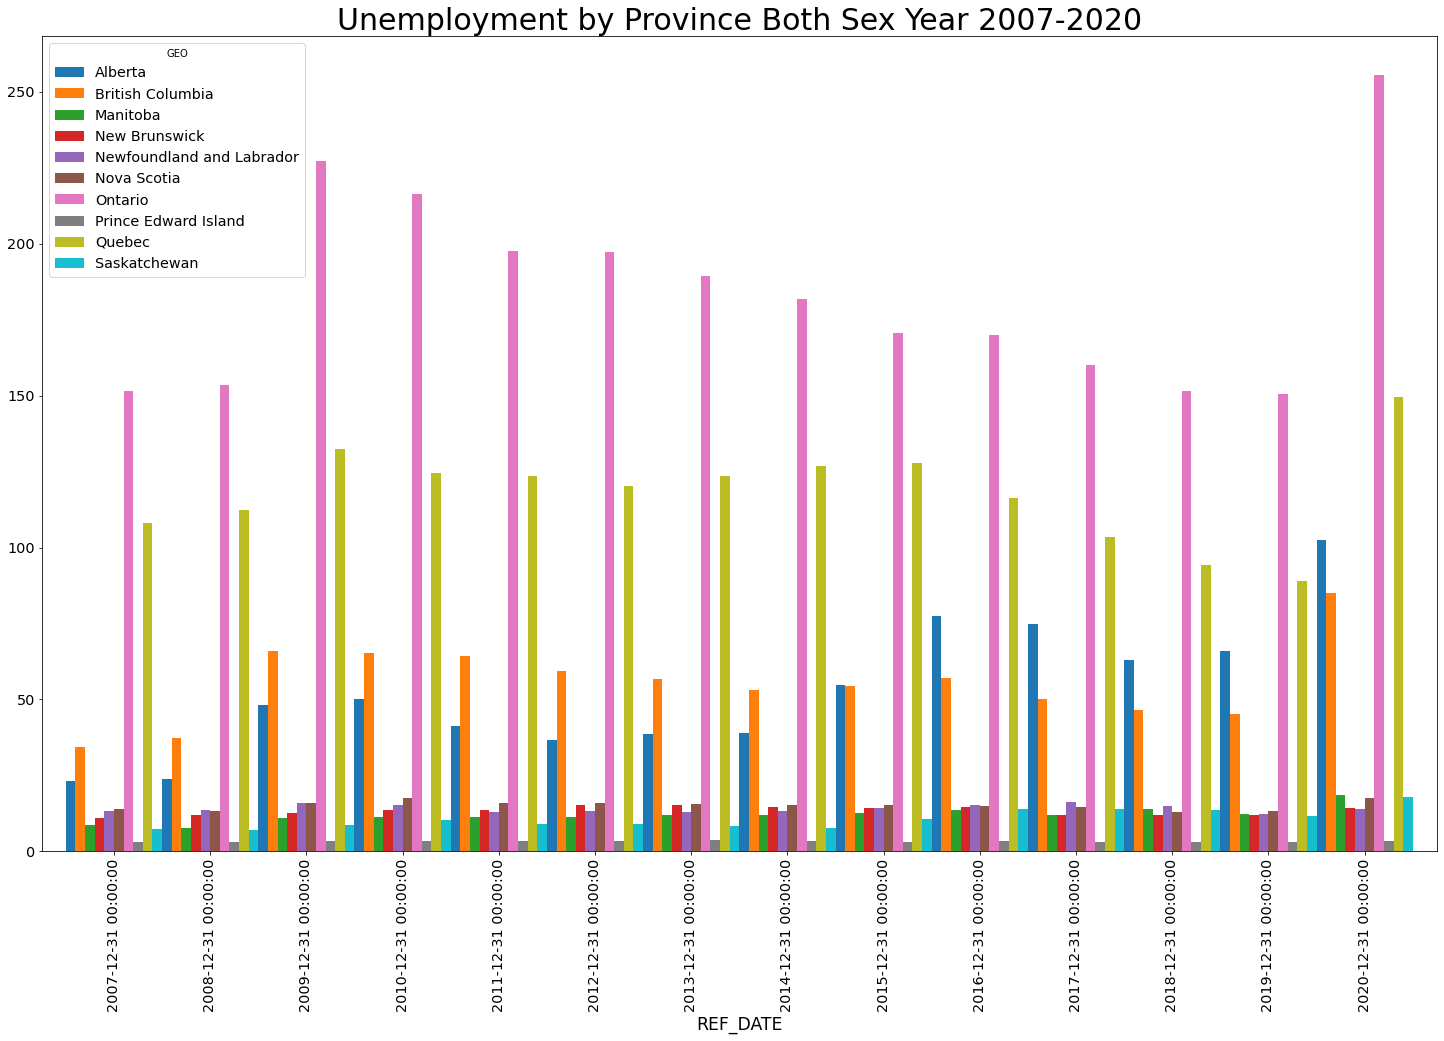

In [117]:
pd.crosstab(index= ProvinceBothUnemployment['REF_DATE'],
            columns= ProvinceBothUnemployment['GEO'],
            values= ProvinceBothUnemployment['VALUE'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(25,15), width=1)
plt.title('Unemployment by Province Both Sex Year 2007-2020', fontsize=30);

In [118]:
CanadaMaleVSFemaleUnemployment = merge[(merge['Statistics'] == 'Estimate')
                & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Males') | (merge['Sex'] == 'Females'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaMaleVSFemaleUnemployment = CanadaMaleVSFemaleUnemployment[CanadaMaleVSFemaleUnemployment['Labour force characteristics'] == 'Unemployment']

In [119]:
CanadaMaleVSFemaleUnemployment['REF_DATE']=pd.to_datetime(CanadaMaleVSFemaleUnemployment['REF_DATE'])
CanadaMaleVSFemaleUnemployment.set_index('REF_DATE', inplace=True)
CanadaMaleVSFemaleUnemployment = CanadaMaleVSFemaleUnemployment.groupby('Sex')[['VALUE']].resample('Y').mean()
CanadaMaleVSFemaleUnemployment.reset_index(inplace=True)

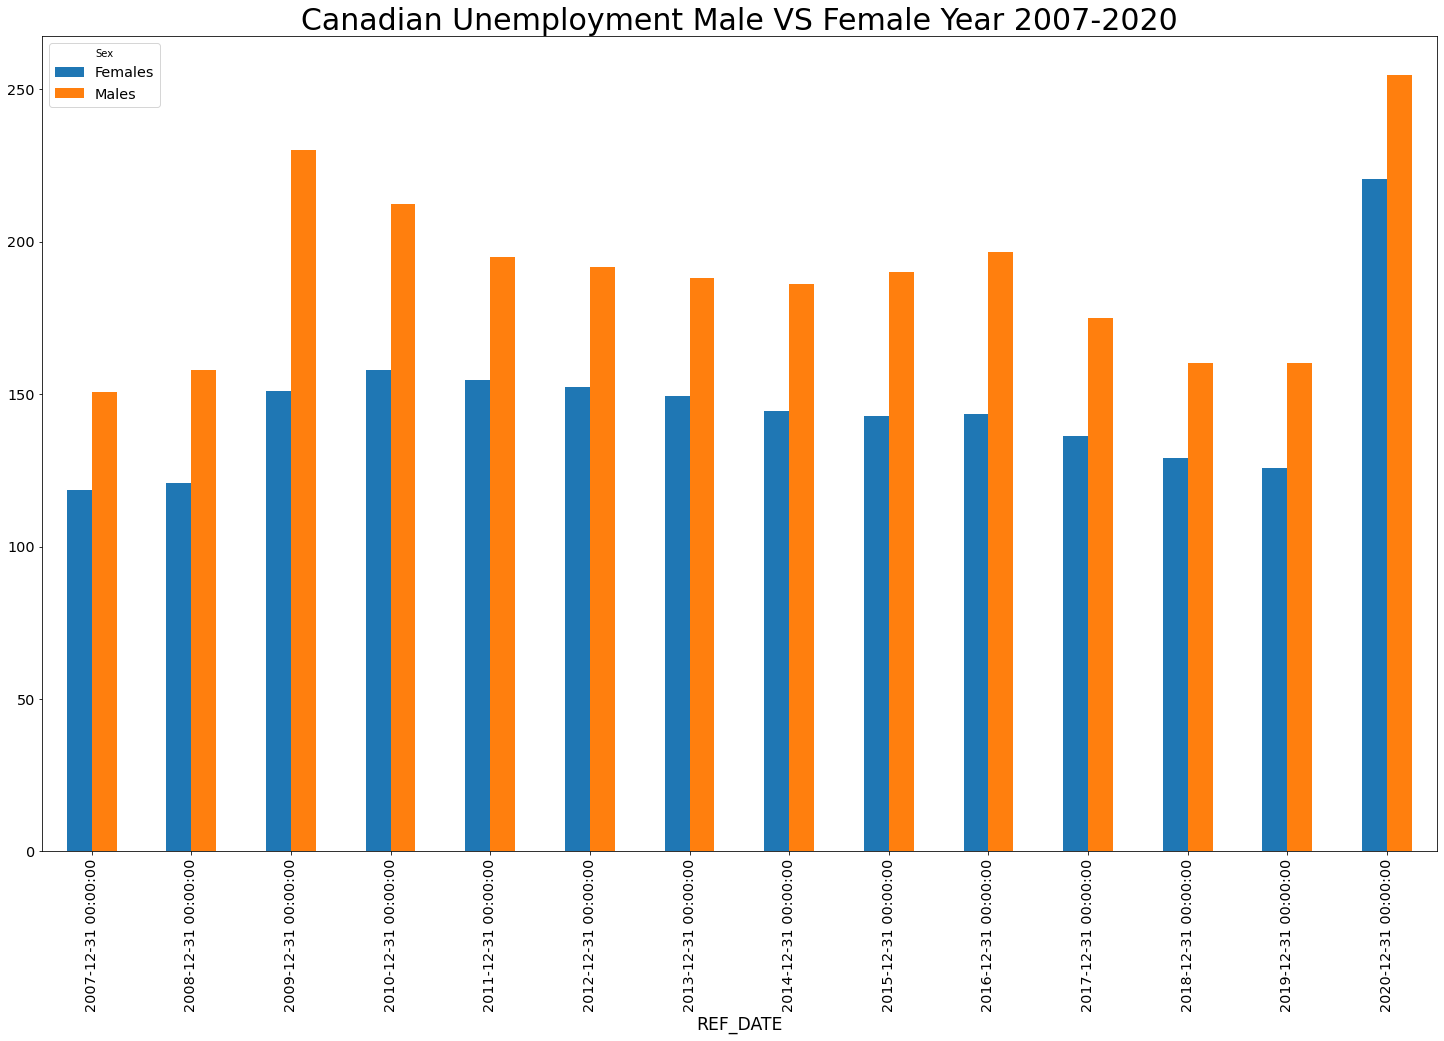

In [120]:
pd.crosstab(index= CanadaMaleVSFemaleUnemployment['REF_DATE'],
            columns= CanadaMaleVSFemaleUnemployment['Sex'],
            values= CanadaMaleVSFemaleUnemployment['VALUE'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(25,15))
plt.title('Canadian Unemployment Male VS Female Year 2007-2020', fontsize=30);

In [121]:
CanadaMaleVSFemaleFull = merge[(merge['Statistics'] == 'Estimate')
                & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Males') | (merge['Sex'] == 'Females'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaMaleVSFemaleFull = CanadaMaleVSFemaleFull[CanadaMaleVSFemaleFull['Labour force characteristics'] == 'Full-time employment']

In [122]:
CanadaMaleVSFemalePart = merge[(merge['Statistics'] == 'Estimate')
                & (merge['GEO'] == 'Canada') 
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Males') | (merge['Sex'] == 'Females'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaMaleVSFemalePart = CanadaMaleVSFemalePart[CanadaMaleVSFemalePart['Labour force characteristics'] == 'Part-time employment ']

In [123]:
CanadaMaleVSFemalePart['REF_DATE']=pd.to_datetime(CanadaMaleVSFemalePart['REF_DATE'])
CanadaMaleVSFemalePart.set_index('REF_DATE', inplace=True)
CanadaMaleVSFemalePart = CanadaMaleVSFemalePart.groupby('Sex')[['VALUE']].resample('Y').mean()
CanadaMaleVSFemalePart.reset_index(inplace=True)

In [124]:
CanadaMaleVSFemaleFull['REF_DATE']=pd.to_datetime(CanadaMaleVSFemaleFull['REF_DATE'])
CanadaMaleVSFemaleFull.set_index('REF_DATE', inplace=True)
CanadaMaleVSFemaleFull = CanadaMaleVSFemaleFull.groupby('Sex')[['VALUE']].resample('Y').mean()
CanadaMaleVSFemaleFull.reset_index(inplace=True)

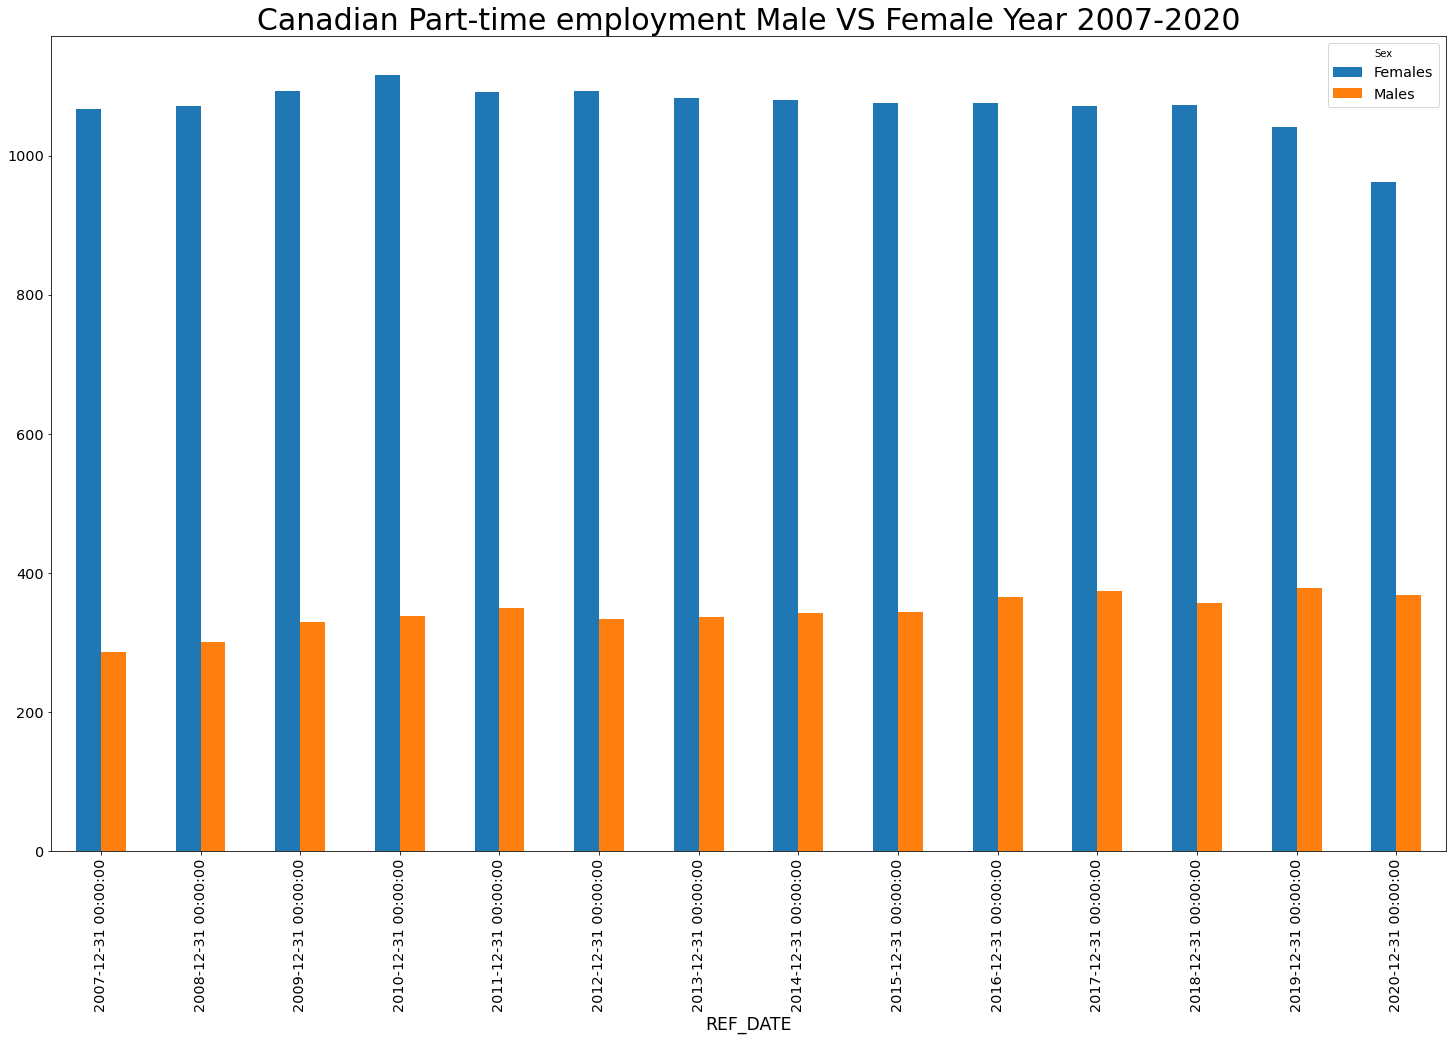

In [125]:
pd.crosstab(index= CanadaMaleVSFemalePart['REF_DATE'],
            columns= CanadaMaleVSFemalePart['Sex'],
            values= CanadaMaleVSFemalePart['VALUE'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(25,15))
plt.title('Canadian Part-time employment Male VS Female Year 2007-2020', fontsize=30);

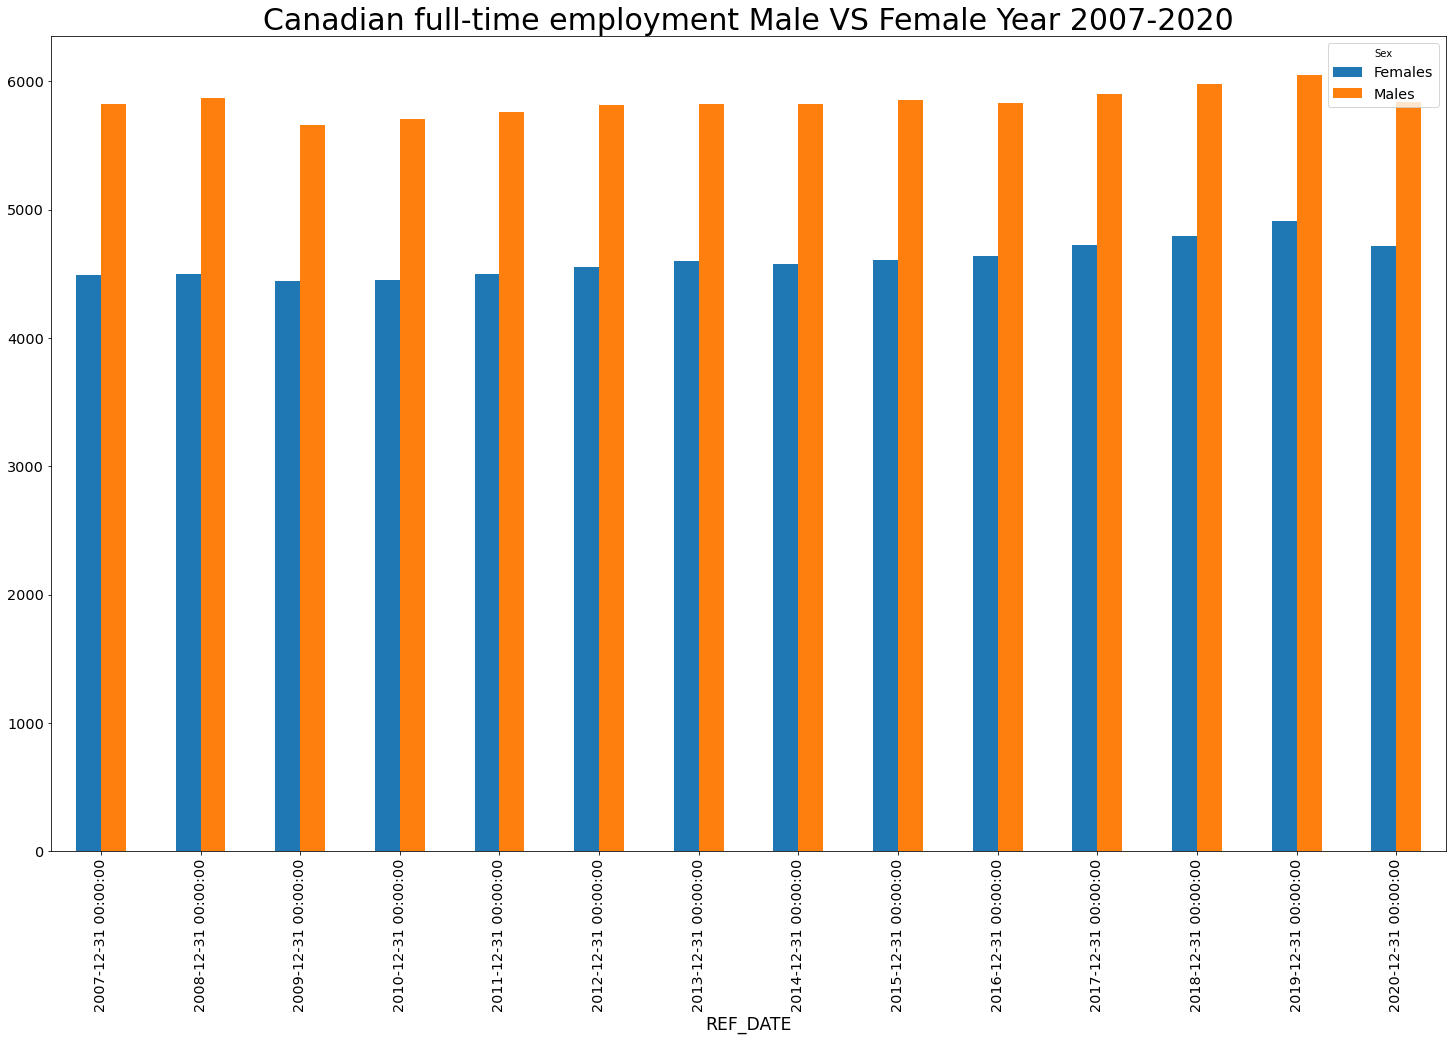

In [126]:
pd.crosstab(index= CanadaMaleVSFemaleFull['REF_DATE'],
            columns= CanadaMaleVSFemaleFull['Sex'],
            values= CanadaMaleVSFemaleFull['VALUE'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(25,15))
plt.title('Canadian full-time employment Male VS Female Year 2007-2020', fontsize=30);

In [127]:
CanadaBothUnemployment2020 = merge[(merge['Statistics'] == 'Estimate')
                & (merge['REF_DATE'].str.contains('2020'))
                & (merge['GEO'] == 'Canada')
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Males') | (merge['Sex'] == 'Females'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaBothUnemployment2020 = CanadaBothUnemployment2020[CanadaBothUnemployment2020['Labour force characteristics'] == 'Unemployment']

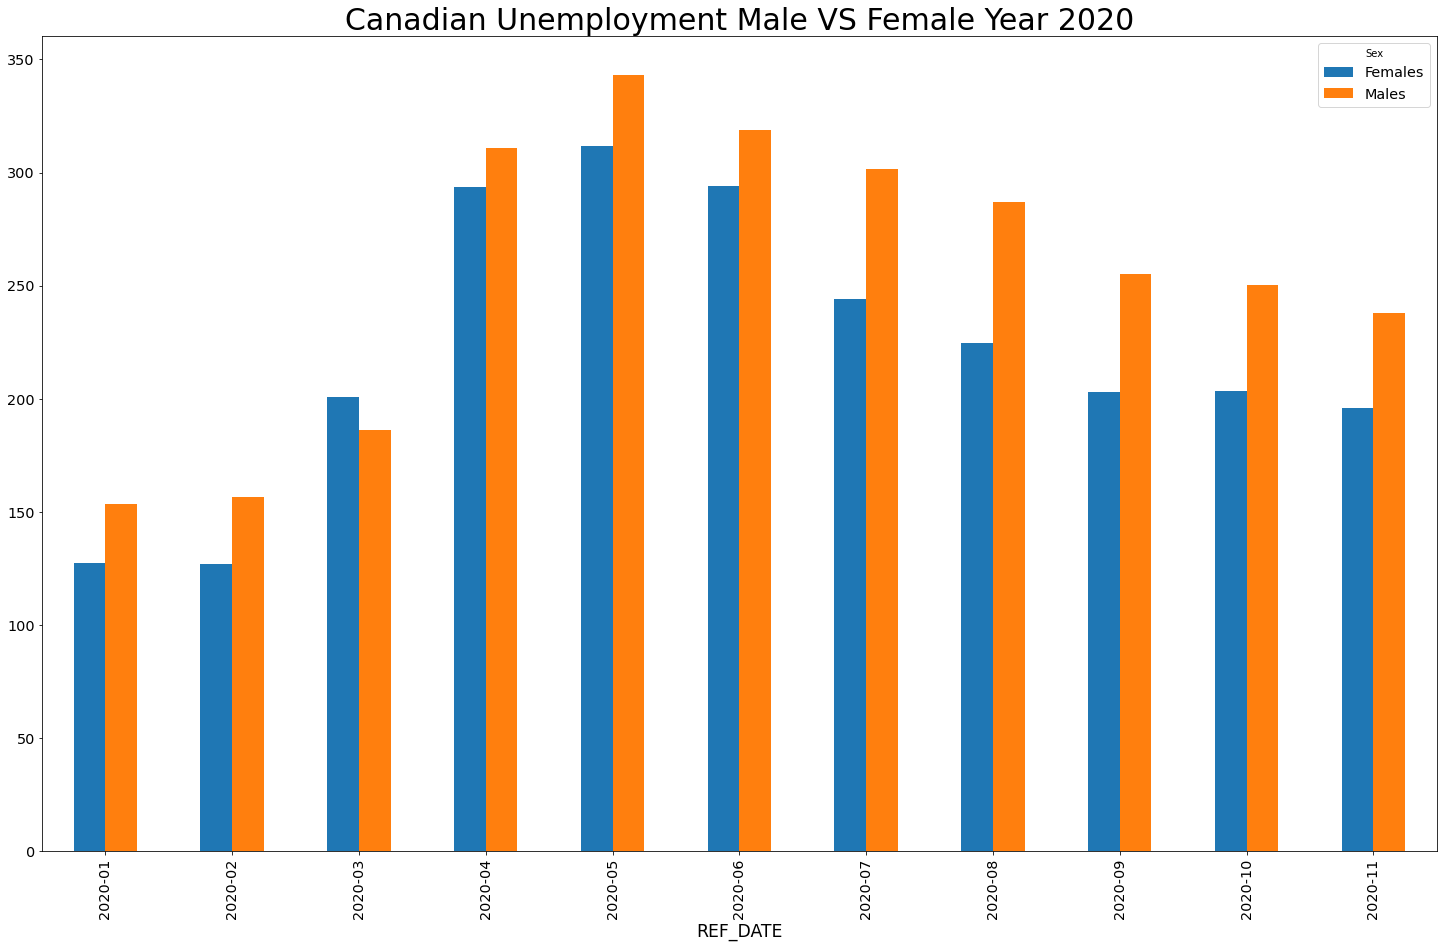

In [128]:
pd.crosstab(index= CanadaBothUnemployment2020['REF_DATE'],
            columns= CanadaBothUnemployment2020['Sex'],
            values= CanadaBothUnemployment2020['VALUE'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(25,15))
plt.title('Canadian Unemployment Male VS Female Year 2020', fontsize=30);

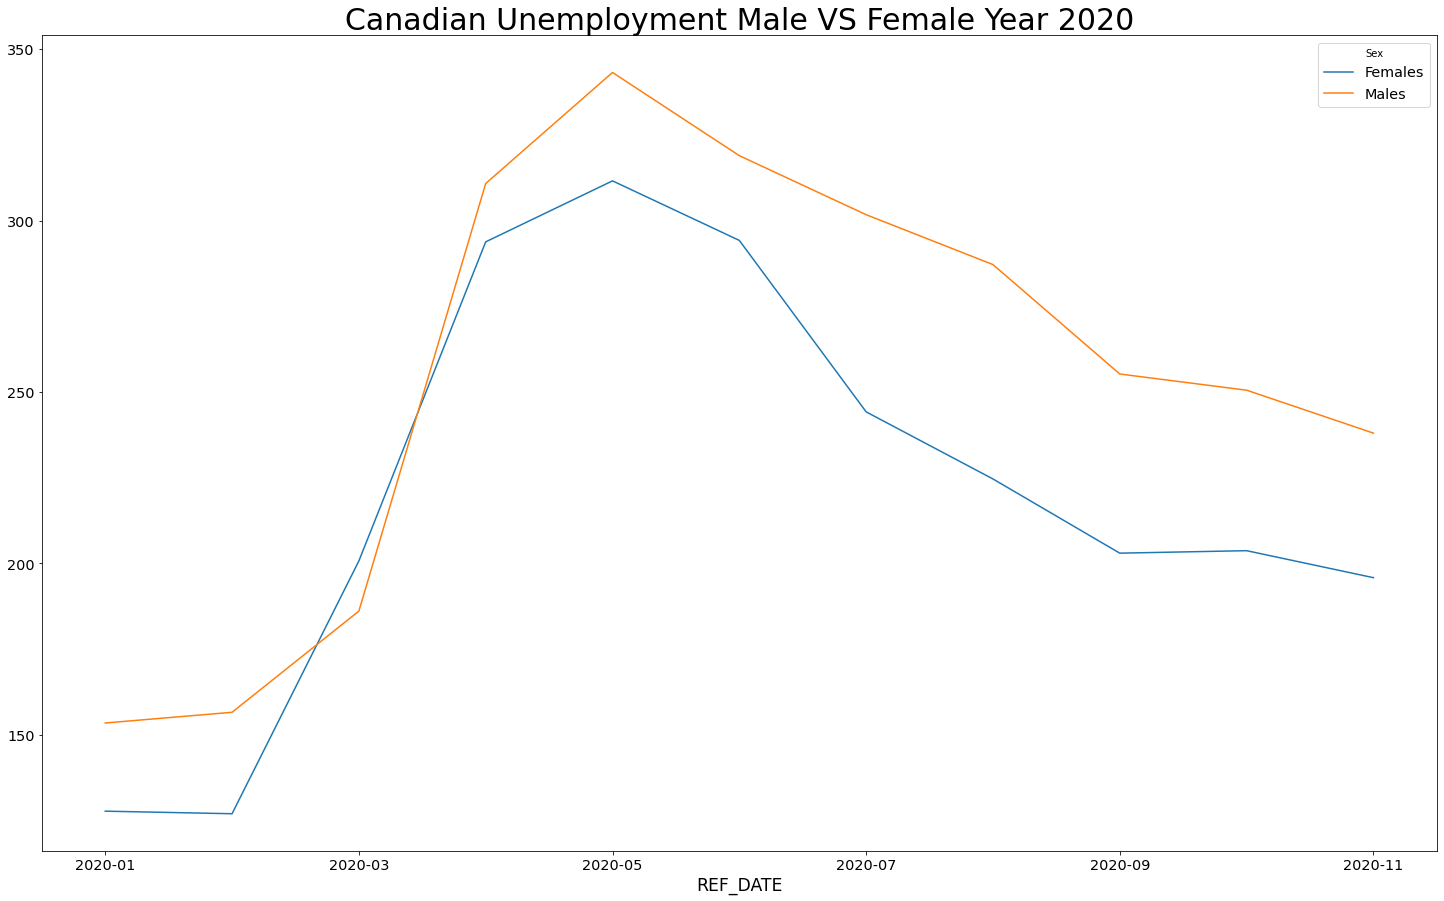

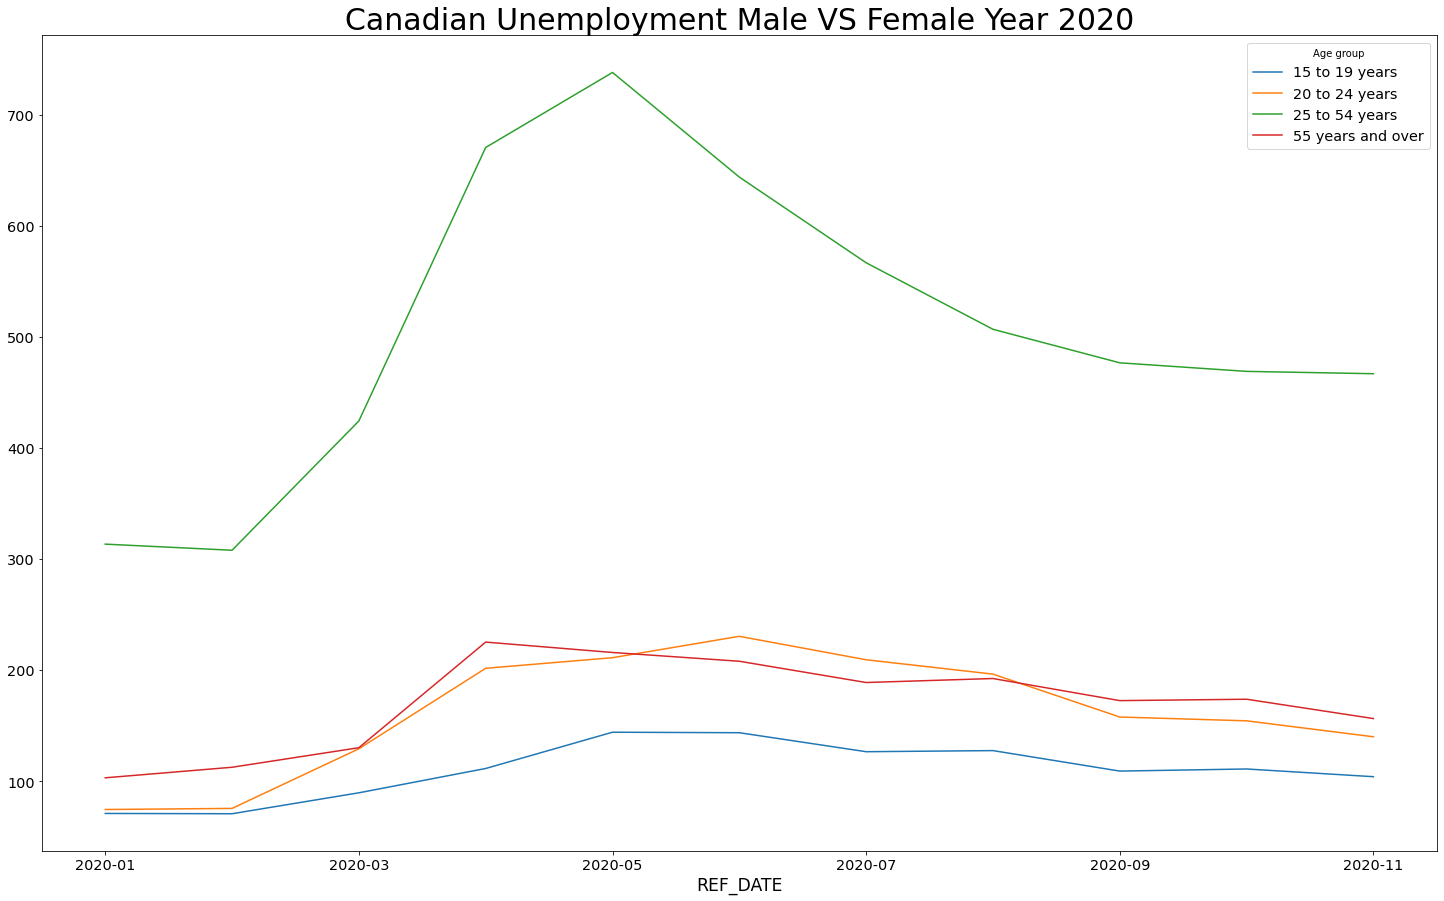

In [129]:
pd.crosstab(index= CanadaBothUnemployment2020['REF_DATE'],
            columns= CanadaBothUnemployment2020['Sex'],
            values= CanadaBothUnemployment2020['VALUE'], 
            aggfunc = 'mean').plot(figsize=(25,15))
plt.title('Canadian Unemployment Male VS Female Year 2020', fontsize=30);

pd.crosstab(index= CanadaBothUnemployment2020['REF_DATE'],
            columns= CanadaBothUnemployment2020['Age group'],
            values= CanadaBothUnemployment2020['VALUE'], 
            aggfunc = 'mean').plot(figsize=(25,15))
plt.title('Canadian Unemployment Male VS Female Year 2020', fontsize=30);

In [130]:
CanadaMaleVSFemaleParticipation = merge[(merge['Statistics'] == 'Estimate')
                & (merge['GEO'] == 'Canada')
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Males') | (merge['Sex'] == 'Females'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaMaleVSFemaleParticipation = CanadaMaleVSFemaleParticipation[CanadaMaleVSFemaleParticipation['Labour force characteristics'] == 'Participation rate']

In [131]:
ProvinceBothParticipation = merge[(merge['Statistics'] == 'Estimate')
                & ~(merge['GEO'] == 'Canada')
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Both sexes'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothParticipation = ProvinceBothParticipation[ProvinceBothParticipation['Labour force characteristics'] == 'Participation rate']

In [132]:
CanadaBothParticipation = merge[(merge['Statistics'] == 'Estimate')
                & (merge['GEO'] == 'Canada')
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Both sexes'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
CanadaBothParticipation = CanadaBothParticipation[CanadaBothParticipation['Labour force characteristics'] == 'Participation rate']

In [133]:
ProvinceBothParticipation['REF_DATE']=pd.to_datetime(ProvinceBothParticipation['REF_DATE'])
ProvinceBothParticipation.set_index('REF_DATE', inplace=True)
ProvinceBothParticipation = ProvinceBothParticipation.groupby(['GEO', 'Age group'])[['VALUE']].resample('Y').mean()
ProvinceBothParticipation.reset_index(inplace=True)

In [134]:
CanadaBothParticipation['REF_DATE']=pd.to_datetime(CanadaBothParticipation['REF_DATE'])
CanadaBothParticipation.set_index('REF_DATE', inplace=True)
CanadaBothParticipation = CanadaBothParticipation.groupby(['GEO', 'Age group'])[['VALUE']].resample('Y').mean()
CanadaBothParticipation.reset_index(inplace=True)

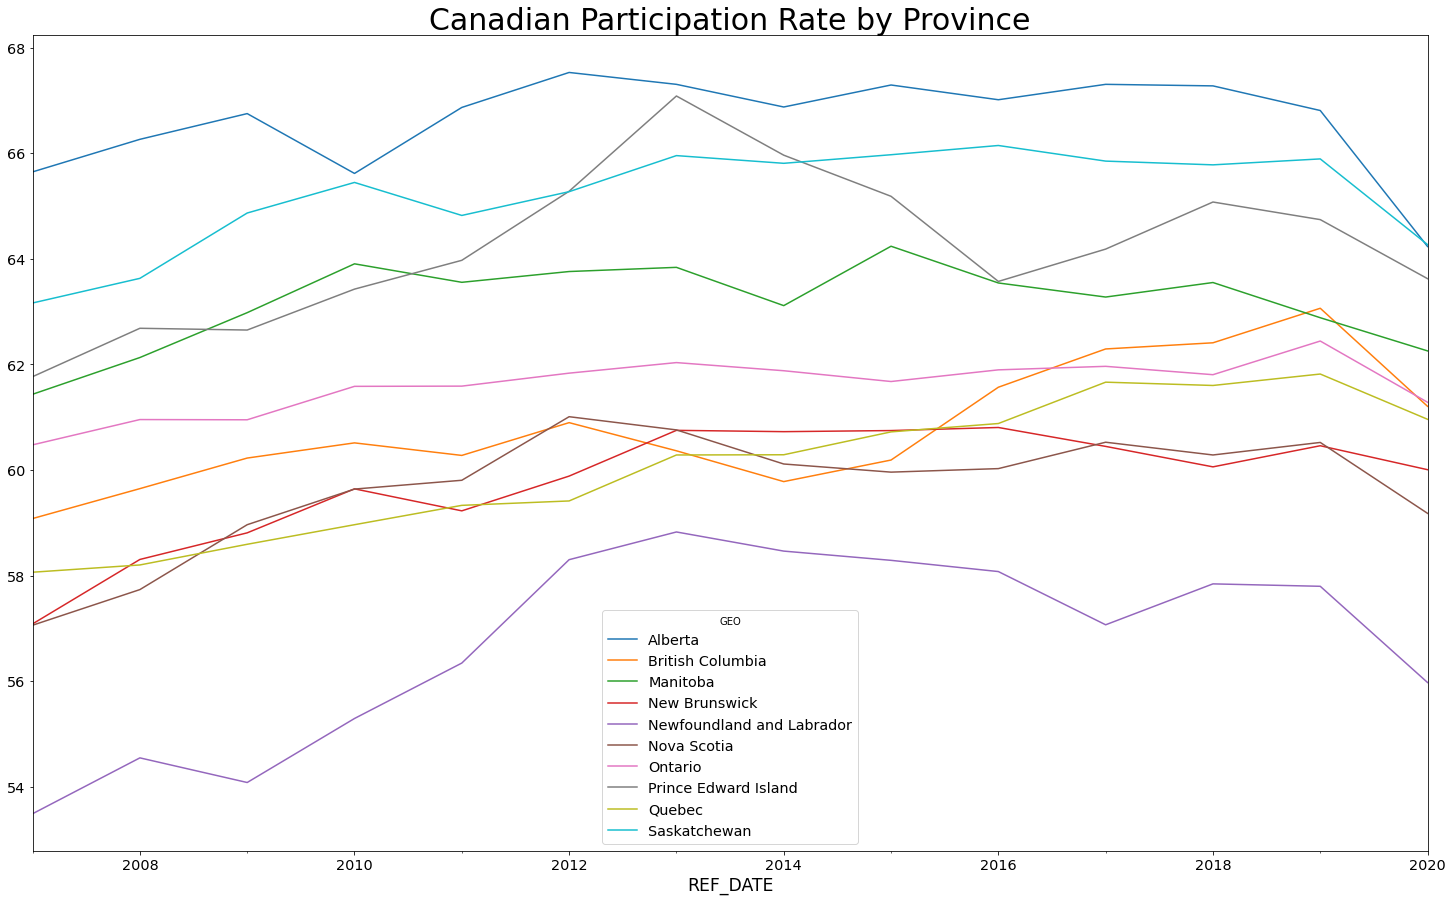

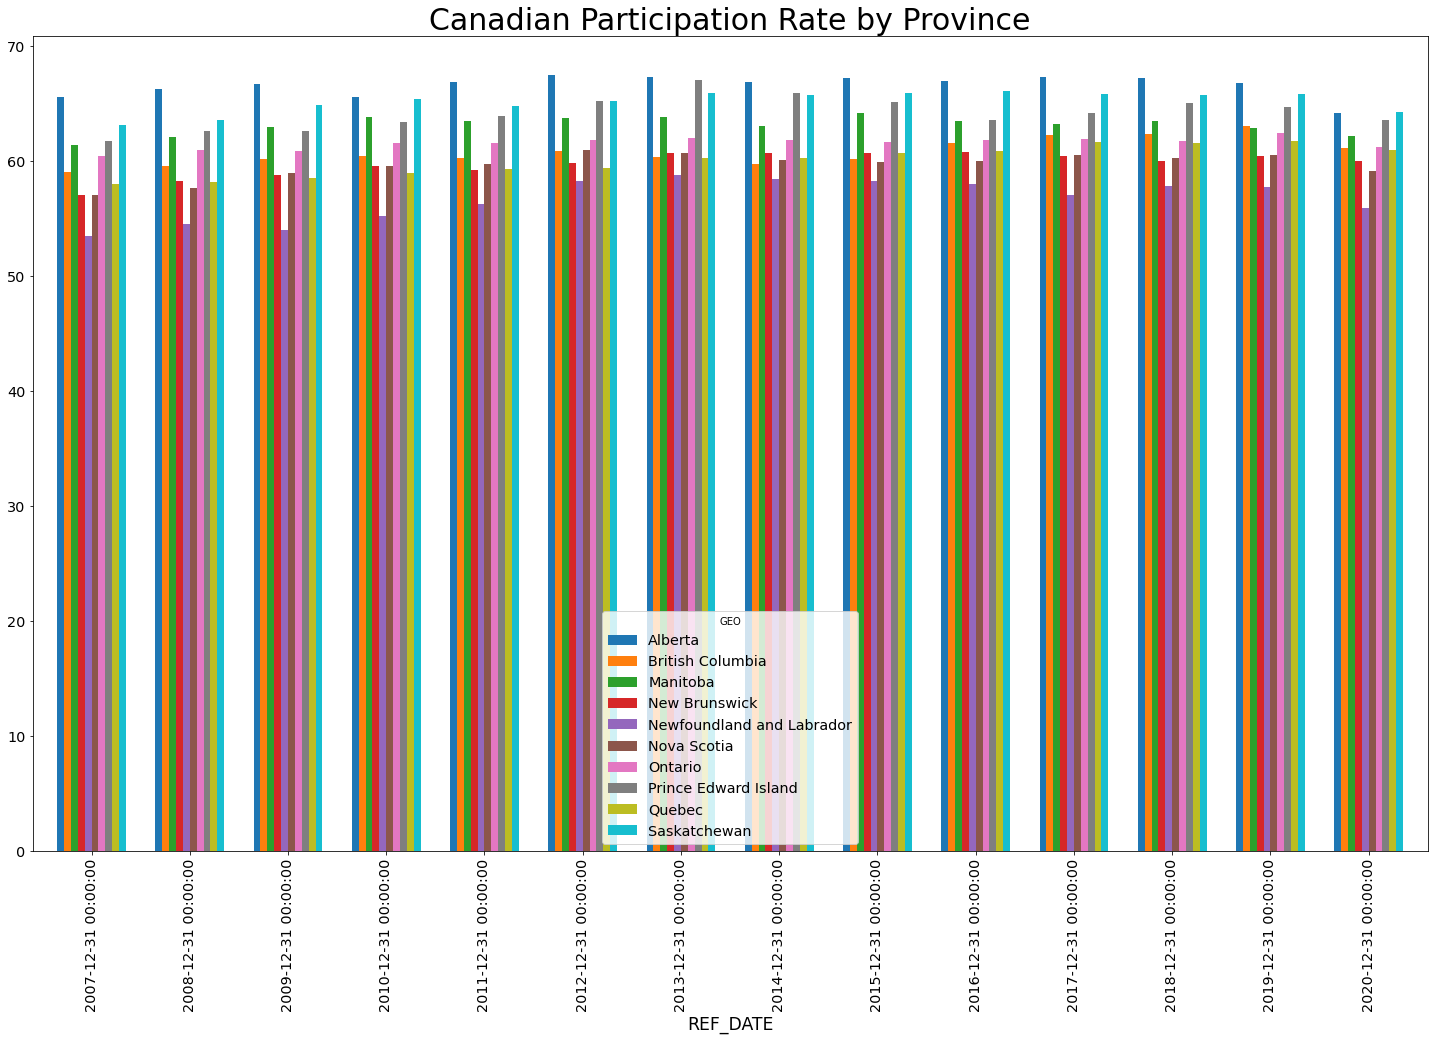

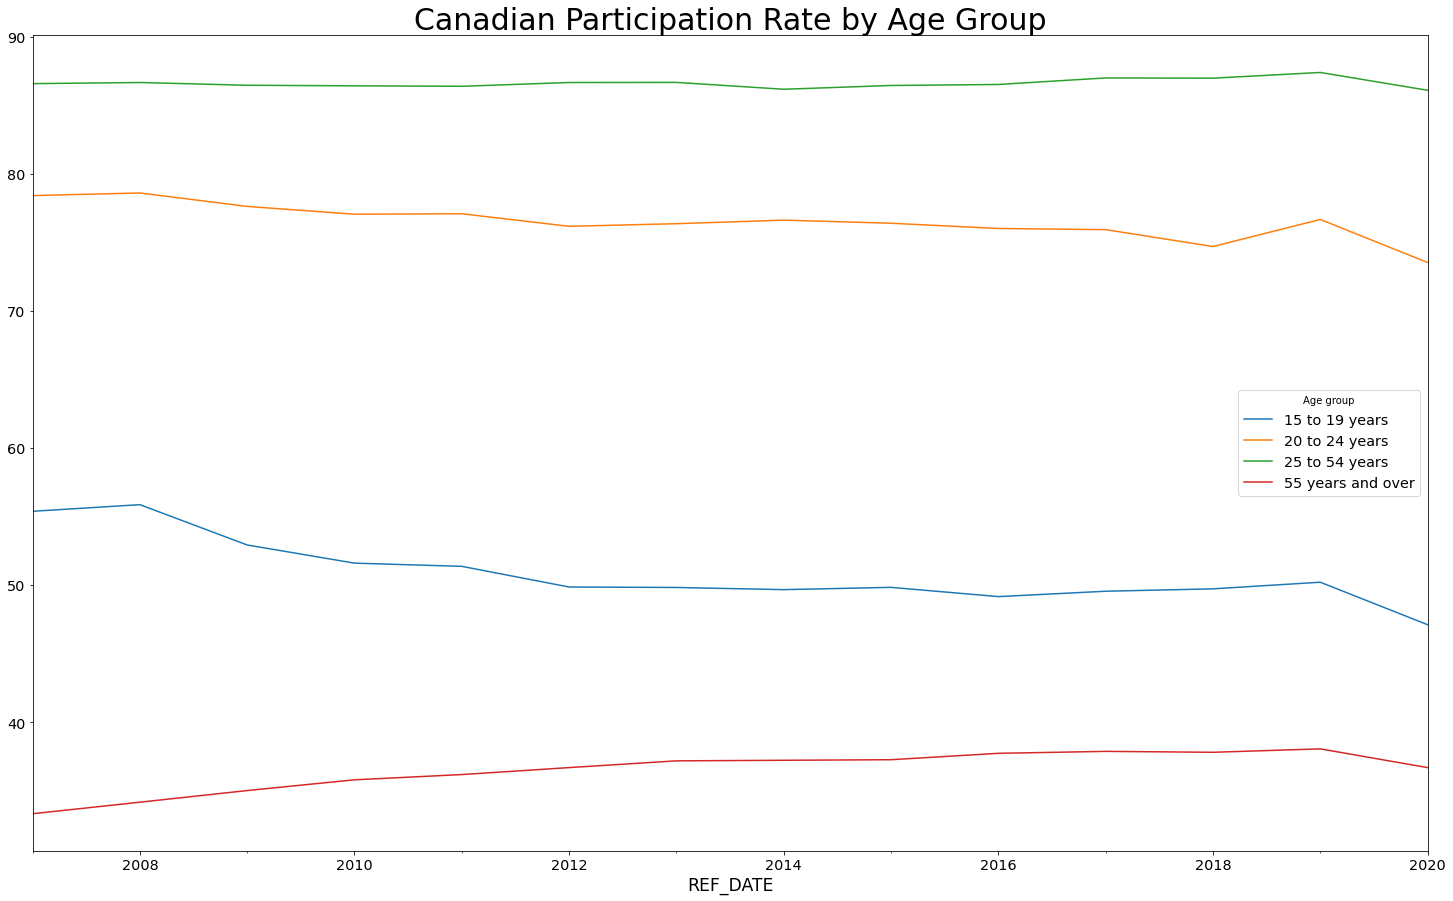

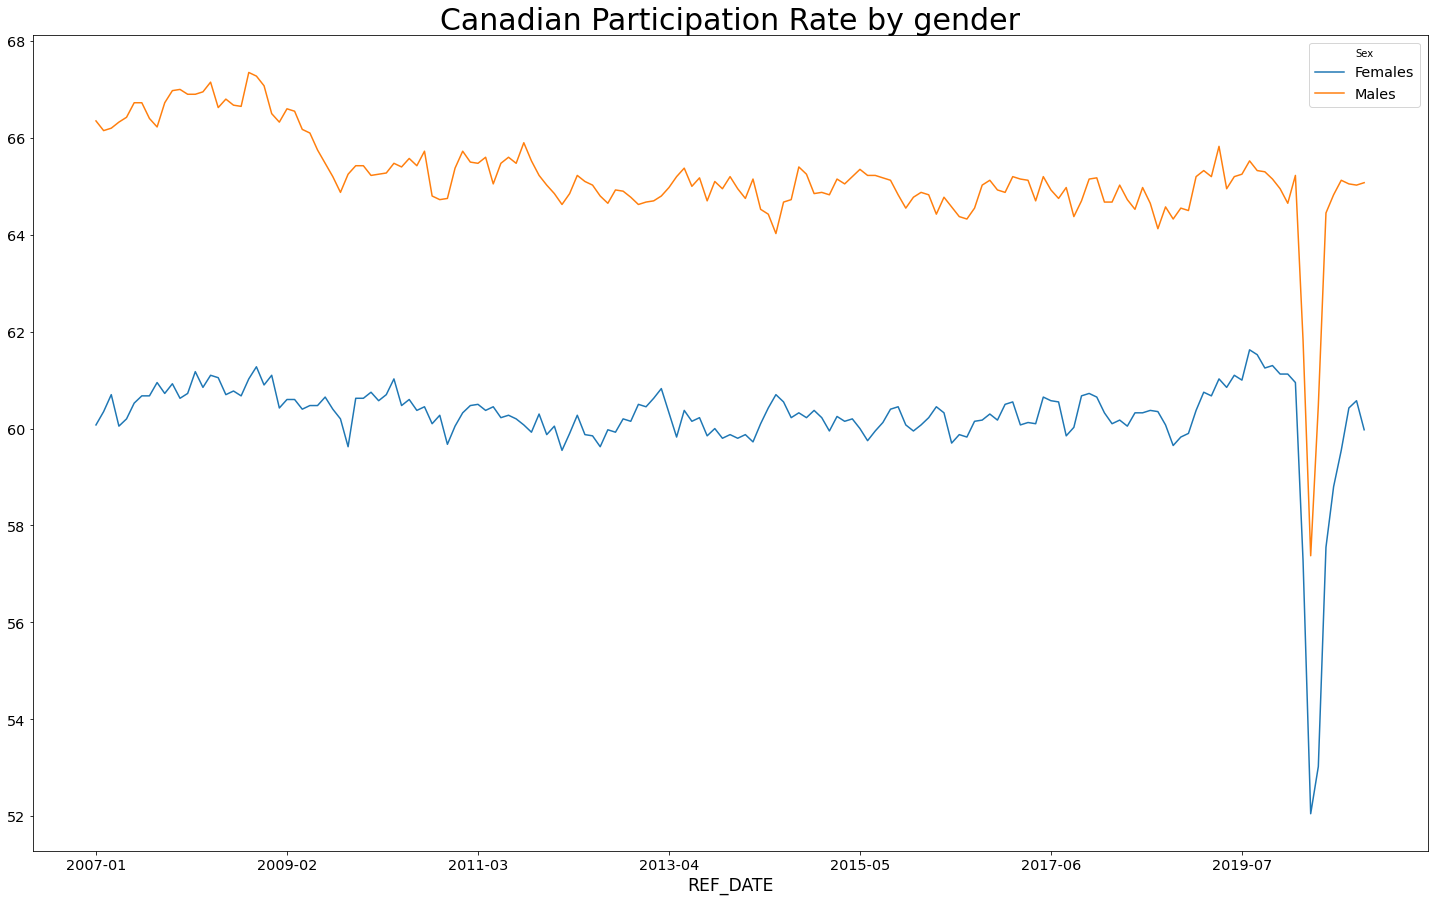

In [138]:
pd.crosstab(index= ProvinceBothParticipation['REF_DATE'],
            columns= ProvinceBothParticipation['GEO'],
            values= ProvinceBothParticipation['VALUE'], 
            aggfunc = 'mean').plot(figsize=(25,15))
plt.title('Canadian Participation Rate by Province', fontsize=30);

pd.crosstab(index= ProvinceBothParticipation['REF_DATE'],
            columns= ProvinceBothParticipation['GEO'],
            values= ProvinceBothParticipation['VALUE'], 
            aggfunc = 'mean').plot(kind='bar', figsize=(25,15), width=0.7)
plt.title('Canadian Participation Rate by Province', fontsize=30);


pd.crosstab(index= CanadaBothParticipation['REF_DATE'],
            columns= CanadaBothParticipation['Age group'],
            values= CanadaBothParticipation['VALUE'], 
            aggfunc = 'mean').plot(figsize=(25,15))
plt.title('Canadian Participation Rate by Age Group', fontsize=30);

pd.crosstab(index= CanadaMaleVSFemaleParticipation['REF_DATE'],
            columns= CanadaMaleVSFemaleParticipation['Sex'],
            values= CanadaMaleVSFemaleParticipation['VALUE'], 
            aggfunc = 'mean').plot(figsize=(25,15))
plt.title('Canadian Participation Rate by gender', fontsize=30);

In [139]:
ProvinceBothParticipation = merge[(merge['Statistics'] == 'Estimate')
                & ~(merge['REF_DATE'].str.contains('2007'))
                & ~(merge['GEO'] == 'Canada')
               & (merge['Data type'] == 'Seasonally adjusted') 
               & ((merge['Sex'] == 'Females') | (merge['Sex'] == 'Males'))
               & ((merge['Age group'] == '15 to 19 years') 
                        | (merge['Age group'] == '20 to 24 years') 
                        | (merge['Age group'] == '25 to 54 years') 
                        | (merge['Age group'] == '55 years and over'))]
ProvinceBothParticipation = ProvinceBothParticipation[ProvinceBothParticipation['Labour force characteristics'] == 'Participation rate']

In [140]:
ProvinceBothParticipation['REF_DATE']=pd.to_datetime(ProvinceBothParticipation['REF_DATE'])
ProvinceBothParticipation.set_index('REF_DATE', inplace=True)
ProvinceBothParticipation = ProvinceBothParticipation.groupby(['GEO', 'Sex'])[['VALUE']].resample('2Y').mean()
ProvinceBothParticipation.reset_index(inplace=True)

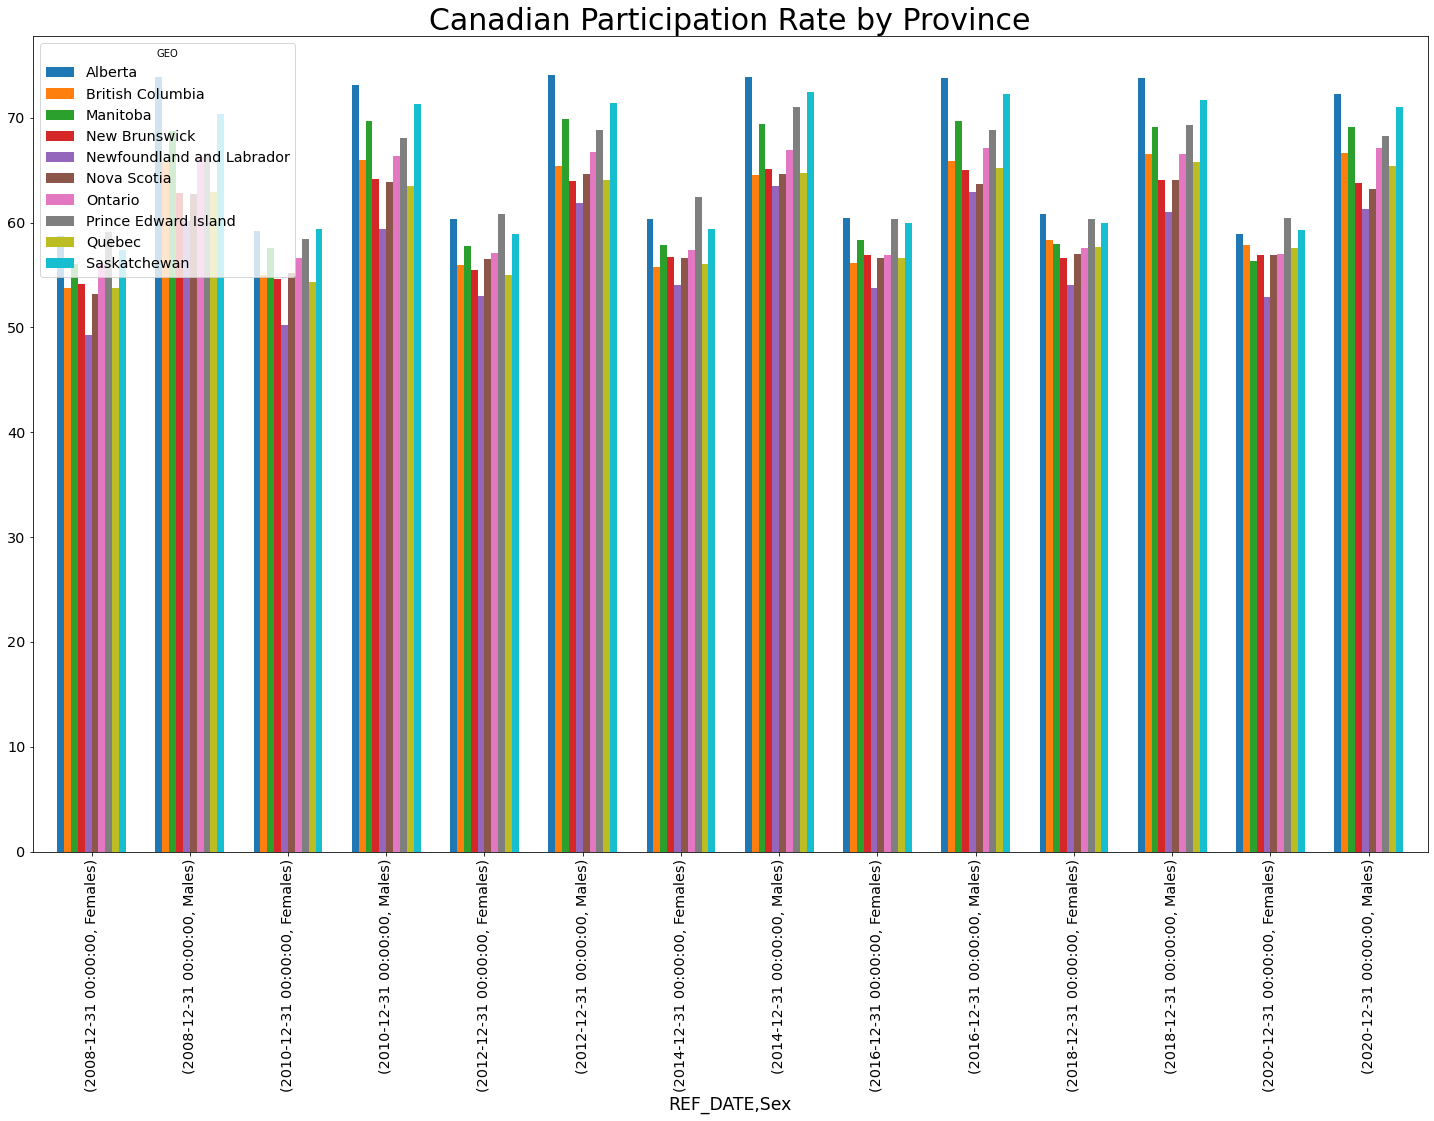

In [142]:
pd.crosstab(index= [ProvinceBothParticipation['REF_DATE'], ProvinceBothParticipation['Sex']],
            columns= ProvinceBothParticipation['GEO'],
            values= ProvinceBothParticipation['VALUE'], 
            aggfunc = 'mean').plot(kind='bar',figsize=(25,15), width=0.7)
plt.title('Canadian Participation Rate by Province', fontsize=30);

# Ontario Covid Analysis

In [143]:
urlLink = 'https://raw.githubusercontent.com/fabverto/DATA-SCIENCE-1-Foundations-of-Data-Science/main/conposcovidloc%20(1).csv'
covidOntario = pd.read_csv(urlLink, index_col='Row_ID', error_bad_lines=False)

In [144]:
covidOntario = covidOntario[covidOntario['Age_Group'].notna()]

In [146]:
covidOntario = covidOntario[~(covidOntario['Age_Group'] == 'UNKNOWN') 
                            & ~(covidOntario['Client_Gender'] == 'UNSPECIFIED')
                            & ~(covidOntario['Case_AcquisitionInfo'] == 'Missing Information')]
print(covidOntario['Age_Group'].unique())
print(covidOntario['Client_Gender'].unique())
print(covidOntario['Case_AcquisitionInfo'].unique())
print(covidOntario['Outcome1'].unique())

['50s' '30s' '40s' '<20' '20s' '60s' '90s' '70s' '80s']
['MALE' 'FEMALE' 'GENDER DIVERSE']
['OB' 'CC' 'No known epi link' 'Unspecified epi link' 'Travel']
['Resolved' 'Not Resolved' 'Fatal']


In [148]:
copy = covidOntario.copy()

In [149]:
#reset
covidOntario = copy

In [150]:
covidOntario['Case_Reported_Date']=pd.to_datetime(covidOntario['Case_Reported_Date'])

In [151]:
covidOntario.set_index('Case_Reported_Date', inplace=True)

In [152]:
covidOntario = covidOntario.groupby('Client_Gender')[['Accurate_Episode_Date']].resample('M').count()

In [ ]:
covidOntario

## Covid cases by gender

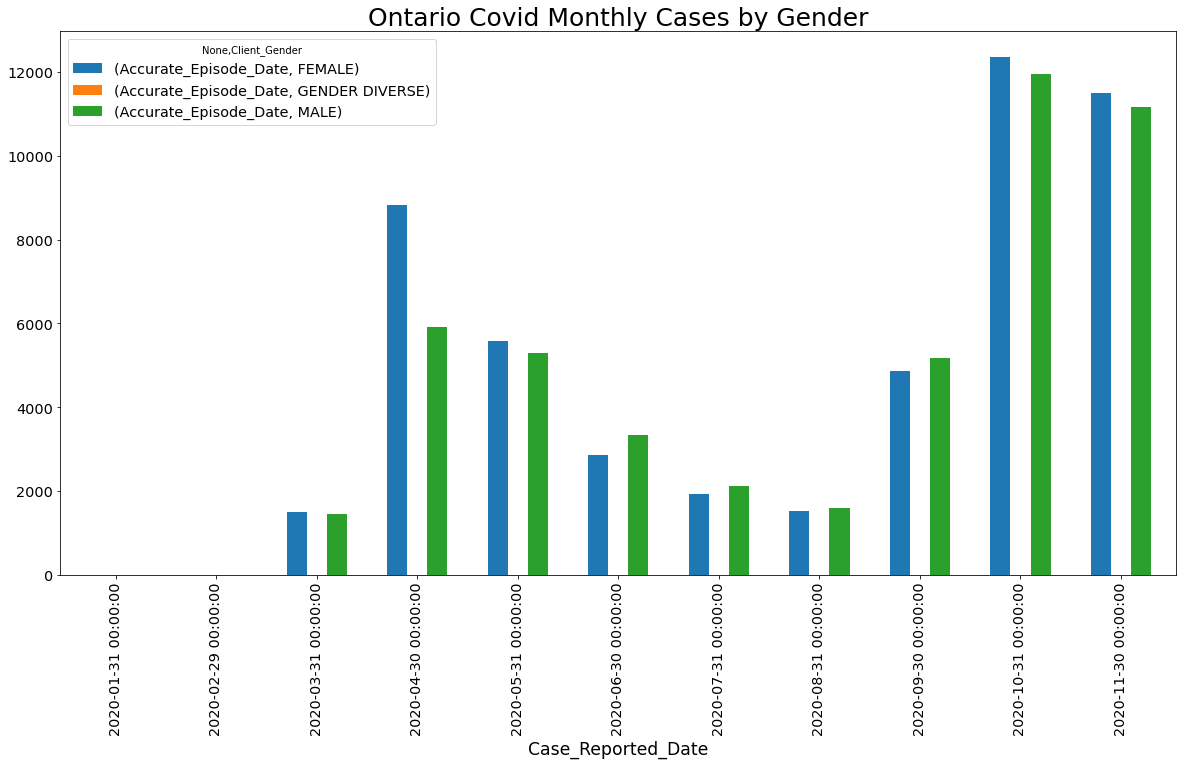

In [155]:
covidOntario.unstack(0).plot(kind='bar', figsize=(20,10), width=0.6);
plt.title('Ontario Covid Monthly Cases by Gender', fontsize=25);

In [156]:
#reset
covidOntario = copy

In [158]:
covidOntario = covidOntario.groupby('Age_Group')[['Accurate_Episode_Date']].resample('M').count()

## Covid cases by age group

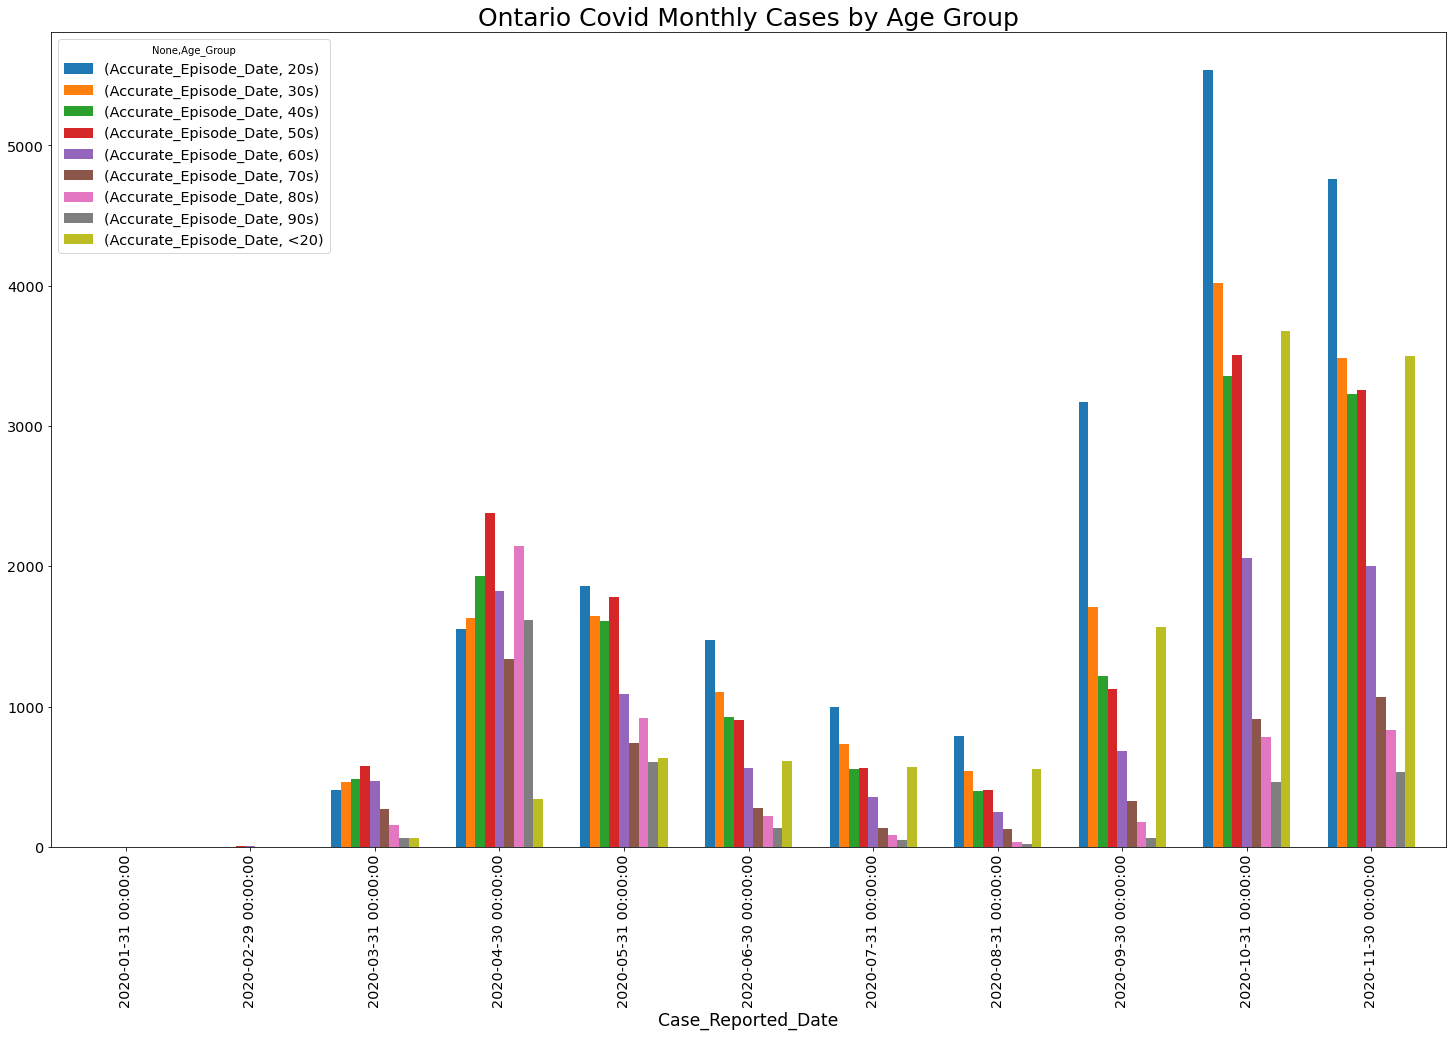

In [159]:
covidOntario.unstack(0).plot(kind='bar', figsize=(25,15), width=0.7);
plt.title('Ontario Covid Monthly Cases by Age Group', fontsize=25);

In [160]:
#reset
covidOntario = copy

In [161]:
covidOntario = covidOntario.groupby('Case_AcquisitionInfo')[['Accurate_Episode_Date']].resample('M').count()

## covid cases by type of acquisition

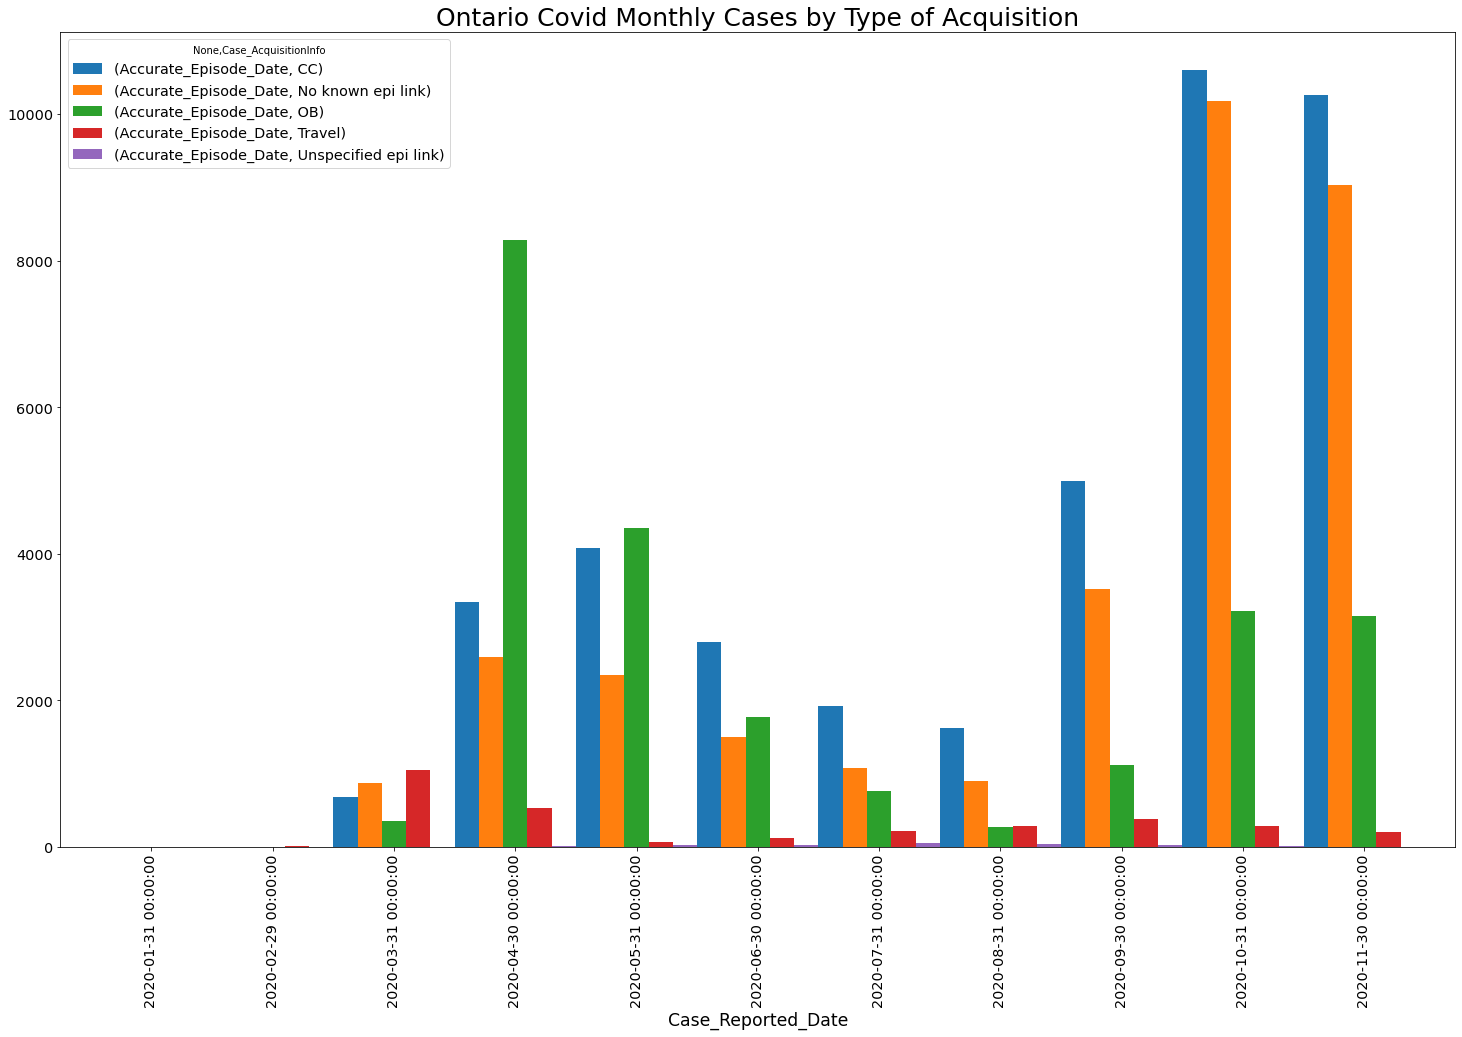

In [163]:
covidOntario.unstack(0).plot(kind='bar', figsize=(25,15), width=1);
plt.title('Ontario Covid Monthly Cases by Type of Acquisition', fontsize=25);

In [164]:
#reset
covidOntario = copy

In [166]:
covidOntario = covidOntario.groupby('Outcome1')[['Accurate_Episode_Date']].resample('M').count()

## Covid cases by outcome

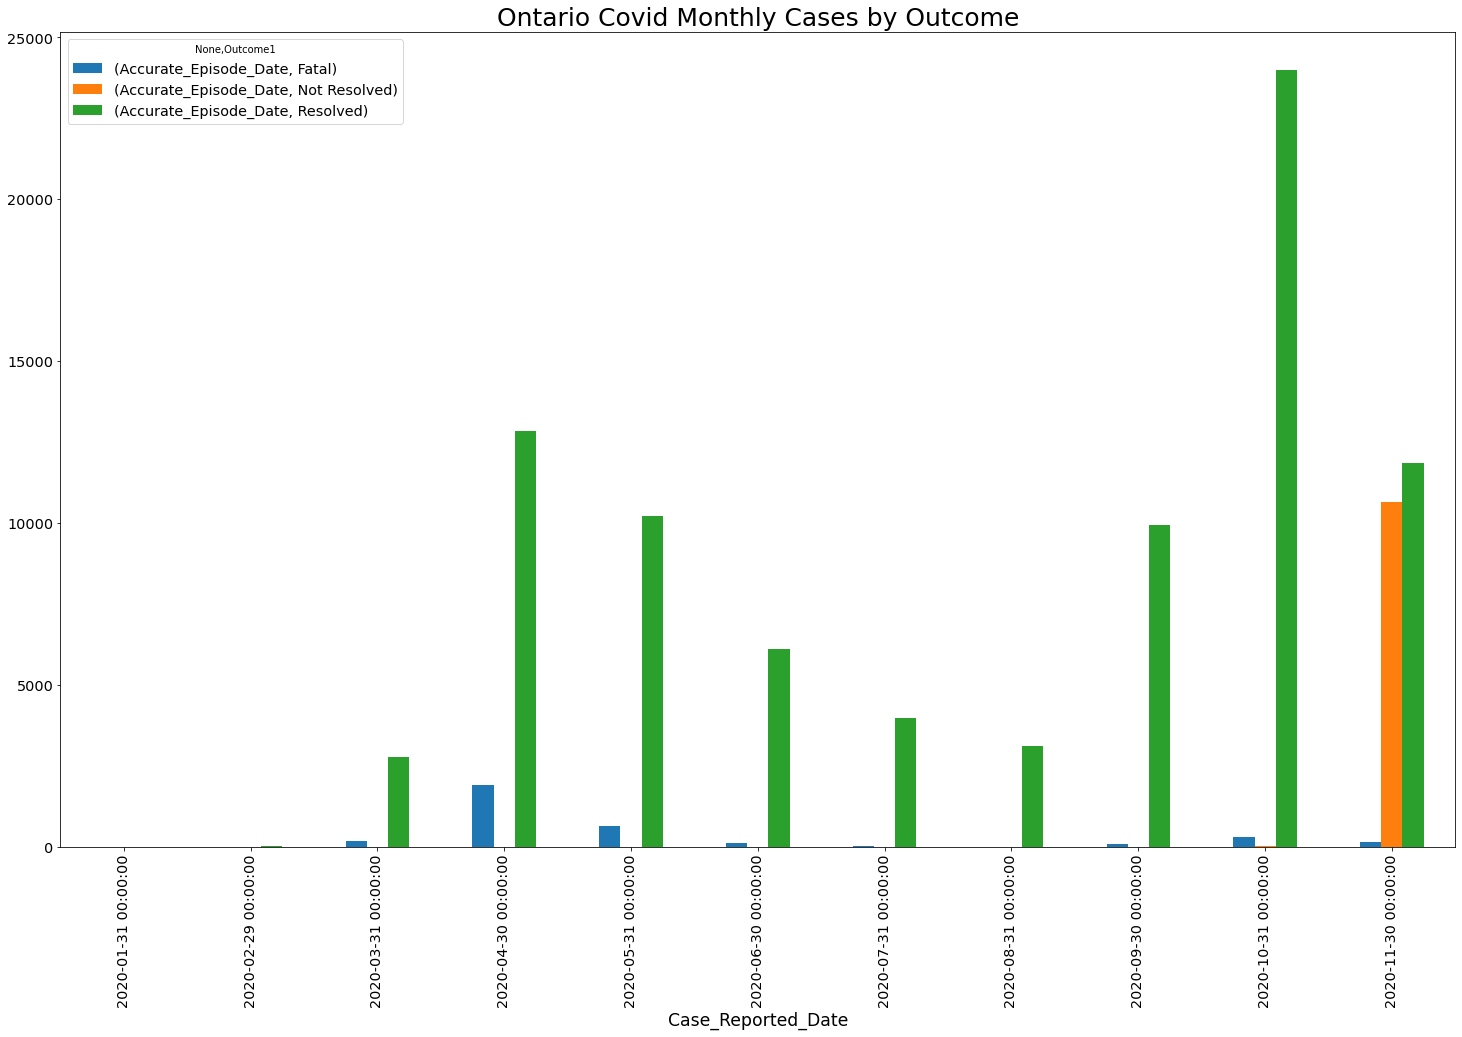

In [167]:
covidOntario.unstack(0).plot(kind='bar', figsize=(25,15));
plt.title('Ontario Covid Monthly Cases by Outcome', fontsize=25);

In [169]:
#reset
covidOntario = copy

In [170]:
fatal = covidOntario[covidOntario['Outcome1'] == 'Fatal']

In [171]:
fatal.head(5)

Accurate_Episode_Date  ... Reporting_PHU_Longitude
Case_Reported_Date                        ...                        
2020-11-10                    2020-11-08  ...               -79.70889
2020-11-07                    2020-10-30  ...               -79.68631
2020-10-17                    2020-10-16  ...               -74.73630
2020-11-01                    2020-10-23  ...               -79.24122
2020-10-29                    2020-10-27  ...               -79.48024

[5 rows x 15 columns]

In [172]:
fatal = fatal.groupby('Client_Gender')[['Accurate_Episode_Date']].resample('M').count()

## Covid fatal outcomes by gender

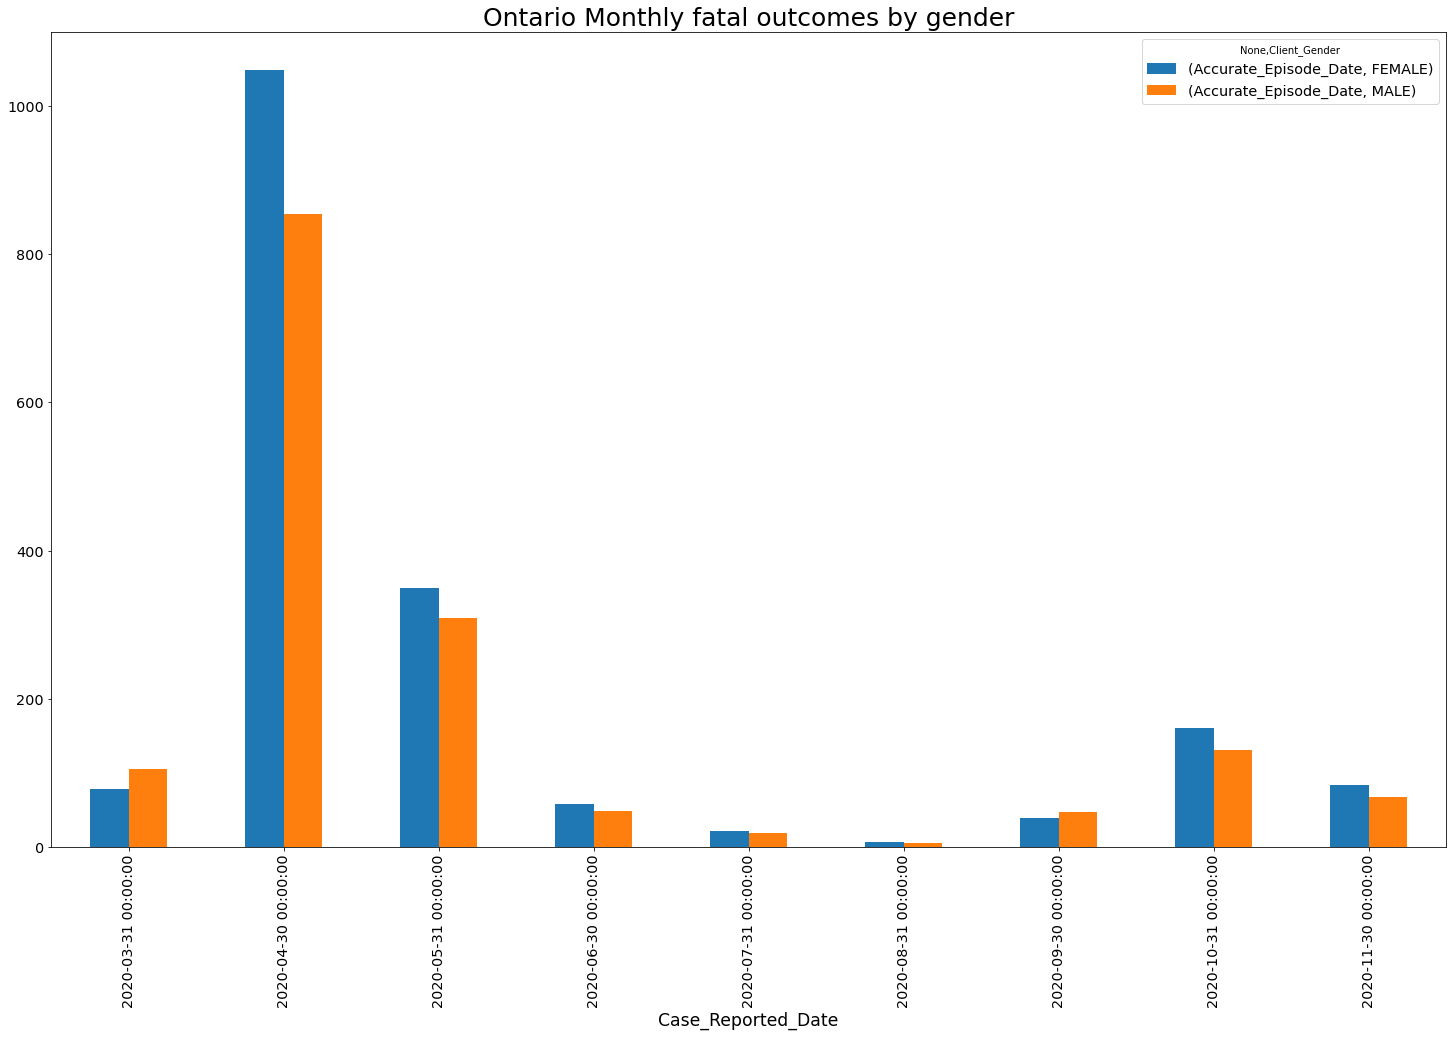

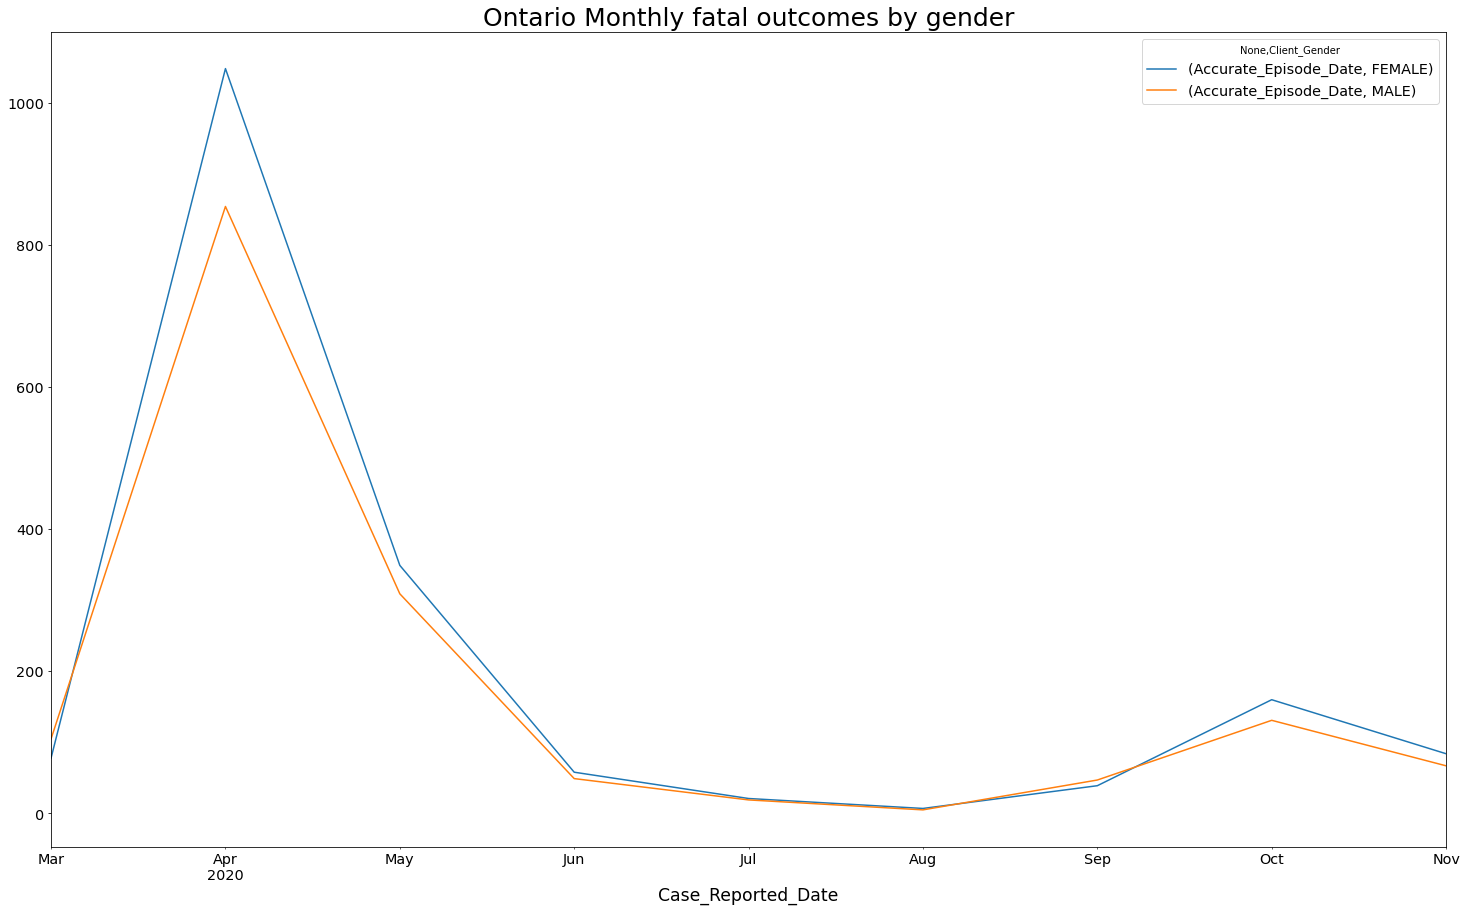

In [174]:
fatal.unstack(0).plot(kind='bar', figsize=(25,15));
plt.title('Ontario Monthly fatal outcomes by gender', fontsize=25);

fatal.unstack(0).plot(figsize=(25,15));
plt.title('Ontario Monthly fatal outcomes by gender', fontsize=25);

In [180]:
fatal = covidOntario[covidOntario['Outcome1'] == 'Fatal']

In [181]:
fatal = fatal.groupby(['Age_Group','Client_Gender'])[['Accurate_Episode_Date']].resample('M').count()

## Covid ftal cases by age group

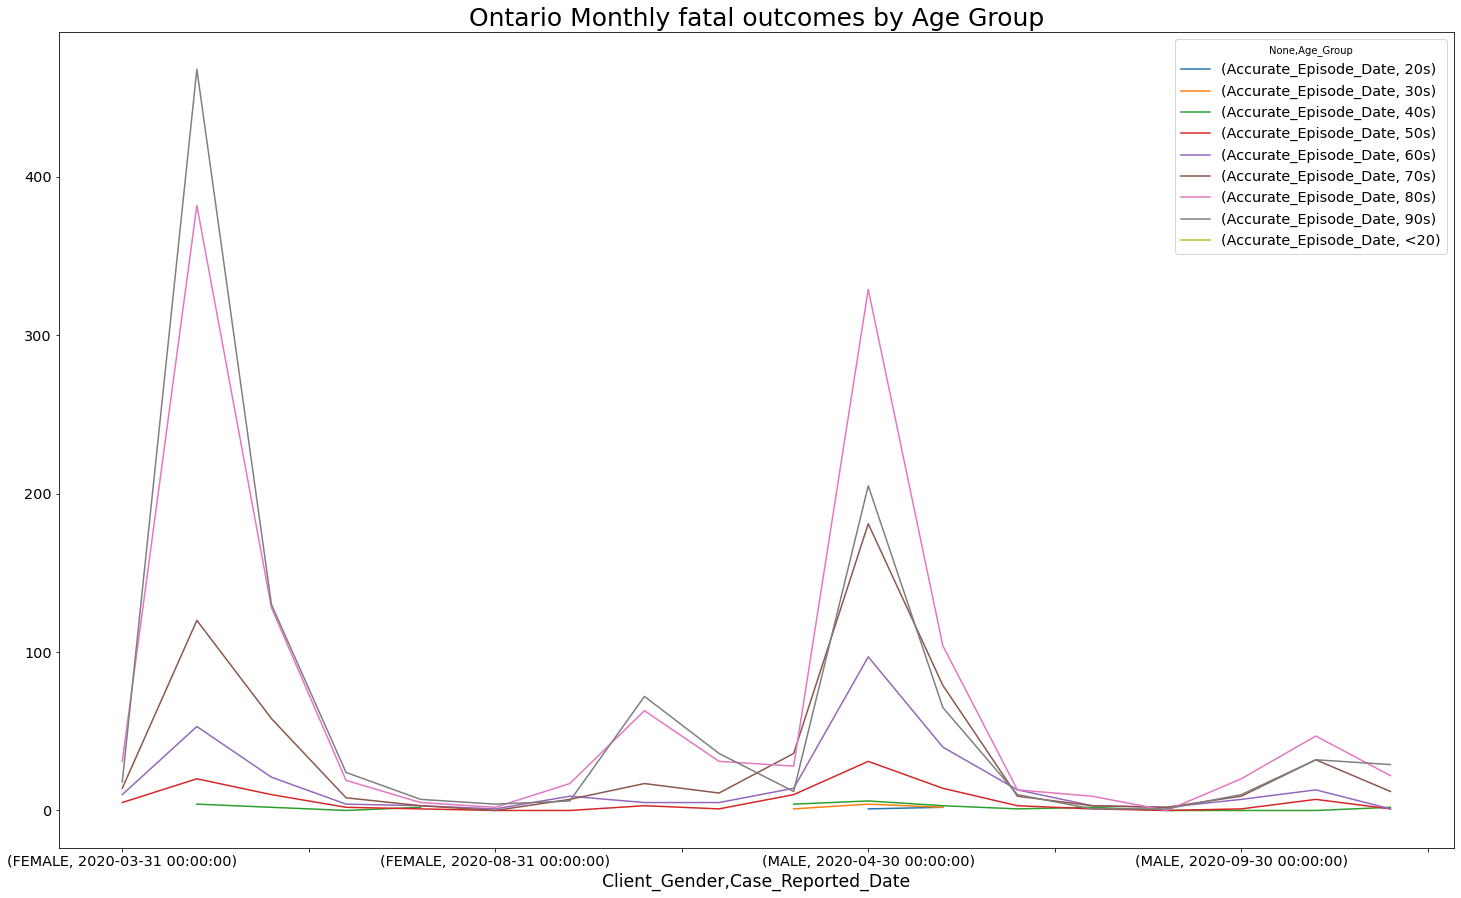

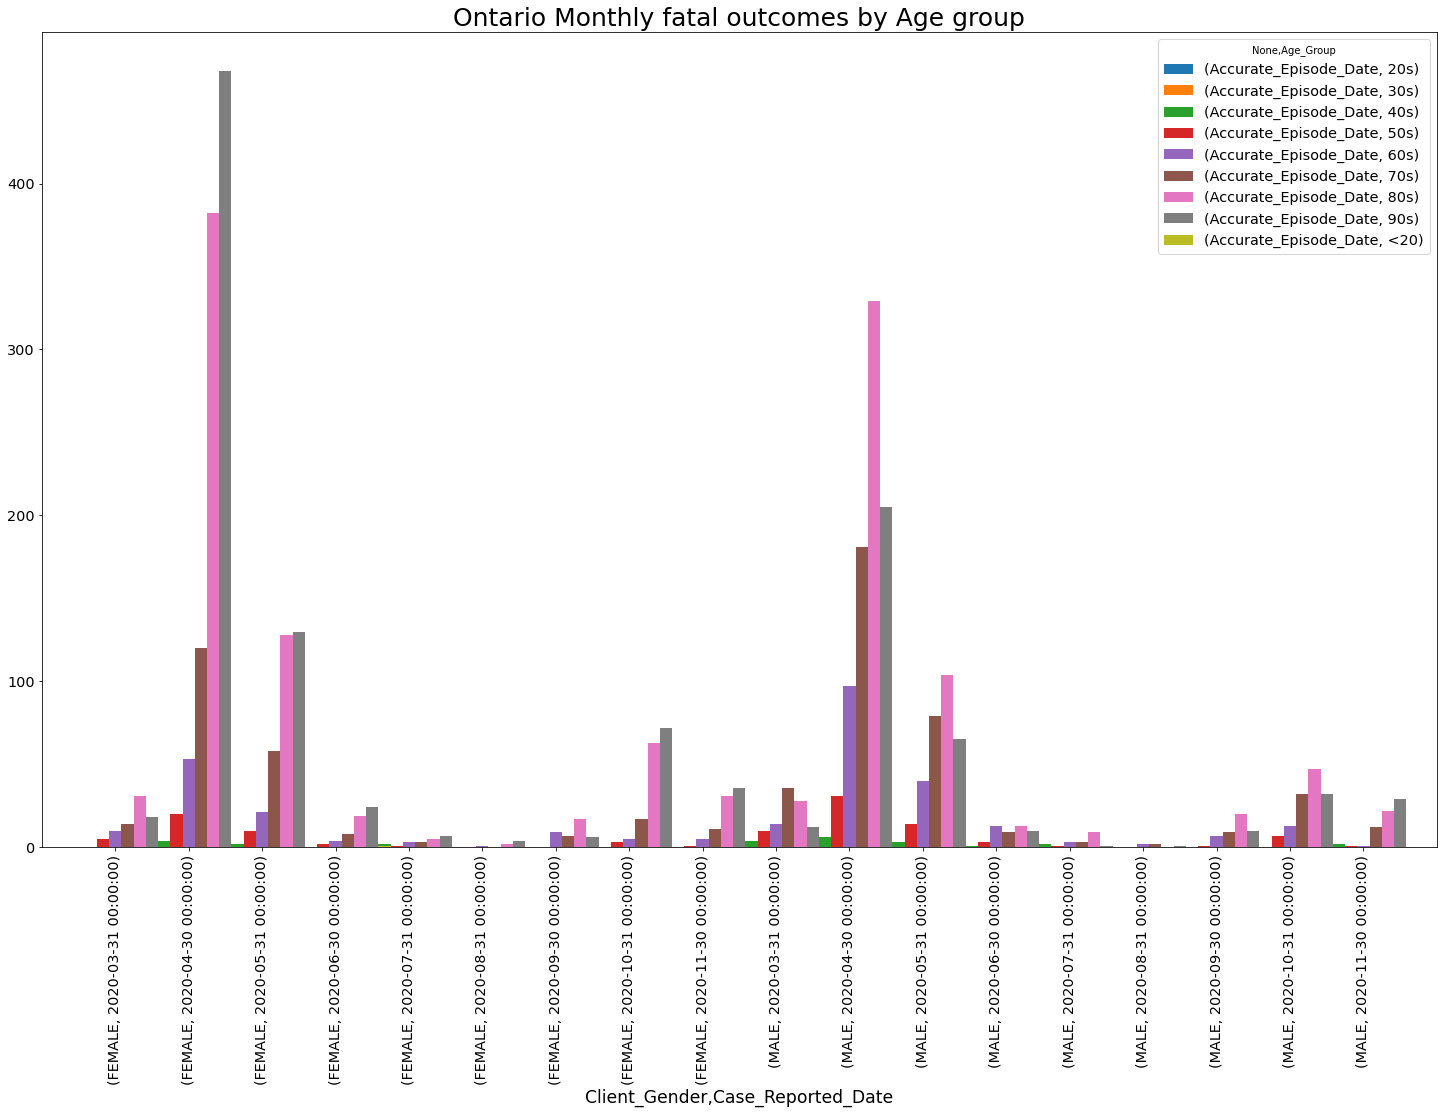

In [183]:
fatal.unstack(0).plot(figsize=(25,15));
plt.title('Ontario Monthly fatal outcomes by Age Group', fontsize=25);

fatal.unstack(0).plot(kind='bar', figsize=(25,15), width=1.5);
plt.title('Ontario Monthly fatal outcomes by Age group', fontsize=25);

In [184]:
fatal = covidOntario[covidOntario['Outcome1'] == 'Fatal']   

In [185]:
fatal = fatal.groupby(['Case_AcquisitionInfo', 'Client_Gender'])[['Accurate_Episode_Date']].resample('M').count()

## covid fatal outcomes by gender and type of acquisition

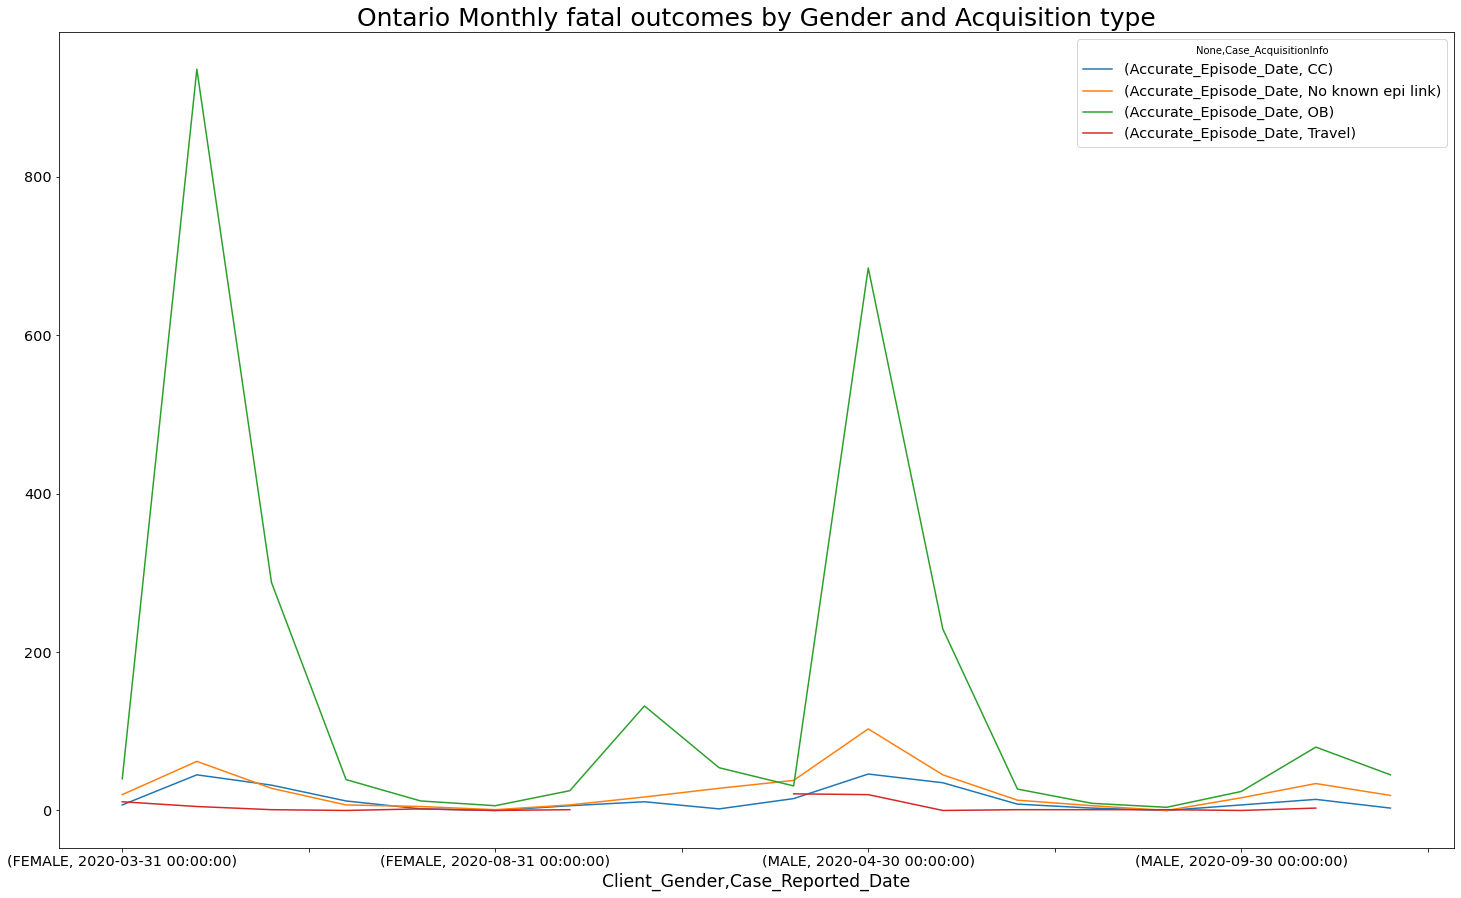

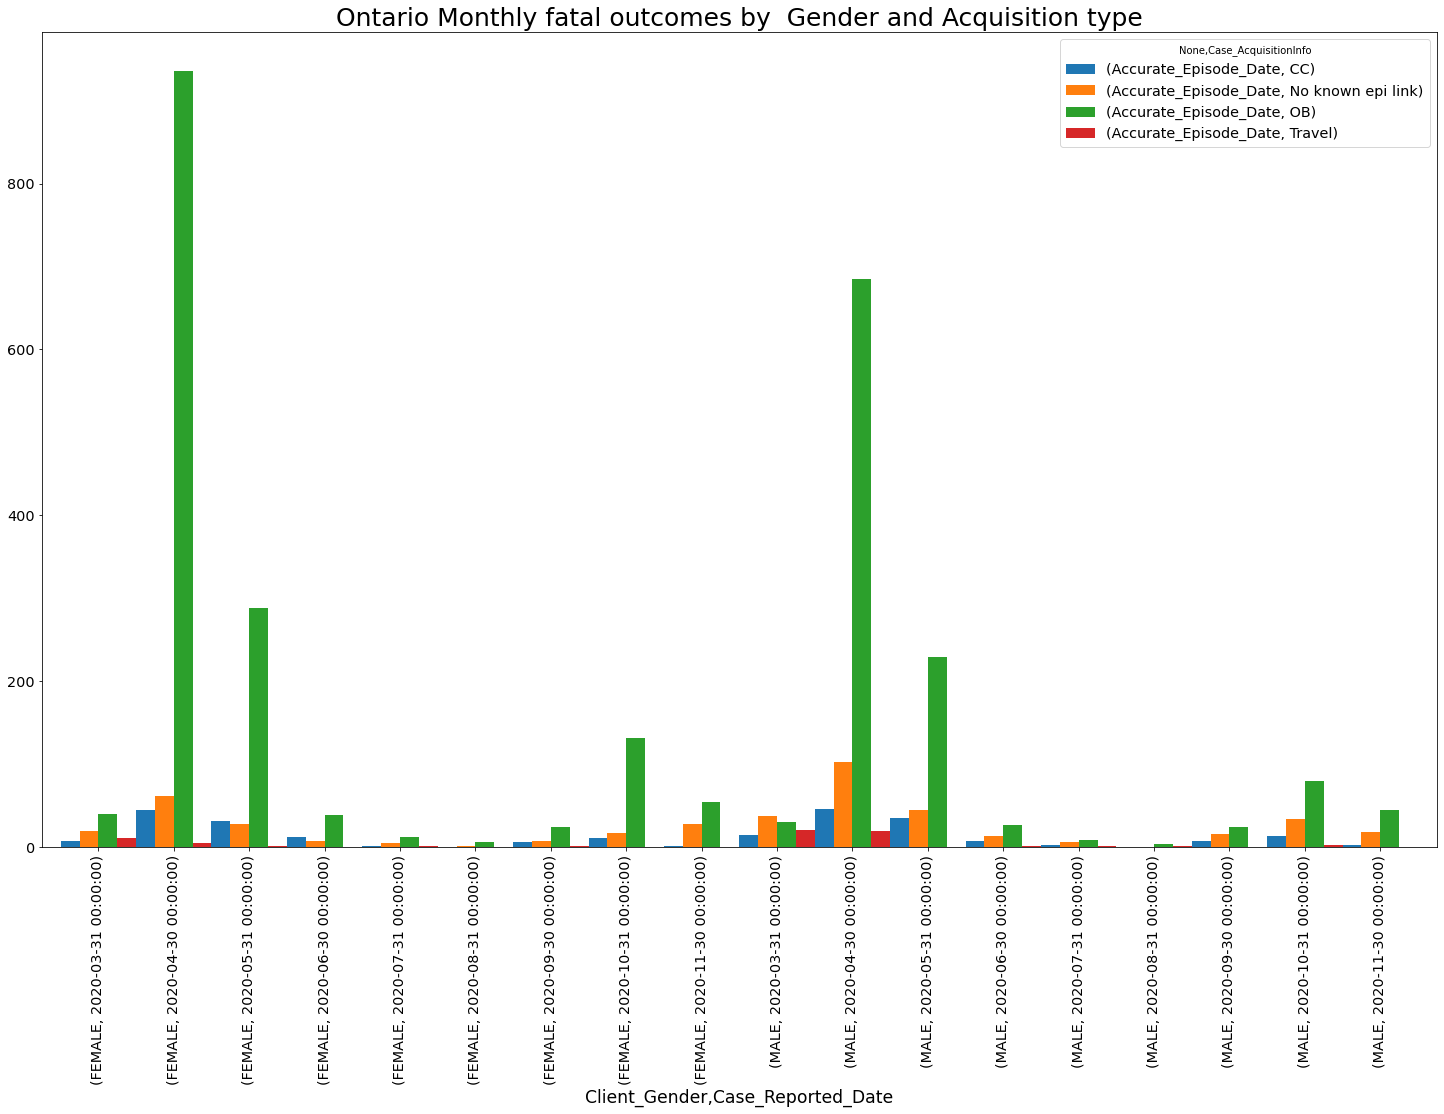

In [186]:
fatal.unstack(0).plot(figsize=(25,15));
plt.title('Ontario Monthly fatal outcomes by Gender and Acquisition type', fontsize=25);

fatal.unstack(0).plot(kind='bar', figsize=(25,15), width=1);
plt.title('Ontario Monthly fatal outcomes by  Gender and Acquisition type', fontsize=25);

In [187]:
resolved = covidOntario[covidOntario['Outcome1'] == 'Resolved']

In [188]:
resolved = resolved.groupby('Age_Group')[['Accurate_Episode_Date']].resample('M').count()

## Covid resolved outcomes by age group

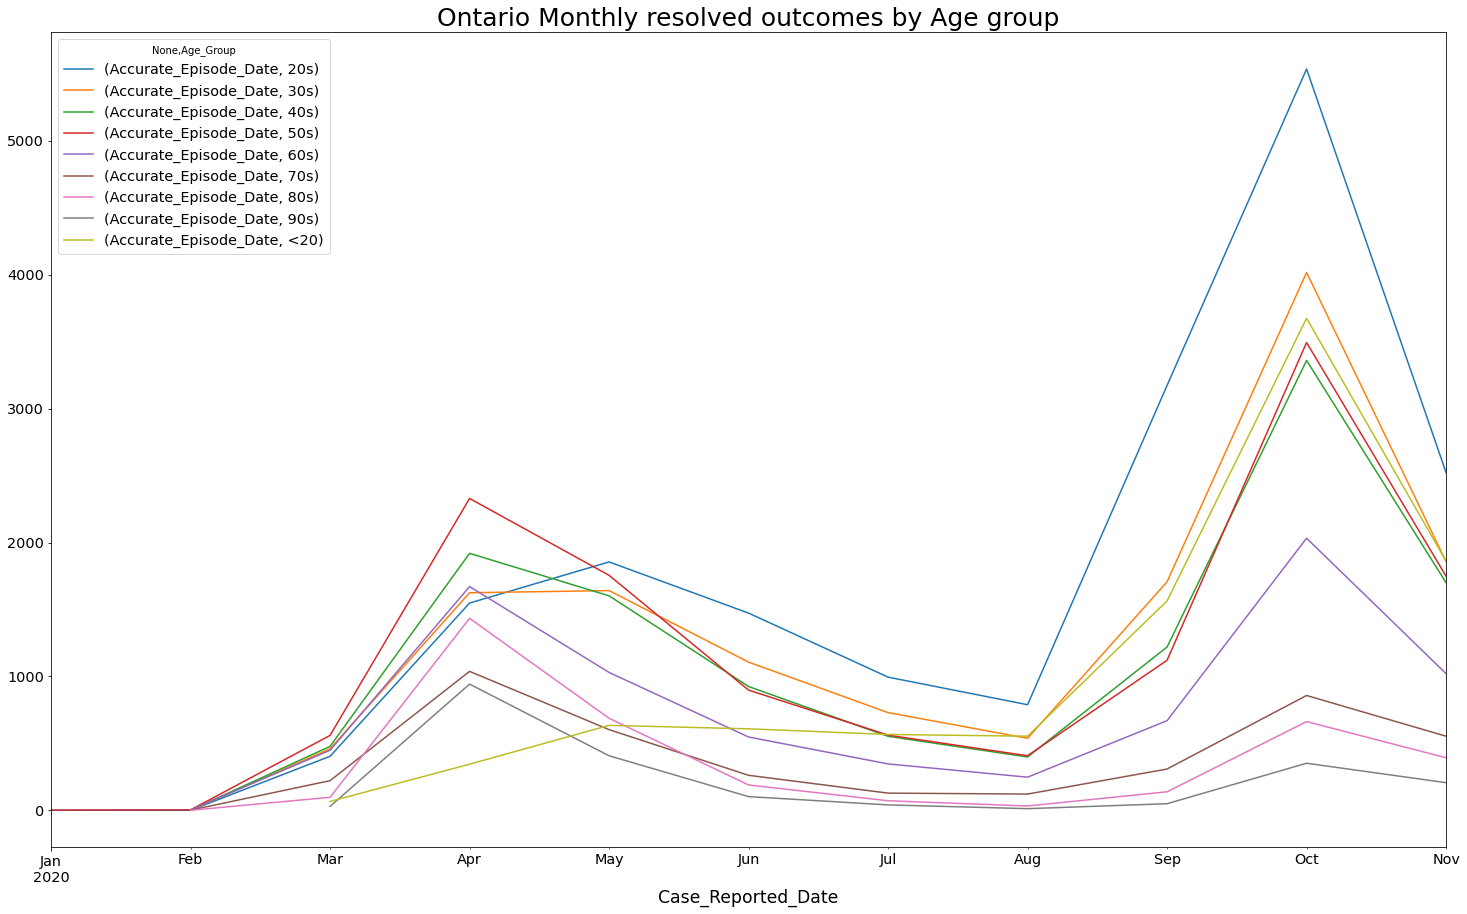

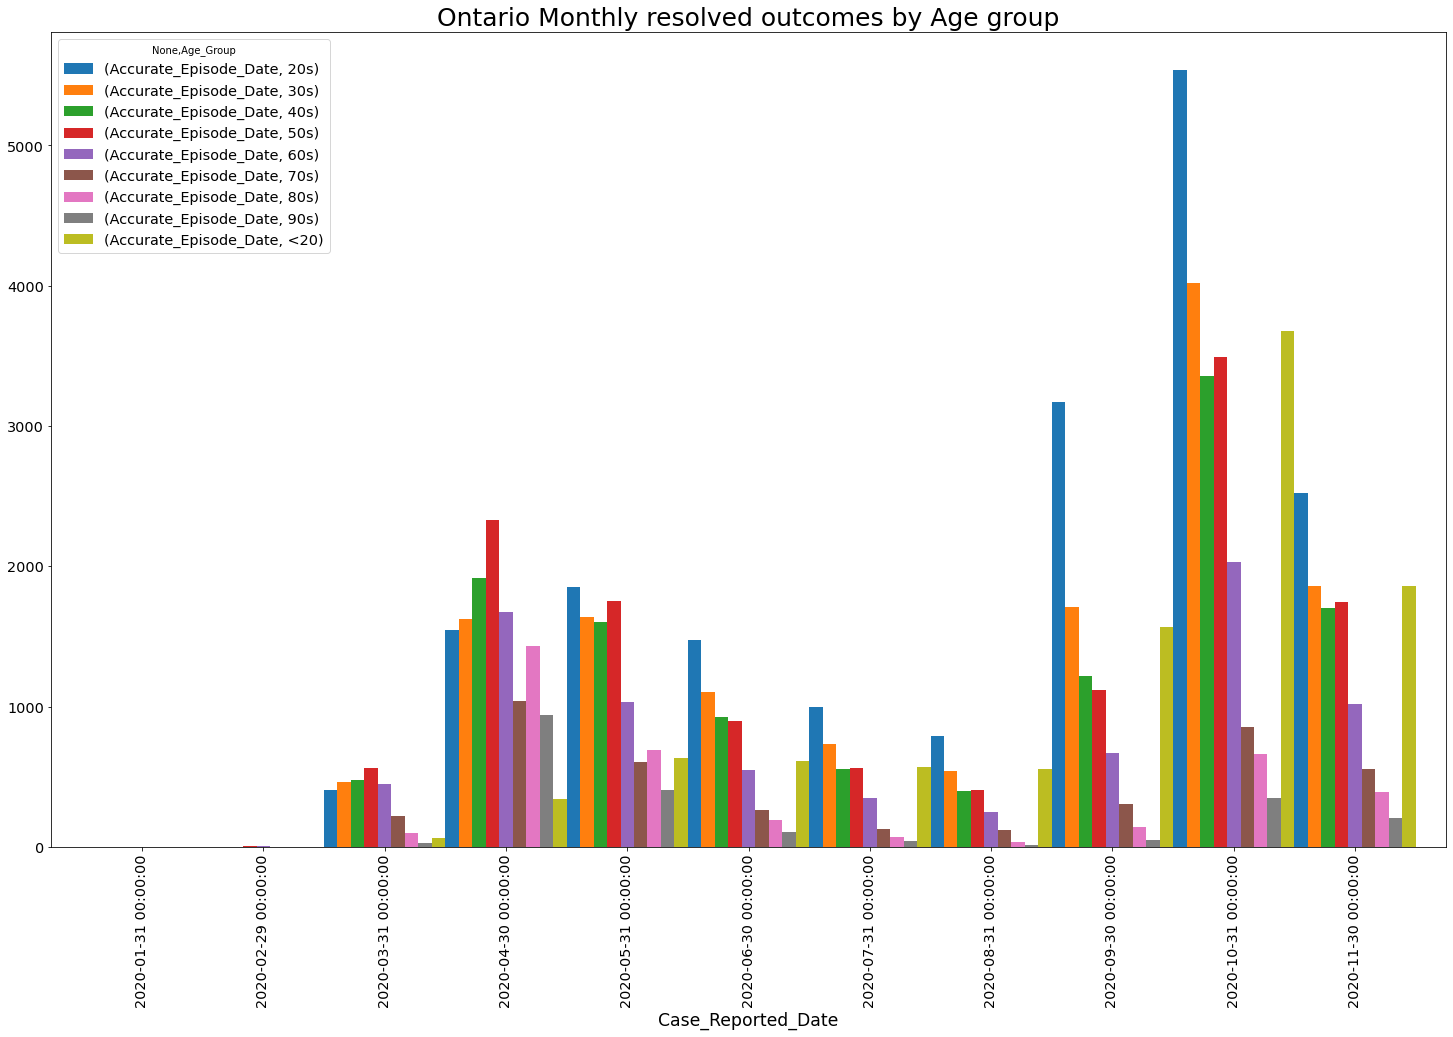

In [189]:
resolved.unstack(0).plot(figsize=(25,15));
plt.title('Ontario Monthly resolved outcomes by Age group', fontsize=25);

resolved.unstack(0).plot(kind='bar', figsize=(25,15), width=1);
plt.title('Ontario Monthly resolved outcomes by Age group', fontsize=25);

In [190]:
resolved = covidOntario[covidOntario['Outcome1'] == 'Resolved']

In [191]:
resolved = resolved.groupby('Client_Gender')[['Accurate_Episode_Date']].resample('M').count()

## Covid resolved cases by gender

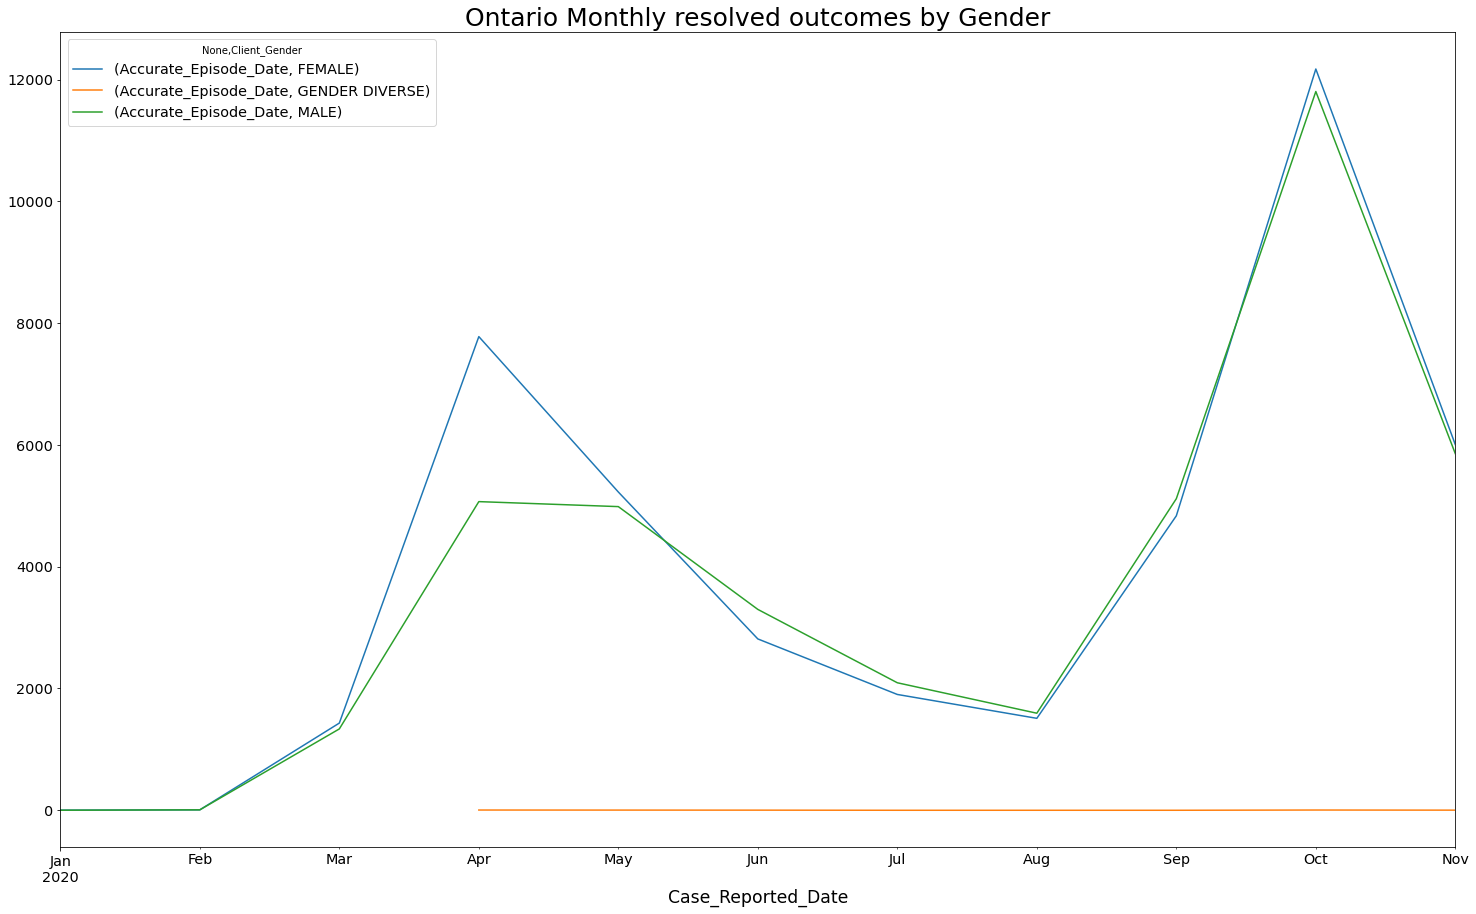

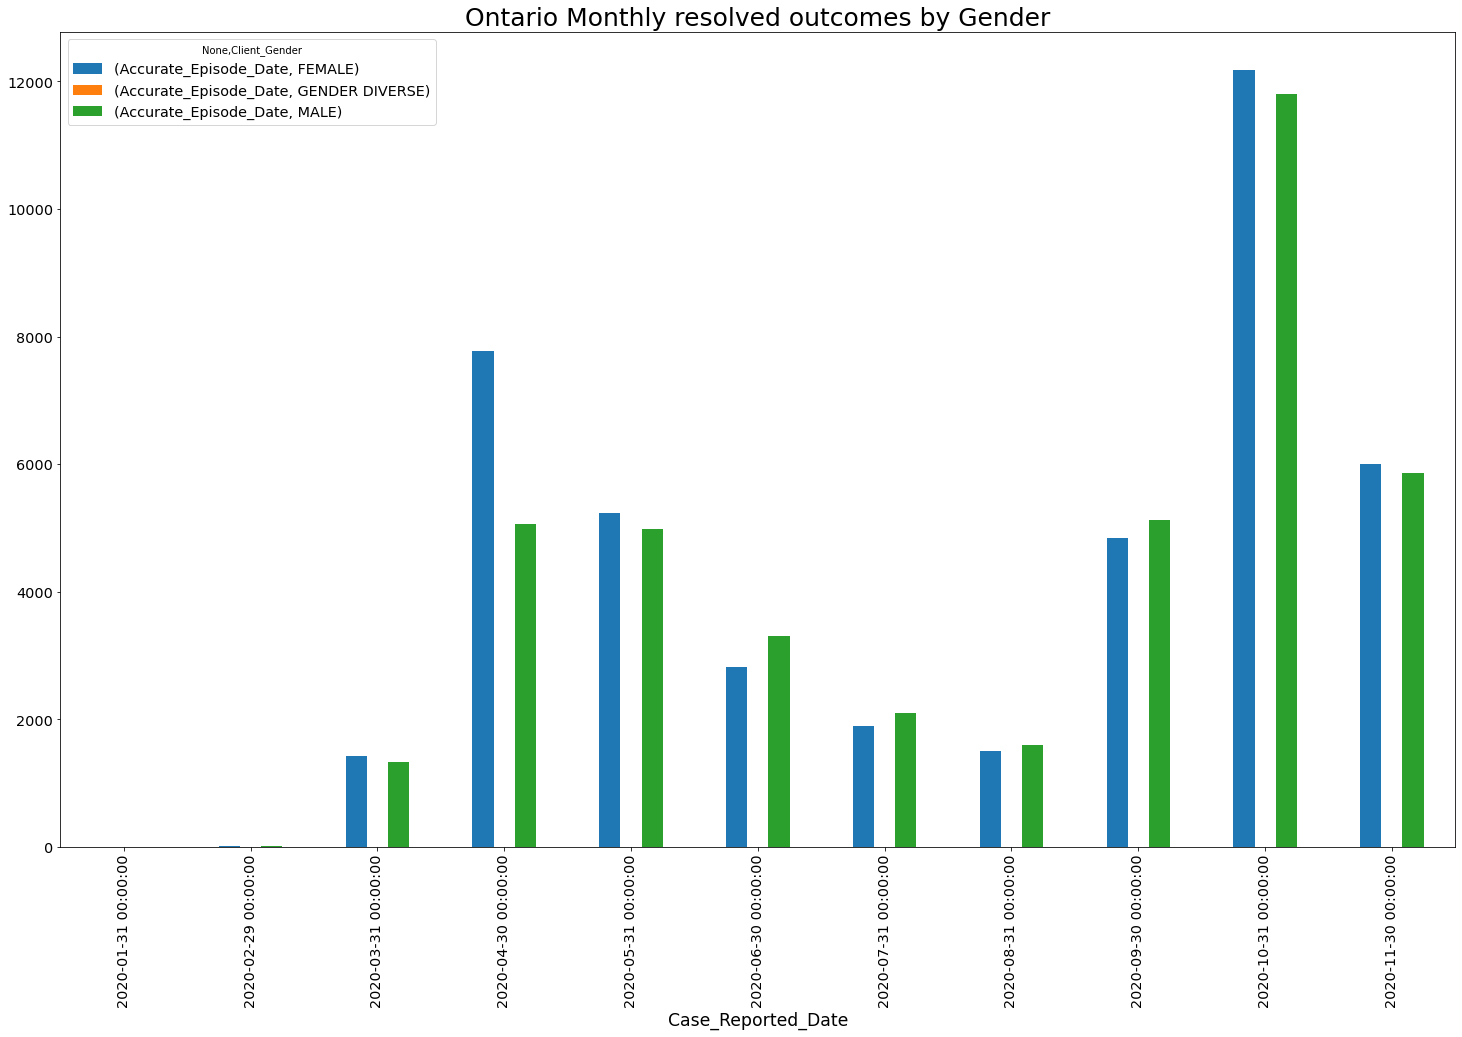

In [192]:
resolved.unstack(0).plot(figsize=(25,15));
plt.title('Ontario Monthly resolved outcomes by Gender', fontsize=25);

resolved.unstack(0).plot(kind='bar', figsize=(25,15));
plt.title('Ontario Monthly resolved outcomes by Gender', fontsize=25);

## covid outcomes by gender

In [193]:
covidOntario = covidOntario.groupby(['Outcome1', 'Client_Gender'])[['Accurate_Episode_Date']].resample('M').count()

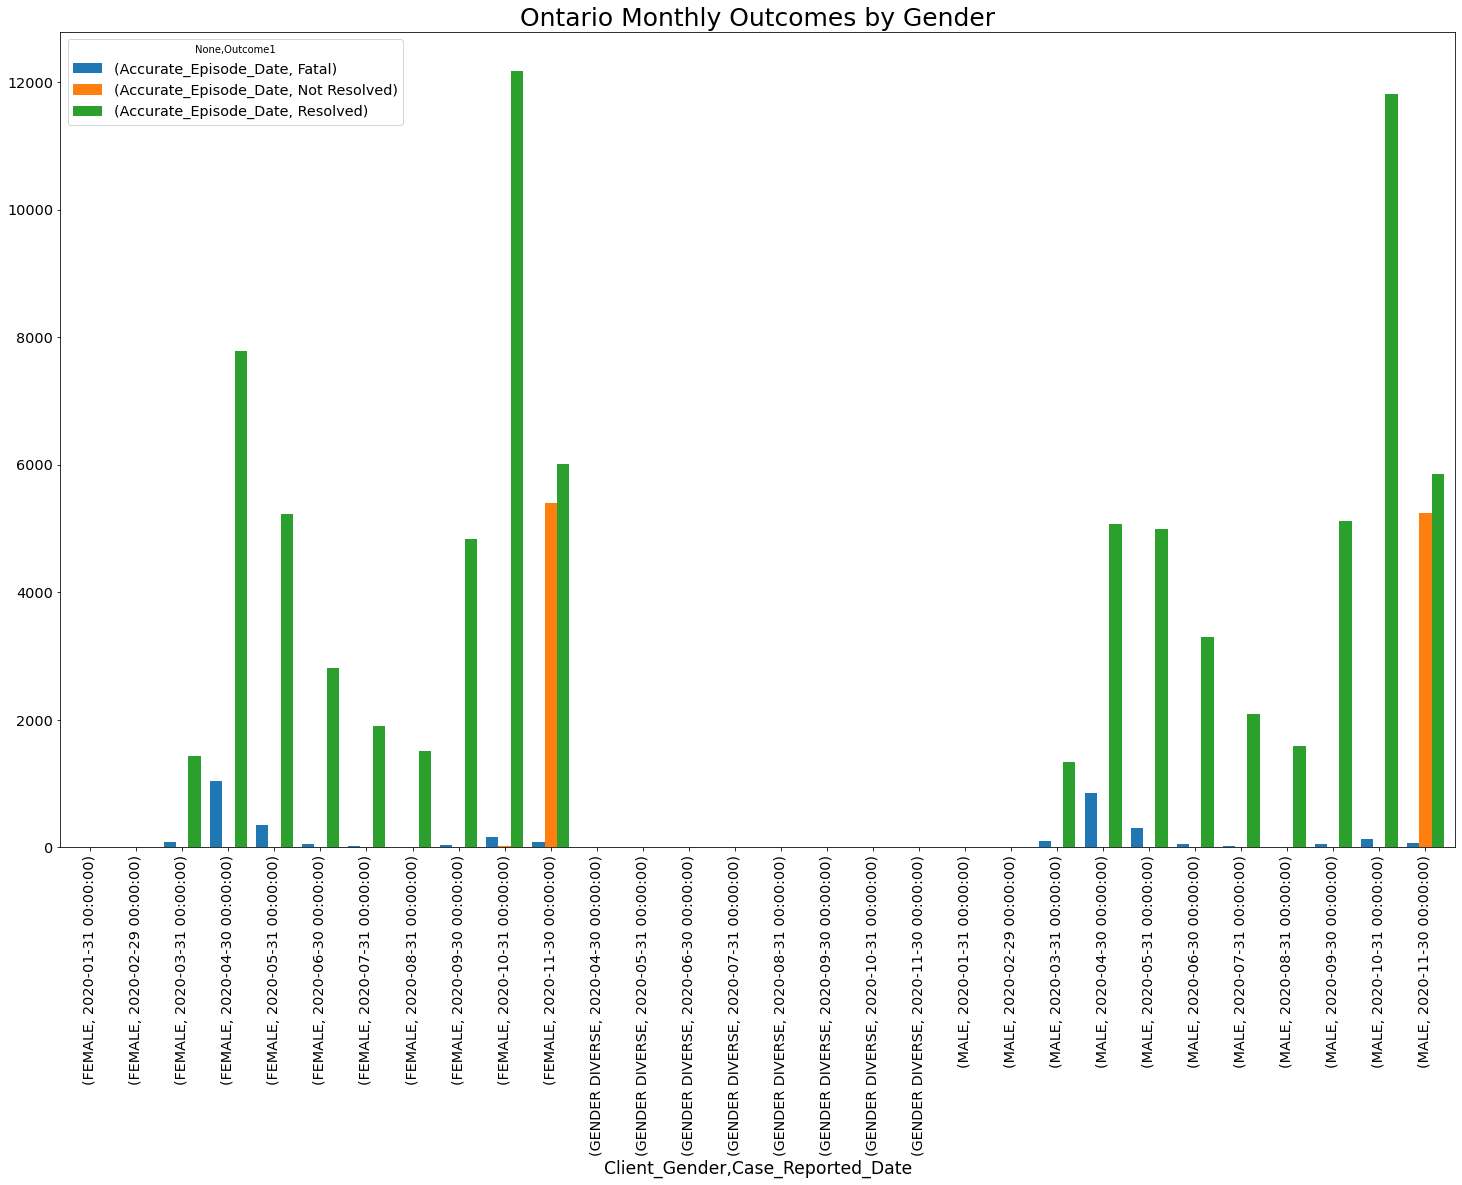

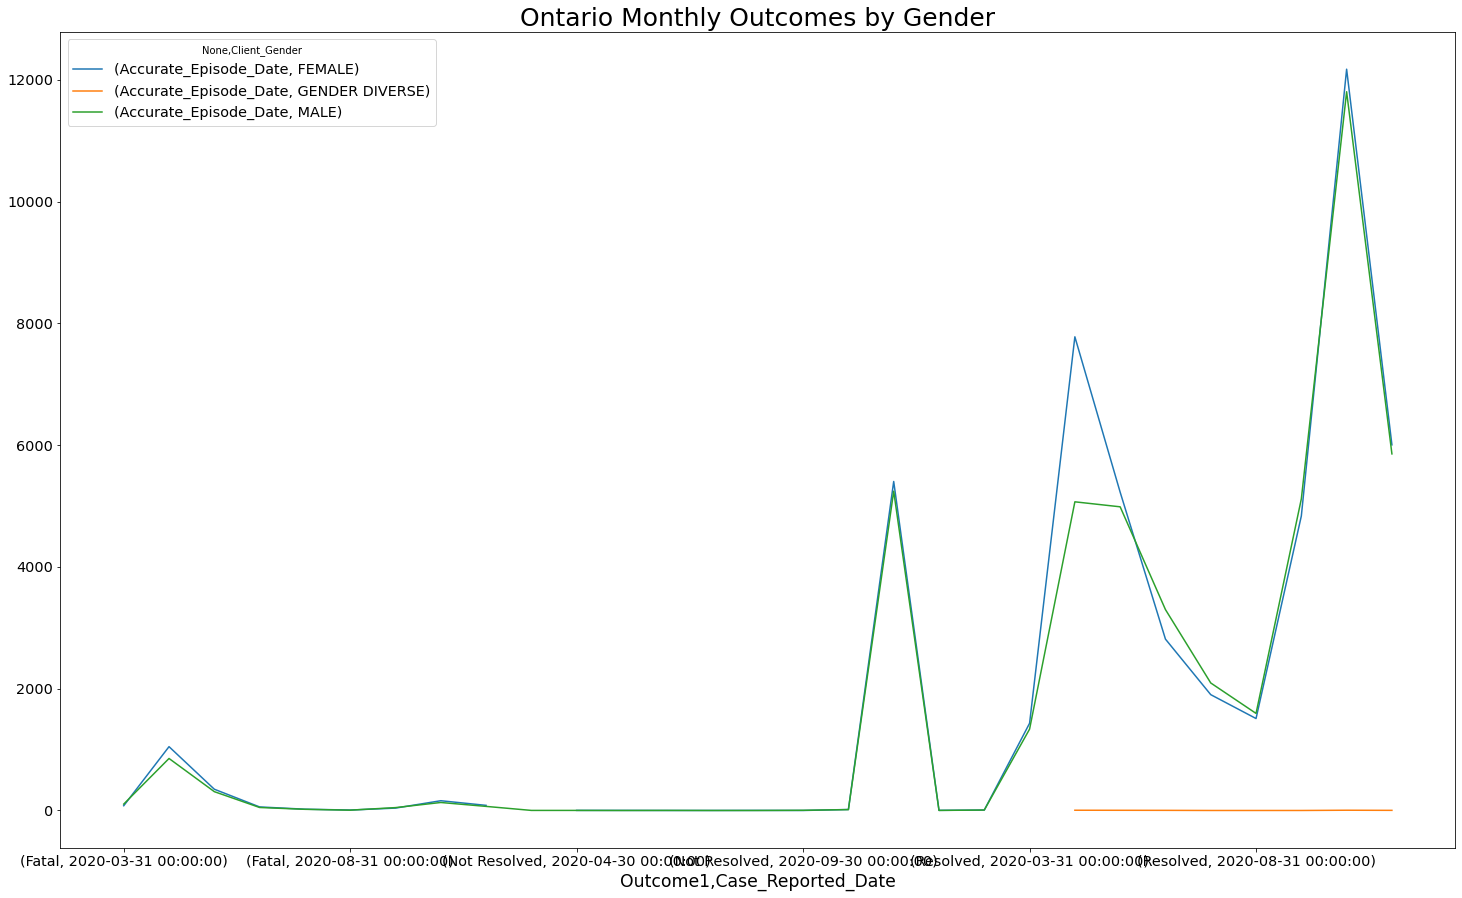

In [200]:
covidOntario.unstack(0).plot(kind='bar', figsize=(25,15), width=0.8);
plt.title('Ontario Monthly Outcomes by Gender', fontsize=25);

covidOntario.unstack(1).plot(figsize=(25,15));
plt.title('Ontario Monthly Outcomes by Gender', fontsize=25);